In [49]:
import pandas as pd
import numpy as np
import statistics as stat
import re
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import os

In [50]:
labels = os.listdir('/Users/grahamsmith/Documents/SpringboardWork/Seamless_Twitter_Analysis/tweets')

#remove hidden files
temp = []
for x in labels:
    if x != '.DS_Store':
        temp.append(x)
labels = temp

#each month of tweets is in a seperate .csv, so we combine them together
csvs = []
for x in labels:
   csvs.append(pd.read_csv('/Users/grahamsmith/Documents/SpringboardWork/Seamless_Twitter_Analysis/tweets/' + x ))
df = pd.concat(csvs)

In [51]:
#remove columns with no/irrelevant data
df = df.iloc[:,2:12]

In [52]:
df.head()

,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks
0,@MTCBATA is looking for a new Executive Direct...,2018-10-27 18:01 +0000,124.0,5.0,0.040323,0.0,0.0,0.0,1.0,4.0
1,Ultimate seamlessness. https://t.co/CdCLrg2o6a,2018-10-26 14:24 +0000,345.0,10.0,0.028986,0.0,0.0,1.0,0.0,9.0
2,Help Nix Prop 6! Save funding for more seamles...,2018-10-26 02:28 +0000,994.0,19.0,0.019115,4.0,0.0,5.0,3.0,5.0
3,It doesn't have to be this way! Let's get to f...,2018-10-23 23:29 +0000,792.0,7.0,0.008838,2.0,0.0,4.0,1.0,0.0
4,And then come say hi at next month’s @SPUR_Urb...,2018-10-23 23:09 +0000,532.0,3.0,0.005639,0.0,0.0,1.0,2.0,0.0


In [53]:
np.mean(df['Tweet text'])

TypeError: Could not convert @MTCBATA is looking for a new Executive Director. The last one was in place for 17 years, so this is a BIG deal. We've put together a list of positive, visionary leaders we think are great candidates for the job. Would you add anyone else? Let us know! https://t.co/Syf9exwPTdUltimate seamlessness. https://t.co/CdCLrg2o6aHelp Nix Prop 6! Save funding for more seamless transit. Help out -- flier some train stations, do some phone banking. Sign up here: https://t.co/qM4M7tCFVO https://t.co/2379qGdY2DIt doesn't have to be this way! Let's get to fixing. "Regional fare integration, free transit, &amp; regulating timing of freight deliveries are proven concepts that have been standard practice in well-run cities around the world for decades, but are still ‘outside-the-box’” for MTC" https://t.co/FczQtLbH5dAnd then come say hi at next month’s @SPUR_Urbanist lunch forum where @icgee will be pitching our proposal alongside a few of the other great project ideas &amp; concepts to come from the competition.For more details, check out our post detailing the proposal &amp; thoughts on the process. https://t.co/orryBnG27ZYay! Our response to @MTCBATA "Request for Transformative Projects" made the finals! Our proposal pitches fare, service, and branding integration as a critical strategy in creating a more #seamless transportation system in the Bay Area. https://t.co/DzGrgJC98f"To realize a seamless, world-class transit and transportation system across the Bay Area, we’ll need to start expecting more from our one regional transportation agency." ICYMI: Read our editorial on why you should care who next leads the @MTCBATA! https://t.co/S4vJElEtl6 https://t.co/EPjrdNwNKf@asmallteapot @NeoNacho @eb4everyone We're working on a more regional (and rational) approach to transit! Can't promise BART to Sausalito though ...Check out our editorial in today's @sfchronicle! Selecting a bold, experienced leader for @MTCBATA who is committed to a vision of seamlessness is critical to the future of the Bay Area. https://t.co/xc7erb8uXc"Improving American transit doesn’t necessarily demand multi-decade, hundred-billion-dollar infrastructure projects: It can be done by taking better advantage of existing space and existing vehicles, and then deploying them in ways that encourage people to actually use them." https://t.co/wujlV2HMK8Relevant lunchtime forum on fare policy today at @SPUR_Urbanist in SF! Agree - let's talk #transit - and more specifically, regional fare integration! https://t.co/sH9D3JgXnECongrats to our friends @SFTRU on a incredibly successful #TransitWeek 👏👏 And thanks to everyone who came out to the first ever Rider First Awards that we co-hosted! https://t.co/DbAqkjImgT@theGreaterMarin @LowHeadways We 100% believe transfer discounts should be approached strategically to support the use of transit as a network! No great Bay Area studies to share as of now, though -- @MTCBATA should study the impacts further.

@SPUR_Urbanist, any insights/data points to share?A clear vision for Bay Area mobility should be the basis of our regional plan; specific projects shouldn't dictate the vision. We submitted a proposal to @MTCBATA for regional fare/service/branding integration - thanks @StreetsblogSF for amplifying our message on why it matters! https://t.co/VbsvzDIW8wCare about transit? Free tomorrow night? Join us and @SFTRU for the region’s first transit experience awards! Come enjoy drinks/food, and meet other awesome transit advocates to celebrate the end of #TransitWeek (shout-out to @remix for hosting!)  https://t.co/3LrP1X7a9N https://t.co/npa70yxXRfOur Rider-First Awards Party is in 2 days, and we can't wait! Take 1 minute right now to buy your ticket! @SFTRU @remix https://t.co/3awJEstkQl https://t.co/NnDS5xKQrh@andybosselman @CurbedSF @MTCBATA Lean startup, @MTCBATA-style: '“I think people should give us a little bit of time to see how it works out and then call us on whether or not we are correct,” said [MTC exec] Fremier. “But I think we’re headed down a very good path.”' Let's prototype Clipper, $500M at a time.@andybosselman @CurbedSF @MTCBATA Transit riders: "we'd like to pay with what's already in our pockets - smartphones and credit cards - instead of having to get another random account we don't need that has to be topped up and accessed by a piece of plastic we don't want". MTC: "that's just a bell and whistle!"@andybosselman @CurbedSF Wondering when @MTCBATA will value meeting rider needs w/ Clipper 2.0? Wonder no longer: “Most of the people don’t even understand or care about all the kinds of things that people are talking about relative to this, that, and the other bell and whistle” - MTC exec Andrew FremierThoughtful, thorough take on the Clipper 2.0 "upgrade" from  @andybosselman  @CurbedSF https://t.co/MBmSAa3YM0Don’t miss the transit party of the year, next Friday night at @remix! Food + drinks + live awards to honor our Rider-First Award winners = the perfect way to cap off #TransitWeek with @SFTRU &amp; Seamless. Buy your tickets now! https://t.co/3LrP1X7a9N https://t.co/PhoKMj7FiyMiss our BART Board District 8 Candidate Forum w/ @SFTRU on Monday? Check out @StreetsblogSF's recap of the event! https://t.co/lDmp6749SHOur mobility goals should drive project identification, and not the other way around. Read our thoughts on @MTCBATA's call for Transformative Projects &amp; our group's full project submission on Medium now, and let us know what you think! https://t.co/sOaSLpoNobNice work on these maps, Jacob! We 100% agree that rider experience can &amp; should be better, and that the Bay Area needs to think bigger to make the case for more transformative investments. Come chat with us - we’re incorporating ideas and suggestions into a mega map of our own! https://t.co/ldCfUgy1uZGreat discussion about how to make BART work better for its riders at the @SFBART District 8 Candidate Forum tonight! Thanks to everyone who came, @SFTRU for co-hosting, and all the candidates: @JonathanLyens, @JaniceForBART, @melnut, Brian Larkin, William Walker, &amp; Eva Chao! https://t.co/uZJ83ZXfMtFun times tonight with @SFTRU at 6:30 https://t.co/T97MwV9UNgWe're still accepting nominations! We want to celebrate the local people, places, &amp; projects that are helping to create a better regional transit experience. Know of someone/something that fits the description? Nominate them for a Rider-First Award! https://t.co/9Gj3i8y6KX @SFTRU https://t.co/lf0bH7TGNLOur BART Board Candidate Forum (District 8) is coming up, tomorrow at 6 PM! Come hear from the candidates - how will they address the challenges BART is facing? What do they see for the future of BART on a regional level? Co-hosted w/ @SFTRU https://t.co/ip7Nd2d25K https://t.co/OhvhNflfs1(8) All this make you mad? Head over to MTC - meeting now Demand streamlined fare policies, simplified biz rules,  a focus on the rider's experience. Demand that contracts be properly value engineered. Even demand a re-bid. But definitely demand real regional leadership.(7) SO what to do? Asking for a re-bid WILL drag out a long C2 process even longer. BUT: isn't it time we had higher expectations? What if we didn't just throw our hands up in the air, hope for better next time? Unless we hold MTC to account, next time will never be better.(6) By re-structuring the proposal, we could even ask for better integration, a focus on rider needs not MTC or transit agency needs, and a chance to streamline that ugly tangle of business logic and ludicrously outdated fare policy.(5) If we keep on the way we're going, we'll never know what we're losing out on in price or value or features. MTC shut the door on simpler, better system of fares &amp; rules and therefore on vendors who might have saved us all money and made C2 experience better for everyone.(4) But, honestly, the slippery ease with which Cubic came into $0.5B of public money without competition, has got us mad. That part of us that's fed up with bad regional leadership wants to demand that the sole bid be rejected and the project be re-structured.(3) There IS still time to recover some value from this bid. Streamlining biz rules &amp; fare policy before code gets pushed wd deliver a more cost-effective and reliable project, &amp; yield benefits in equity, ridership, environmental outcomes, customer experience.(2) When this advice was ignored, most vendors wisely dropped out. Any contractor that's left standing after that, is not a contractor you want. Lo and behold, MTC is about to award 0.5B sole bid from a defense contractor with a side business in transit.(1) So, about this Clipper 2.0 thing: it's pretty clear that @MTCBATA has fumbled the ball on a $0.5B contract. It was warned by vendors early on that not streamlining its 35k business rules and ludicrously complex fare policy was a recipe for disaster, yet chose to ignore.@graue @derivativeburke @graue we're on it. So many missed opportunities here. It's time we all stood up for better governance of regional transit: we agree w/ @SPUR_Urbanist that there's a fare policy problem, but there's also an expectations problem. Government contracting should work better, period.Are you interested in supporting the work we're doing to develop a seamless transportation system in the Bay Area? Come to our general meeting tonight to hear about what we're working on and learn how you could get involved!  Full details on our site: https://t.co/dhtKcYOeve https://t.co/NR4vm00JcwSee you all next Monday at the BART District 8 Candidate Forum that we're co-hosting with @SFTRU! Make sure to RSVP soon, space is limited! https://t.co/prRDDW3aqB https://t.co/TGfeSMRtekA connected, convenient regional public transit system is a prerequisite for equitable growth // "I’m kind of amazed by the idea that more and more growth in a region that lacks the transportation infrastructure to handle the existing population...is the best alternative." https://t.co/XbYgRMSFtRWho/what would you like to recognize for their work in creating a transportation culture that champions the experience of users? Share your nomination today, so that we can honor them at the Rider-First Awards Party we're hosting with @SFTRU! https://t.co/BEcJKdZJ1i #TransitWeek@SPUR_Urbanist's July Transit + Design Workshop was a great event - now imagine if we combined the collective design and UX talent in the Bay Area with a modern transportation authority mandated to provide seamless mobility for the region. https://t.co/Ekeo47Y5on https://t.co/kIltROJCleWe're teaming up with @SFTRU to honor the region’s most committed people, places, &amp; projects helping to make our transportation system a more enjoyable experience, and we want your input! Who/what would you like to nominate for their work? Nominate here: https://t.co/GeFhQQ05fcWe're advocating for an easy-to-use, pay-as-you-go card that works seamlessly for all trips using the Bay Area system; means-based fares &amp; better integration among operator products is a good starting point. A more equitable solution is key for simpler and easier rider experience https://t.co/pzmlhoPk6B"Our system isn't delivering good regional public transportation. A prerequisite to changing that is acknowledging that our existing governance structures are holding us back, and advocating for them to be reformed." Miss our latest blog post? Read it now: https://t.co/bcfWI7sdBwWe won't uber our way out of traffic congestion and too many SOV trips: 
https://t.co/yRykkI3lAi h/t @GOVERNINGIf you work at a company that offers matching, spread the word among your colleagues! It's a simple way to support causes you and your team care about.A lot of Bay Area companies (both large and small!) offer matching - some big companies we know of include Google, Apple, Twitter, Salesforce and Adobe.Here's a quick and easy way to multiply all of your charitable donations for 2020 (including Seamless!) - check if your employer offers donation matching here: https://t.co/wcVmcJ3ycx$14B for transit is a major victory &amp; will help prevent large additional service cuts over the next several months. But transit agencies' long term-future is still very much in doubt, &amp; more funding will be needed as riders return to transit. https://t.co/XpRJKykngE"Slashing or eliminating the transit service that carried 34 million passengers a day in 2019 will cause a national mobility crisis in 2021... Streets will become impassable if even a fraction of former transit riders return to work &amp; errands in cars." 🎯https://t.co/W22LSbfHUnIf you love transit-themed board games, want to follow our progress, and potentially get the chance to play test the game before launch, sign up here to receive updates on the project - https://t.co/zre7Y9fRb5Thanks to everybody who had some fun with guessing! We're excited to share something fun, exciting, and transit themed to brighten up 2021 - in collaboration with @alfred_twu we are working on a board game based on our fare integration map! https://t.co/q89xB2VOja https://t.co/cl9wA0GOGB@xentrans @Theysaurus @SFTRU 😂😂 Thanks for your support @xentrans!Congrats to board member @Theysaurus -- her photo of our Seamless Transit Act launch party in Feb won a prize at last night's @SFTRU year-end party! 

Her shot reflects the vibrancy of the Bay Area transit community, &amp; serves as a reminder of what we can get done together 📸 https://t.co/9nYQcPW3CJNice write up of our recent webinar in @StreetsblogSF: "Everyone is dependent on transit during this pandemic, whether they realize it or not ... Even people who work from home depend on essential workers for medical care, food, power, emergency services, water, etc" 👇 https://t.co/GgeTVZ6FL5Seamless Bay Area's list has over 60 people in the County Connection service area who support more seamlessly integrated transit AND funding for better, more frequent local service.  Thanks to those who spoke and wrote today - it makes a difference.(sorry I didn't catch a screenshot from Armand's comment today)Seamless Bay Area board member Armand Dormalewski gave one of the comments - he grew up in a low-income refugee family in Martinez, his family depended on County Connection transit, and suffered because of the challenges of making connections to get to work and school https://t.co/ykR0L8IFM3The board agreed that it would be important to communicate early to legslators to make their goals heard. And, the board REALLY appreciated having six constituents present and wanting to speak - County Connection doesn't get many commenters and they were welcomedAnd Board Chair Keith Haydon of Clayton talked about the importance of improving ease of use for transit users. Worth expessed concerns about ensuring that it's not a zero sum game - better regional connex should not be done at the expense of local service...Ramacier commented that "it is my hope that we will be able to be supportive." Board Member Amy Worth, who is an MTC Commissioner and sits on the task force, talked about the value of seamless service to help bring back ridership to transit and serve constituents..GM Rick Ramacier talked about ongoing work at the regional Blue Ribbon Transit Recover Task Force to recommend how to integrate the system and the likely prospect of legislation that Asm Chiu said at the task force he is looking to bringAt today's County Connection board, six people who live in or have frequent trips to Central Contra Costa County spoke or wrote in about how helpful it would be to have more seamlessly integrated transit, complementary to the need for restored and improved local transit https://t.co/uTejtVhvvZSeeing clear commitment to additional future transit funding will give transit agencies the confidence to participate more fruitfully in discussions of fare integration and governance reforms.Saving transit will require a major new source of regional funds. The time is now for @MTCBATA to set up a public multi-stakeholder process for regional transportation ballot measure - which should focus on funding transit operations and integrated fares.

https://t.co/vN2LF2IpReWatch the entire discussion here: https://t.co/PYPufKPvWiMissed today's Making Transit Work for Essential Workers webinar? 

Watch the recorded session here: https://t.co/PYPufKPvWi https://t.co/ZcWQ2gQjxR@BikeConcord @BikeEastBay @SaveMountDiabloCounty Connection serves Clayton, Concord, Lafayette, Martinez, Pleasant Hill, Walnut Creek, Moraga, San Ramon, Danville, and unincorporated central Contra Costa CountyDo you support seamless transit AND live or work in Central Contra Costa County? So far, over 50 people have made comments at transit agencies &amp; regional bodies in support of a seamless system.  County Connection Board meets tomorrow am - can you comment?  https://t.co/by9Wz9WdpEYou can also read our comment letter:  https://t.co/w9TjpbAB4s

For more info, please DM us!Researchers emphasized that many of the issues raised in this project could benefit from more in-depth examination.Others expressed concern about the safety of bus stops, and about the possibility of exposure to COVID-19.Some riders interviewed were not aware of monthly pass deals or the ability to use Clipper, and therefore were overpaying for transit.Multiple workers emphasized that their transit commutes were more relaxing and productive than traveling by car.@karl_reinhardt explains that transit reliability was a challenge for several workers they interviewed. https://t.co/Vk8fvlVfpWThis fall, UC Berkeley graduate students @karl_reinhardt, @amyjayde_ and Andrew Tate interviewed essential workers about their experiences using transit during a pandemic. 

Some of their findings, presented at today's Making Transit Work for Essential Workers webinar ⬇️ https://t.co/ElWgWdiwiQCan't make it live, but want to watch later? RSVP and we'll send you a recording of the webinar afterward!Join us TODAY at 12:00 p.m. PT to hear about new research on the ways essential workers are using transit during the pandemic - including what's working and what needs improvement.

RSVP here: https://t.co/0i98gbdkAR https://t.co/e9sJWE0u8d@Commentariat_ That is a beautiful, puzzling landmark, worthy of it's own guessing game. Where / what is that?@DARosenthal On brand for 2020, but we have something more fun in mind :)@BruceHalperin Good guess, we want this as well!We're witnessing some strange happenings in the Bay Area - any guesses on what might be coming? https://t.co/JewR9e0vDIHappening TOMORROW 👏👇 https://t.co/zB1g8PWoHPIt only takes a few clicks - send an email to your Congressional representatives today &amp; urge them to support additional federal funding for transit: https://t.co/c5PXMgmohUAs BART struggles with an anticipated $177 million deficit, "roughly 40 percent of current BART employees will be offered the option to leave their roles voluntarily ... [causing service changes that will] burden transit-dependent &amp; low-income riders" https://t.co/ceDITDmwOs"Facing continuing catastrophic revenue losses amid the COVID-19 pandemic, @sfmta_muni officials say that more than 1,200 of its nearly 6,000 employees may face layoffs... [resulting in] significant further cuts to Muni's already much-reduced service" https://t.co/QsvYkXmTeo"Nearly 150 employees that help run ferries and buses between the North Bay and San Francisco will soon be out of work ... layoffs are effective Jan. 4" https://t.co/dqKuw0g49hToday is a national day of advocacy to urge Congress to pass emergency funding to #SavePublicTransit. 

Here are just a few stories showing the current &amp; future impacts of transit agency budget shortfalls in the Bay Area, which could deepen further without additional stimulus ⬇️We urge you to contact your members of Congress today and share why public transit matters to you and your community. 

Dial 202-224-3121 - &amp; here are a few messages to keep in mind: https://t.co/qMmIy4UD2HAccording to a Sept. 2020 survey of transit agencies, without additional federal funding, 54 percent of transit agencies are considering laying off or furloughing staff, and 61 percent may reduce service.We are proud to join transit agencies &amp; advocates today in calling on Congress to provide at least $32 billion in emergency funding for public transit. This is a crisis moment for transit &amp; the workers and communities who rely on it. #SavePublicTransit https://t.co/skkPxChvdw📌 ICYMI: This Weds at noon, we're hosting a talk with UC Berkeley graduate students @karl_reinhardt, @amyjayde_, &amp; Andrew Tate, featuring their new research about essential workers' experience using transit during the pandemic. It's free! https://t.co/5v2AEpSsJh https://t.co/Jg3wLHoQZY👇👇👇 https://t.co/d1FLlYEvr1How has Bay Area transit served essential workers during the pandemic? UC Berkeley planning students @karl_reinhardt, @amyjayde_, &amp; Andrew Tate interviewed essential workers to find out.

Join us next Weds 12/16 for a free webinar exploring their findings! https://t.co/0i98gbdkAR https://t.co/RogHXZ2Va8@channel_echo @alevin @SFBayFerry @SFBART @bc3sfbay To advance the reforms needed to achieve seamless transit, we need the support of transit agencies, big + small. Also, @SFBayFerry is an important success story in consolidation, aligning branding + operations of 3 formerly separate agencies to deliver better service for riders.Today WETA, which runs @SFBayFerry became the 2nd transit agency to endorse the Seamless Transit Principles, joining @SFBART! 🙌⛴️😎   

Also this week, the Business Council on Climate Change @bc3sfbay became the 31st org to endorse.

Our movement grows! 

https://t.co/SzV5FHpksz.@SFBART GM Bob Powers today at a virtual rally of transit leaders calling for federal aid: "We cannot turn our back on our essential workers. Scaled-down transit does not build resilient cities and will not help with economic recovery." https://t.co/YmPxxdZcEOThis fall, UC Berkeley grad students @karl_reinhardt, @amyjayde_, &amp; Andrew Tate interviewed Bay Area essential workers about their experience navigating transit during the COVID-19 pandemic. 

Join us on Dec. 16 to hear about their findings! 👇https://t.co/5v2AEpSsJh https://t.co/SinaoG6XkA"The region’s lack of fare integration, schedule integration, and connectivity is an unnecessary hardship on transit riders. Well-run metropolitan transit systems all integrate fares and schedules, whether they have one operator or many." @StreetsblogSF  https://t.co/rJm6WxGJEp.@StreetsblogSF is one of the most important sources of news about transit, pedestrian and bike safety, and livable streets in the Bay Area. They're currently in the midst of their annual fundraising drive - every gift helps! 🗞️ https://t.co/rOILnxSK1i@0ctav1uz @2AvSagas @schadenfraade @JohnSurico Crazy like a fox?@TransbayC @SenToniAtkins Make it 28 - we're in too!  

Love the part about Seamless transit: "We hope that the next Senate Transportation Committee Chair works with the community to pass legislation that will facilitate better coordination and efficiencies across these 27 different transit agencies."💡 Webinar: Transit Governance Reform: Examples from Baltimore, Minneapolis, and Boston https://t.co/7KKSfUyDoK@danschulman81 @cityofelcerrito Here’s a sample resolution you can start from: https://t.co/HISKWd5XoW@KatieD_18 @CityofAlbanyCA @npilch @SFBART @sfcta @CityofBerkeley @CityofMillbrae @citiesassoc @CityofSanMateo @AlamedaCounty @CityofSSF @MarkNagales @James4SSF Great! Here’s a resolution template you can start from:  https://t.co/HISKWd5XoWThe coalition supporting seamless transit expands every day thanks to riders speaking up and forward-thinking elected leaders taking action. Together we can transform Bay Area transit!  

Show your support by signing the petition supporting the principles:
https://t.co/SzV5FHpkszTonight @CityofAlbanyCA endorsed the Seamless Transit Principles, thanks to Mayor @npilch!🥳 It's the 8th public entity to support the Principles. The others:

@SFBART 
@sfcta 
@CityofBerkeley 
@CityofMillbrae 
Santa Clara @citiesassoc 
@CityofSanMateo
@AlamedaCounty

Who's next? https://t.co/gkL9dVykgCTruth 👇 https://t.co/UxLvfL57cGThis interview w/ @BethOsborneT4A is worth a read: "[In the U.S.] we underfund transit... If you underfund maintenance of your roof, [it's] going to probably get more damaged in a hailstorm or hurricane. A weakened system is not as resilient." https://t.co/R5eJIpqN0i@YIMBYNeoliberal the neoliberals exaggerate a bit.  We counted and there are only 151 agencies involved in delivering transit service to the Bay Area.  https://t.co/E6yAoGWtS4And see this page to see a vision of integrated fares for the Bay Area and try out an interactive tool showing what integrated transit fares might be like https://t.co/kTJUWELNMcSee this blog post that explains why fully integrated fares requires institutional change https://t.co/DNL5A2MmtuToday at 1pm the region's Fare Integration Task Force is giving direction on the next phase of a major study. They will decide whether to keep options open for an integrated system which requires institutional change. Please sign up here to comment: https://t.co/c6TWvquZfU@bikemarvin @LeftistConnor @jeffreytumlin Additional funding is required. In order to determine what the funding will be used for and how it will be managed, the study is needed first.@bikemarvin @LeftistConnor @jeffreytumlin Absolutely.  Seamless Bay Area research shows that significant increases in operating funding and service were needed even pre-Covid to support increased transit ridership, and do not support cannibalizing funding from high-transit areas. https://t.co/fhlxTsXPnQ@WarrenMobility @WatsonLadd one important question is the roadmap for legislation over mutliple years. regions around the world that integrate their transit systems don't do it all in one fell swoop. so what is a good set of steps.That said, we’re constantly learning more, refining our policy positions, and eager to collaborate on solutions.

As always, we are happy to talk to understand concerns so we can advocate for change that is transformative and feasible. 🚀📊🤝Our policy positions are informed by over 100 interviews with policymakers and experts over the past several years; research of global best practices, such as the recent @MinetaTrans report; and listening to riders. https://t.co/UuFq2DOHQH4/x We don't support:
- Unfunded mandates that would impose obligations on transit agencies without money to implement
- Redirecting locally-generated sources of transit funding, such as local parking and sales tax revenues, to fund service in other parts of the region.3/x
We do not support, and have never supported:

- “One-size-fits-all” transit service levels across the Bay Area that ignore differences in density, transit demand, income distribution, and local commitment to transit or equity from locally-generated sources of revenue2/x
- A network manager for Bay Area transit to oversee integrated fares
- Studying the full costs and benefits of a range of fare integration options though the Fare Coordination &amp; Integration Study and Business Case work.  See:  https://t.co/DNL5A2MmtuTo be clear about what we do and don't advocate for:
We support:
- An equitable simple fare system structured to expand affordable access to riders across the region
- New substantial long term funding for transit operations to increase service levels + fund fare integration 1/xTo speak up on Monday at 1pm in support of fare integration: https://t.co/X0gvyxMMiVBay Area Fare integration will require change, but that change is worth the pain for better, more equitable, and more resilient transit. https://t.co/Cg0U9JBghP🎉 Big news 🎉We just hit our fall fundraising goal of recruiting 100 donors to support @seamlessbayarea!!! 

THANK YOU who everyone who made a contribution in support of our vision. We couldn't be more grateful to be part of this committed and hard-working community 👏 https://t.co/Jj4uao2KgF@thecliffbar Cliff you're lucky #100! Thank you!! https://t.co/xVTCbpd1e0@alli_rico Amazing!! 👏👏 https://t.co/TB6vOftDUX📢 ATTENTION 📢

We now only need *two* more donors to hit our fall fundraising campaign goal! 

It's the final day of our campaign - help push us over the top! https://t.co/MnKA5i4y0w https://t.co/tx9MWqtrYhHere's the full meeting information and agenda:
https://t.co/NW8iKCFVQD2/2 You can comment via zoom at Monday's Fare Integration Task Force Meeting OR submit a letter to info@bayareametro.gov by Sunday 5pm. Urge leaders to study bold, transformative options for integration, including ones that would require a Network Manager. https://t.co/1bc3UO8aVS📢 Monday, Dec. 7th@1pm at is an important @MTCBATA meeting where riders can speak up in support of seamless transit fare integration and the governance reforms to support them. 
Our latest blog post explains how these two issues are so closely linked. 1/2
https://t.co/DNL5A2MmtuStarting in 15 minutes! Not too late to RSVP 👇 https://t.co/ikFj5vwhSdAll donations made today or tomorrow will be MATCHED! You'll also receive some of our exclusive transit gear - designed by the brilliant @Theysaurus - as our thank you 👕 https://t.co/MnKA5i4y0w https://t.co/Gsp2EO31uWGreat news - we only need to *12* more donors by Friday to hit our fall fundraising goal! 

Don't miss your chance to be part of this distinguished dozen: https://t.co/MnKA5i4y0w

(Here are pics of Muni's 12 Folsom-Pacific bus &amp; AC Transit's 12 bus for inspiration) https://t.co/qtWYmuBHJi📌 Don't miss this important conversation TONIGHT at 5:30 p.m., hosted by our friends at @SFTRU 👇 https://t.co/caRfDGmJ6iExcellent report from @SPUR_Urbanist on the need for a lead transportation authority for the Bay Area. 

We call it a "Network Manager", this report uses the term "Transit Coordinator", but we mean the same thing.

Working together, we can make this happen in 2021! 🤝🚆🚌🚀 https://t.co/X6wIk2pmeZ@suldrew It’s amazing how “Bart express buses” actually existed as a coherent system, extending the Bart system - before more local agencies proliferated and took over those services.Thanks to the generosity of our supporters on #GivingTuesday, we only need *18* more donors to hit our fall fundraising campaign goal by Friday! 🎉

Even better, all donations through the end of the week will be MATCHED! 👥

Help us over the finish line: https://t.co/MnKA5i4y0w https://t.co/cXWjvkR9DWWe're looking forward to this conversation with @LaurieBerman32, @floracastillo, Jodi Godfrey, @RTDLadyBoss, and @MinetaTrans's Dr. Hilary Nixon 🙌 RSVP now if you haven't already! https://t.co/WLcQTkNde6🕖 There are just a few hours left to make the most of #GivingTuesday! And if you donate to Seamless Bay Area today, your gift will be matched 🙌 https://t.co/BZSVU7y2y9It's #GivingTuesday! Thank you to everyone who has donated to a worthy nonprofit today.

Great news: we only need *30* more donors to hit our fall fundraising goal 🕺 Any amount counts!

Plus - all donations are being MATCHED this week, for 2x the impact: https://t.co/ZHVORawblwICYMI: @StreetsblogSF's recent interview of @alevin on takeaways from #MeasureRR 💡 https://t.co/ENlNXzcv6hCurrent fare rules by operator  😮 https://t.co/1BhYlJwys5Goals of the Fare Integration Study + Business case:
(1) Develop goals for improved user experience
(2) Identify barriers to users
(3) Identify opportunities to increase ridership through fare coordination + integration
(4) Develop a detailed implementation + funding planAlso, FYI, members of the public can tune in and watch the live meeting here:  https://t.co/E9ltnFrsj5Flat fares, zone-based fares, distance-based fares, all exist in different parts of our network https://t.co/uvKYnPVBiHFrom the staff presentation: Complexity of existing system makes it harder to innovate and change fare products using Clipper https://t.co/qAb6BiBTPxA bit of good transit news among the gloom: the Fare Integration Study &amp; Business Case, co-led by @SFBART and @MTCBATA is moving forward!  The first Stakeholder committee meeting is going on right now, including reps from @svtransitusers @SFTRU @SPUR_Urbanist and others.Caltrain measure being considered by the @sfbos right now 🚨 Tune in at https://t.co/ROiksSyCXa; to make a comment, dial 1 (415) 655-0001 / Meeting ID: 146 626 3696 # #The Caltrain tax measure will be discussed during items 36 and 37 on the @SFBOS meeting agenda. View the agenda for more details &amp; instructions on how to dial in and participate in public comment 🗣️ https://t.co/7pdzorVLdkIf you live or work in SF &amp; care about Caltrain service, please dial in ~3 pm today and ask the Board to (1) Support a clean ballot measure to avoid a Caltrain shutdown (2) Support ongoing discussions about governance taking place at the Blue Ribbon Transit Recovery Task Force.We agree that Caltrain’s governance and operations must be fixed. Our best option for achieving this is committing to the regional transit governance reform efforts currently underway, in partnership w/ local &amp; state elected officials seeking to build a seamless, regional systemWe support a “clean” ballot measure that provides stable funding for Caltrain service and won’t confuse voters.Later today, the @SFBOS will vote on a revised #Caltrain ballot measure resolution. We're pleased that this measure was revived, but concerned that - as currently worded - it will not allocate funds predictably and could even halt Caltrain funding after two years.@sp6runderrated @alevin Seamless Transit by @SPUR_Urbanist is excellent background reading:  https://t.co/jkyrBMhfzbRegional housing + transportation challenges are inextricably linked. "We’ve punted the important structural reforms that will enable us to manage an effective transit system. It’s been easier to just come up with Band-Aid solutions and ad hoc agreements." https://t.co/a862mH2T2LAsk SCC BOS to today to save @Caltrain by moving forward with a ballot measure, while addressing flawed transit governance through regional processes to make Caltrain part of an integrated network. Op-Ed today from @alevin and @icgee. https://t.co/iODnFrcjKj@TribTowerViews Presumably neither agency is running very much service that comes at least every 30 minutes 🙁.Also to save characters moving forward #BRTRTF = Blue Ribbon Transit Recovery Task Force. 
https://t.co/uH0oJpme6JAt today's #BRTRTF Meeting transit agencies shared a combined Bay Area transit network map showing the region's current frequent service, overlaid on a base map showing low income households, to help identify gaps and help plan for better integration👏. 

Write comments below👇 https://t.co/BJSxZdmLJwAfter you've submitted a letter and put tomorrow's Board meeting on your calendar, tell your family, friends, co-workers, &amp; neighbors in Santa Clara County to do the same! #SaveCaltrainSanta Clara County residents who want to keep Caltrain running should also comment live in support of the measure during Tuesday's Board meeting (starting 9:30 am PT). The agenda includes a link to join &amp; instructions for public comment. Agenda item #26: https://t.co/lqdpPhaSfNACTION ALERT: Tomorrow, the Santa Clara County Board of Supervisors will decide whether to support the ballot measure that will fund Caltrain &amp; prevent a shutdown. 

Live in SCC? Write to the Board *tonight* &amp; tell them to support the Caltrain measure: https://t.co/Q6A8UYA5vnOur rapid transit network needs to be planned and managed at a regional scale.  

We need an accountable 👏 Bay 👏 Area 👏 Transit 👏 Network 👏 Manager.Now more than ever we must spend our transit dollars wisely. @Caltrain and @SFBART shouldn't be competing for riders at the same stations - they should run integrated service. As we reset Phase II of BART to SV, let's think long and hard where we want BART to go beyond Diridon. https://t.co/H4831nwV6BFinally, we need more progressive ways to fund transit, not just sales taxes. Regional parking levies, equitable congestion pricing, income tax surcharges for transit, and other progressive revenue sources need to be enabled thru future legislation.The current Blue Ribbon Transit Recovery Task Force is the right venue for governance discussions. We ask elected officials in the 3 counties to support that process, and the legislation that will come out of it, to develop holistic governance solutions for seamless transit.A 1/8 cent sales tax with no “return to source” requirements is the best way to keep the system running through covid-19, with a commitment to a process to fix Caltrain governance so that the rail line is managed, planned, and funded as one line of an integrated regional system.Caltrain’s flawed governance needs to be fixed - we need to stop thinking of it as a stand-alone system. It needs to be governed and funded as part of a regionally integrated rail and bus system for the Bay Area - accountable to a Bay Area Transit network manager.Funding for regional transit should be allocated predictably, not be subject to local jurisdictions withholding funds in any given year, holding riders hostage. The new conditions proposed are the opposite of what Bay Area transit needs now to adapt to this crisis. https://t.co/dkkHReXYj0@TransitGeekJoe @RebeccaForBART @SFBART @sfmta_muni Thank you for your support Joe!✨hope🚂 https://t.co/UZrbJIy7xkGreat thread. @Caltrain must evolve into an affordable, high frequency line seamlessly integrated into a multi-modal system. To do this we must (1) proving it stable funding so it survives coronavirus (2) fix governance so it is accountable to a bay area transit network manager https://t.co/P1mnc0y3F8Wear your support for seamless transit on your sleeve - literally!

The *next 15 people* to make a $100+ one-time or $10 monthly recurring donation to Seamless Bay Area will get an exclusive 'We’re Better Together' pin by @transitsupply! 😍

Donate now: https://t.co/N7FIk6W5BS https://t.co/5yqeXCDjkiA key takeaway from the forum? Transit leaders, agencies, and advocates must figure out how to convey the message that transit can be safe if utilized correctly🚌@rf_mehlinger oh the irony!Earler this month, 80 Bay Area residents dialed in to @seamlessbayarea's transit riders forum to talk about their experiences using transit during COVID (or why they're staying away). Here's what they said: https://t.co/rrqAcR9MGJ@MattHaneySF Thank you for your leadership! We believe the current Blue Ribbon Transit Recovery Task Force is an important part of developing better regional governance. We look forward to working with you and the rest of the @sfbos on moving to a better model.If you're concerned, we encourage you to connect with @seamlessbayarea &amp; support our advocacy for integrated regional transit that truly serves riders🙌

Learn more about us: https://t.co/0ssf35961Y 
Make a contribution: https://t.co/N7FIk6W5BSWe must introduce state legislation as soon as we can that creates a more accountable, resilient, and rider-focused structure that ensures we don't accidentally lose entire parts of our transit network.This episode demonstrates not only the urgency of stable funding for Caltrain, but of addressing the structural governance issues of our regional transit system through the Blue Ribbon Transit Recovery Task Force.Caltrain can't just shut off for a few months and back on again like a light switch. A “temporary” shutdown means permanent layoffs, permanent shifts in how people get around, and a permanent loss of faith among the public and employers in the reliability of transit.We hope the @sfbos now realizes that failing to act in July to authorize this measure will be a huge setback for sustainable transit in the Bay - severing the most direct transit link btwn our 2 largest job centers, leaving thousands of riders behind &amp; preventing a green recoveryBut there is no time to blame anyone for what’s already happened. We need to quickly figure out how to move forward and save this ballot measure so we can avoid a Caltrain shutdown.Based on info we gathered in the last 24 hrs, it seems that the onerous process for advancing this measure to the ballot - which required approval by 7 boards - resulted in confusion among some BoS members, &amp; many staff &amp; advocates, about the need for a cmte referral yesterdayMany Bay Area residents are understandably confused and upset after the SF Board of Supervisors yesterday declined to advance a ballot measure that could have provided stable funding for Caltrain and helped to avoid a prolonged shutdown.Tune in now: https://t.co/OFzTFAN21rWe are deeply disappointed in today's decision by the Board. We're working through next steps right now &amp; will stay in touch about future actions https://t.co/5YegT3vQgjPublic comment happening NOW. Not too late to call in.To tune into the meeting, go to https://t.co/ROiksSyCXa and click through to the LIVE feed. 

Public comment will likely begin in ~30 minutes (around 4:30 p.m. PT). 

Call 415-655-0001, Meeting ID 146 992 7347#, and press *3 to speak during public comment. (2/2)ACTION ALERT: The SF Board of Supervisors is about to debate whether to enable the @Caltrain ballot measure - or let it die today. If that happens, Caltrain risks shutdown. Join Seamless today in urging the @sfbos to move forward w/ the Caltrain ballot measure (1/2)We must speak with one voice in calling on Congress to pass more relief funding for transit. Use @T4America's easy to use tool to contact your Congressional representatives today with a customized message:  https://t.co/YiUHbmplAH https://t.co/UuT5M3MHEvStarting momentarily: Transit leaders from across the country (including @SFBART &amp; @metrolosangeles) are holding a press conference about their agencies' urgent financial needs. Tune in here: https://t.co/NnAoPs4m6QThis week, MTC will launch Clipper START, an 18-month pilot for a means-based fare discount program. @catrope breaks down how the program will work - and how it could be even better - on our blog: https://t.co/5Y7visOIKJNEW on the blog: On July 15, MTC will launch Clipper START, an 18-month pilot for a means-based fare discount program. It's a big step forward for riders, but there is still room for improvement, writes @catrope:  https://t.co/5Y7visOIKJToday in @StreetsblogSF's morning roundup: coverage of the @seamlessbayarea transit riders forum, @CalTransit's advocacy for emergency federal and state funding to keep transit agencies operating, &amp; more📰Take a look: https://t.co/L72elSpWzm https://t.co/I91NFC3ruNNEW: @StreetsblogSF recaps today's Bay Area transit riders forum, where 70+ residents from across the region gathered to discuss their experiences riding transit during the COVID crisis: https://t.co/pEac0bugL8Our Bay Area transit rider forum is happening tomorrow, July 9, from 12 - 1 p.m. PT 🎉 RSVP now &amp; share your thoughts about using transit during the COVID crisis: https://t.co/D3kwVsv35h https://t.co/ba6UWh9oms🗓️Don't forget to RSVP for our transit rider forum this Thurs, July 9 from 12-1 p.m. PT! We want to hear from the community about using transit during COVID. Your story can inform our region's transit recovery plans: https://t.co/D3kwVsv35h"With budget gaps fraying a large, fragmented public transportation system, transit voices in SF &amp; Oakland are pushing for a single regional operator"🙌

New piece by @CityLab highlights how @seamlessbayarea is working to fix our region's transit system🔧
https://t.co/UpfMnIJgK3"With 27 transit agencies serving the region’s 9 counties and 101 municipalities, lack of coordination is a real problem." 💯

Don't miss today's @CityLab piece about about the movement toward a more integrated Bay Area transit system, featuring Seamless Bay Area! 👇 https://t.co/Dy62upeJWLBay Area transit riders: Have you been taking transit since the pandemic started? Are you concerned about using transit for health and safety reasons? 

Join us this Thurs, July 9, to share your experiences and thoughts about using transit right now. RSVP:
https://t.co/D3kwVsv35h https://t.co/xhP1PACaiC@thecliffbar @alevin Yes, it was recorded! Here's the link: https://t.co/KLWqRVjzSVWe want to hear from a broad &amp; diverse cross-section of riders on July 9. Please share widely in your communities and invite your friends, family, and neighbors!🗣️This will be the first in a series of forums focused on the Bay Area transit rider experience. Rider input will be shared with the new Blue Ribbon Transit Recovery Task Force, a group established by Bay Area leaders to develop a recovery plan for our transit system🚆🚌 https://t.co/Lh3FHtlBkX📢Bay Area transit riders: @seamlessbayarea &amp; our partners want to hear more about your experience using transit during COVID. Join us on July 9 for a rider forum focused on health &amp; safety. Your story can help shape the future of Bay Area transit! https://t.co/D3kwVsv35h https://t.co/1ix4uUdD37also, see:  https://t.co/LaszH9I6uS⬜️⬜️⬜️🟥🟦🟦🟦🟥🔲🟥🟥🔲
🟦⬜️⬜️⬜️🔲🟥🟥⬜️🟥⬜️⬜️⬜️
🟦⬜️⬜️⬜️⬜️🟥🟦🟦⬜️🔲⬜️⬜️
🟦🟦⬜️⬜️⬜️🟥⬜️🟦🟥⬜️🟥⬜️
🟦🟦⬜️⬜️⬜️🟥⬜️🟥🟦⬜️🟥⬜️
🟦🟦🟦⬜️⬜️⬜️🔲⬜️🟦🟦🟥⬜️
🟦🟦🟦⬜️⬜️⬜️⬜️🟥🔲🟥🔲⬜️
🟦🟦🟦⬜️⬜️⬜️⬜️⬜️🟥⬜️🟥⬜️
🟦🟦🟦🟦⬜️⬜️🔲🟥🟥🔲🟥⬜️
🟦🟦🟦🟦⬜️⬜️⬜️⬜️🟥⬜️🟥⬜️
🟦🟦🟦🟦🟦⬜️⬜️🟥⬜️⬜️⬜️🟥
2/2Not a wordle, just connected bay area transit (1/2)
⬜️🟥⬜️⬜️⬜️⬜️⬜️⬜️⬜️🔲🟥⬜️
⬜️⬜️🟥⬜️⬜️⬜️⬜️⬜️🟥⬜️⬜️⬜️
⬜️⬜️🟥⬜️🟦🟦🟦🟥🟦🟥🟦🟦
⬜️⬜️🔲🟥🟥🟥🔲⬜️⬜️⬜️🟥⬜️
🟦⬜️🟥⬜️🟦🟦🟥⬜️⬜️⬜️⬜️🔲
🟦🟦🟥🟦🟦🟦⬜️🟥⬜️⬜️🟥🟥
🟦⬜️🟥⬜️🟦🟦⬜️🟥⬜️🟥⬜️🟥
⬜️⬜️🔲🟥🟥🟥🟥🔲🟥⬜️⬜️🟥
⬜️⬜️🟥⬜️🟦🟦⬜️🟥⬜️⬜️⬜️🟥What Joanna said 🙌 https://t.co/WYLoOffxUlRe-upping this important story by @LilyJaniak about why a strong public transit system is essential for a thriving arts scene 🎭🎶🩰🖼️ https://t.co/IeUeBrvol5GREAT NEWS: Advocates have now sent more than **230 letters** to state leaders in support of flexible funding for transit! 📨📨📨

Now, can you help us get to 300 letters?! 📈 

With our easy tool, you can customize &amp; send a letter in 2 minutes or less: https://t.co/SFnL75ro1I https://t.co/Af0XQ1vDO1📣 Coming up on Feb. 8: our fun &amp; informative virtual celebration of integrated fares and other seamless transit victories, featuring guest speaker @lateefahsimon! 

We'll also be sharing important advocacy updates AND special awards! 🏆

RSVP here: https://t.co/a7hMLuLcKW https://t.co/avSV8FhKsdDon’t miss @seamlessbayarea’s own Dave Sorrell @MaybeDavey24 speaking at #TransitCon2022! ✨ https://t.co/rMHkLDBwdC🚨 State leaders are considering using some of California's $30B budget surplus on transit! 

Now, they need to hear from transit riders about the importance of providing flexible funding for transit service. 🗣️

Write a letter today using our easy tool ⤵️ https://t.co/SFnL75ro1I https://t.co/MeKVqcv5Dy(Also, thanks and kudos to our friends at @SFTRU, @S4PBayArea, @TransbayC, &amp; Friends of Caltrain @alevin for working on this advocacy effort with us!)Thank you for your advocacy at this important moment! 👏 (End🧵)Use our customizable letter template to tell state leaders why the option to use surplus budget funds for transit service where needed will benefit you and communities across California. 📨⤵️ https://t.co/1MZDrjVnSiWhat can we do? @CAgovernor Newsom and the powerful State legislature budget committee chairs need to hear from you NOW about the importance of using budget surplus funds for flexible funding that can be used for transit service where needed. 🗣️✒️Why the urgency? Bay Area transit agencies face major fiscal cliffs as soon as 2023 &amp; could have to cut service.

(Read more about the deep fiscal challenges agencies are currently facing - and the risks those shortfalls pose to riders - on our blog) https://t.co/6ORJc8NInmWith the continuing uncertainty of the pandemic, we don't want to risk an outcome where transit agencies can keep buying new buses &amp; trains, but have no money to run them, leaving people who ride transit in the cold.More state funding for transit is a big win. But we're concerned that state leaders are considering requiring that transit funds *only* be used for capital projects like new buses, trains, &amp; rail extensions - and not transit service that actually keeps trains &amp; buses running 😬📣 Great news: the State of California is considering using some of its $30 billion budget surplus on transit! 🚆🚍🚉⛴️

Now, we need *your help* in communicating with state leaders about the importance of flexible funding for transit service. Here's why🧵https://t.co/1MZDrjVnSi https://t.co/lIYAwBtV6CCurious about the @CapitolCorridor @SFBART #Link21 project &amp; the future of rail in the Bay Area? Sign up for this informative briefing tomorrow ⤵️ https://t.co/m2gwIqauUTSwitzerland's public transit system 🤝 The Bay Area
https://t.co/MdWaLbuBdnHave you visited our YouTube channel recently? 📺

We finally uploaded recordings from all of our 2021 events, featuring transit luminaries including @DavidChiu, @christofspieler, @alevin and experts from @EnoTrans @TransForm_Alert &amp; more.

Check it out! https://t.co/AYGMrwGVfF https://t.co/aT2ZH7nsXxICYMI: On Feb. 8 at noon, we're hosting a virtual celebration of our progress toward integrated fares and seamless transit in the Bay Area! 🥳

Join us &amp; special guest speaker @lateefahsimon for advocacy updates, special awards, and more. 🏆

https://t.co/a7hMLuLcKW https://t.co/0pzFOndt6fNEW on our blog: Read about Seamless Bay Area's unique SwissCal virtual conference &amp; workshop for California transportation professionals, focused on best practices from Switzerland’s highly effective public transportation ecosystem. ⤵️ https://t.co/MdWaLbuBdn https://t.co/pHZqI408ks📢 Mark your calendars! 📢

On Feb. 8, we're hosting a virtual celebration of integrated fares &amp; our progress towards seamless transit with special guest speaker @lateefahsimon!

Join us for exciting advocacy updates, special awards, and more! 🏆✨ https://t.co/a7hMLuLcKW https://t.co/JqjuVezWVQ📣 TODAY at 12:30 pm: A lunchtime chat about the Bay Area Transit Transformation Action Plan &amp; what it means for the future of transit in the Bay Area. 

Bonus: Seamless Bay Area supporters can register for free using the code TRANSIT22 ✨ See you there! https://t.co/PkofNaMoS6📣 We're looking forward to this great chat happening **tomorrow**! 

👏 Seamless Bay Area supporters can register for free with the code TRANSIT22 https://t.co/LFnUdQi6TiIf you want a better, more connected transit system in the Bay Area, this is a must-attend webinar focused on the region's new Transformation Action Plan - one of our best shots at achieving real change in the years ahead. https://t.co/cak9xHVt97🗣️ Want a bus-only lane on the Bay Bridge? Faster buses in your area? This Sunday, Jan. 16, join the @TransbayC for a workshop about transit advocacy campaigns happening around the Bay - and how you can get involved. New and experienced advocates welcome! https://t.co/BOOou4jT0oSecond that - really interesting and thought-provoking piece by Kenji. Check it out if you haven't already! ⤵️ https://t.co/VMbyvs0xr3👀 Have you signed up for our mailing list yet? 

If you support seamless transit, it's the best way to stay plugged into opportunities to get involved in our advocacy➡️ https://t.co/ACmI1iSJh4Meeting adjourned, with next meeting tentatively scheduled for Feb. 7th (though this is likely to change).

🙏Thank you to all the 10+ riders to spoke up and made helpful public comments at this meeting as well as all the Advisory Group members for your commitment!Raad adds:  (7) Need for close engagement with transit agencies and members of the public throughout the process; (4a) Analysis of risk should *inform*, not immobilize us.(4) Consider balance risk, in the context of an uncertain near-term future; but don't let that stop us from pushing toward new solutions. (5) Balance regional and local interests; (6) Make sure this is linked to other broad policy policy objectives - climate, rail integrationDesmond from Sam Schwartz (consultant team) summarizes feedback from meetings: (1) Focus on outcomes - ridership, customer experience (2) Center customers (3) think boldly, and be courageous; don't lose the momentum of the moment...McMillan - observation that when the NM discussion began, people thought that we'd be creating a NM upon a 'recovered' transit system; however, we may need to shift our thinking toward NM as a framework overlaid on a permanently changed mobility landscape.Final item:  Guided discussion on priorities for the task force in evaluating NM options. https://t.co/zFxc9LtOeF6-7 members of the public make comments, mostly urging the advisory group to center the needs of riders - including both transit dependent riders and potential riders who might be attracted to transit. Also a request to use less jargon to make this more accessible to the public.Currier (Transform) - As we consider risk, let's make sure we consider the risk to riders.  She will do her best to try to center the voices of riders and people with disabilities, who are underrepresented on this task force.McMillan:  Public sector is not always allowed to experiment or 'fail'; this makes it more risk-averse (i.e. change-averse) - can the Business Case help evaluate this?McMillan - the outcome of this process must be better service to customers.  Big part of business case must be an 'infrastructure' able to work and deliver these outcomes - the 'bureaucracy' (institutions) that will do it must be identified. Include, staffing, resources, etc.Wunderman - this is a unique opportunity to put forth a bold vision - and possibly one of our last chances to put in place.Wunderman - there will never be enough money for transit.  For that reason if there are certain options for NM that require money, that shouldn't be an obstacle to advancing it - let's go out and find the money.Raad indicates that significant additional work has been done by the operators to further develop the "network management options", since the conclusion of the BRTF last fall.Management vs Manager options on the table https://t.co/BZPEdr8cVrTamim Raad of Access Planning introduces a the consultant team - the same one that served the Blue Ribbon Transit Recovery Task Force, bringing experience from across North America on governance.Dennis Mulligan of Golden Gate Transit has been elected as Chair, Alicia John-Baptiste of @SPUR_Urbanist as Vice-ChairStarting now: @MTCBATA's kickoff meeting for the Network Management Business Case Advisory Group:  https://t.co/oGGvOSVBbV💡 NEW on our blog: Kenji Anzai explores how different German regions developed different forms of transit network managers, or verkehrsverbünde, and delves into lessons these regions can provide for the Bay Area. ⤵️ https://t.co/MF5zhSYn7CRider voices are needed at this 1st meeting to show advisory group members how important this issue is to the Bay Area's future - so please tune in &amp; speak up!

&amp; sign up for our mailing list to make sure you get notified about future action opportunities: https://t.co/311IPwWrL2Over the next 9 months, this group and @MTCBATA  will determine how to reform Bay Area transit governance for the next generation. It will have a huge impact on our ability to attract more to transit &amp; deliver integrated fares, schedules, cost-effective capital projects, &amp; more. https://t.co/WZQAqGk7RKMark your calendars!  The next chapter of our movement for a seamless, rider-first transit system begins this *Monday, January 10th at 10am* with the kickoff of the Network Management Business Case Advisory Group.  https://t.co/i1sxGBeomX📢 On Jan. 19, we're proud to co-host an important conversation about seamless transit with @SPUR_Urbanist @BayAreaCouncil @SVLeadershipGrp 🗣️

Learn about the new Transit Transformation Action Plan &amp; what it means for the future of transit in our region: https://t.co/PkofNavlQ6It's always a good idea to tune in to a talk by  @christofspieler! Join him and our friends at @EnoTrans on Jan. 19 ⤵️ https://t.co/RY2LgLKQ0fNEW on our blog: @alevin provides an update on current conversations about a regional transportation measure 👀https://t.co/P6Ma66Wct4MTC starts to explore regional transportation funding measure  https://t.co/P6Ma67dNRE🚨 Today is your last day to donate to Seamless Bay Area Alliance &amp; have your gift MATCHED by a generous anonymous donor! 🚨

Give here to advance seamless transit in 2022! ✨ https://t.co/yM2xfnC757 https://t.co/i9KUawMODj@kenyaw Yes, though ferries go very well with buses given that they are often not in close proximity to a lot of intense land uses. Timed bus connections and free bus transfers would make ferries accessible to far more people and avoid the need for large parking lots at ferry terminals.@kerbyside @MTCBATA @mtcbata was arguably created to coordinate transit but its mandate was never very well defined, and it lacks authority. Transit agencies have no direct accountability to MTC so they do what they want. So MTC mostly acts as a convener.@Lesdoggg @Seamless_Care .@Lesdoggg we can only assume you are irate about the ridiculously inconvenient transfer between @sfbart and @sfmta_muni at Embarcadero and Civic Center. We feel you! Let’s break down those metal bars and integrate our transit fares.@mcplanner @MTCBATA To be clear, @MTCBATA actually was trying to advance fare integration. Those who voted against it were the Transit Agency GMs, who sit on the @BayAreaClipper Exec Board, which is operated out of @MTCBATA but has a different board. Sound confusing and unnecessarily complex? It is.Business-as-usual with Bay Area transit: @SFBART, @VTA, @caltrain and other general managers vote to delay action on integrating transit fares. https://t.co/HPIaMyN18kLet’s make sure the @SFBART Board selects a new GM who puts riders first and champions seamless transit. Our future depends on it.  https://t.co/SJfkRH94Sq. @StreetsblogSF @icgee@calisurf @BayAreaClipper @SPUR_Urbanist @bayrailalliance Each GM had a different suggestion as to “who else” needed to be consulted (e.g. small operators, staff, board members), on a topic that has been widely discussed since January, and which Clipper customers have asked for repeatedly in surveys. Why can’t leaders just lead?@davehod @thecliffbar @CalOccupier @Scott_Wiener @andrewchen We’re fighting hard for comprehensive solutions to improve Bay Area transit &amp; transportation, which requires addressing poor governance &amp; lack or regional leadership. $ alone won’t be enough; we must reform our institutions and so we get better mobility for our public dollars.The meeting perfectly demonstrated how lack of leadership or clear responsibility for regional transit leads us to repeatedly kick the can down the road to avoid taking any meaningful steps to integrate Bay Area transit or make it more affordable.All transit agency GMs took turns claiming “not enough consultation” had taken place. They don’t trust @MTCBATA to develop a scope of work for $600k.Very disappointing @BayAreaClipper Executive Board meeting today.  Transit Agency GMs vote to postpone approve funds for a business case study of fare integration until October, despite public comment in support from @seamlessbayarea, @SPUR_Urbanist, and @bayrailalliance.We are excited to be working with groups across the Bay Area to make sure new funding for transportation occurs alongside critical governance reforms.We agree major new transit funding is needed and support the concept of a major ballot measure. However to make good use of new funding, we must address our  governance of transportation, tie our investments to clear mobility goals and set up effective institutions..@mercnews + @EastBayTimes nailed it: “The last thing we need is yet another ballot measure with a grab bag of projects. What’s needed is a holistic approach that integrates the Bay Area’s 26 bus, train + ferry agencies + 9 congestion management agencies.” https://t.co/kCE3i935MZ@tails_dorian Yes, that is the fundamental problem. We have never said that the solution is a single operator. Governance reform is needed to establish a central authority to set standards, do network planning, and coordinate multiple operators.  More info here:  https://t.co/BuY6Frr1FR“With so many railroads and operating agencies, who would ultimately run the new services? The hope is to make that transparent to the user.”  Hope?  We can’t pin our transit future on hopes, we need serious proposals for governance reform to create a seamless system! https://t.co/2aO9oCDRhx@SPUR_Urbanist @BayAreaCouncil @SVLeadershipGrp Agreed - and let’s make sure we create the right institutions to enable success!  More money on its own won’t solve our transit woes - we need governance reform to create a seamless, customer-focused system.@calisurf @SPUR_Urbanist It’s the tragedy of the commons and lack of leadership. Everyone acknowledges better regional governance is needed, yet without a compelling leader, we continue on the way we always have. We need strong, articulate champions of regionalism to overcome apathy and inertia.60 minutes to get between any two rail stations in the Bay Area?  Yes please! We’re excited about @SPUR_Urbanist’s vision for seamless megaregional rail. Check out our latest blog post: https://t.co/jpGSOVsjaH@hoverbird Transit Agencies do badly in UI and CX because they lack executive leadership in these areas. We recently wrote a blog post on this:  https://t.co/Q2qTzZyFBsNone of the Bay Area’s transit 27 agencies have a “Chief Customer Officer” or departments dedicated to improving the customer experience of using transit.  This must change.  Check out our latest blog post:   https://t.co/Q2qTzZQh02If you’re in San Jose today, check this out. We’ve been working closely with @SPUR_Urbanist to align our visions and advocacy around a seamless regional rail network. These are the big ideas this region needs. https://t.co/Tad3TMwGpxThe Dumbarton Rail Corridor under study would connect six different transit agencies. Yet it may not live up to its full transformative potential because of weak Bay Area public sector leadership in transportation. Check out our latest blog post by @alevin https://t.co/02CuyUwA0C@blindconfucius Yes, a follow up message with details is on the way!@blindconfucius Next meeting is the evening of 2/13. Sign up for email for details.We can create a unified and world-class transportation network by reforming the Bay Area's flawed transportation governance. Check us out at our official website, launched today!

https://t.co/NZRCDwBzBSJust how many transit agencies does the Bay Area have? There should be a simple answer, but like everything in Bay Area transportation, it’s complicated. 

https://t.co/E6yAoGWtS4“This is what you get when you don't have any overarching structure for regional planning and decision-making”

https://t.co/4xawNuo0pc via @svbizjournalReducing driving depends on fare integration - between different forms of transit AND between public + private mobility options.  

“A seamless transition from scooter to bus — covered by a single payment — is part of what the future in multimodal transportation should look like" https://t.co/XrB9TkAzocYee-Haw indeed!  

"[Tumlin] gets SF's transit challenges, but he also understands how transit in other high ridership regions is planned, built, + operated; what SFMTA needs to transform Muni into a people-focused system at the center of a seamlessly connected regional network." https://t.co/Ph2rpyGGByCome learn how our @MTCBATA Transformative Project submission, Integrating Transit Fares, performed as part of #PlanBayArea2050.  Hosted by @SwiftlyInc at 6:30pm on Thursday, Nov. 21. There will be live streaming by @TransForm_Alert if you can't make it in person. https://t.co/tEhBHMmPal🙋‍♀️🙋‍♂️

It's time to think beyond cars, and to prioritize an equitable, seamless transportation network that works for &amp; supports riders across the region. https://t.co/Wz2N7fZn98@clem_tillier @CarlGuardino Yes, good point!"We’re focused on a world-class, integrated, seamless transit system to much better serve those who are transit-dependent, &amp; that’s compelling enough to lure out those of us who are stuck in our cars"@CarlGuardino 

Couldn't have said it better ourselves!

https://t.co/E4ZzZuCtQrCongratulations to @jeffreytumlin! We're excited to see you bring your bold, visionary leadership to @sfmta_muni and look forward to partnering with you! 

https://t.co/mc59C1M95ePart of #SeamlessTransit is seamless wayfinding. At a minimum, it should be clear to riders where the stops are... From there, wayfinding should:
1. make it clear to the rider where the route goes
2. indicate transfer points https://t.co/uz5tD34UEcWe extended the deadline to TODAY. Nominate yourself (or someone you know) to be a Seamless Bay Area Board member!  People eager to do fundraising, communications, volunteer management, event planning are particularly encouraged to apply! Details: https://t.co/CGUWpR9GULWhat lessons do integrated transit systems in Canada, Australia, &amp; Europe have for the Bay Area?

On Sept. 10, learn about transit best practices from around the world w/ @SPUR_Urbanist, our policy director @icgee, &amp; a panel of distinguished experts: https://t.co/HBFDAs10jIJust **4 days** left until our conversation with @alevin, Executive Director of Friends of Caltrain, &amp; @rachelswan of the @sfchronicle! 

RSVP here 🚉 🗣  https://t.co/zrcY12UqCK https://t.co/DWCdUUNa1yCAN'T MISS IT: Transit experts @alevin &amp; @rachelswan are coming together on Weds, Sept. 2 for a no-holds-barred conversation about Caltrain service, Measure RR, and the future of transit service in the Bay Area. 

It's free and open to all - RSVP here! https://t.co/zrcY12UqCK https://t.co/wjDPaDbgQ5"It’s not acceptable to say that @SFBART and @Caltrain Caltrain are two different things. I know that - one begins with 'B' and one begins with 'C' - but, if people are going to the Millbrae station to access the Caltrain - why are those systems aligned? It’s common sense." https://t.co/bBSqtJYEbVWe apologize for the change in plans, and we hope you can join us on Sept. 2. We're deeply grateful to @rachelswan and reporters across the state who are working around the clock to cover these fires &amp; other breaking news. Stay safe &amp; see you soon🙌We will now be talking with Adina and Rachel about all things Caltrain on Weds., Sept. 2 at 5:30 p.m. 🚉

If you already RSVP'd for the event, your registration will be transferred automatically. 

If you hadn't signed up yet, reserve a spot here!  https://t.co/zrcY12UqCK https://t.co/SGtzf8LTEL📢 NEWS📢 Thanks to all of you who have RSVP'd for our upcoming @Caltrain conversation w/ @alevin &amp; @rachelswan of the @sfchronicle. 

Due to the extraordinary demands on Rachel &amp; her fellow reporters right now as they cover the wildfires, we are postponing our event by 2 weeks.Transit agencies are working together to plan for health and safety - and they even managed a coordinated Twitter thread. 🥰

May this be the first step of many more to come. https://t.co/qC3XXLYqih@dunbar4bart 👌|-------------|
| TRANSIT    |
| IS               |
| ESSENTIAL |
|-------------|
(\__/) ||
(•ㅅ•) ||
/ 　 づ🚍Today is a national day of action to #SaveTransit. Join us in telling Congress to pass at least $32B in emergency transit relief:

📱Tweet with #SaveTransit 
🗣️Email/call your member of Congress. Share your personal story - every message helps! https://t.co/lXWzjRhvR0"Transit advocates are urging Congress to allocate an additional $32 billion for public transit in the next COVID-19 relief package" #TransitIsEssential #SaveCATransit https://t.co/T2n0Ys4Gj5Caltrain ballot measure resolution passed unanimously by the SF Board of Supervisors 🎉 https://t.co/Jy97MQYxN1We'll be thanking the Board for coming together to agree on a path to get the measure on the ballot, and for supporting governance reforms that aim to improve service and connectivity for riders 🚆🚌 https://t.co/FYCyu7h0ghWe encourage you to tune in to the meeting at https://t.co/ROiksSyCXa and express your support for the measure. 

To make public comment, dial: 1 (415) 655-0001/ Meeting ID: 146 953 0933 # #ACTION ALERT: Today at 2 pm PT, the SF Board of Supervisors will convene to re-vote on the Caltrain ballot measure. 

If the @sfbos approve today, the Caltrain sales tax will officially be headed to the Nov ballot 👏🗳️ https://t.co/2F4KnLpNUxWeren't able to tune in to today's emergency discussion to save public transit? Watch a full video of today's conversation here: https://t.co/RQVvsbhO0D 

Many thanks to our event panelists, co-hosts, and viewers for working alongside us to #SaveCATransitPanelists on today's emergency call to save public transit all noting that even people who don't use transit are beneficiaries of our transit system (less congestion, less pollution, taxpayer savings, &amp; more) https://t.co/omId9fxUDF.@TamikaButler echoes that: "Farmworkers, single moms, students, seniors aging in place all rely on [transit] services. Telling those stories really centers who we need to do this work for." #TransitIsEssentialWhat can concerned Californians do? @Ike_Irby:  "All elected officials need to hear from the public about transit access. It's not just an urban issue. We need to tell the story that this impacts ALL Americans."Irby also notes that Sen. Harris recently joined Sen @BobMenendezNJ &amp; 22 other Senators in expressing their support for $32 billion for public transit 👏👏More from @SenKamalaHarris advisor Ike Irby: "Group sign-on letters and individual contacts help Sen. Harris tell the story of why transit is so important in California. I encourage all of you to reach out - make a call, send an email. Those contacts really do matter.".@Ike_Irby, policy advisor to @SenKamalaHarris: "This push from CA residents is so important to make sure that lawmakers in DC are standing up for Americans ... Transit creates jobs &amp; allows people to get to their jobs ... It's essential.".@TamikaButler: "So many people are trying to make this crisis a false dichotomy between a health and an economic emergency. But we can't talk about economic mobility without mobility. And we can't talk about health care without addressing how people get there.".@jeanww of @CaltransHQ: "We can't carry more vehicles [on our roads]-- we need more efficient ways to move people around the state. Transit in critical to achieve that."Michael Pimentel of @CalTransit on today's call about fed funding for transit: "With a [stimulus] deal in the balance, the time for us to act is now." Encouraged all CA residents to contact their representatives in Congress: https://t.co/15EgoKFGnjWe strongly support SB 288, which will help sustainable transportation projects get built faster and more cost-effectively, while still ensuring opportunity for meaningful community input. https://t.co/J9kQFuvFkLNot too late to RSVP to the emergency transit panel we're co-hosting at 12:30 p.m. 👇 https://t.co/omUtKRRI7h📣Transit leaders across the country are speaking out about the urgent need for additional federal funding for transit!

📌Want to learn more &amp; take action? Join us tomorrow at 12:30 p.m. for an emergency conversation to save California transit: https://t.co/mynwa6xTaP https://t.co/EKA4SHYtjcRight now the Board is discussing governance. The tax item is next up!The @Caltrain board is voting imminently on the sales tax measure! 

Let the board know you support this measure *and* governance reforms that will better integrate Caltrain into our region's transit network. 

Dial in &amp; raise your hand to comment: https://t.co/N6SHPc70GZ"Without transit service ... grocery stores, restaurants, medical clinics and other critical businesses would suffer, as would workers who hold many retail, food and service industry jobs." ✔ #TransitIsEssential https://t.co/TLl2WEdM9gAdvocacy makes a difference! 

A "clean" ballot measure - what we + most riders have been calling for - now looks set to be put on the Nov. ballot to save @Caltrain - with a strong commitment to pursue governance reforms in parallel. 

https://t.co/KwOhBHB2YRMajor developments today around the future of Caltrain service in the Bay Area. @alevin is tracking the latest 👇 https://t.co/PpgrunjbonWe're co-hosting an event on Friday Aug 7 to raise awareness about the need for federal funding for transit in California: https://t.co/mynwa6gijh

There's also a sister rally happening this Weds to draw attention to transit agencies' needs across the country - check it out 👇 https://t.co/y6qAy3a1VB📌We are co-hosting an emergency meeting to #SaveCATransit this Friday, Aug. 7 at 12:30 pm PT. @TamikaButler &amp; leaders from across CA will discuss the need for robust federal funding to save transit, and immediate actions for advocates to take. RSVP here:
https://t.co/mynwa6xTaPTransit agencies are bleeding millions of dollars weekly. Unless Congress delivers, communities across California will face fare hikes, service cuts, and shutdowns. 

Use this tool to tell the CA Congressional delegation to fully fund transit! 🚇🚋🚍 https://t.co/15EgoKFGnjCalifornia’s transit system has been hit hard by COVID-19. We need federal funds to get transit and our communities back up and running safely. The Senate must act now &amp; allocate at least $32 billion in additional funding for transit. #TransitIsEssential https://t.co/15EgoKFGnjHi Twitter friends, just an FYI that some Seamless folks will be at TranspoCamp Davis. You should come too! It will be a blast. https://t.co/kmFkiUn9rl@xplosneer @TransForm_Alert @MTCBATA Right because what the region needs is another transportation planning agency ...@anothercohen @alevin We hear you Alex. Fare inequity issues like what you described is why we exist. #onetransposystemNeat finding @yinglingfan : "If the three largest transit systems (Muni, BART, and ACT) in the Bay Area are coordinated and/or consolidated into one seamless system, transit ridership in the area is estimated to increase by 6%."
https://t.co/c1NEzmoSnh@urbanlifesigns @theGreaterMarin @alon_levy @SFTRU @alevin We'd be interested in this discussion as well.@urbanlifesigns @alon_levy @theGreaterMarin @SFTRU @alevin Yes and who will be held accountable for that regional rail system@urbanlifesigns @theGreaterMarin @SFTRU @alevin Getting one of these engineering or boring marvels for BART/rail completely depends on who decides, which is closely tied to who pays. @alon_levy you're right that coordination is key, but for a project of this magnitude governance and leadership matter more@alon_levy regional planning recommendations for a "wise" bay area @SFTRU @alevin https://t.co/JPuWPRNeRu@Scott_Wiener @DavidChiu how can we help with SB827 and AB2922? We need better land use to support better regional transit @SFTRU @alevin @SPUR_Urbanist https://t.co/YWCP4ULDY3@SPUR_Urbanist @MTCBATA @SFTRU @alevin @alon_levy We need real integrated regional transit planning and service: https://t.co/28MLqRgKEJ@alevin @SFTRU Noted.So if we could coordinate service planning regionally, we could build fewer platforms? And the #CAHSR station improvements would cost less? #smh @SFTRU @alevin https://t.co/HN1l0ecZ9YThank you @remix for the venue!Packed house at @alon_levy talk on best practices of international regional rail @SFTRU @alevin https://t.co/LgD3bDdisGBest transpo planning practices from Germany and Switzerland: Before you build transportation infrastructure, you get your regional policy house in order @alon_levy @SFTRU @alevin @SPUR_Urbanist https://t.co/bFW4UOyDzJIt's the final push. Sign up for a weekend phone bank to support Caltrain and #MeasureRR: https://t.co/ZfwCjnhTHx https://t.co/mOTs4fzHL3Bay Area voters: wondering what the candidates for BART &amp; AC Transit board seats think about seamless transit, transit-oriented development, and more?

Our friends @eb4everyone &amp; @yimbyaction asked, &amp; we compiled the responses on our blog. Check it out!👇

https://t.co/XYPjCN6Vth https://t.co/aflfYkpOEE@gbeltalliance @YesOnRR @Caltrain @SPUR_Urbanist @DavidChiu Thanks for all your work to get the word out! 👏A phone bank so nice, we had to do it twice! 📞📞

We're hosting another phone bank in support of #MeasureRR on Monday, Nov. 2 from 6-8 pm.  

Join us in this final push to keep Measure RR on track to victory: https://t.co/Dasejk5h1j@gbeltalliance @YesOnRR @Caltrain @SPUR_Urbanist @DavidChiu Hey @gbeltalliance! This phone bank already happened, but we're hosting another on 11/2 from 6-8pm! Sign up here: https://t.co/Dasejk5h1j📢 Exciting news 📢 

Our Nov. 10 Integrated Fare Vision Map webinar will have a very special guest: urban planning expert @christofspieler!

Don't miss your chance to hear from Christof &amp; @icgee about integrated fares &amp; the future of Bay Area transit: https://t.co/2RLN1bwcWn https://t.co/nifGbKX5QzKudos to the 20+ volunteers who showed up for last night's #MeasureRR phone bank with @SPUR_Urbanist @DavidChiu @bayrailalliance. In just two hours, we made 700 calls! 🎉🎉

You can still sign up for final push phone bank or lit drop between now &amp; Nov. 3: https://t.co/ZfwCjnhTHxNot too late to join! We’ll be phone banking until 7pm tonight. Message us for info. https://t.co/KdaHUcUU6w@meow_m_e_o_w The price for travel within 1-2 zones is the same.

So Treasure Island residents would be able to travel to both San Francisco AND downtown Oakland for a local transit fare. https://t.co/MoQwuPMH4mYesterday, Seamless Bay Area rolled out our new Integrated Fare Vision Map, which shows what a unified system of fares - with one simple fare &amp; free transfers - could look like in the Bay Area.

View the full map &amp; check out our fare calculator ➡️ https://t.co/P94GGBfgVV https://t.co/s2WaddClCE☎️ Reminder: We're phone banking for #MeasureRR with Asm. @DavidChiu and @SPUR_Urbanist TONIGHT starting at 5:00 p.m. PT

Have fun connecting with Bay Area voters and fellow Measure RR volunteers! 

RSVP here: https://t.co/ukfiBdkcVwOur Integrated Transit Fare Vision Map has people talking today 🗣️🎉

Want to learn more? We're hosting a free webinar on Nov. 10 at 1:00 p.m. PT to discuss the development of this map &amp; the future of integrated fares in the Bay Area 📌

RSVP here! https://t.co/lXu0pbGjhO https://t.co/ZhJPc8zS4L@blinktaginc You're awesome!@pdfguru Hey Max! We'd love to get your feedback about zones in our quick survey about the map (if you have a minute): https://t.co/izErwnWI0P@Eeeszy Our vision accounts for this - that's why we propose that the cost for the first *two* zones is the same local base fare. That way any short trip of 7 miles or less will be no more than $2.20, even if you cross a zone boundary. https://t.co/SBITffwtM8Fired up about our Integrated Fare Vision Map and the possibility of a truly integrated fare system in the Bay Area? Your support can help make integrated fares a reality.

Make a contribution today: https://t.co/yhTRAyrLhQ https://t.co/FXMAoR4TFl@BayBetter An important point. In order to make integrated fares reality, the Bay Area would need to appoint a regional authority to set fare policy &amp; collect/distribute fare revenue across the 9 counties.

Fill out our quick map survey if you have a minute!  https://t.co/izErwnWI0P@AnneSpevack Thanks for your feedback, Anne! We'd love if you could send us your thoughts about the map via this quick survey: https://t.co/izErwnWI0P@aaronpriven Thanks for this feedback, Aaron! We'd love for you to fill out our quick Vision Map survey, if you have a few minutes: https://t.co/izErwnWI0P@quyarick Thanks for this feedback! We'd love for you to fill out our quick Vision Map survey, if you have a few minutes: https://t.co/izErwnWI0P@bryanculbertson Yes, ferries are part of this vision. Ferry fares would be equal to bus/train fare between the same start + end. Ferries should be accessible to all, not just high income folks. Ferry cost/passenger is higher than @SFBART or @sfmta_muni, but lower than many small bus operators. https://t.co/tGaecMcEsTWhat he said 😂👇 https://t.co/NryaLP8qry https://t.co/JLbAdtem4b👀👀 https://t.co/UvhRttOkDBA huge thank you to the dozens of riders, policy experts, and other advocacy groups who worked with us to create this Integrated Fare Vision Map. We hope it sparks your imagination about what the future of Bay Area transit could look like! 💡Finally, sign the Seamless Transit Principles (if you haven't already). Individuals and groups who sign the Principles will be informed of opportunities to take action in the coming months at regional bodies and transit agencies. https://t.co/SzV5FHpkszTell us what you think about our Integrated Fare Vision by taking this quick survey. 

In the form, you can indicate whether you're interested in speaking or writing letters in support of Integrated Transit Fares at upcoming public meetings. https://t.co/izErwnWI0PExcited by our map and want to work with Seamless Bay Area to make these changes a reality for our region? 

🗓️ Join us on Nov. 10 for a webinar about our Fare Vision Map &amp; actions you can take in the coming weeks and months. It's free and open to all! https://t.co/2RLN1bwcWnWe hope our new map can accelerate a regional conversation about integrated fares in the Bay Area by making it easier to visualize how a comprehensive system of fares could work. 

Read all the details on our blog: https://t.co/PixVz2pr0Y https://t.co/b8tV4UpOVATransitioning to fully integrated fares would also require establishing a central regional authority with the ability to set fare policy, &amp; collect and distribute fare revenue to transit operators across the 9-county region.

More details about that here: https://t.co/P94GGBfgVVOur sketch-level financial analysis of the Integrated Fare Vision shows that regional fare revenue levels would remain similar to the pre-COVID status quo, but that the transit system would need add'l revenue to cover the additional discounts proposed for low income riders.Fare integration would be a highly beneficial long-term investment for the region. Earlier this year, MTC found that integrated fares were one of the most cost-effective projects we could invest in, attracting more people to transit &amp; reducing costs for low income people.Our Integrated Fare Vision resembles zone-based fare systems used in other regions—such as Zurich, Copenhagen, and greater Frankfurt— that have resulted in growing and widespread transit use in both urban and suburban areas. https://t.co/EK1bKinVeAOur Integrated Fare Vision would be a departure from the Bay Area’s current fragmented fare policies, in which riders pay additional fares &amp; are subject to different rules each time they transfer, which can make both local &amp; regional trips expensive and confusing 🤔Daily, weekly, and monthly fare caps would also give riders free additional trips once they take transit at least 2.5 times per day, 9 times a week, or 36 times per month — eliminating the need for riders to decide before they travel whether to buy a high frequency pass. https://t.co/8NgwpPEfXdUnder our Integrated Fare Vision proposal, riders would be charged the same amount *no matter what mode of transit they use or how many times they transfer*, providing more predictability for riders while encouraging people to use the fastest route available. https://t.co/CynNkh04GPThe map divides the Bay Area into a series of 7-mile wide zones, each about the size of San Francisco. Fares are easy to calculate; riders simply count the minimum number of zones required to go between two points on the map, then look up the corresponding fare in the table. https://t.co/BYL0q8in8hToday, Seamless Bay Area is unveiling a map of our Integrated Transit Fare Vision — a fully unified system of transit fares that would enable riders to travel seamlessly across the nine-county Bay Area with a single transit fare and free transfers 🗺️ https://t.co/P94GGBfgVV https://t.co/J1Yh89BzE4Read more on our blog: https://t.co/agBBiq41nf

And thank you to our forum co-hosts @SFTRU, @ylinstitute, @alevin &amp; Friends of Caltrain, @SVYouthClimateA, @TransitRidersEB , and United Seniors of Oakland and Alameda County!Two riders currently living in one-car households reported that they were now considering buying a second car due to challenges riding transit in the Bay Area during the pandemic.One Sonoma County resident and transit rider reported that she had been forced to turn down a swing shift job because local buses are now only operating until 6:00 p.m., making it impossible for her to travel there and back.Riders reported “large gaps” between buses on lines where service used to be more frequent, longer commutes, and challenges getting to work and to the airport.Takeaways from our Bay Area Transit Rider Forum on Oct. 15, focused on service changes and connectivity:

Among riders who have used transit regularly since March, many have experienced significant changes in their travel experience due to service cuts. https://t.co/agBBiq41nf☎️ On Oct. 28, we're joining @SPUR_Urbanist &amp; Asm. @DavidChiu for a special phone bank supporting #MeasureRR! 

We'd love to see you there - tools &amp; training will be provided: https://t.co/ukfiBdkcVw

Can't make it? More phone bank opportunities here: https://t.co/ZfwCjnhTHx https://t.co/RcWtQzuxbkGreat new piece by @SarahRCardona urging a yes vote on #MeasureRR:

"From blue collar employees to medical students, to grandparents babysitting and job-seekers like myself, we all benefit from the reliable, smooth, stress-free commute Caltrain offers."

https://t.co/F95BrHmJMJExcellent explainer video on why operations funding is so important to public transit's quality - and how important the upcoming federal elections are to the future of public transit in the US (including in the Bay Area!) https://t.co/7b0mitOxLEPre-pandemic, Caltrain kept 56,000+ cars off of Bay Area roads *every day.* Expanded Caltrain service will enable even more people to ride, which means fewer cars clogging our streets.

One of many reasons to vote YES on #MeasureRR: 
https://t.co/qsRpJKjWg4Don't miss @seamlessbayarea co-founder Ian Griffiths at the @RE_Mobility Summit this Friday at 9:45 a.m. PT (12:45 p.m. ET).

He'll be chatting with leaders from Kansas City and Seattle about free transit, integration, &amp; COVID.

Watch live: https://t.co/aoB0tqCzzo https://t.co/98WLpIAvtM🚆👕😷🖼️🚍

Donate $20 or more to Seamless Bay Area &amp; receive exclusive new transit swag as our gift 🎁

Get the details (and your gear): https://t.co/hlpXlFMm25 https://t.co/SIbrKNX1UjWe only need *34* more donors to hit our fall campaign goal 📈

Everyone who donates $1 or more will receive exclusive transit swag that you can't get anywhere else!

Join us! https://t.co/yhTRAyrLhQDonate to @seamlessbayarea by November 18 &amp; get one of Liz's beautifully designed sticker sheets, masks, t-shirts, or prints (or all of the above)! Your support is critical to our work to improve the Bay Area's disjointed transit system. https://t.co/J2iC2yVZxHExciting news from our friends at @TransForm_Alert 👏 

Congratulations @darnellgrisby - we look forward to working with you on the most urgent transit issues facing our region. https://t.co/RmtoWni2Hj📞 Three phone banks for #MeasureRR this weekend 👇

- Phone bank w/ @SupDavePine, Saturday 10/17 at 4 pm

- Phone bank w/ @svsunrise, Sunday 10/18 from 3-5 pm 

- Phone bank w/ new @SFTRU Executive Director Mark Cordes, Sunday 10/18 at 5 pm

Sign up! https://t.co/ZfwCjnhTHx☎️🚆☎️🚆☎️🚆☎️🚆

Care about the future of Caltrain service in the Bay Area? 

On Oct. 28, join @seamlessbayarea, Asm. @DavidChiu, and @SPUR_Urbanist for a phone bank supporting #MeasureRR.

Make your voice count in the last few days before the election: https://t.co/ukfiBdkcVwThank you to all the riders from across the Bay Area who turned out tonight to talk about transit! 🚇🚍 https://t.co/Ph16FxQ15B https://t.co/WHRHuJBD4VDon't miss our Bay Area Transit Rider Forum *TONIGHT* at 6 pm PT, co-hosted by @SFTRU @alevin @TransitRidersEB @SVYouthClimateA @ylinstitute &amp; USOAC!

If you've been riding transit over the past 6 months, we want to hear from you 👇https://t.co/4djvxWqryhHelp us meet our goal of *50 donors* to our fall campaign &amp; receive exclusive rewards! 

Don't miss out on our new custom-designed transit stickers, masks, t-shirts, and more ⭐️😷👕🖼️

Get the details: https://t.co/hlpXlFMm25 https://t.co/wkZGRNWYCMTransit is at a tipping point. 

Seamless Bay Area is fighting not only preserve &amp; restore service, but to make our transit system better as we recover from the COVID-19 crisis.

Join us! https://t.co/hlpXlFMm25NEW: Letter from @Scott_Wiener @DavidChiu &amp; other CA legislators expressing concern over the potential inclusion of a work from home mandate in the Bay Area's long range plan: https://t.co/ug6yKixNFS🚨 Heads up: We're closing our fire sale of 2019 t-shirts and pins at midnight tonight! 🚨 

Don't miss your last chance to grab some Seamless gear at sale prices! ➡️ https://t.co/4tOsG0RtNm https://t.co/HvpNRfsjzaWe’re excited to participate in this forum about how COVID-19 is affecting transit accessibility. Register with the link below - https://t.co/oSgZkuyiCZ📢 Bay Area transit riders! 📢 Join us this Thursday, Oct. 15 for a candid conversation about service changes and connectivity in the age of COVID. We want to hear from you! https://t.co/56fHDR8GG4Grassroots work is what will push #MeasureRR over the top. It's not to late to get involved! Sign up for a text or phone bank 👇 https://t.co/CWXGiEbaybWear your 💙 for transit on your sleeve - literally!

The @seamlessbayarea fall merch sale continues at our shop: https://t.co/4tOsG0RtNm 🛍️

Get your t-shirts and pins while they last!What makes for successful regional transit? New research out from @MinetaTrans reveals the importance of mode synchronizing, planning, and fares in 10 metropolitan cities with highly effective transit. 

Check it out: https://t.co/iGbQWdjHXT🙌 We're holding a special fall merch sale! 🥂

It's the perfect time to treat yourself to some awesome @seamlessbayarea gear. 

All of our t-shirts and pins are on sale (and guaranteed to make you look sharp, obviously).

Head on over to the shop! 👇https://t.co/4tOsG0RtNm https://t.co/dGcpYJzVtp📣 🛍️MERCH SALE 🛍️📣

We're clearing out our inventory of t-shirts &amp; pins, including our exclusive 'Better Together' gear by @chrisarvinsf!

👕 T-shirts from $10
⭐️ Pins for $7
🕺 Perfect swag for you or a transit-loving friend

Grab it while it lasts! https://t.co/4tOsG0RtNm https://t.co/UIqPhDr707Fired up for #MeasureRR and the future of Caltrain service? Volunteers are still needed to do text &amp; phonebanking in support of the measure - sign up here! 
https://t.co/ZfwCjnhTHx"Measure RR is just what we need to help Caltrain serve more low-income riders well into the future. Caltrain is piloting a 50% fare discount for low-income riders now, and Measure RR will provide the resources needed to make the discount permanent.""Statistics show those most hurt by the financial impacts of the pandemic are more likely to rely on transit. This hardship is one of the key reasons for #MeasureRR — we have to keep the system running for essential workers and prepare it for future events like this."Great new piece by Jason Baker in the @SJSpotlight about the benefits of Caltrain and #MeasureRR 🙌 

"Measure RR, the ⅛ cent sales tax on the November ballot, is essential to rescuing Caltrain and ensuring it has a stable future in our community." https://t.co/X3Uc3xaUwDFinally, the report also calls out the serious health consequences if large numbers of people switch from public transit to private cars. https://t.co/JetJdeZpyqRather, "what you do at the end of a trip affects the probability of contracting the virus far more than the mode of travel." https://t.co/y3ZJ9HVzxzNew report out from @APTA_info by @SamSchwartzEng is chock full of great data, concluding "No direct correlation has been found between use of urban public transit and transmission of COVID-19".  
https://t.co/x1XAq5N9K1NEW: @TransForm_Alert endorses #MeasureRR in its new voter guide! 

"The very survival of Caltrain is on the ballot, so we recommend voting YES on Measure RR, which would also put in place a solid equity framework."

Read more: https://t.co/JDoKqDTeweThank you to our forum partners and co-hosts @SFTRU, Friends of Caltrain, @ylinstitute, @SVYouthClimateA, United Seniors of Oakland and Alameda County, &amp; @TransitRidersEB!

We can't wait to see you there! 👇https://t.co/56fHDR8GG4📣 Attention Bay Area transit riders 📣 

We want to hear from you about the impact of COVID-related service changes &amp; cuts on your travel 🚆🚌

Tell your story at our rider forum next Thursday, &amp; help shape the future of transit in our region: https://t.co/56fHDR8GG4@IDoTheThinking The 2015 Means Based Fare study shows low income people are more likely to transfer, therefore they would benefit most from integrated fares. https://t.co/cZ8wkGowDy https://t.co/IUGphLJZDAGrassroots organizing could mean the margin of victory for Caltrain #MeasureRR.

Want to pitch in? Community phonebanks for #MeasureRR are scheduled for Oct. 3, 4, 5, &amp; 8. Just an hour or two of your time will help #SaveCaltrain! 🚉

https://t.co/ZfwCjnhTHx📥 Pro tip: @seamlessbayarea emails are a great way to stay plugged into our work &amp; the latest transit happenings across the Bay Area:

✔️ Action alerts
✔️ Event invitations
✔️ Original research
✔️ Transit news 

Join our mailing list here! 📨 https://t.co/Rs5lx5cmydDon't forget the @YesOnRR Environmental Forum, happening tomorrow at noon! Not too late to RSVP 👇 https://t.co/Y67FuGKFp9Happening TOMORROW! Not too late to RSVP ⬇️ https://t.co/R3FmUOG3fJLast chance - our Transit Month sale ends today! Visit https://t.co/4tOsG0RtNm to see what's available https://t.co/h5NlTbtzHlWe are deeply grateful for his leadership, and look forward to continuing to work with local and state leaders to keep making progress toward the world class transit system that the Bay Area deserves. (3/3)As Asm. Chiu takes on this new role, we know that his principled vision and dedication to public service will continue to be a tremendous asset to the City of San Francisco. (2/3)We congratulate @DavidChiu, one of the Bay Area’s most committed &amp; visionary leaders, on his appointment as SF's new City Attorney. 

We were proud to partner with Asm. Chiu on AB 2057 &amp; AB 629, two bills advancing a bold vision for a more seamless Bay Area transit system. (1/3) https://t.co/kzh99fxGtb🚌🚆 Bay Area transit riders - you only have a couple days left to log your rides for the #TransitMonth Ride Contest!

⭐️ Log a ride &amp; check out the leaderboard here: https://t.co/UXZ9LDgVeh📣 Join us THIS FRIDAY, Oct. 1 at 5 p.m. for the capstone event of #TransitMonth: the Rider First Awards! 

Cheer on transit heroes &amp; Ride Contest winners while connecting with old and new friends at this in-person, outdoor, vaxxed event.

RSVP today! ⤵️ https://t.co/it1ydL0AXW https://t.co/RIt9yPNVgRThe act of even creating this transfer table is a very good step, thanks @SFBART @Caltrain! Makes it easy to see where there’s room for improvement. NB Weekday evening &amp; Sunday connections are in need of coordination! Looking forward to improvements in Feb ‘22 if not sooner. https://t.co/MHOzSOkOB5We're proud to co-host this year's Rider First Awards with our friends at @SFTRU and @TransitRidersEB!

RSVP today for this festive, in-person, outdoor celebration of public transit! ⤵️ https://t.co/0coWAPVxTe🚨 Only 4 days left to take advantage of our #TransitMonth merch sale! Visit our shop now for 20% off of t-shirts, pins, and other transit gear: https://t.co/XtWG7msuS1Fantastic turnout for the #paRRty! Thanks to everyone who championed Measure RR! 🥳 https://t.co/cqiEKUxURC🗓️ One week left to take advantage of our #TransitMonth sale on Seamless gear! 

Get 20% off Seamless t-shirts, pins, stickers and more &amp; wear your transit pride on your sleeve (literally) 🙌 https://t.co/XtWG7msuS1 https://t.co/Oth6B28p4qWant to celebrate Ride Contest winners and transit heroes at the final event of #TransitMonth? 

Join us, @SFTRU and @TransitRidersEB on Friday, Oct. 1 for the Rider First Awards! 🌟https://t.co/uKJ9HlLEuz https://t.co/dtGM1lS6Zp👀 Who's leading the #TransitMonth Ride Contest w/ 1 week to go?

- 5 people have logged *100+ rides* in Sept!
- We see many friends on the list💪(hi @davislt, @TravelGuru787, &amp; @Bobakkabob37!)
- Sup @DeanPreston is ahead among electeds

Check it out! https://t.co/UXZ9LDgVehNext Friday, Oct. 1, join us, @SFTRU, and @TransitRidersEB  for a festive *in person* *outdoors* *vaccinated* celebration of public transit! 

There will be food, drinks, &amp; fun - plus awards for transit heroes &amp; the winners of the month-long Ride Contest! https://t.co/uKJ9HlLEuz https://t.co/w2b9cHlxbnDon’t miss our Connect the Bay virtual game night - happening TONIGHT at 5:30 p.m.! 

RSVP here: https://t.co/kSIyoTlZ1H https://t.co/PelrOtVjcM✨👕 Don't miss out on our #TransitMonth merch sale! 👕✨

Head over to our shop for 20% off t-shirts, pins, and other awesome transit gear: https://t.co/XtWG7msuS1 https://t.co/Go2vlVntfMWe want to keep hope alive for the friendliest wayfinding, and to consider funding in context of a regional $ measure, to protect agency finances.  Do you hope for the friendliest wayfinding? Dial in to AC Transit tonight if you use Salesforce terminal https://t.co/slJ1mHe28uBut, these benefits weren't considered in the fare study recs.  Now, there's a risk that fully integrated fares may be taken off the table, because wayfinding wasn't considered, because institutional change would be needed, &amp; because  higher benefits come with higher costs...The study concludes that streamlined wayfinding would have hundreds of millions of dollars of additional economic benefits... https://t.co/rQ8Fwz586OThis is because, when fare policy is consistent across services, the operating agency of any given bus, train, or ferry is no longer essential information that a rider needs to understand or remember... https://t.co/82Yu8vhxGFTonight, AC Transit board is getting an update on Salesforce Transbay wayfinding.  But, MTC's new wayfinding study shows that fully integrated fares will be needed for the most rider-friendly experience... https://t.co/mDvbC9OZvtChristof's must-read book - Trains, Buses, People: An Opinionated Atlas of US and Canadian Transit - was just released in a fully-updated 2nd edition by @IslandPress.  Order a copy if you haven't already! https://t.co/tGLMwviymA💻 Missed last night's lively conversation about all things transit with @christofspieler? Check out the recording! https://t.co/7JniwTd9IU https://t.co/DuwxPQW2QE**TODAY** is the deadline to nominate a transit hero to be recognized at the #TransitMonth Rider First Awards. Lift up a person or organization making transit better for you and your community ⬇️ https://t.co/LuIDAP9m65🎲 GAME NIGHT!🎲

You're invited to join us tomorrow, Sept. 23, for a fun virtual game night and social hour. At this casual event, we'll be playing a virtual version of Connect the Bay - our region's first seamless transit game!

RSVP here: https://t.co/kSIyoTlZ1H https://t.co/qs4vCtMSRgOur conversation with urban planning expert @christofspieler just kicked off! 

Join us on the livestream: https://t.co/8NSeURUIHa🕔Our conversation with @christofspieler is starting in 45 minutes! 

Still not too late to RSVP ➡️ https://t.co/2WNUZqwBhv https://t.co/wcet7ZnAnx@SomeKindaSoc @sfcta @christofspieler @SFTRU Yes, the recording will be shared with everyone who RSVP'd (and posted on our website).Special thanks to supportive public comments from @SVILC @LunaLatinosSJ @as_sjsu and others who supported the resolution!  

Looking forward to working with City staff and other groups on advancing the initiatives the can make transit easier for riders across the bay area.San Jose, the Bay Area's largest city, has just endorsed the Seamless Transit Principles, becoming 17th public agency to do so!
Thank you @CMRaulPeralez for your leadership!

Now, over 50% of Bay Area residents now live in a jurisdiction that has passed the Seamless Principles: https://t.co/Uoq1O0h9ftSan Jose City Council votes unanimously to approve the Seamless Transit Principles, with voices and quotes of support from LUNA, San Jose State Associated Students, Silicon Valley Independent Living Center, SPUR, SV@Home, South Bay Yimby - eager for convenient, affordable transit https://t.co/zfPXEiOSBU📢 TONIGHT AT 5 PM!📢

We'll be chatting with urban planning expert @christofspieler about seamless transit and the lessons the Bay Area can learn from high-performing transit networks across North America.

Join us - it's free! 🚌🚍🚆https://t.co/2WNUZqwBhvA unified rider-first transit wayfinding system requires that we adopt a integrated transit fare system. Together, unified Bay Area transit wayfinding and fares can signifcantly increase transit ridership and access. 
New on our blog:
https://t.co/mDvbC9OZvtFare and wayfinding integration are extremely popular with stratospheric poll results, so a proposal for streamlined fares and signage would help pass a ballot measure https://t.co/YNJFaPED8gThe study shows that fare integration would have costs, and deeper levels of integration cost more, but would be a cost-effective way to gain ridership.  MTC is considering convening a process for transit funding (for 2024+), so that will be an opportunity to fund integration...@_Nataliea schedule integration is also needed but is separate and not covered in the fare integration study. So if schedules are integrated the results will be better.If you would like to weigh in on Bay Area fare integration, the Fare Integration Task Force is getting an update today at 12:30pm. The Zoom link is https://t.co/ho7uk5iNJv Suggestions for crafting your own comments https://t.co/psvACpzAV5And, full fare integration would be able to unlock hundreds of additional millions in benefits by streamlining wayfinding/signage https://t.co/GlpGaJ1UNXThe study also shows that fare integration is an effecitve way to reduce driving. Standardizing regional fares or fully integrating fares would reduce driving 4x as much as Caltrain electrification, which is famed for being able to replace the need for 5 freeway lanes https://t.co/LTjmEJNy2NAnd the study shows that fare integration is a very cost-effective way to grow ridership - much more cost-effective than many other transit investments.... https://t.co/SOGXA9rOZlFree transfers would generate over 25,000 new trips, as much or more ridership as flagship bus likes such as the AC Transit 51 lines.  Standardized regional fares and/or full integration would generate as much or more ridership than Caltrain pre-Covid https://t.co/cU2HzRwlFLNew regional fare integration study indicates that fare integration would likely result in notable transit ridership increases.  
https://t.co/XohYTJg5yn📣 Happening in 3 days: our exclusive #TransitMonth conversation w/ @christofspieler about how transit can be better connected &amp; more accessible. 🙌

Bonus: we’ll be offering special book deals! RSVP here: https://t.co/2WNUZqwBhvRiders will be announced at the ✨Rider First Awards✨ party on October 1st - a real live party with humans and everything!  Brought to you by @SFTRU @TransitRidersEB and us!  https://t.co/xRLDa51iIa

Details coming soon about the party - but get those nominations in!Who are the everyday heroes who have made transit better for you? An amazing staffperson? A driver or station agent? An advocate? A leader? Nominate your Bay Area transit hero TODAY: https://t.co/0X2770pJRp  
Do it by the *newly extended* deadline of Sept 22!We're halfway through #TransitMonth! Have you nominated a transit hero for the Rider First Awards yet? Submit the name of an individual or an organization today! ⤵️ @SFTRU https://t.co/uVPlBurOEr@bufordsharkley Hey @bufordsharkley, not sure - let me ask! Will shoot you a message when I know more.✨✨ MERCH SALE ✨✨

Get 20% off Seamless gear as we celebrate #TransitMonth!

➡️ https://t.co/XtWG7msuS1 https://t.co/7lgv1TjOTW📣 ONE WEEK AWAY📣 

Don't miss our exclusive #TransitMonth conversation w/ @christofspieler about transit in the Bay Area, &amp; what lessons we can learn from high-performing systems across North America. 

The discussion is free &amp; open to all - RSVP here! https://t.co/2WNUZqwBhv https://t.co/wosz4bKDKE📌 ICYMI: Essential new analysis from Seamless policy director Ian Griffiths about the new Transit Transformation Action Plan (a product of the Blue Ribbon Transit Recovery Task Force) and what it means for the future of transit in the region ⬇️  https://t.co/xZoHVbobUeOur shiny new virtual demo for Connect the Bay is ready to roll! Want to try it out? Join us next Thursday, September 23rd for our next virtual game night - https://t.co/kSIyoTlZ1H https://t.co/kaiVEfDCwsNEW on our blog: Seamless policy director Ian Griffiths explains the new Blue Ribbon Task Force Transformation Action Plan -- and what it means for the future of transit in the Bay Area. 

Don't miss this essential analysis ⤵️ https://t.co/xZoHVbobUeMore photos from today's east bay transit rally! Thanks to the elected officials who showed up to support transit riders. @RebeccaForBART @RaburnForBART @jwalshie @lorenmtaylor @DanKalb @pfadelli @TessaRudnick @iamjamesaguilar @SoliAlpert @RashiKesarwani @BryanAzevedo1 Elsa Ortiz https://t.co/gbu6P2NX2mWhat a group! Amazing turnout for the first ever Easy Bay #transitmonth kickoff rally!  @TransitRidersEB @GenesisCali @SPUR_Urbanist @SFTRU https://t.co/Q7utM7ki0U@icgee @TransitRidersEB @rideact You can order it from our website store:  https://t.co/AxPZ783hXA.  PLUS they’re on sale all September!Happening TOMORROW at 9 a.m. in Oakland! See you there 👇 https://t.co/VVcTZQE1gZAn innovative program from Minneapolis - but this would only work well in the Bay Area if we had integrated transit fares. 
https://t.co/CJIByz3BNl📢 It's our #TransitMonth merch sale! 📢

Head on over to our store for a 20% discount on Seamless gear throughout the month of September. T-shirts, pins, posters &amp; more✨

➡️ https://t.co/XtWG7msuS1 https://t.co/hswxd8aW0PCall in info is here:  1-855-282-6330 — Access Code: 2551 974 4074; watch the meeting at https://t.co/qMpUvzZLEp;  read the comment letter Seamless submitted here:  https://t.co/jjTIbpI4OG.  Thanks @savemuni for flagging this one for us.Today at 9:30am the @TransbayProject Board will discuss deferring the direct pedestrian connection between the @TransitCenterSF and @SFBART. Item 11 on the agenda: https://t.co/kNB3VJI7sF. Riders can call in &amp; urge building a seamless connection so this video is not our future ⤵️ https://t.co/MmwYerzC4j🗓️ East Bay friends - a reminder that the East Bay #TransitMonth kickoff rally is happening this Friday, Sept. 10 at 9am at Latham Square in Oakland! 

Join elected officials, community leaders, &amp; advocates in rallying to support public transit!

To RSVP: https://t.co/drTMDeWtFW🎲 On Thursday, Sept. 23, join us for a festive #TransitMonth virtual game night and happy hour! 🎲

During this social gathering, we'll play our innovative new transit game, Connect the Bay, &amp; share updates on our advocacy and outreach.

RSVP here! https://t.co/kSIyoTlZ1H https://t.co/5W1In4kWk6We're celebrating #transitmonth with a special merch sale! 
Enjoy seamless transit-themed goodies at 20% off - shop our selection at https://t.co/4tOsG0RtNm https://t.co/2zpBTNv5pnSeptember is #TransitMonth in the Bay Area! Wondering what's happening and how you can get involved? Check out the key events and activities we're tracking on our blog ⤵️ https://t.co/aXN6EmiX2y📣 ICYMI: We're hosting a festive virtual game night and happy hour as part of #TransitMonth! 

Join us virtually to play a round of Connect the Bay, our region's first-ever seamless transit game! 🎲🚏https://t.co/kSIyoTlZ1H https://t.co/6QfqI6k6P6@may_gun Thank you for flagging, Megan! Wasn't tracking the 1000 character limit, that's great. Will do for next time!ICYMI: Join us on Sept. 21 for a lively conversation with urban planning expert @christofspieler! We'll be talking about how Bay Area transit compares to other systems around the world, and how transit can be more integrated, affordable, &amp; rider-friendly. https://t.co/2WNUZqwBhv https://t.co/MkXyqvBoY1For a complete list of ALL #TransitMonth events, visit https://t.co/PI5PWnnwpf. 

We can't wait to "see" you there - virtually or in person! 🚍🚏🚆🚃 https://t.co/3MYnmWkpza🏆 Finally: nominate transit hero to be honored at the Rider First Awards! Could be a special bus driver, an effective advocate, or whoever is responsible for the transit lanes or boarding island that makes your ride better. ✨

Learn more &amp; submit a hero: https://t.co/ZAmcO0IzHxSept 26: Get on the paRRty train! Last year, riders &amp; advocates came together to pass #MeasureRR, a critical funding measure for @Caltrain. After a crazy year, we're finally meeting up to celebrate. Join us for a unique party across three counties! 🚉 ⤵️ https://t.co/CADBWqo4PB🎲 Sept. 23 is game night! Join us at 5:30 p.m. for a festive virtual happy hour where we’ll play a lively round of Connect the Bay, the Seamless Bay Area Transit Game (designed by @alfred_twu). 

RSVP here for this fun social event! 🍻 #TransitMonth https://t.co/kSIyoTDAqh https://t.co/4xvQPpxjxb📖 Sept. 21: Join us for a #TransitMonth conversation with @christofspieler! Spieler will speak about the new 2nd edition of his fantastic book "Trains, Buses, People," plus fare policies, wayfinding, the customer experience, &amp; more! 

RSVP here: https://t.co/2WNUZqf0pX https://t.co/HZcEKwzOYx📢 Sept. 10: Transit Month kickoff rally in the East Bay, organized by @TransitRidersEB! 

Meet us in Latham Square in Oakland at 9 a.m. to show support for the restoration of East Bay transit service &amp; thank transit operators for their tireless work! ⤵️ https://t.co/K2Wl7xzlwE📣 Sept. 8: Transit Month kickoff rally in San Francisco! 📣

@SFTRU is organizing riders across the city to meet SF elected officials and rally at San Francisco City Hall at 8:30 a.m. 

Learn more &amp; RSVP here: https://t.co/nwwAK3Yk8c https://t.co/eLPKEPLvwaWant to get rewards for riding transit while engaging in some friendly competition with transit fans &amp; elected officials? Sign up for the #TransitMonth Ride Contest! Log and share all the trips you take on transit this month &amp; win prizes 🏆 https://t.co/HbHvvTIT00September is #TransitMonth in the Bay Area! All month long, we'll be celebrating the role of transit in our communities with events, contests, ride alongs, webinars, parties, &amp; more. 🥳

Here are several ways to get involved and join in the fun!🧵 https://t.co/scw35KtR2N@ec0logical @rhonius @rideact Also @TransitRidersEB is a great org to support that focuses on improving 
AC transit service.  Local + regional advocacy is needed to make transit betterInspiring work out of @TransLink Vancouver - showing us what's possible to achieve in three years when you make a commitment to improving the experience of riders for your entire region 👏👏👏 https://t.co/N3ZxBdwTlOThanks to @SenJoshBecker and @penforeveryone for a great turnout for our celebration of SB 917 today at @FieldworkBrewCo!  “We have the bones of a world class system” - integration can help us get there. https://t.co/QDvNw0JUljThank you @laurafriedman43 for your leadership in introducing this bill! 

We encourage Bay Area members of the Assembly Transportation Committee @AsmMarcBerman @alex_lee @Ash_Kalra @BuffyWicks to support AB 1938.Here's our template letter your group can customize and upload to the state legislative portal if you want to support:   https://t.co/xWwoqPXoQiA new bill, AB 1938 (Laura Friedman), could lead to a new statewide funding source for public transit &amp; take seamless transit reforms statewide. 🚀
We support the bill, and encourage groups to submit support letters by *Monday* - read more on our blog! ⤵️
https://t.co/ATiLAhf8SDThe next mayor of San Jose will play a big role in the move toward seamless transit. 
Where do the candidates stand - on transit and other issues? We're co-hosting a San Jose mayoral forum with @SPUR_Urbanist @SJSU @SJ_Downtown @grpg on April 28. RSVP⤵️ https://t.co/NLoZ7IrHSGSanta Clara County @SCCgov today became the 2nd county &amp; 22nd public entity to endorse the Seamless Transit Principles - unanimously! 🎉 

Thank you to author @OttoLee_ &amp;  @SusanEllenberg @SupCindyChavez @Mike__Wasserman @joesimitian for support!
https://t.co/WrsbJBXJP5🙊Psst... want to do something fun this weekend that involves:
✅Taking one or more trains🚅🚂
✅Hanging outdoors with ppl who like transit 👋📣
✅Beer 🍻
Join us at Seamless Transit for Everyone, 1:30pm on Saturday 3/26 @FieldworkBrewCo San Mateo! RSVP⤵️ 
https://t.co/zHVXwThTpg https://t.co/3l2Ly6gDgn🎉Come celebrate SB 917, the Seamless Transit Transformation Act with other transit riders! 

Next Sat, March 26 at 1:30pm join us, @SenJoshBecker, @penforeveryone, and @S4PBayArea, for an outdoor get-together at @FieldworkBrewCo in San Mateo! RSVP here:

https://t.co/zHVXwThTpgThanks to @DanKalb, @Kaplan4Oakland, and @ShengForOakland, Oakland became the first city to endorse @SenJoshBecker's SB 917, the Seamless Transit Transformation Act! 🎉 Oakland also became the 21st public body to endorse the Seamless Transit Principles. https://t.co/SzV5FH7JB1Did someone say *timed transfers*?! 👀😻⛴🚌⏱ https://t.co/TUfiymyideICYMI: Unify the Bay Area with Connect the Bay Express - the new rulebook for faster game play. Check it out here: https://t.co/VPCgAa15hL https://t.co/EInlZgqwvtAll-agency transit pass pilot getting readies for rollout in August  https://t.co/tXvVsRvwCaUrge state leaders to use our state budget surplus to help save local public transit systems from catastrophic cuts. Join us, @MoveLATransit, @SFTRU and others by using our letter-writing a tool: https://t.co/gMLxfGevGE https://t.co/kruucJHuflThe rules have changed: get ready to make connections across the Bay with Connect the Bay Express!@julianinsf @alfred_twu @NimbyPatrol The regional fare study modeled this and it would take a very very large amount of money to subsidize this.  When the region plans a regional ballot measure there will need to be discussions of use of $ for service improvements and for affordable integrated fares.Or, if you don't have a copy yet, here's where you can find it! https://t.co/bJgV1ysOekWe’re excited to share the revised rules for play helping you to imagine a future where the Bay Area seamlessly connects locals and visitors to all of the places they want to go. And if you already have the game, the new rulebook is free to download!Hop aboard the express train with Connect the Bay’s downloadable Express rules by @alfred_twu https://t.co/VPCgAa15hL https://t.co/rwTk2WyJij“The botched opening of the new ferry service is another illustration of why this region so desperately needs a network manager riding above all these systems, coordinating everything, collecting fares, and…looking at things from a customer perspective.”
 https://t.co/ZKl6ZHIQukNY MTA recently passed a fare capping policy to make transit more affordable and predictable. What we can learn from them: https://t.co/ZNV66MgA4nWhere is our big Bay Area vision to create better transportation, reduce housing inequity, and address climate change? https://t.co/wmdZEjQLQDBut seamless regional transit, right? https://t.co/7ZY6UTwcyALet's put a seamless visionary in the top transpo spot https://t.co/dty9JTDLjN@stevepepple @sfmta_muni @SFTRU Ouch.See you TONIGHT at @evileyesf for drinks &amp; chats about transit! The Seamless Bay Area + Transit Wonks happy hour begins at 6:30.  🚴‍♀️🚕🚎🚋🚁🛸 https://t.co/n64HNsKaa2Transit agencies across the U.S. are facing a funding crisis. Now is the time to reach out to your state and federal representatives &amp; make sure they know that #TransitisEssential. https://t.co/bFyT9RaglxEven better, thanks to a generous individual donor, all gifts made to Seamless this week will be MATCHED, up to $5,000. Don’t miss this chance to double the impact of your donation! 🚍🚍 

Plus, get exclusive transit swag as our thank you! 👇 https://t.co/wgY1fRekhN#GivingTuesday is tomorrow! 

If you support our vision for seamless transit in the Bay Area, we hope you will consider making a contribution. 

Seamless supporters helped make 2020 our most productive year yet. Help us keep the momentum going! https://t.co/MnKA5i4y0wFederal funding will play a critical role in helping our transit system rebuild from the COVID crisis. 

On Dec. 3, join @SFTRU &amp; transit leaders @lateefahsimon, @tilly_chang, @aeaken, @jeffreytumlin, &amp; @ASweetPlanner for a talk about the path to recovery https://t.co/41RvPKlS8hAs you make plans for #GivingTuesday, keep Seamless Bay Area in mind! 

All donations made between now &amp; Dec. 4 will be MATCHED by a generous supporter, doubling the impact of your gift 🎁🎁

You'll also receive our exclusive transit swag as a thank you! 👕https://t.co/NryaLP8qryLast month, we unveiled our vision for a regional, zone-based system of fares that would improve transit connectivity and accessibility across the region.

Want to help us make integrated fares a reality? Read @alevin's new advocacy guide on our blog: https://t.co/ieNC7do6wc📌 Our friends at @SFTRU are hosting a can't-miss discussion w/ transit leaders @jeffreytumlin, @tilly_chang, @aeaken, @lateefahsimon &amp; @ASweetPlanner on Dec. 3. 

Tune in to hear about the resources our transit network needs to survive the COVID crisis: https://t.co/41RvPKlS8h https://t.co/kTCTEDdZX6Thank you to @RebeccaForBART, @lateefahsimon, and @JaniceForBART, and the entire BART Board for this strong statement in support of seamlessness. 🔥

Read more about the BART Board vote &amp; the Principles on our blog: https://t.co/NUZ1tGKjuWAs Director Rebecca Saltzman explained, "There’s been a lot of work over the past several years to improve connectivity and to make transit more seamless in the Bay Area … and we still have a lot more work to do.” https://t.co/IBbybW73xJOn Thursday, @SFBART became the first Bay Area transit agency to endorse the Seamless Transit Principles 👏👏

The agency joins a growing coalition of municipal, nonprofit &amp; business supporters committed to better transit connectivity in the Bay Area: https://t.co/NUZ1tGKjuW👇👇👇 https://t.co/cORfD0SZcYThanks to a generous Seamless supporter, all donations to Seamless Bay Area's fall fundraising campaign will be MATCHED between now and Dec. 4 🎉

Don't miss this chance to double your impact AND get our exclusive transit swag: https://t.co/NryaLP8qry https://t.co/uSlgtjAHavWe're pleased that MTC is changing its original telecommute proposal to provide more flexibility for workers to use transit, walk, and bike to work, in addition to teleworking. Thanks to everyone who took the time to weigh in. https://t.co/olfXInxX4mIf you want to build on this momentum toward a seamless transit system in 2021, please consider making a donation!

Thanks to a generous supporter, all donations to Seamless Bay Area will be MATCHED if you give between now and Dec. 4: https://t.co/yhTRAyrLhQ📢 BIG NEWS 📢

Thanks to the generosity of an individual donor, all donations to Seamless Bay Area between now and Dec. 4 will be MATCHED, up to $5,000! 🎁

Make a contribution today and double your impact! https://t.co/NryaLP8qry https://t.co/CSTrFj7RR6Thank you to @RebeccaForBART @lateefahsimon @JaniceForBART &amp; the entire BART Board for unanimously endorsing the Seamless Transit Principles 👏 We look forward to continuing to work with transit leaders across our region to build an integrated, rider-friendly system for all. https://t.co/HbO2lGwbRFA vote by the BART Board to endorse our Seamless Transit Principles would be a major victory for integrated transit in our region. 

Let us know if you'd like to make a comment in support of  transit connectivity at tomorrow's Board meeting! 🗣️ https://t.co/6QCmBIShXOIf your organization hasn't signed the Principles yet, it's a great and easy way to show your support for an integrated, rider-friendly Bay Area transit network. 

Learn more here: https://t.co/SzV5FHpkszWe're thrilled that the BART Board is discussing the Seamless Transit Principles on Thursday.

Have a personal story about how greater connectivity between BART &amp; other transit providers would improve your life? We encourage you to call in to the meeting: https://t.co/Ltgr7Xfz9e https://t.co/K8kwnpsrLrFinally, thanks to our fellow task force members and partners @SPUR_Urbanist @TransForm_Alert @Urban_Habitat @BayAreaCouncil @SVLeadershipGrp @DavidChiu + others for sustained support and partnership on this shared project of a rider-first, unified Bay Area transit system.🚀Thanks to our Transit Agency general managers and staff for your willingness to collaborate on these difficult topics via the task force over the coming months while you deal with the enormous challenges of operating transit during a pandemic. 🙏...serving all Bay Area populations, resulting in increased transit ridership and reduced growth in vehicle miles traveled."  

We are thrilled agencies, elected leaders, &amp; @MTCBATA will be working together on network management + governance reforms to achieve a seamless system!The purpose approved is to "Design, adequately invest in and effectively manage a public transit network that is equitable, inclusive, appropriately frequent, accessible affordable, reliable, &amp; integrated with unified service, fares, schedules, customer information + identity...Yesterday's Blue Ribbon Transit Recovery Task Force was a major milestone for seamless transit: approval of the Purpose, Goals + Objectives of the Transformation Action Plan to be developed over the next 9m, with a key goal to identify network management &amp; governance reforms!🥳 https://t.co/Wrjbd3y90DEverybody is talking about integrated fares 👏👏 

We rolled out our Integrated Fare Vision proposal for the Bay Area just a few weeks ago: https://t.co/P94GGBfgVV

Can't wait for this @SPUR_Urbanist panel on Wednesday! https://t.co/sv0LtKEDd1This Thursday, 11/19 at 5 p.m., we're co-hosting a conversation with @CaltransHQ Director @ToksOmishakin and @josefow about building a safe, sustainable and multimodal transportation system that serves all Californians.

Join us! https://t.co/cURRyIvmL4@npilch Awesome! Thanks Nick! 🎉Will you join us?

We've set a goal of recruiting 100 donors as part of our fall fundraising campaign. We're *halfway* there, with only a couple weeks to go! 👏

Donate to Seamless by Dec. 4 and you'll receive our exclusive transit swag as a thank you! https://t.co/NryaLP8qry https://t.co/B98kV8gv8eIn 2021, we'll continue to organize and advocate for a more rider friendly, integrated, accessible transit system in the Bay Area. https://t.co/c05K1kK5s92020 has been a milestone year for Seamless Bay Area: 

✔️ We're shaping our region's response to COVID as a member of the Transit Recovery Task Force
✔️ We helped pass #MeasureRR to rescue Caltrain
✔️ We're building momentum for integrated fares &amp; other seamless transit reformsMissed our Integrated Fare Vision webinar last week with @icgee, @alevin, and @christofspieler? You can watch the recorded conversation here 🚍🚎🚉  https://t.co/8XE6Sp5CT6 https://t.co/wYBWIHa39mSome great ideas and analysis of how to improve transit governance to create a better system from @EnoTrans - especially the case studies on Pittsburgh, Boston, and Minneapolis. Highly relevant to the Bay Area's Blue Ribbon Task Force
https://t.co/ERKwsF25swJoin Friends of Caltrain's @alevin &amp; @CityofSanJose officials on Friday, Nov. 13 at noon to learn about the city's plans to make the Diridon area better for walking, bicycling, and public transit 👉 https://t.co/DzkMc0Nd5z https://t.co/xbFqXsi7K8.@alevin highlighting the ongoing work of the Fare Coordination &amp; Integration Study, and the Blue Ribbon Transit Recovery Task Force, as once-in-a-generation opportunity to reinvent transit in the Bay Area.Advocacy director @alevin: To implement an integrated fare system, we'll need to have coordination and agreement among Bay Area transit agencies. Is that complicated? Yes, it is..@icgee: Putting this system into place would require reforms to our current system, including establishing a central regional authority that would administer fares and policies"Under our proposal, any trip within 1 or 2 zones is a local fare price, so short trips aren't penalized." @icgeeSeamless policy director @icgee: The Bay Area's existing fare system has problems with complexity, equity, and inefficiency - and isn't aligned with broader mobility goals"A good fare system supports equity. It should have structures built in to have different prices for different riders. And it should be easy to understand." - @christofspielerUrban planning expert @christofspieler today on our fare map webinar: "A good fare system is mode neutral, and spans multiple agencies. And it doesn't penalize short trips."Happening now - streaming live here: https://t.co/E219a4OFM5 https://t.co/jquYJFwDQfJoin us TODAY at 1 p.m. PT for a free webinar about our vision for integrated transit fares in the Bay Area! 

Hear from Seamless Bay Area's @icgee &amp; @alevin, and our special guest @christofspieler - moderated by @Alfleisher 🙌

RSVP here: https://t.co/KvkWAkJ2IP https://t.co/ljDZTuWw7BHappening tomorrow - not too late to sign up! 👇 https://t.co/gpEXbBBV8w📢 One simple fare. Free transfers. Automatic fare caps.📢

Join us on Tuesday, Nov. 10 to learn more about our vision for a unified, zone-based fare system for the Bay Area, with our policy director @icgee &amp; urban planning expert @christofspieler: 

https://t.co/KvkWAkJ2IP https://t.co/gwnryuwV9RIn the meantime, read up about our vision for a unified, equitable fare system that would make transit easier to understand, attract more riders, &amp; expand affordable access to housing &amp; jobs 🙌https://t.co/kTJUWELNMc https://t.co/sbKojR0bnHCurious about Seamless Bay Area's new Integrated Fare Vision Map? 

Next Tuesday, hear from our policy director Ian Griffiths &amp; special guest @christofspieler about how a new approach to fares could help make our transit system fairer. 

It's free! https://t.co/FWbOf7s1PL https://t.co/hd6KN6qkqEWe're proud to co-host this conversation about the future of transit in California with @SPUR_Urbanist, @SVLeadershipGrp, and the @BayAreaCouncil. 

RSVP here! https://t.co/cURRyIdLTw https://t.co/yXzz94lvLu4/4 This work just scratches the surface - but highlights the value of coordinated service decisions to provide better mobility for more people, especially the most transit dependent; while laying a foundation for better connectivity in the future.3/4  
3. Equitable accessibility to local + regional destinations should be a lens for making service decisions.
4. To realize the accessibility benefits of an optimized network, reduce disincentives to transfers.
5. Long-term funding sources need to do better than pre-COVID.2/4. Key conclusions from our high-level analysis:
1. The next 2yrs are critical; severe congestion + traffic lie ahead without a strong return to transit.
2. Overall accessibility can be expanded — to local and regional destinations — while keeping total service hours the sameHow should transit service adapt to COVID while maintaining connectivity + equitable access for transit dependent people? We collaborated on a Bay Area Transit Recovery Vision w @AECOMTransport to identify how service can adapt + what impacts could be. 1/4
https://t.co/DhUFFCx9iu https://t.co/QlImmK2r76Looking ahead, Bay Area leaders must find more ways to fund &amp; support our region’s transit operators &amp; build a more integrated, accessible, rider-friendly transportation system that truly serves everyone. The passage of Measure RR is an important step in the right direction.This week, these collective efforts paid off, with Bay Area residents voting resoundingly to fund Caltrain service and enable Caltrain to continue to serve the workers and communities who rely on it.This summer, this diverse coalition came together to keep Caltrain's funding measure headed to the ballot 😅 And over the past three months, Measure RR supporters made 15,000+ calls to voters, sent 135,000 text messages, &amp; dropped tens of thousands of fliers across the Bay Area.This outcome would not have been possible without the commitment, vision, and leadership of Bay Area community leaders, advocates, and volunteers. 👏 https://t.co/GU8ZONZMBJWe’re thrilled that Bay Area voters stood together to decisively pass #MeasureRR and rescue Caltrain. This victory ensures that Caltrain rail service will continue as a vital part of our region’s transit network for decades to come.  https://t.co/JN8LNFOZbxYou can watch @theoverheadwire's full chat with @alevin here: https://t.co/OMmPat1HCMAdina now highlighting the work of grassroots organizing in support of Caltrain #MeasureRR - a cross-sector coalition of people focused on transit, the environment, and housing in the Bay Area"Transit coordination can only go so far if you don't have service. Having more federal funding for service, not just capital projects, is important." - @alevin on @theoverheadwireAdina also highlighting the ongoing work of the Bay Area Blue Ribbon Transit Recovery Task Force, incl. Asm. @DavidChiu, to develop reforms that could improve the Bay Area transit system..@alevin on @theoverheadwire tonight: "There is a regional fare integration study going on in the Bay Area right now, with recommendations coming later this year or early next year. People will be able to come forward and say 'yes, we do want an integrated fare system.'"Don't miss Seamless Bay Area advocacy director @alevin tonight on The Overhead Wire's special election livestream!

Tune in around 7:30 p.m. PT to hear about #MeasureRR and the potential impact of tonight's election on Bay Area transit ⬇️ https://t.co/TmoKKTXB9PWe're dialing in! Message us if you'd like to join. https://t.co/okg78AvlKc👇👇👇 https://t.co/G5ap6FFkoI@MatthewStenberg Thanks for the feedback, Matthew! We'd love if you could fill out this quick survey about the map, if you have a minute! https://t.co/izErwnWI0PFeeling some pre-election nerves? 😬

Turn your worry into action -- join Seamless Bay Area TONIGHT at 6 p.m. PT for one of the last phone banks in support of Caltrain #MeasureRR! 📞

We've got 7 volunteers signed up so far - help us double that! https://t.co/WyUyeakmgp https://t.co/1hTadQIhTvJoin us on Nov. 10 for a free webinar about our new Integrated Fare Vision Map!

You'll hear from our Policy Director @icgee and urban planning expert @christofspieler about how we can make our region's transit fares more rational &amp; fair: https://t.co/FWbOf7s1PL https://t.co/iECh5ZHCjrIn the meantime, everyone who is here for this lewk can get @MosesMaynez' Seamless t-shirt (well, the non-altered version😉) in our shop: https://t.co/VFBUBpJ1fj🚨 Get ✍️ your 🚊 ballots 🗳 in 💥 

Find polling place &amp; drop box locations here: https://t.co/s7Ge9TauPf https://t.co/b930KePxu8@monicamallon @SJSpotlight Go Monica!! Thanks for your leadership!@theGreaterMarin @SFBART Good call out! Noted for future @transitsupply pin designs! 

The SF Bay Ferry logo is a bit easier to capture on the scale of a pin 😉 And indeed, the fact that we have multiple ferry services does capture the #bettertogether theme. https://t.co/hAoDEB4DQyOur New Year's Resolution: keep working as hard as we can to put in place the transit system that Bay Area riders deserve.

Here's to a new decade. One full of advocacy, reforms and a unified, equitable, @seamlessbayarea! 🥳🥂✨@brianrmcguire @SFBART We'll see what we can do in 2020 with the wonderful @transitsupply🙂@joshuahmel #BayAreaGoals34 hours left on our fundraiser, and we're just ~$500 away from raising $10,000 on our crowdfunding page!! 

Tell friends, neighbors, the person sitting next to you on @SFBART. Because Bay Area transit agencies are #bettertogether

https://t.co/PAdRM3Axms https://t.co/2lcKHGV9PL“Groups such as Seamless Bay Area are fighting for a more integrated, more equitable transit system that puts the customer first. Let’s move in that direction – and cut these bars.”

https://t.co/lp3zvzbBpH@californianita @tvskies13 @garrettsadler @Caltrain @SFBART @transitsupply @seamlessbayarea vision + @transitsupply ultra cute pin design = the ultimate transit collab!@Minivet Inventory refresh is en route! Ls will be added to our online shop by weekend of Jan 10 🙂We are up to 101 donors in our fundraising campaign -- 1 for every municipality in the Bay Area! 

Reforming a regional transportation network takes region-wide support. We are so grateful for every Seamless supporter advocating for more unified transit.

https://t.co/PAdRM3Axms@californianita @tvskies13 @garrettsadler @Caltrain @SFBART Heck yes, we ❤️ transit merch. We have a @seamlessbayarea tshirt on our online shop (https://t.co/AxPZ783hXA), and our @transitsupply collab shirts available through our fundraiser (https://t.co/Xdi3Immlhp). Those may also get added to our online shop in mid-January🤗No, it's not possible to have too much transit merch in your life. 

Donate to our campaign to support a more @seamlessbayarea, and get some awesome @transitsupply  merch as a thank you! 

https://t.co/PAdRM3Axms https://t.co/VKrOLGKANzWishing you all seamless travels this holiday season, and thank you to the many transit employees keeping the Bay Area moving! https://t.co/mAkL91KvqILeading transit reform costs $$ (all those uncoordinated fares add up!). Help us make the most of this opportunity by donating today.

We are just $5 away from raising $7,000 ($12k including a generous matching donation)! Can you help us get there?

https://t.co/PAdRM3Axms https://t.co/Rp5U4Bwy9MOur proposal to reform Bay Area transit &amp; create a seamless system has attracted the support of many of our region’s leaders, including state legislators. We have an opportunity to pass reforms in early 2020 that will enable the Bay Area to put in place a seamless transit system.The Bay Area Needs an Integrated, Express Bus Network  https://t.co/TtuTmoz6TZYes! Our transit agencies are #bettertogether https://t.co/qRpEOSzgB3+1 to @Scott_Wiener. The existing Bay Area transit system is a good starting point. But it's well overdue for improvements. 

We are working hard to make it better and create a @seamlessbayarea. To succeed,  we need your help. 

Donate today! 
https://t.co/17iLaKO8cX https://t.co/tWkzG8xiBWCongrats to @n8coombs, who has won our transit-themed poem challenge and will receive a limited edition Seamless @transitsupply tshirt! 🚍👕🚇 https://t.co/UqlmKF2L72“We need more people more that understand what does it take to create and manage the type of public organizations that can deliver transit improvements really fast.” We agree!  Good policies aren’t enough, we need agencies and institutions that are structured to deliver.Wisdom from @shigashide of @TransitCenter on @theoverheadwire podcast: “We in the transit/advocacy/media world(s) need to be doing a lot more writing about agency structure, bureaucratic structure and public process.”

257: Ride the Bus, Save the World https://t.co/GEBUVYzVG8@agtmadcat @siliconvalleycf Of the sources investigated, the Parcel Tax would raise the least revenue - $20m-$156m annually depending on how it was set.  Other revenue sources that had greater potential included the Business Parking Levy and the VMT Tax. A combination of sources may be ultimately required.@siliconvalleycf We were happy to participate in the Advisory Group for this study alongside @MTCBATA and Voices for Public Transportation coalition members @Urban_Habitat and @wpusanews. We support an equitable regional transportation funding measure.New report from @siliconvalleycf shows there are promising, more equitable options to raise $$$ for transit investments, including: 

1. Head tax on large employers
2. Parcel tax 
3. Surcharge on upper income tax brackets
4. Business parking levy
5. VMT Tax https://t.co/2FhrXgOaqbFares on BART extension to San Jose reflect agency fragmentation, not customer needs  https://t.co/COdhidOpDi[4/x] Poem 3, by @CorkyNoodle
If I should call you up, invest a dime
Imagine how the world could be
So better together
I can’t see me riding nobody but you
For all my life
How is the weather
So better together[3/x] Poem 2, by @n8coombs
There once was a system called BART, the entire bay wants to take part! But up in Marin, they say “we hate our kin!”, so the rest of us wait to depart.[2/x] Poem 1, by @Neo_Deadweight https://t.co/WCNVNn7MjG[1/x] Seamless supporters: check out these 3 awesomely creative transit-themed poems that folks submitted, and ❤️ your fav. The top liked poem at Thursday 8 AM PST will win a limited edition Seamless @transitsupply tshirt! https://t.co/THYlbwlvH7Reminder: Tweet a Bay Area transit inspired poem by midnight tonight and tag @seamlessbayarea. Tomorrow we'll share all submissions, and the author of the poem with the most ♥️s will win a limited edition Seamless @transitsupply shirt! https://t.co/YE36RSZteOHello transit nerds! Let's write some poetry. Write a short Bay Area transit inspired poem and tag @seamlessbayarea. The author of the fav poem, based on # of ♥️s, will win a limited edition Seamless @transitsupply t-shirt! 📜👕🚉

Tweet yours by Monday night, 12/16! https://t.co/vHFFSMdCx1Our goal this week is to make it to 101 donors for our fundraising campaign -- 1 for each municipality in the Bay Area! 

Donate $10, $27, $50, whatever you can. Because our municipalities are #bettertogether when it comes to transit connectivity.

https://t.co/PAdRM3S8e0We are feeling incredibly grateful - we've raised over $5k so far! A generous local donor will be matching that $5k, doubling the impact of our first 68 donors!

If anyone else is interested in becoming a matching donor for this/future campaigns, please reach out.We post a lot about missed connections. Happy to instead be posting about this delightful transit connection 💕🚆 #transitlove https://t.co/aYxFUZCzrn@jarichmond Thanks so much!@Jody59322225 @interline_io Not as of now, but that's a great idea! We'll see what we can do to add some map prints to our online shop.Thanks @eb4everyone for supporting our call for the designation of a Bay Area Transit Network Manager to be a prerequisite for authorizing a major new source of transit funding!  https://t.co/uoT2YBTB15 https://t.co/0CpOzdlyxL@duncank Thanks for your support! 🙏🚆🚍@MosesMaynez @SFBART @transitsupply If you don’t want any swag, you can just write a note when you submit your donation saying you’d don’t want any.Imagine a future of coordinated schedules, equitable fares, and @SFBART cars as cute as @transitsupply's.

We're working hard to create that future (no guarantee on vehicle cuteness). Donate now, and a generous donor will match your $$! #GivingTuesday

https://t.co/OA1SxRauCv https://t.co/dqBVPavGXwThis #GivingTuesday, support a brighter and more equitable future for the Bay Area. A generous local donor will match the first $5,000 in donations raised, so your impact will be doubled! 

https://t.co/h4Cyqe97hS https://t.co/otp4rfZ6kpNext time you experience a missed connection b/w @SFBART, @Caltrain, @sfmta_muni, etc, channel your frustration into action by donating to our campaign. Your donation will enable us to continue fighting for a future where there aren't bars b/w platforms.

https://t.co/3bClimzznk[7/7] To thank our donors, we've set up the ultimate transit nerd merch collaboration: 
🔥@seamlessbayarea + @transitsupply 🔥

Donate to our campaign and get exclusive swag! Be a part of the movement, because our 27 agencies are #bettertogether https://t.co/sugt3V6alr[6/x] So...We’re launching a crowdfunding fundraiser campaign, and are relying on you all to help us raise $25k! Your donation -- big or small -- is critical to supporting the fight to fixing our broken public transit system.

💲➡️https://t.co/PAdRM3S8e0 ⬅️💲[5/x] Our team is working like crazy to build on the momentum and make the most of these opportunities, and all those uncoordinated transit fares add up! 

We need to raise $25k to ensure we can bring our proposals to reform Bay Area transit across the finish line.[4/x] 3. And in October, @MTCBATA  finally approved funding and released an RFP for a Regional Fare Integration and Coordination Study - a first, critical step to implementing a fairer, more equitable transit fare structure![3/x] 2. An increasing number of organizations, cities, and individuals have signed on to the Seamless Transit Principles, calling on our elected representatives to prioritize reforms to create a seamless transit system.[2/x] 1. Our proposal to establish a Transportation Network Manager for the Bay Area in connection with a major regional funding measure in 2020 is gaining momentum and supporters from across the region.[1/x] 2019 has been a big year for @seamlessbayarea and the fight for better transit in the Bay Area! Here’s a recap of some of our latest accomplishments:@GenesisCali @TransForm_Alert @monicamallon @publicadvocates @Urban_Habitat 💯Yes! Free transit for youth is a good idea - studies have shown that it can help build ridership equitably and life long transit riders! Also, it supports families decisions to use transit instead of driving. Funding it should be a priority.📢 In Chicago, a pilot program providing integrated fares and discounted transfers is creating more equitable access to public transit. 

What lessons does this effort hold for the Bay Area's journey toward seamless transit? Read on ⤵️ https://t.co/VATafnX6kA https://t.co/233ig7O2lY@willplancal @SFTRU @svtransitusers @chrisarvinsf @DSA_SF @_KennyUong_ @graue @zachlipton @zdeutschgross @alevin @lateefahsimon @JaniceForBART @BevanDufty Also @GenesisCali @Urban_Habitat @transform @ylinstitute @SVILC @ChoiceinAging @TheCILOfficial @BikeEastBay @bikesv @planetacterraNEW blog by @alevin: Advocates are speaking up about how the region's unified wayfinding and mapping project must meet the needs of people with disabilities: https://t.co/pq5tRaUU6T🚨 TODAY at noon PT: Don't miss this exciting (and free) lunchtime chat with our policy director Ian Griffiths @icgee, hosted by @LWVBayArea!   https://t.co/p3Ra7iZGbv@BruceHalperin @hknightsf @AndrewKDavidson @peterhartlaub @CapitolCorridor @SanJoaquins @ACE_train We’ll work on it too, get back to you today!@BruceHalperin @hknightsf @AndrewKDavidson @peterhartlaub .@CapitolCorridor, @SanJoaquins, and @ACE_train also don’t take clipper. Perhaps don’t exclude agencies on that basis - part of the whole point of this challenge (to us, other than pure fun) is to illustrate challenges for riders, like needing multiple forms of payment!@hknightsf @BruceHalperin @AndrewKDavidson @peterhartlaub Trying for the most transit agencies seems like a better challenge, then you’ll better understand what riders across this region struggle with daily.
Probably drop the tiniest agencies like Rio Vista. But we think you could get at least 20 agencies in one day!@BruceHalperin @hknightsf @AndrewKDavidson @peterhartlaub We can help! And even join you for part of it if you’d like! And yes @BruceHalperin had a good itinerary.📣 Interested in taking action to support @seamlessbayarea's advocacy for a more integrated and accessible transit system? Join our mailing list &amp; learn about public comment opportunities, petitions, events, and much more! 📩 https://t.co/ACmI1iSJh4We're also thrilled that @LWVBayArea has become the latest group to endorse both Seamless Transit Principles and SB 917. 🎉🎉

Has your group endorsed the Seamless Transit Principles yet?  If not, fill out this form to be added:  https://t.co/edaFWBAOZz📌 Mark your calendars! This Thursday, July 21, our policy director Ian Griffiths @icgee will be talking with @LWVBayArea about our work to create a more integrated #transit system! It's free and open to all - register here: https://t.co/p3Ra7jgJdvIt shouldn’t be this complicated to decide how to pay for transit.

(From @smarttrain’s website https://t.co/bhXaEYNQMC) https://t.co/E5fYshJ0K5@the_transit_guy @abelaie And here’s the final one:  https://t.co/BTsV0MgRsH@the_transit_guy @abelaie Here’s the second: https://t.co/7euNZqi3pt@the_transit_guy We did a conference on the Swiss system with Swiss experts and @abelaie and posted summary blog posts of what we learned - here’s the first: https://t.co/FfNLVevRIQWho's ready for a unified transit map and coordinated signage across the entire Bay Area? ✋ https://t.co/r6spqd1hBTNew from @hknightsf: "The nine-county Bay Area, which has about a million fewer residents than London, has a mind-boggling 27 transit agencies that don’t work very well together and haven’t created a seamless, expansive system for getting around." 🎯🎯 https://t.co/KvagIDg7gyThanks @CA_Dem Party for supporting SB 917! https://t.co/r7DEt2KYjuMontreal is a leader &amp; the SF Bay Area can be next! SB 917 creates deadlines for a Montreal-like regional fare structure - but contingent on the state IDing new funding for the transition.  

We must keep up the pressure on state leaders to identify funding for integrated fares. https://t.co/2gXnk7K3go@r_mohtashemi @Millenniold_ @manitov @jcb10 @acnetj @SamTrans it was unpopular with riders but didn't come with an explanation and commitment to have reliable transfers and integrated fares📣 Mark your calendars! 📣

We're joining up with our friends at @S4PBayArea to host our first in-person social hour in a year and a half!

Join us on July 22 to discuss ongoing efforts around safe streets, integrated transit, housing advocacy, &amp; more! https://t.co/vUhDBebem8If you care about the future of transit and rail across the U.S., *this week* is the time to contact your Representative &amp; urge them to support this bill. 

More info here: https://t.co/4qX0V535g3This week, the U.S. House of Representatives is considering the INVEST in America Act, which provides $109 billion for public transit, $95 billion for passenger/freight rail, &amp; creates a new competitive grant program for passenger rail.
https://t.co/4qX0V535g3📣 Today is the LAST day of our spring fundraising campaign &amp; we’re so close to our goal! 

We only need 15 more people to become recurring donors!

If you're in a position to do so, consider giving today. Even $2/month is a huge help to our scrappy org: https://t.co/Li9Xuwxwfc https://t.co/e6VXmcXzeRSeamless supporters submitted a whopping *71* letters to the BRTF prior to today’s 1pm meeting in support of a strong Regional Network Manager! Thank you!🙏 

Riders have made their voices heard - will policymakers &amp; transit agencies listen? Tune in: https://t.co/MDc0FTFyy1 https://t.co/8vqFJ5MxDe⏰Just 2 hours left: 
Write a quick email NOW to info@bayareametro.gov + urge your elected reps to support creating a strong Network Manager entity with a clear mandate &amp; authority to integrate Bay Area transit. 5pm is the comment deadline for tomorrow’s  BRTRTF mtg. See why ⤵️ https://t.co/iudJaWJ9ULHappening in 1 hour! 🙌 https://t.co/PHoq7dckxAThis is a pivotal moment - thank you for speaking out NOW in favor of a seamless transit system!Find detailed instructions on how to share your thoughts with the Task Force (including talking points &amp; email addresses) on our blog ⬇️ https://t.co/HCzR1vURp1The best way for advocates to make that happen? 

✉️ Write Blue Ribbon Task Force members by **5pm on Sunday, June 27** and express your support for including New Regional Network Manager options within a future business case.TL;DR - The best possible outcome of Monday’s Blue Ribbon Task Force meeting would be a recommendation by the Task Force members to support studying “New Regional Network Manager” options within the Business Case.We believe either of these options would lead to the best possible outcomes of integrated service, fares, better decision-making, cheaper and faster project construction, and an overall improved transit network in our region.In short, the "New RNM" options being considered by the Task Force include the possibility of: 

1) A merged regional transit provider, built off a merger of BART &amp; Caltrain, serving as Network Manager 👍
2) A possible merger of ALL 27 transit agencies into a single authority 👍Here's why:

The “New Regional Network Manager” options being considered by the Task Force correspond with *key recommendations* we made in our recent Governing Transit Seamlessly report (including the concept of a BART-Caltrain merger).
https://t.co/X1gf0X4NFhRiders who support a seamless transit system are urged to email Task Force members by *this Sunday, 6/27 at 5pm*, as well as speak up at the meeting on Monday. 

Supporters should ask Task Force members to include “New Regional Network Manager” options in a future business case✅📢 URGENT ACTION ALERT 📢

The next meeting of the Blue Ribbon Transit Recovery Task Force - happening Monday, June 28 at 1pm - is an extremely important milestone that will shape the future of Bay Area transit coordination. https://t.co/HCzR1vURp1Apologies, typo above - the workshop is happening this, Friday, June *25*And in the meantime, read Seamless policy director Ian Griffith's recent blog on a possible BART-Caltrain merger: https://t.co/BpgAeC6mgF⏰Attention, @Caltrain riders!

There's a Caltrain board workshop this Friday, 6/26, where riders can weigh in on Caltrain's future &amp; its integration w/ the rest of the Bay Area transit network.

Sign up to give public comment &amp; we'll reach out w/ details: https://t.co/RR6r2FAFQM https://t.co/PKxaeQQLcNIf you live in Alameda County and are curious about the #Link21 project, there's a public workshop and info session happening tonight at 6:30 p.m. ⤵️ https://t.co/5v7wxNy4enMore info about the MTC poll -- and steps you can take to support seamless transit at this pivotal moment -- on our blog ⤵️ https://t.co/bslhBP3kH6Riders and advocates are also encouraged to speak up at a critical Blue Ribbon Transit Recovery Task Force meeting on Monday, June 28. 

The agenda will be posted here: https://t.co/Tx5RqeEQRa🚨 We encourage seamless transit supporters to email their elected officials who sit on the Task Force by *Sunday, June 27*🚨

Ask them to strongly support reforms leading to integrated service, fares, wayfinding &amp; more. 

Detailed instructions here: https://t.co/bslhBP3kH6This is a CRITICAL moment to share your support for seamless transit reforms with task force leaders. 

The plan created by the Task Force could result in critical improvements to the Bay Area transit network that would benefit the region for generations to come.These poll results come as the region’s Blue Ribbon Transit Recovery Task Force is wrapping up its work. The task force has been developing recommendations for a more integrated, rider-focused transit system that will be included in a Transformation Action Plan by July. ✨The poll found sky-high levels of support for seamless transit across all nine Bay Area counties. 

Enthusiasm for the idea was also uniformly high among frequent and infrequent transit riders as well as non-riders.According to a @MTCBATA poll conducted this spring, a resounding *89 percent* of Bay Area residents support legislation that would create “one seamless, multimodal transit system,” with consistent mapping and signage and regional fares. https://t.co/bslhBP3kH6 https://t.co/qZOd1pwaO1🗓️ The Voices for Public Transportation coalition is hosting a 'Turn Up for Transit 201' workshop this Thurs, 6/24 at 6pm.

All are invited to learn more about the basics of paratransit and how transit policy should prioritize people with disabilities ⬇️ https://t.co/B4R4RhgVKm https://t.co/KvQyJjSSVpSeamless Bay Area is making waves in regional conversations about integrated transit.

From seamless transit legislation to our fare integration plan &amp; vision maps, we're generating momentum for a more rider-friendly &amp; accessible transit network.

Join us! https://t.co/wPz8fs5EMs https://t.co/EiRnJTcZK5.@alevin notes that Friends of Caltrain &amp; Seamless Bay Area will be sharing updates about the Friday Caltrain board workshop &amp; other milestones as the region explores regional options.

We'll be sending action alerts to our mailing list - sign up here! 📨 https://t.co/311IPwWrL2.@alevin asks: What are the best outcomes from Friday (June 25) @Caltrain board governance workshop? 

Ian says he hopes the Board will hear strong support from riders for integrated fares and "for studying a BART-Caltrain merger seriously"Tolkoff explaining that the Bay Area doesn't coordinate transit construction projects well - says the region should "flip that model," develop a high-frequency regional network and then figure out together what projects need to be builtTolkoff mentions @SoundTransit as one model for an integrated network with rail and buses. 

Griffiths also cites @GOtransit in Toronto - "you can show up at any rail station and also get a bus"Laura Tolkoff makes the point that there needs to be an integrated regional bus network and bus service as well. Consolidation can't just focus on rail.@icgee: an integrated network manager in the Bay Area would enable region to make coordinated choices about transit &amp; invest deliberately in things that reflect our values. 

"No reason to believe" that a network manager would result in fewer resources for local transitIan Griffiths explains that around the world, it's not uncommon to have a regional transit network manager even in large, geographically dispersed areasLaura Tolkoff now explaining how a network manager could work to coordinate transit systems across the Bay Area. Says the region has not created an entity "with the power to coordinate members in a cohesive network" with integrated fares, wayfinding, customer experience"A merger of Caltrain-BART would NOT be a takeover of one agency over another," Ian Griffiths @icgee explains. "That is not our vision. We think a new entity with new org and board structure would help us build a better system.".@icgee of Seamless says that the potential benefits of a Caltrain-BART merger could be "tremendous" if executed thoughtfully, and could help Caltrain achieve the goals in its business plan. Agrees we need further analysis to maximize fairness and value to riders..@lauratolkoff: Improving Caltrain service and making it more seamless requires capital investments. 

Laura also says a merger of Caltrain-BART could provide benefits &amp; "should be studied" so that we understand how to move forward in a way that sets the region up for successWe'll be livetweeting some of the takeaways from today's conversation about the future of Caltrain with Seamless Bay Area policy director Ian Griffiths, Laura Tolkoff of @SPUR_Urbanist, and @alevin of Friends of Caltrain 🚆⬇️🕐 Our conversation about regional options for @Caltrain is starting in 30 minutes!

DM us if you need the event info 👇 https://t.co/wAvN7oHtLVS
E
A
M
L
E
S
S W A G

➡️ https://t.co/XtWG7msuS1 https://t.co/uFyaNCrBBm@ewatkins18 We agree - having 27 different agencies operating w/ little coordination makes no sense! A possible BART-Caltrain merger is just 1 of many steps we are recommending to make our transit system better. More details in our recent report: https://t.co/X1gf0X4NFhShould BART and Caltrain merge? 💡

In a new blog, Seamless Bay Area policy director Ian Griffiths argues that "a new combined agency could lead the Bay Area toward a world-class transit system."

Read more ⤵️ https://t.co/BpgAeC6mgF📌 HAPPENING MONDAY: A lively discussion about the future of Caltrain with Laura Tolkoff of @SPUR_Urbanist, Seamless Bay Area policy director @icgee, and Friends of Caltrain's @alevin.

The discussion is free &amp; open to all - RSVP here! ⤵️ https://t.co/zT62373yAE https://t.co/pjQTEQO3U4@Matt439miller Can't share tracks, but can integrate fares, schedules, wayfinding, and planning/delivery of big projects that need to work as a network@tatere making sure that the in-house people have the experience and power to manage contractors instead of being managed by them@Bwuh It wouldn't fix current delays in many megaprojects that are delayed in over budget, but a regional megaproject delivery entity could help increase our region's  competence.We welcome further study &amp; debate to ensure any restructuring is guided by clear goals around improving transit and mobility for the most people.

But the opportunity to create something great by merging the agencies is there - if we seize it. https://t.co/BpgAeC6mgF✔️A merger would help improve agency capacity and provide new opportunities for innovative transit leadership.

✔️AND: past agency mergers in the Bay Area and elsewhere have led to good customer outcomes.✔️A BART-Caltrain merger would support better and faster project definition and design.

✔️It would also facilitate faster and cheaper project construction.✔️ A BART-Caltrain merger would enable us to more quickly &amp; effectively create a seamless rail system with integrated service, fares, and customer experience.

✔️A merger can provide improved accountability to riders &amp; the public for regional transit service and connections.We believe that a a thoughtful merger of BART and Caltrain is in the best interest of Bay Area transit riders and our region as a whole.

In a new post on our blog, policy director Ian Griffiths explains why ⤵️ https://t.co/BpgAeC6mgF🥳 We're so grateful for the generosity of Seamless supporters. We're now *HALFWAY* to our goal for new recurring donors this spring! 🥳

Help us over the finish line by making a recurring contribution this week! 🏁 https://t.co/Li9Xuwxwfc https://t.co/iKmpbvQxvn@asmallteapot @RepHankJohnson Was reintroduced this spring. https://t.co/CZsl4v6ovB.@RepHankJohnson's bill would provide much-needed funding for transit operations, helping ensure faster, more frequent, and more reliable service for riders.

Take a minute &amp; email your member of Congress to urge them to support 📩https://t.co/hDEc927wti https://t.co/tEzShgmEczWe're proud to co-host this timely discussion about the future of Caltrain with our partners @SPUR_Urbanist and Friends of Caltrain. Join us on June 21! 👇 https://t.co/fjomizB6IZ📣 ACTION ALERT 📣

The CA Assembly is threatening to withhold funds for high-speed rail in this year's budget package, which could delay construction &amp; put jobs at risk. 

Email your member TODAY before the budget deadline and urge them to fund HSR 🚄 https://t.co/FbsvyP0hGk📌 NEW: On Monday, June 21, join Friends of Caltrain's @alevin, @lauratolkoff of @SPUR_Urbanist, and Seamless Bay Area policy director @icgee for a timely conversation about the future of Caltrain. 

The discussion is free &amp; open to all - RSVP here! ⤵️ https://t.co/zT62373yAE https://t.co/LbWrQjv8a7📢 Action alert 📢 

Write your Rep today &amp; urge them to co-sponsor @RepHankJohnson's new transit bill, which includes $80B in funding for transit operations 🚍

Send a custom note with our easy letter writing tool in less than a minute 📨https://t.co/hDEc927wti https://t.co/XRGfWstVGw📬 We asked and you answered! 📬

Transit advocates sent *3,972 letters* yesterday urging their members of Congress to support @RepHankJohnson's Stronger Communities Through Better Transit Act.

Haven't written yet? It only takes a few clicks 👇 https://t.co/hDEc927wti https://t.co/k7eSwnuY5IWe're working with organizations around the country campaign to raise awareness &amp; urge more members of Congress to sign onto Rep. Johnson's bill. 

Join us! Customizing a letter to your member takes less than a minute 📬 ⤵️ #TransitIsEssential https://t.co/hDEc927wtiNEW: @RepHankJohnson just introduced the Stronger Communities through Better Transit Act! 

The bill provides a total of $80 *billion* to transit systems for their operating budgets, which would create faster, more frequent bus and rail service. https://t.co/f1v3Cl277A https://t.co/UU74B5dEnv$80 billion for transit operations would be a game changer for transit systems across the country. 

Support faster, more reliable transit in the Bay Area and beyond? Email your member of Congress TODAY &amp; urge them to co-sponsor the bill ✒️🚌🚈 https://t.co/hDEc927wtiOur communities need strong, well-funded public transit. We're proud to support the new Stronger Communities through Better Transit Act by @RepHankJohnson, which will make transit more equitable, accessible, and dependable. ⤵️ https://t.co/zf2cNOpQRRWe love to see conversations about how Bay Area transit could be better connected 👀🙌https://t.co/fhes4KGw7VBut, why should affordable transit be provided one agency at a time, and dependent on the (welcome) generosity of individual employers? Can we have systematic programs and funding to provide affordable transit? Watch for recommendations of the regional fare study this summer. https://t.co/D1O0KNNeoRBroader strategies to provide affordable access to transit across the region may be forthcoming from the regional fare coordination and integration study this summer.  Stay tuned for opportunities to support more systemic  changes.🚆NEW: @Caltrain launches Go Pass donation pilot program for nonprofits with 700 free passes provided by @LinkedIn. 

Learn more about the program &amp; how to participate ⤵️ https://t.co/DiuDTMevqtDespite the challenges created by a global pandemic, with the help of our supporters and partners, we reached major new milestones on the path to a seamless transit system in 2020. 

Great new read on our blog 📰👇
https://t.co/57JlBsIgGgDon't miss the opportunity to tell your local transit agencies that virtual access to public meetings post-pandemic is a priority for you. 

More info about opportunities to engage on our blog: https://t.co/1ClqS2sfImWe're strongly in favor of local governments and agencies continuing virtual and call-in options for public meetings. Thank you to Asm. @alex_lee and all of the advocates who are working to preserve this essential access! https://t.co/mjPibGYxIM2020 was full of challenges. But thanks to the hard work &amp; generosity of our supporters, donors, &amp; community partners, we made major strides toward a seamless transit system in 2020. 🙌

Take a moment to remind yourself of everything we achieved together⤵️ https://t.co/57JlBsIgGg🕺 SWAG ALERT 🕺

Donate as little as $2/month to Seamless Bay Area during our spring campaign, &amp; get your hands on our most visionary swag yet ⤵️ 

https://t.co/Li9Xuwxwfc https://t.co/m7l2BpVVmnOur flawed transit governance is hindering rider experience: https://t.co/mqkCO0tAvlBay Area "Mega Measure" officially a thing now: https://t.co/XbMRMVxnXVCA Emissions Shrinking—Except for Transportation https://t.co/L3bGd6cidIA new transit agency formed to connect BART and ACE trains in Livermore: https://t.co/NAFwTTwxNWCan Transit Policy Save us From the Housing Crisis? https://t.co/R4Lh2bHfBKTwo transit tax laws allow agencies to ask for $3 bridge toll hike and local Caltrain tax. https://t.co/ZoUYqtiFVgIn wake of scandal, SANDAG overhaul signed by governor https://t.co/oBDyyARC7WPlenty of office workers get up at 5 a.m. or a bit before, but 2:15 is highly unusual. https://t.co/wQWnaghOc3To Attract Riders, Call Transit ‘Congestion Free’ https://t.co/hklCO0QmHCHow Clipper Masks the Bay Area’s Transit Fare Policy Problems https://t.co/NiChaspoQCInterested in the latest  polling showing that seamlessness is overwhelmingly popular? Dial in here: https://t.co/wHpyc5UKbw https://t.co/yvMjKo6CNx"An overwhelming majority of polled Bay Area respondents favor state legislation from Assemblymember David Chiu proposing a consolidated regional public transit system... Overall, 89% of respondents supported the bill." 🚍🚆🚏https://t.co/j9QLeAsEgPLast night, the AC Transit board voted unanimously for a 6-month pilot for hybrid meetings while looking for better technology to make virtual access permanent. Thank you @rideact! 👏 https://t.co/292lbgMfeQHappening TONIGHT at 5 p.m. PT. 

See you there! https://t.co/GWRG8FBgplWe are proud to work alongside agencies, drivers, and riders across our region today and every day. We are devastated by this violence and offer our deepest sympathy to the victims and their families, friends, and coworkers. (2/2)On behalf of the board at Seamless Bay Area, we extend our condolences to the @VTA family and our friends and colleagues in Santa Clara County following this morning's tragedy. (1/2)@SeanHedgpeth @tpap_ @WarrenMobility Doing these as multi-agency one-off arrangements is fragile, and we need more stable systems to provide people access to affordable mobility to where they need to go@SeanHedgpeth @tpap_ @WarrenMobility This was discontinued, if I recall correctly for reasons technical and financial. This is an example of why we need more stable structures to provide continuity for integrated fares and transit service coordination.@RebeccaForBART Thank you! BART's confirming this provides positive peer pressure for other agencies to keep remote public comment and enable people who have responsibilities to children,  jobs etc, who want to participate and contribute, but can't travel and sit for hours in a board room.👏👏👏 https://t.co/alhUasl0MDThis is also an important moment to raise this topic with other Bay Area transit agency boards as they plan for the future. There are several opportunities over the next week. 

Full list of upcoming meetings on our blog - add them to your calendars 🗓️ https://t.co/1ClqS2sfImTomorrow, May 26, the @rideact board is discussing whether to proceed with hybrid meetings this summer.  

AC Transit users, this is an important moment to share your support for continued online and dial-in/Zoom public comment. See agenda item 7.J. https://t.co/ViE1cCoDL5Transit riders and advocates must speak up NOW in support of continued online and dial-in public comment at public meetings.Without attention and advocacy now, Californians across the state may lose virtual access to public meetings when the pandemic ends. 

This will make public advocacy for more seamless and frequent transit - and many other areas of interest to our region - much more difficult.The ability to provide public comment by phone or Zoom was enabled by executive orders issued by Gov. Gavin Newsom in March 2020 that are scheduled to sunset once CA is no longer in a state of emergency.🚨 Virtual meetings during the pandemic have turbocharged transit advocacy in the Bay Area and beyond, enabling many more riders &amp; advocates to speak out for worker protections, service restoration, &amp; more. But all that could be coming to an end. 🚨https://t.co/1ClqS2sfImWe're looking forward to tomorrow's @SPUR_Urbanist
forum on the future of California transportation policy. Proud to co-host with Friends of Caltrain, the @BayAreaCouncil, &amp; @SVLeadershipGrp at 5pm PT! 

RSVP here: https://t.co/f5IEwdFq7YThough @AsmMarcBerman's VTA reform bill, AB 1091, was tabled earlier this month, it is worth discussing the potential benefits of restructuring the VTA board, as well as opportunities for future reform.

New analysis on our blog ⤵️ https://t.co/CVfdpbctsYOn Thur  1pm there will be a special presentation to dive into polling details showing thatseamless transit is one of the most popular results they've ever seen - watch if you can make it https://t.co/wHpyc5UKbw
Phone: (408) 638-0968 
Meeting ID: 851 9024 0716
Passcode: 787158not only is seamlessness overwhelmingly popular, the poll showed that respondents do not find common objections credible https://t.co/pSED0dYvEFNOW: Bay Area Blue Ribbon Transit Recovery Task Force meeting just started. Task force members will be discussing this poll and much more. 

Join here: https://t.co/V66jk4rccT https://t.co/EAKVmN8okoThis meeting will be an important opportunity to learn about San Jose's plans for parking and transportation demand management ⤵️

Email Advocacy@CatalyzeSV.org for meeting details &amp; Zoom info! @CatalyzeSV https://t.co/Mhgb5k7vMhThis poll will be presented at Monday's 1pm meeting of the Bay Area Blue Ribbon Transit Recovery Task Force. 🚏 This meeting is an impt opportunity for Bay Area residents to share their support for seamless transit reform. 

Zoom details here: https://t.co/m1gD24Dr58📊 NEW: MTC poll of Bay Area residents conducted in April found *89%* support for a fully integrated, multimodal transit system w/ regional fares &amp; consistent mapping &amp; signage. In short, seamlessness is overwhelmingly popular ⤵️

Full results here: https://t.co/K2w2osqGFZ https://t.co/XiMFYk9X7uFind full meeting details and instructions on how to comment live (or share your thoughts ahead of time) on our blog ⤵️ https://t.co/m1gD24Dr58🚨 ACTION ALERT: There are two very important opportunities to give public comment in support of seamless transit this week:

📌 Mon, May 24 at 1pm - Blue Ribbon Transit Recovery Task Force

📌 Weds, May 26 at 3:30pm - Policymaker webinar for the Regional Fare Integration StudyWe are deeply grateful for Asm. Chiu's leadership on #AB629, and for all of the riders and advocates who organized and spoke out in support of this this bill.

We look forward to continuing to work with lawmakers and advocates to make these critical reforms a reality. Onward!With the completion of the Blue Ribbon Transit Recovery Task Force &amp; the Fare Integration Task Force in a few months, a future #AB629 could go much further in creating an equitable, integrated fare structure &amp; setting up a network manager to carry out well-coordinated service.Our advocacy is working. More riders and elected leaders than ever are committed to transforming our transit network into a more integrated, accessible, and rider-friendly system. 

And as a two-year bill, we have the opportunity to make #AB629 even better by 2022.But even without #AB629 advancing in 2021, real progress is being made on integrated fares and identifying a network management structure for our region.We are working to gather more details, and will share more information as soon as we can.Yesterday we were disappointed to learn that AB 629, Asm. @DavidChiu’s Seamless and Resilient Bay Area Transit Act, has become a two-year bill and won’t advance until 2022, due to action from the Assembly Appropriations Committee. 🧵Looks Golden Gate Bridge District is likely to approve "Move Whistle Stop" design for San Rafael Transit Center - best for seamless transfers and transit riders - as preferred alternative for the EIR, since Transpo Committee unanimously approved yesterday. https://t.co/Pw5Kyr6vkr"Ian Griffiths, policy director for Seamless Bay Area, said a long trip from train to street would increase the time it takes to transfer from BART to other transit...It could also make stations challenging for people with limited mobility, he said." https://t.co/Gml0ClZV49@mmaynez_ Still the best use of one of our shirts that we've ever seen 😂TONIGHT: Don't miss the chance to hear from California transportation leaders about the impact of federal funding on the future of transit in our state ⤵️

Seamless supporters can attend for free - DM or email us for info! 🚆🚌🚍🚏 https://t.co/I6KZCB2mra📌 Do you live or work in San Mateo County? At tomorrow's meeting of the San Mateo County Democratic Party, Asm. @DavidChiu will be speaking about his vision for a seamlessly integrated transit system. RSVP to attend: https://t.co/Dj42XCZgGSAs we emerge from the COVID crisis, what's in store for our state's transportation policy? Join us &amp; @SPUR_Urbanist on May 26 for a conversation with transportation leaders @SenGonzalez33 and @laurafriedman43 about their vision for the future:
https://t.co/f5IEwdFq7YNice @StreetsblogSF writeup of our webinar last week 🙌👇 https://t.co/cSaa4Qq0Y9ICYMI: Last week we hosted a panel of distinguished experts to discuss the benefits of centralized transit network management in the Bay Area and around the world.

Check out the recorded webinar and find links to relevant research on our blog: https://t.co/2crnaubNum https://t.co/N9Z0q7psXUSWAG ALERT! 

If you make a recurring donation to Seamless during our spring campaign (starting at just $2/month), you'll be eligible for exclusive thank you gifts featuring brand new designs!

👕 T-shirt 🥤 Water bottle 🍺 Coaster set ⭐️ Stickers &amp; more➡️ https://t.co/Li9Xuwxwfc https://t.co/VwDTYx82aIIntegrating transit - heavy rail with local buses - can advance equity. 
"If the goal is to help everyone go places, it’s always best to design services that are useful to everyone and make those services connect, rather than run two systems side by side."
https://t.co/hqYpK9SayFThis afternoon, we hosted an outstanding conversation about seamless transit network management with @PaulrsLewis of @EnoTrans, Dr. Michelle DeRobertis, &amp; @icgee of Seamless, moderated by @ratnaamin. 

Catch the replay here: https://t.co/Bm306cUdtG https://t.co/V5U3Ke8pxCMissed today's webinar about seamless transit network management? Watch the recording here! https://t.co/Bm306cUdtG https://t.co/Zpb3y0EXwhThank you for your support and advocacy for our vision. We couldn't do this work without you!It’s like paying for our bus fare once a month, but with the extra satisfaction of knowing that you’re making transit work better across our region, for everyone!  🚆🚌🚍🚏We need your support to maintain this momentum in the months ahead. 

We’ve set a goal of recruiting *50 new recurring donors* this spring. In just two clicks, you can become a recurring donor for $2 per month. https://t.co/Li9Xuwxwfc https://t.co/NtmLtmtK8ZOur Seamless Transit Principles now have the support of 1,700 petition supporters and 49 cities, universities, and transit agencies (!) - and more are joining all the time. https://t.co/RiQFjt90ccOur new 'Governing Transit Seamlessly' report is spurring new conversations about the future of transit network management in the Bay Area. https://t.co/3jpehROaiOAB 629, Asm. @DavidChiu's new Seamless Transit Bill was just approved by the Assembly Transportation Committee 👏https://t.co/hwIQYuPCysWith your support, our movement for seamless transit is gaining momentum!🧵 https://t.co/sP9os9W5xRIan also emphasizing the importance of a major regional funding measure to reforming and improving the Bay Area transit network"We don't get a chance to discuss transit governance very option... we must commit to a time frame for change." - @icgeeSeamless policy director @icgee now talking about different models for governing boards for a transit network manager https://t.co/ry2L7FTWcWWe just kicked off our transit governance webinar featuring Paul Lewis, Dr. Michelle DeRobertis, Ian Griffiths, and Ratna Amin! 

Join us live - Zoom info here ⤵️ https://t.co/FKaXdhErW6💡 HAPPENING TOMORROW: Don't miss our lunchtime webinar about how a centrally managed transit network would benefit the Bay Area. 

Featuring experts and research from @EnoTrans, @MinetaTrans, Seamless &amp; more 🚌🚉🚍🚏 https://t.co/nWlO3kdaCHThis rider's frustrating transit saga epitomizes why the Bay Area needs a more seamless system 🎯 Read it ⤵️ https://t.co/aVedNpxjdZ@chrisarvinsf HBD Chris!! ⛵️🚍RSVP for our webinar here 👇

Can't make it live? No problem! RSVP anyway - we'll be sending a recording of the webinar to all registrants: https://t.co/nWlO3kdaCHGreat roundup from @StreetsblogSF of all the great transit &amp; bike events happening this week in the Bay Area (including our webinar on Thursday)! https://t.co/TCC0rw4xXw📌 Join us on Thursday May 13 for a timely discussion about the future of transit network management in the Bay Area ⤵️  https://t.co/FKaXdhErW6Half Moon Bay @CityofHMB  🌓🌛 🌊 became the NINTH Bay Area city to adopt the Seamless Transit Principles on Tuesday!  🎉 San Mateo county now has five cities in support, with @RedwoodCity, @CityofMillbrae, @CityofSanMateo, and @Pacifica.

https://t.co/SzV5FHpkszHow will federal transportation reauthorization + COVID recovery funding shape California's future? Looking forward to hearing from Therese McMillan of @MTCBATA, Phil Washington of @metrolosangeles, &amp; Toks Omishakin of @CaltransHQ on May 20: https://t.co/F54uVZO3ZkToday @MTCBATA released draft principles for the allocation of the latest round of federal covid relief (ARP) funding, focusing on service restoration, preventing layoffs, and eliminating pass-ups. Our latest blog post summarizes:  https://t.co/3vEzWQ0w1aDon't miss this timely conversation hosted by our friends at @TransForm_Alert ⤵️ https://t.co/JbORVzBJf4Reading these BART-Caltrain stories &amp; wishing you had more background? Join us on May 13 for a timely discussion about high-performing transit systems around the world, &amp; regional conversations about creating a more integrated Bay Area transit network: https://t.co/nWlO3kdaCH https://t.co/0otc03tGZK📌 NEW EVENT: Next Thurs, May 13 at noon PT, join us for an exciting webinar about transit governance reform and the Bay Area, w/ @PaulrsLewis of @EnoTrans, Dr. Michelle DeRobertis, &amp; Seamless policy director @icgee (moderated by @ratnaamin) 🚏⤵️ https://t.co/FKaXdhErW6 https://t.co/hRvcWi6RKB@realDaveNash @Caltrain @smdailyjournal The exact poll question was: "Would you support or oppose combining BART and Caltrain into one integrated system?"  Here are the full results:  https://t.co/TCQqogHq1a@eparillon We recommend new 5-county agency: 
"A combined board should not be an 'expansion' of BART, but rather a new agency entirely with a board appointment process that learns from the strengths &amp; weaknesses of both the @SFBART and @Caltrain  board models."  https://t.co/X1gf0X4NFh"Polling found 83% of respondents support combining BART and Caltrain into a single integrated system." 
This feels pretty meaningful.

As @Caltrain studies how to fix its governance this year, the message from riders is clear.  
https://t.co/MkUNR6jtKn via @smdailyjournalColleagues! https://t.co/ZJdLEmhR2u"The dream of an integrated and 'seamless' transportation system for the Bay Area may be one step closer to reality after Asm. @DavidChiu's Seamless and Resilient Bay Area Transit Act passed the Assembly Transportation Committee earlier this week." 🚆🚍🚊https://t.co/WUwT60wD6m@npilch We think #Link21 is an extremely important project that could transform Bay Area transportation - if it is governed and designed wisely. Read more about our perspective on our blog: https://t.co/KtJcX9aSRG🎁 Been to the Seamless Bay Area store recently? 

We've got awesome t-shirts, pins, &amp; stickers to show off your support for seamless transit! 👕

You can also pre-order a copy of our Connect the Bay board game if you missed our Kickstarter campaign! ⤵️ 
https://t.co/4tOsG0zSVO https://t.co/XnRh1vCYzaThanks to @cityofelcerrito and mayor  @pfadelli for endorsing the Seamless Transit Principles last night - the first city in Contra Costa to! https://t.co/C4LywdFMVR

Del Norte is a critical transit hub - imagine if bus + train service, schedules, fares were fully integrated?Attention: If you live or work in San Rafael, tonight's City Council meeting is an important opportunity to weigh in on the future of the San Rafael Transit Center!

Read more about plans underway for the Center and how to get engaged: https://t.co/tvOi3DFKu615 minutes left!! 🚨 https://t.co/mEPlOQF4YD⏰ Our Connect the Bay Kickstarter closes in just THREE hours! ⏰

Pre-order a copy of the game for yourself or a transit loving friend: 

https://t.co/Vs4m44q19d"Seamless Bay Area's vision for integration and unified management of the region’s transportation systems... should serve as the starting point for serious discussion by local, regional and state officials about how to revamp our failing public transit."
https://t.co/naqp6gXalPNEW on our blog: 

Bill Carney of Sustainable San Rafael explains discussions underway about the San Rafael transit center &amp; and how it can be more seamless.  

Read more &amp; share your thoughts with the San Rafael City Council ahead of their Apr 19 meeting:
https://t.co/tvOi3DFKu6Nice post from @planetizen &amp; @CasualBrasuell about our new report 👏⤵️ https://t.co/znzQAvToRg"If we don’t seize this moment and set up a network manager that can create a seamless, easy-to-use transit system, we could miss the best chance we have in a generation." - Seamless policy director @icgee this week in @StreetsblogSF: https://t.co/b4ncX16hY1Bonus: if you help us hit our goal of 250 backers by April 18, we'll donate five Connect the Bay games to a local charity! https://t.co/4uj6xETsBq🕑 Heads up! Our Kickstarter for Connect the Bay, our seamless transit board game, is closing in just THREE days! 

Don't miss your chance to pre-order a copy of this fun &amp; unique game for yourself or the transit lover in your life 😁⤵️ https://t.co/Vs4m44q19dOur Kickstarter for Connect the Bay closes Apr. 18 - don’t wait to reserve your copy of the game! ⬇️ https://t.co/MfbLBkIxbLCan't attend demo night, but still want to support the game? Become a backer for as little as $1. Deadline to support is Apr 18! https://t.co/Vs4m44q19dHAPPENING TONIGHT at 6 p.m. PT: Demo night for Connect the Bay, our brand new seamless transit board game created by @alfred_twu! 🎲🎉

Don't miss your chance to play a special virtual demo of the game &amp; share feedback with game creators: https://t.co/wFX9Ia30EE https://t.co/kjkIJuDtXoICYMI: Yesterday, we released a major new report outlining options for managing transit centrally across the Bay Area, with coordinated service, fares, wayfinding, and more.

Check our our proposals and send us your feedback! 🗣️https://t.co/b4ncX16hY1 https://t.co/7skVfaDkmBMore and more cities are lining up in support of seamless transit! Tonight @Fremont_CA unanimously endorsed the Seamless Transit Principles; and last night @Pacifica City Council did. That makes 6 cities, 2 counties, and 2 transit agencies. Who’s next?

https://t.co/SzV5FHpksz"The report lays out options for reconfiguring Bay Area transit in terms of operations, financial and political feasibility. It concludes the most workable structure is to keep most existing agencies, but place them under a network manager and board empowered to coordinate them.""A new report from Seamless Bay Area lays out a framework for creating a regional transit agency that would unify operations, coordinate timetables &amp; oversee fares... with services stretching from Cloverdale in the North Bay to Gilroy in the south." 🙌 https://t.co/gZB6RiuUXXWe are hopeful that our Governing Transit Seamlessly report will help to fuel and shape an ongoing regional conversation about how to create a truly comprehensive, equitable, and robust transit network in the Bay Area. 🚆🚍🗺️Of course, we know these proposals won't happen all at once. And they can and should be improved on with the help of transit leaders &amp; staff, elected officials, policymakers, labor experts, transit advocates &amp; riders, &amp; the public. Share your feedback: info@seamlessbayarea.orgIf we don’t seize this moment to set up a Bay Area network manager that can create a seamless, easy-to-use transit system, we could miss our best chance in a generation.The pandemic has highlighted how fragile our transit system really is. 3 federal COVID relief bills have thrown transit systems a lifeline. In DC &amp; CA, we currently have leaders who want to improve the way our transit system works. We can't let this opportunity pass us by.Some have argued that now is the not right moment for this conversation in the Bay Area, as we look to recover from the devastating impacts of the COVID-19 pandemic. We disagree.With these principles in mind, our report analyzes 4 potential options for centralized network management  - including an MTC-led option, a regional transit agency, &amp; a universal transit agency. 

@icgee explains each option in @StreetsblogSF:  https://t.co/b4ncX16hY1We also make recommendations about the board composition of such a network manager to ensure that it is equipped with the necessary expertise, while staying accountable to riders and voters.In our new report, we identify key functions of our transit system that should be overseen at a regional scale by a Bay Area network manager to make transit easy for riders - including setting common fares, service design, major route planning, wayfinding, marketing, and more.In short, while the Bay Area has 27 transit agencies and numerous regional bodies that do various degrees of coordination, there is no entity responsible and accountable for improving the transportation system *as a whole.* That's why we need a network manager..@NSavidge also featured one of our proposals in this morning's @mercnews @EastBayTimes: https://t.co/nLNl64IhGL📣 BREAKING 📣 

Today, Seamless Bay Area released a new report outlining four potential options for a Bay Area transit network manager that could help bring transformative change to our transit system.

Read about it in @StreetsblogSF:  https://t.co/b4ncX16hY1Download the full report on our blog: https://t.co/X1gf0X4NFhToday, Seamless Bay Area is proud to release a new report outlining four potential options for a Bay Area transit network manager that could help bring transformative change to our transit system.

@NSavidge wrote about one proposal in today's @mercnews: https://t.co/vIBoW0zTh0Just wrapped up a Saturday morning game of Connect the Bay👏 👏 

Come join us on Weds Apr 14 for demo night! https://t.co/wFX9Ia30EE https://t.co/3vby6Oh2jhWe’re halfway to our goal of getting 250 backers for our Connect the Bay board game on Kickstarter!  🎉

There are only 9 days left to claim your copy - don’t wait! ⬇️ https://t.co/Vs4m44q19dICYMI: We're hosting a demo night for our Connect the Bay board game on Weds April 14th at 6pm! 

Get a chance to play a virtual demo of the game before it's released this summer! ⤵️ https://t.co/wFX9Ia30EE https://t.co/gWwXlRGSYrCurious about ways you can support AB 629? Read our suggestions on our blog: https://t.co/cNdu8CFgWG"[Asm. @DavidChiu's] Assembly Bill 629 would direct the Bay Area's transit agencies to create a pilot program for one overarching fare system, allowing riders to travel across multiple agencies on a fixed fare using a special pass." 🙌 https://t.co/SM6FbGuhCrWe're also hosting a Connect the Bay demo night on April 14 at 6 pm PT! 

Participants will get a behind-the-scenes preview of game play and have the opportunity to give feedback to the game creators. 🎲

Sign up here: https://t.co/wFX9Ia30EE https://t.co/3XcKwlI82NICYMI: Interest in our Connect the Bay board game is surging, with 112 backers signed up in just 2 weeks &amp; more joining every day!

This enthusiasm spurred us to set a new goal of finding *250* backers by April 18!

Read more on our blog ⤵️ https://t.co/mH8odziCJWWe only have until *April 18* to hit our goal of 250 backers for Connect the Bay. 

Don't miss this opportunity to get a copy of our region’s first seamless transit board game! https://t.co/Vs4m44q19dHave questions or want to learn more? Join us on Apr. 14 at 6:00 pm PT for a Connect the Bay demo night, and get a behind the scenes taste of game play before the game is officially released.

We're limiting demo night to 25 players, so RSVP today: https://t.co/wFX9Ia30EE https://t.co/g0b2bskcbqThis game is an important tool in our efforts to build support for a seamless transit system across the Bay Area. This game makes it easy to see why building better transit connections between homes, jobs, and entertainment is essential to the future of our region. https://t.co/9ND3gYVdqv*102* people have now backed Connect the Bay, our brand new seamless transit board game, on Kickstarter! We're thrilled.

In fact, growing enthusiasm for the game has spurred us to set a bold new goal: will you help us hit *250 backers* by April 18?  🚍🚊
https://t.co/Vs4m44q19d https://t.co/5NpOxikY84🎉🎈🎉🎈

Great news: the talented @chrisarvinsf is officially the 100th backer of Connect the Bay!!

Thanks to Chris and everyone who has generously supported the game so far. We can’t wait to play it with you! https://t.co/vbpaO8trEhHuge kudos to Danilo De Leon and Duncan Keene - we now have *99* backers for Connect the Bay!!

Who will be lucky no. 100?! 🍀 🎲 https://t.co/vbpaO8trEhTime for another namestorm! Let's dream up some fun names for a unified transit system. https://t.co/KWpTwLhy9AThank you to new Connect the Bay backers Tomas Moreno &amp; @jwalshie! They've bumped us up to 97 total supporters.

Three more 'til we hit 100... Who's next? 🙌 https://t.co/axsDUKoDdA@jwalshie Amazing, thank you @jwalshie!!We've officially hit *95* backers for our new Connect the Bay transit board game!! So exciting! 

Can you help us hit *100* supporters today? Pledge any amount starting at $1. 

Bonus: we'll shout out our next five backers here on Twitter. 🗣️ ⤵️

https://t.co/Vs4m44q19dMerch alert: Our brand new Connect the Bay t-shirt &amp; fare vision map poster are now for sale via our board game Kickstarter. You can't find them anywhere else! 👕🗺️👕🗺️

Pledge at the $1 level &amp; you'll see the option to purchase on the following page! 👏https://t.co/Vs4m44q19d https://t.co/lclEyGn0kUHappening now, join us! 👏 https://t.co/KkMEiyRnI7See you at 12:30! 👇 https://t.co/g2QJei12ps📌 On Monday, March 8 at 6:00 pm, we're co-hosting a community conversation about the future of transit and mobility in the Diridon area w/ @CityofSanJose officials and Friends of Caltrain.🚆🚌🚍

Get the details &amp; RSVP here! https://t.co/yvtSxS8ELn https://t.co/YRatCAoZ3xWe're proud to co-present this important discussion with @CA_Trans_Agency Secretary David Kim and @josefow about the future of transportation in California.

Tune in tomorrow, Thurs 2/25, at 12:30 p.m. 🙌

RSVP here ⤵️ https://t.co/xQfKqRWX2e https://t.co/kobfZV4a5LWe had some great team names at last night's first ever Seamless Bay Area trivia happy hour! https://t.co/rw6vxwF5bD📢 Over the next three days, there are four (!) opportunities to call into Bay Area transit agency board meetings to share your support for integrated transit.

Learn more and sign up here - we'll reach out with all the info you need! https://t.co/RR6r2FAFQMWe're proud to endorse AB 455 &amp; the Bay Bridge Fast Forward Program, which would prioritize fast and reliable bus travel across the bridge.

@TransbayC's petition in support has 375 signatures &amp; counting... can our followers push it over 400?! 👀📈

Sign here ⤵️ https://t.co/plfU2qSNmWThis Thursday's meeting of the Wellstone Democratic Club is all about transit!🙌

Tune in for updates on Bay Area transit from our policy director @icgee, plus experts from @TransitRidersEB, @TransForm_Alert, &amp; @publicadvocates 🚍

More info here: https://t.co/HXqIo9zm0qNEW on our blog: @alevin explains WETA's new equity and connectivity principles ⤵️ @SFBayFerry  https://t.co/gP5q2kHxPnIf our current RSVP list is any indication, competition to win Seamless' first-ever Transit Trivia Hour on Tuesday is going to be fierce 🔥

Haven't signed up yet? There's still time! 👇https://t.co/lYxQf71IzaOur prior blog post explains how this is one of the reasons why @MTCBATA in its current form doesn’t work well as the Bay Area’s network manager. And stay tuned for an upcoming report we plan to publish in March with potential network manager options. 5/5
https://t.co/lhZ2tr0UOlGetting more transit riders and professional experts on transit agency boards should be a priority for other parts of the Bay Area, and is an essential component of structuring a success future Bay Area transit network manager.There are many ways to do this while maintaining accountability to riders and voters. @SFMTA and @SFBayFerry are two examples in the Bay Area of fully professional transit agency boards.So we agree with the intent of the newly announced bill from @AsmMarcBerman to establish a board with more relevant expertise so @VTA can focus on riders + running a transit system. We also think selection criteria for board members should include using transit on a regular basisIn our research of effective, high-ridership transit systems, having governing boards that include experienced professionals with relevant backgrounds is a best practice.
https://t.co/lGfNfRv3tET R A N S I T
R
I
V
I
A

—&gt; https://t.co/x6xh26dGU3@KrampusSnail We're planning a demo night, so you can try it out / invite some less geeky players and see for yourself :) Sign up here if you want to catch the announcement - https://t.co/J4J319gID9(Caltrain is the oldest, btw)What will it take to create a transportation system that delivers sustainability, equity &amp; prosperity for the Bay Area and beyond?

On Feb. 25, we're co-hosting a talk with @kimdavid63, head of @CA_Trans_Agency, to tackle this question &amp; more. 

Join us! https://t.co/xQfKqRWX2eKnow this fact (and more) about Bay Area transit? Join us on Feb. 23 for our Transit Trivia Happy Hour! 

Show off your knowledge and hang with fellow transit advocates &amp; appreciators.

RSVP here: https://t.co/x6xh26dGU3 https://t.co/RPOwkPb13Y🕐 Trivia time 🕐

Which Bay Area transit system is the oldest?📌 Happening today at 1 pm: our region's Fare Integration Task Force will decide which integration options to study!

We encourage you to tune in &amp; voice your support for studying ALL options for Bay Area fare integration.

Here's the link to join: https://t.co/QkSg2AZBaf https://t.co/DCRn9jk9uuHead over to our blog for more details &amp; easy instructions for how to take action today or tomorrow ➡️ https://t.co/nnu3VEKbDlIf you can, we encourage you to comment live during tomorrow's 1 p.m. Fare Integration Task Force meeting!

You can also email a comment to the Task Force today, until 5 p.m.

It's important for agencies to hear that riders care about easier to use, affordable fares.We'll be urging the task force to keep ALL options on the table and to study them to identify options with the greatest benefits for riders, and for restoring and increasing transit ridership and equity. https://t.co/0bevdF8gxw📣 ACTION ALERT📣

Tomorrow at 1 p.m., there will be a major milestone for our region's Fare Integration and Coordination Study. 

Bay Area transit general managers will decide which options for fare integration will be studied in depth: https://t.co/nnu3VEKbDlAt last week's meeting, @SFBART Board members expressed strong support for the region’s fare integration initiative. 👏👏 

@alevin has the details on our blog: https://t.co/eecUCffDpHThere are so many great ideas here, thanks everyone for contributing! We're relieved to see that nobody suggested "Gamey McGameface"📌 ICYMI: We're hosting our first-ever transit trivia happy hour on Feb. 23! 

Bring friends 👪, show off your knowledge 💪 &amp; hang with some fellow transit lovers 🚉 during this night of fun, no-pressure competition.

See you there ➡️ https://t.co/x6xh26dGU3 https://t.co/HYIwsTZCbt@nkheterpal @SFBART Thank you for calling in! 👏We're happy to hear so many supportive comments from @SFBART Board members today about the need for more integrated transit service around the Bay Area 👇 https://t.co/oqv1pR4fXaBring your friends and compete in a team, or be randomly assigned to a group of fellow transit lovers! 

Like all good pub quizzes (alas, this time minus the pub), there will be wacky team names, a music round, and fun prizes for winners. Don't miss it! 🎶🚍🚇🏆🍻🚇🏆🍻

Mark your calendars - we're hosting our first-ever transit trivia happy hour!!

On Tues Feb. 23, join us for a friendly &amp; informative transit-themed trivia competition, and a chance to network with fellow transit enthusiasts.

See you there! https://t.co/x6xh26dGU3 https://t.co/4La3nnoyvVWe're proud to support #AB455, which would provide faster and more reliable transit service across the Bay Bridge. Read this thread to learn more &amp; take action!👇 https://t.co/YnQWSjOLq6📢 We're looking for volunteers to make public comment in support of seamless transit at the following meetings:

2/10, 5 pm - AC Transit Board
2/11, 9 am - BART Board 
2/16, 1 pm - Fare Integration Task Force
2/24, 5 pm - AC Transit Board 

Sign up here! https://t.co/EHM6tvFXlT📌 February is an important time to share your support for seamless transit with transit agency boards &amp; leaders, as they discuss network management and integrated fares.

Sign up to make public comment &amp; we'll reach out with all the info you need! 👇https://t.co/RR6r2FAFQM https://t.co/uATygPtoO6@CoastalRailSC Duly noted - we will consider :)@rr For some reason, my mind read the acronym as "Seamless In My Bay Yarea"If you’re interested to receive updates on the game, be sure to sign up here - https://t.co/rsZzRKdFQhLet’s namestorm - we’d love suggestions for the title of our upcoming board game! The game allows 2-5 players to compete, to see who can connect the most homes, workplaces and activities as possible via transit. Share your name ideas - the good, the bad, and the hilarious! https://t.co/tByl6JUAuv@USDOT Peteloaf📢 ACTION ALERT 📢 

Several transit agency boards are discussing items related to seamless transit at their Feb meetings.

We need people to tune in &amp; make public comment in support of integrated service &amp; fares!

Get the details &amp; sign up here! ✋https://t.co/RR6r2FAFQM🗣️ Bay Area transit riders - tell us your story! 

We're collecting rider perspectives to inform our ongoing conversations w/ transit leaders about the importance of seamless transit &amp; integrated fares.

Your voice can make a difference ➡️  https://t.co/KOgMtsjt42Great to hear from Bay Area leaders this morning about the #Link21 project and the importance of greater coordination on rail and transit across the Bay Area. 

You can catch the recorded webinar here if you weren't able to tune in live: https://t.co/11C5ZUHGSu https://t.co/flp8e1DzuZTune in from now til noon!👇#TransitEquityDay #TransitIsEssential https://t.co/DZsYJOZWqgSuccessful Transit-Oriented Development relies off of high quality, seamlessly integrated transit. https://t.co/CI2mentq5jTune in now to a national Community Hearing on Public Transit! 👇👇 #TransitEquityDay https://t.co/TnEWoXcWNk"One of the hurdles of increasing public transportation ridership, in general, is crafting seamless connectivity between different modes so that a commuter could conceivably travel from San Jose up the Peninsula and to the North or East Bay with ease." 🎯 https://t.co/vb6VL3GjE4Finally, sign up for our mailing list if you haven't already!  📥 We'll keep you updated on important opportunities to take action https://t.co/Rs5lx5cmydThird, complete the new @MTCBATA survey on fare coordination and integration, which will inform the region’s official fare integration study: https://t.co/PgVFQVdhBdSecond, sign up to give public comment in support of seamless transit at upcoming transit board meetings! There are several critical meetings in February and more to come in March. 

If you sign up using this form, we'll be in touch with more info: https://t.co/RR6r2FAFQMWhat can you do right now? 

First, share your transit story with Seamless Bay Area. We're collecting stories to help us advocate with regional bodies and transit agencies for an integrated network➡️ https://t.co/KOgMtsjt42That's why it is essential that Bay Area transit riders speak up NOW about the importance of a truly integrated transit network with a strong, centralized network manager with authority to integrate fares and service.Despite these promising conversations, some transit agency leaders are gravitating toward a proposal that would maintain the local control of each agency to separately define fares and schedules, undermining the goal of a seamless transit network &amp; customer experience.Meanwhile, the region’s fare integration study is starting to study options to integrate fares, and their analysis shows that institutional change will be needed to create a system that works best for riders.The Blue Ribbon Transit Recovery Task Force, formed last year to help Bay Area transit operators recover from the COVID crisis, has begun to discuss the concept of a network management entity with responsibility and power to coordinate transit across the Bay Area 👏🚨 It's a new year, and regional discussions about seamless transit are heating up. The next few months will be a critically important time for riders and advocates to speak up and influence regional conversations about integrated service, fares, and planning 🚨 

Thread 👇https://t.co/K6hRcHzw75We are working with @Urban_Habitat and other members of the Voices for Public Transportation coalition to ensure a future regional transit funding measure is based on a clear vision an principles, connecting our region and advancing climate, equity, and mobility goals. https://t.co/gnHauCAYtj🎉🎉 Last chance to nominate for our Seamless Bay Area Award, which celebrates a person working to create a more unified, seamless transit system. Collaborating w/ @SFTRU #SFTransitWeek to showcase this award during their Rider-First Award party Sept 13.  https://t.co/CVVOT2tGX3 https://t.co/zszhFVYf0UWe strongly agree:  "In fact, getting on track to coordinating the Bay Area’s existing transit systems might be key to getting public buy-in for a huge regional measure, by making transit feel like a unified, regional system." https://t.co/iwBYKDUBHYTonight: We're excited to join @eb4everyone at their Regionalism/Mobility Working Group meeting -- 6:30 PM. It's a great opportunity to talk about how to ensure our regional transit prioritizes sustainability, equity, and seamlessness.

See you there! 

https://t.co/DVTAXGQtsc+1 to these ideas proposed by @SPUR_Urbanist to improve delivery of BRT in the Bay Area - we'd add, the Bay Area needs stronger regional transpo leadership to plan out a coherent, interconnected rapid bus network &amp; create a regional Center of Excellence for BRT project delivery. https://t.co/nEwXnKCaqYWho do you know who is hard at work to make a better, more seamless transit system for the Bay Area? Nominate now for our Seamless Bay Area Award - a part of @SFTRU Rider-First Awards held during #TransitWeek  https://t.co/CVVOT2tGX3 https://t.co/7dOZLxHGF3Come hang w/ us tonight at @eb4everyone Regionalism/Mobility Working Group meeting - 6:30pm. @icgee will be sharing some fun updates on Seamless Bay Area &amp; ideas on how to get more involved this fall! https://t.co/rv9xyI1N4i https://t.co/qXDJ3ulvA4@MTCBATA We believe we must use the opportunity of major new funding for transportation to kick-off critical reforms to transportation governance. If you agree, please support our advocacy as these conversations about a regional measure continue: https://t.co/TmuQM5QV17@MTCBATA The day-long session concluded on an optimistic note with transportation equity advocates and public sector leaders stressing 3 critical ingredients for success (1) a broad, grassroots coalition for change (2) an ambitious vision with accountability and (3) political champions@MTCBATA McMillan - as we talk about #governance of public transit, we need to think not only about public sector agencies, but also about how the private sector providers fit into the system.@MTCBATA Selby and Mehrens respond and agree governance and democracy are a huge part of addressing this problem.@MTCBATA Question from audience:  Do we need a law change at the state or national level to allow us to do a better job of considering the common good?Therese McMillan of @MTCBATA says the Bay Area has largely failed at communicating to the public what a regionally connected public transit system actually looks like - and that is a huge challenge. We need to have a common vision for a regional measure to pass.Gloria Ohland of @MoveLATransit critical question for Bay Area:  Who's going to be your Champion?  LA had the Mayor of LA, and an Excellent Transit Agency (@metrolosangeles); the Bay Area's fragmentation presents a challenge to having a clear champion.@TransForm_Alert @Urban_Habitat @siliconvalleycf Seattle Deputy Mayor Shefali Ranganathan shares that critical to Seattle's success was having a bold vision that communicated the promise of connectivity, including the number of jobs and housing accessible within 30, 60 minutes because of new transpo improvements.We’re at important discussion going on today on how to build a successful transportation measure in 2020 hosted by @TransForm_Alert @Urban_Habitat and @siliconvalleycf, with special guests from Seattle and LA sharing lessons learned from successful ballot measures in 2016. https://t.co/wEo7eyrOq5@suldrew @FitzTheReporter @ladyfleur @IDoTheThinking @ArmandDoma @graue We support common dog policies across all 27 transit operatorsNominations for the Seamless Bay Area Award are open! This award celebrates those who's work champions the Seamless Transit Principles. Please nominate by 8.30 and come celebrate with us at the @SFTransitRiders Rider-First Awards Party on 9.13. https://t.co/CVVOT2tGX3 https://t.co/jiZjd2mSrILooking forward to @MTCBATA’s release of an integrated regional transit map for the public to comment on!

Mapping is the easy part; integrating fares, service + branding to make the experience of transit as seamless as the map makes it look is the greater challenge #governance https://t.co/u6fvf5lr5HThe fact that Caltrans is essentially opposing #SB127 - a bill that requires complete streets - by providing absurd cost estimates is yet another example of why we need transpo governance reform. We need state+regional institutions whose mandate is to move *people*, not just cars https://t.co/8N4ciH4JWs@theGreaterMarin @transitmap @kyrilnegoda @City_ID @MTCBATA More of what's in store: https://t.co/rnRINmGv5v@sheeter @theGreaterMarin @transitmap @MTCBATA @City_ID @SPUR_Urbanist Here's an MTC Staff Report from January which has an earlier version of the map and more info Regional Transit Mapping project:  https://t.co/LFrIaWatPP https://t.co/0dIlkG4jPH@theGreaterMarin @transitmap @MTCBATA @City_ID @SPUR_Urbanist But, pretty maps and wayfinding do not fix an illogical underlying transit network. To get the most out of better maps, we need more coordinated, connected service, otherwise there's a false promise of connectivity. This requires reforms to #governance (which we're working on!)@theGreaterMarin @transitmap @MTCBATA @City_ID @SPUR_Urbanist From what we have seen, there will be some big improvements to some to the Bay Area's standard transit maps coming soon, and @MTCBATA certainly deserves credit for moving that forward.@theGreaterMarin @transitmap @MTCBATA This is the product of @MTCBATA's regional transit mapping effort over the past 2 years, done alongside an update to regional wayfinding conventions. @City_ID was the design firm. @SPUR_Urbanist's advocacy around wayfinding was critical to making this happen.Action Alert: Show your support for environmentally-friendly transportation investments in Contra Costa County, before the @CCTA meeting tomorrow. It only takes 30 seconds -- sign this @TransForm_Alert petition today! 

https://t.co/DqD98eoIY5Thank you to the leadership shown by @CityofSanJose Mayor @sliccardo and Councilmembers @devdavis @mayaesparzaSJ @Sergio4D2 @RaulPeralez in advocating for further study of seamless transit integration to create a rider-first system, alongside pursuing the @Caltrain business plan https://t.co/eCcWy7pbG3And San Jose: we’ll see you at @VivaCalleSJ on September 22nd!  Wanna volunteer and help us out?  DM us!Thx to 1000s of people today at @SundayStreets SOMA who supported our vision, signed the petition, and encouraged us to keep up the fight. We’re making waves with your support 🌊 Together we’ll create a @seamlessbayarea in 2020! 🚀  https://t.co/OUiekZQ7mYApparently more frequent service (104); cleaner buses + trains (62), running transit as one seamless system (50), &amp; better regional connections (47) would get more people using transit. So why don’t we govern or operate Bay Area transit to achieve 3/4 these outcomes? https://t.co/MQ4cLUmKv9@SundayStreets We're at 7th and Folsom for SOMA @SundayStreets, right by our friends at @SFTRU! It's a beautiful day to talk about transit ☀️🚍🚆 https://t.co/izyWCfuiJIIt's Sunday, which means it's time for @SundayStreets in SOMA! Come say hi, get some fresh new @seamlessbayarea swag, and hear what we're up to. 

We'll post our exact location when we arrive -- see you there!@theoverheadwire @MetroTransitMN Interesting, thanks for sharing! They define “mass rapid transit” as just subway or elevated rail and dismiss any surface transit or buses. Would have loved to have seen a more nuanced definition of rapid transit based on speed. https://t.co/YB3qVwfglkOwen cites a powerful example: 50% of the increase in access to jobs and destinations brought about by @MetroTransitMN's recently opened Green Line was due to redesigning bus network to integrate seamlessly with the new LRT when it opened.Relevant follow up to the @SPUR_Urbanist 7/23 panel, Modeling Transformational Transit Projects w/ @AECOMTransport @interline_io @MTCBATA: Fascinating podcast discusses the potential for accessibility metrics to used as part of regional transportation planning, like @PlanBayArea https://t.co/qm2TzHZ3RXLooking for something fun to do this Sunday? Come volunteer with us at @SundayStreets SOMA. Looking for folks to help us with our #transitstoriesproject and gathering signatures for our Seamless Transit Principles Petition. Sign up here! https://t.co/ne3MqfhdzU“@Caltrain cannot be seen in isolation from the regional network...the public expects an intermodal system where buses, express buses, local buses, regional trains, @SFBART, and metro all work together"

Well said, @icgee. 

https://t.co/dAmkQixHlZ@Scott_Wiener We’ve got a plan for that!Congrats to Scott Blanks @blindconfucius who won our Seamless Bay Area t-shirt raffle. Get your shirt here: https://t.co/z3d7sHJ6SX https://t.co/prFBjrgSAd@SamTrans @GoCaltrain @SFBART @rideact @sfmta_muni @VTA @CapitolCorridor @GoldenGateBus @smarttrain Appreciate you starting the conversation. Now let’s see @samtrans and @caltrain take real steps toward running their service as one seamless system, where buses and trains are on coordinated schedules and a single fare system. We can at least put two of those tables together.@GoCaltrain @SFBART @rideact @sfmta_muni @SamTrans @VTA @CapitolCorridor @GoldenGateBus @smarttrain This makes no sense to us. Transit is not a cafeteria where you select a table. It’s how people get around.Because you know you need another good Bay Area transit t:  Get yours here: https://t.co/z3d7sHJ6SX https://t.co/MnprQpwx7lOur first batch of @seamlessbayarea t-shirts are now available for purchase! 

https://t.co/hrQOXrmdeS

Size out of stock? Don't worry, more are coming soon!@theGreaterMarin @asmallteapot We’re interested!!Excited to share that @TransitScreen has been added to our list of endorsements supporting our petition for a more seamless, unified transportation system in the Bay Area. Check our 7 Seamless Transit Principles &amp; add your name to the cause today: https://t.co/DtVBoiIKo2 https://t.co/TSGaZGXbejWant a free @seamlessbayarea t-shirt? Sign up for our mailing list by this Monday at 12 PM PST! We'll pick a person at random from the list of new subscribers, and they'll get a shirt, on us.

To everyone, our online shop will be live soon after! 👕🤗

https://t.co/fcCP3G15YlWe’re here at the @Caltrain Board meeting on the Business Plan, hearing staff recommendations on governance. We’re making the case that any modification to Caltrain governance needs to be considered within the context of a seamlessly integrated regional system. https://t.co/D8jnJTRtDUWe’re excited to share our work with @interline_io that models how a seamless, expanded transit network would greatly increase access to jobs and housing, particularly for low income people, across the Bay Area.  Come join us in San Jose on July 23rd at @SPUR_Urbanist. https://t.co/7YSTYP8oOK[8/8] Check out their white paper for the full details. We're excited to continue partnering w/ @SPUR_Urbanist to build a better future for the region AND the transit riders of the Bay Area![7/x] @SPUR_Urbanist  proposes 4 strategies:
1. Streamline &amp; integrate fares
2. Manage fare policy &amp; fare payment to support #seamlesstransit
3. Make fare payment work for everyone
4. Integrate transit fare payment w/ payment for other transportation costs”[7/x] So how do we fix this fare policy mess?! By streamlining &amp; integrating transit fares across the region.  

i.e. "transit operators working together to align their fare policies &amp; collectively organize their fare structures"[6/x]“It’s time to approach fare policy strategically as a region" to ensure:
• It’s easy for transit riders to understand/calculate the price of a ride
• Crossing city boundaries &amp; switching between transit systems is simple/hassle-free
• Transit is affordable[5/x] "There are 2 pressing reasons why it can’t wait any longer:"
1. @MTCBATA is developing Clipper 2.0
2. Access to the Bay Area’s transit network is uneven -- "solving the fare policy problem is key to addressing  widening inequalities and the suburbanization of poverty"[4/x] It doesn’t have to be this way. Transit in the Bay Area will work best when all the pieces fit together[3/x] 5 problems with our fragmented transit fare policies:
"1. limit the use of transit
2.  penalize riders who take multi-operator trips
3.  price some people out of transit
4. don’t support plans for integrated stations and services
5. limit the usability/appeal of Clipper"[2/x] Context: “There are more than 2 dozen public transit operators in the region, and each sets its own fare policy. This has led to a hodgepodge of different fare structures, passes and prices that ultimately holds the Bay Area back from realizing the promise of transit"[1/x] Excellent white paper from @SPUR_Urbanist re:the Bay Area transit fare policy mess. It’s a regional issue &amp; a solution is long overdue. 

We'll continue working to solve this, because a more equitable, sustainable, &amp; seamless system depends on it

https://t.co/9sUoz0tMuM@sfcta Seamless integration of transit across SF and the Bay Area - integrated fares, customer experience, maps, route &amp; schedule planning, timed connections.@rahulkartgupta @YIMBYNeoliberal @MTCBATA Most Bay Area transit isn’t actually managed directly by counties - it’s managed by some counties, but also by cities, special districts, and joint powers authorities, some of which span several counties.A more equitable Bay Area requires reforming our transit in 2 key ways:  We must BOTH integrate our fragmented system and run it as one seamless, affordable network AND greatly increase service to provide reliable, efficient mobility in all parts of the region.In the Bay Area, low income people with the highest transpo costs are commuting the furthest, suffering most from lack a regionally connected transit system. Lack of integrated routes, fares and schedules makes transit costly and inconvenient, forcing many to own cars and drive.Public transit is one of the best possible investments we can make in reducing inequality and poverty.  Imagine if poor Americans had 22.5% more income to spend on other things.Lack of quality public transit hurts poor people most, forcing many into expensive car ownership.

US: The poorest 20% spend 29% of income on transportation - mostly vehicle ownership costs because transit is so poor.

Europe: The poorest 20% spend just 7.5% on transportation. https://t.co/wpgJqJ3UQw“The metro area lacks a shared aspiration and commitment to making its collective public transit network the best and most convenient option for a greater share of trips, nor does it have the mechanisms in place to deliver such a vision.” DC, we feel your pain.The movement for seamless transit is growing nationwide.  The DC Area struggles with many of the same issues we do: “No one entity is accountable for delivering a unified, seamless consumer-oriented regional transit network.” @ggwash https://t.co/l2oPGX0n1t@BetterConnecti1 East Palo Alto to Milpitas?  4 transfers, 17 miles, approximately 1:40-2hrs minimum.You asked, we delivered! @seamlessbayarea t-shirts are in and lookin' awesome. Stay tuned - they'll be available for purchase via donations soon! 

p.s. ignore the water spots, it was raining at @VivaCalleSJ 🌧️ (but that didn't stop us!) https://t.co/kOcqfSACJsBay Area transit advocates/professionals - tell @politico how you would improve transportation in your city/the Bay Area! https://t.co/eVvFCuRoz5A thread worth reading on how cities can grow sustainably &amp; equitably through investments in transit.

@politico @SPUR_Urbanist https://t.co/lQK78Fm8cmHousing and transpo panel moderated by @dillonliam discusses how we can meet or GHG-reduction targets.  Panelist: “Stronger regional governance is part of the [solution] as well. Transit agencies at the local level should answer to the same set of goals at the regional level.” https://t.co/rdFaUpjHp0Observations so far:  Transit and state agencies are keen to see policy changes at the state level that will make it easier provide better service for customers. Seems like we’re in the right place.Seamless Bay Area at @CalTransit’s Spring Legislative conference in Sacramento today with transit agencies and leaders across the state. The word “seamless” has been repeated at least half a dozen times already. https://t.co/XZ0gXp7bsvAn event that unites the many awesome Bay Area transportation and planning organizations in one place on one night?! We're in. 

https://t.co/eNrTl3LtRJ@asmallteapot @eparillon @sam_schneidman Take your pick: https://t.co/rC147gX8mJ@asmallteapot @eparillon @sam_schneidman Come write for us?  We need help writing some policy papers that will go up on our website over the next 6 months, on various topics. We’ll hold you accountable too.@SFTRU This is consistent with what we heard from residents of Bayview in SF a few weeks ago when we asked them what would get them riding transit more. Greater frequency, reliability and better integration between systems was more important than cheaper fares.  https://t.co/E7RtuDagEbWe strongly support the regional means-based fares pilot program!  It’s a first step that can lead to greater integration and equity in our transit system. https://t.co/X3kpjlbDE3@SundayStreets Yesterday @VivaCalleSJ we asked dozens of people what would get them to ride transit more in the Bay Area. Top 3 responses, similar to what we heard in SF:
1) Run the network like one seamless system (41)
2) More frequent service (37)
3) Better regional connections (27) https://t.co/mtlbY1LhNBThanks for coming by! https://t.co/IMFhMSC3SxThe rain is calming down and the sun is coming out! Come on by to our tent in St James Park at @VivaCalleSJ. Let's talk transit! 🚉🚇🚆🚍 https://t.co/HasFR1oLCGToday! We'll be at @VivaCalleSJ talking to folks about their transit experiences and what type of regional system they want to see. Come hang out! https://t.co/6xaPC7hWFy@alevin From 11-3pm the probability of precipitation is less than 50%. Plus, we’ll have a tent. Come visit us at St James park!@burritojustice @chrissmere @urbanlifesigns @theGreaterMarin Official colors of transit agencies, were, like the services they run, developed in isolation and don’t make a ton of sense when combined in a single image. Here’s an early (rejected) version of our logo that tried to incorporate the official colors of 9 Bay Area agencies: https://t.co/RU1H6dG3uS200k people live in S. Santa Clara County. VTA &amp; Caltrain provide some bus/rail services, but "they are neither frequent enough nor time competitive enough to be an attractive option"...so most residents commute by car. 

It's an gap/opportunity worth pursuing. #regionaltransit"In the South Bay, multiple commuter and passenger rail projects are in the works - but most of them target just a few travel corridors. Left behind are many areas with more limited transit options and a high dependence on automobiles." - @SPUR_Urbanist 

https://t.co/QgA8nPKirKNext Sunday, 5/19: We'll have a table @VivaCalleSJ 
in San Jose and will be talking to folks about their transit experiences for our Transit Stories Project. Looking forward to seeing y'all there! 

Interested in volunteering w/ us at our table? DM us for info! https://t.co/cNxGq0XrV4We support putting people people first, not cars. Great advocacy highlighting how prioritizing the safety of the 500k daily Market St pedestrians also improves transit effectiveness in SF. 

@SFTRU @PeopleProtected @sfbike https://t.co/w2Sh5EWGjo🚲 We're all in for biking 🚲 #BTWD #SustainableTransportation https://t.co/TnPiSkoIAfBuses are a crucial part of an integrated, rider-focused regional transit network. 

Some great ideas from the the new Washington Area Bus Transformation Project on how to build the bus network of tomorrow! #BetterWaytoGetThere https://t.co/zluIzk3DKW@DTSJ4EVA @SundayStreets Absolutely agreed! We're currently planning our next events, with San Jose at the top of the list. Stay tuned!We asked dozens of people at @SundayStreets today in the Bayview in SF what would get them to ride transit more in the Bay Area. Top 3 responses:
1) More frequent service (38)
2) Run the network like one seamless system (26)
3) Cleaner buses, trains &amp; stations (24) https://t.co/3BjALpVxJaWe're out at @SundayStreets in the Bayview at 3rd St and Bancroft. Come say hi, tell us about your transit experiences, and grab a flashy new @seamlessbayarea sticker! https://t.co/AVtgHXVN6wThis is a big opportunity for local leaders to step up and show their commitment to sustainable transportation and more integrated, reliable transit @sfmta_muni https://t.co/OWnMqOKDAHWe'll be at this Sunday's @SundayStreets in Bayview/Dogpatch near the South Hub (3rd St &amp; Carroll Ave) chatting w/ folks about their transit experiences and how we can achieve a more @seamlessbayarea. Come by, say hi, and grab a Seamless sticker! https://t.co/alnilSx3bIEvent of interest tomorrow @SPUR_Urbanist SF! 

Indeed, "the track record for megaproject implementation has been spotty in CA, particularly here in the Bay Area". Great forum to discuss lessons learned &amp; how we may be able to do future megaprojects right. https://t.co/CcQXWCsLJm@SFBART @sfmta_muni @Caltrain @rideact all in pin &amp; sticker form?! #TransitNerdsUnite! https://t.co/nqelPyHymtThe future is bright!  Well done to @SFBART for engaging the next generation of transit advocates, staff, and elected leaders - "who just want to see a better system". https://t.co/q9wRTFsczhSacramento is finding mergers can improve transit access and performance.  The Bay Area should study them too. https://t.co/PnURhv9etCWe're excited to partner with @AARPCA @grpg @SJ_Downtown @SJSU @SOMOSMayfair &amp; @SPUR_Urbanist for a SJ mayoral candidate forum tomorrow, 4/28. Come hear their take on everything from housing to the economy and decide who gets your vote. https://t.co/9cBEt5eFzmA final note about timing - we're going to align our start with the @SFBART schedule. Go ahead and register with the link above - and in the next week, we'll notify you if we end postponing the start time by up to half an hour to make sure you can arrive - in style - on transit!And we're also thrilled to have SF City Attorney and transit champion @DavidChiu joining us (and in costume, we hear). 

Join the fun, and don't miss the first ever Transit Cohort at Bay to Breakers!Did we mention our cohort will include local LuchaLibre sensation @elbart_man? 
https://t.co/J5IBbtPX4h
We hear running is a great part of a regular maintenance regime.Not into running, or worried about the distance?  Don't worry, we'll be at a slow pace to start, and only aim to stay together for the first hour of the race. 

Or - just join us for the victory picnic afterward at Golden Gate Park between 10am-12pm. Either way, please RSVP!⤴️Join the Transit Cohort running Bay to Breakers on May 15, with special guests @elbart_man &amp; @DavidChiu! 

You can be 1 of 27 runners dressed up as the Bay's 27 transit agencies - or you can wear any other transit outfit! Sign up ASAP to claim your agency:
https://t.co/w00rQfaDDbSB 917, the Seamless Transit Transformation Act, unanimously passed out of the Senate Transportation Committee this afternoon! 🙌 Thank you @SenJoshBecker for your leadership and to the 20+ groups who spoke up in support @TransForm_Alert @JointVentureSVN @SVLGroup @BayAreaCouncilHealth and safety protocols on transit should be consistent region-wide to win the trust of riders.  

Yet another reason we desperately need governance reform of Bay Area transit. https://t.co/I8yBCyuMDW@JovankaBeckles @rideact @PeopleTransit @192Atu We wish to clarify that @seamlessbayarea didn't make any kind of endorsement in the Ward 4 race from among the candidates; we co-hosted a rider forum with several other groups.Does the lack seamless Bay Area transit impact you? The Coordinated Public Transit-Human Services Plan is an important way to prioritize policies to create a more seamless system.

Take this important survey to share with @MTCBATA what gaps you experience in Bay Area transit:✍️ https://t.co/IAC2uH9NS9Great thread https://t.co/VS1W4fSwog“At the end of the day, it’s about getting more people to take public transit all the time, and shift to more sustainable ways of getting around our region” 👏@SJSpotlight @EliWolfe4 @JointVentureSVN @SenJoshBecker @icgee #SB917
https://t.co/BqNJouhmfGAnd you can also get more details on our blog: https://t.co/nD0VCHaRGFThere are at least 27 more reasons you should sign up! Sign up TODAY to join us so we can start planning with you. Fill out this short form by April 18th and we'll send you more info:  https://t.co/sHVmL4k7dC10. You in fact live in Yolo county and really want it to join the Bay Area, and think this is probably a good way of getting Davis added to the @seamlessbayarea map.9. You've NEVER done Bay to Breakers for and want to make sure you do it this year, because, yolo?8. You like fun people, and, ahem, we are fun! https://t.co/ohrbgtdYCJ7. You simply support @seamlessbayarea's advocacy and to want to use Bay to Breakers as an excuse to fundraise from your friends and family for your one of your favorite transit non-profits (with crowdfunding tools we'll provide you when you sign up!)6. You in fact don't want to create your costume, and instead really want the souvenir transit agency tshirt @seamlessbayarea area volunteers will make for you if you sign up, so you can wear it all the time, especially at the grocery store and at transit-themed events you go to. https://t.co/vmmIaoKxvP5. You are a sucker for a design challenge and want to try your hand at a gag-worthy amazing Rio Delta Vista Breeze or Dixon Readi-Ride costume. https://t.co/HBDGejKpVG4.  You want to see what all the fellow transit enthusiasts you've met on twitter and zoom over the past 2 years look like in real life. https://t.co/wuBtoK7Z0k3. You want to go on a really really long walk with your dog (and dress them up in something cute). https://t.co/w2E6cxV3g52. The idea of @SFBART setting a ridership record on May 15th due to huge attendance at Bay to Breakers excites you - and you want to be part of history. https://t.co/PIi28J8gCi10 Reasons to sign up to join the Seamless Bay Area Bay to Breakers team on May 15th and dress up as our region's 27 transit agencies!🧵

1. You wear transit themed costumes anyway each halloween and you want to get more use out of them.
 [Link sign-up⬇️] 
https://t.co/sHVmL4k7dC https://t.co/2geC0p2TDJ@shanand @urbanlifesigns @alex_hallowell @urbenschneider And for the record we do support a merger of @SFBART  and @Caltrain at a minimum - and possibly other rail too:  https://t.co/BpgAeC6mgF
We're working hard on this, and we'll be letting riders know when the time to speak up will be. Stay tuned!@shanand @urbanlifesigns @alex_hallowell @urbenschneider For rail governance, keep an eye out, and watch this space later this Spring, for updates from a regional rail study that MTC is working on, which is expected to feed into the network management transit governance study.@gorkermann @SFBayFerry Who is managing partner at Wilson Meany so is likely not the person taking customer service requests. https://t.co/98LSSXfEP9@gorkermann @SFBayFerry The announcement is from the Mayor's office so the first place to check might be the Mayor's office. The org running the ferry is Treasure Island Community Development and Chris Meany was listed as the contact...@gorkermann So once it transitions to @SFBayFerry it will use Clipper, the question is can the interim operator do so...@gorkermann "TICD will operate ferry service for the first few years using a 48-passenger boat. After that, the San Francisco Bay Area Water Emergency Transportation Authority (WETA) will operate the service using 100-passenger ferries. " https://t.co/8avSO0oZi9And thank you to  @ForAJustSociety @transitcenter
@DarrylWYoung @martharoskowski @LN4S @NRDC @LovNRDC @Funders_Network @T4America @NACTO @uspirg @RockyMtnInst @CNT_tweets for your leadership on this!It's true. If we're serious about making a major shift in transportation, orgs like ours need more than shoestring budgets. Please, philanthropy, step up and support transportation advocacy - to save our climate.

Read the full @Funders_Network letter:    https://t.co/LIzfJALpWC"Transportation accounts for the greatest share of GHG in the US, yet transportation is vastly underfunded in climate philanthropy - less than 10% of climate funding - &amp; the frontline organizations fighting for a just, multimodal future are campaigning on shoestring budgets."1/2@SFBayFerry @511SFBay We heard back from @511SFBay !  They fixed it to flip every 2 minutes.  Apparently when it was installed it flipped even more frequently and drove Ferry Building workers insane, so this was a good compromise with rider convenience.   Thank you @SFBayFerry and @511SFBay@SamwiseSF Aww, thank you for the kind words! We always love when riders talk about their real day-to-day experiences (good and bad) using transit in the Bay Area 👏These are cool!  The best retro.  But, we hear the board takes about 8 minutes to change, is it possible to refresh more frequently?  @SFBayFerry https://t.co/UQVeSX3a7a“Imagine purchasing one bus ticket that could take you from downtown Half Moon Bay to downtown San Francisco … [@SenJoshBecker is] working to make it a reality.” @hmbreview https://t.co/M5PTTleYMOReady to sign up?  Fill out our google form by April 18th   - make sure to spread the word to friends and family! https://t.co/sHVmL4k7dCFun alert! 🎉🏃‍♂️🚆 Join us at Bay to Breakers '22 on May 15th - we're putting together a team of transit lovers to dress up as the 27 Bay Area transit agencies &amp; run the iconic race together - to raise awareness, support our work, and have some fun! Info ⤵️
https://t.co/nD0VCHaRGF https://t.co/PhjUq22fYGWe’re thrilled to be working with @JointVentureSVN to bring about seamless transit in the Bay Area - on SB 917, and, we hope, many more things soon! https://t.co/lWgverPiJcGreat new blog from ⁦@TransitCenter⁩: “After years of advocacy from ⁦@seamlessbayarea⁩ and their allies, their vision [of an integrated transit system] is inching closer to reality.” 🙌  https://t.co/pk70I25LqKGetting to SJC on transit may be easier than you think! https://t.co/cKs0epMmC5Pedroza closes out meeting - believes there are ways for MTC to improve project delivery and add value.McMillan makes closing remarks:  Everyone agrees that cost overruns are a problem, but key question is how do we make a difference - to get to better outcomes.  Voluntary collaboration is unlikely to be enough - we need to think of where we have leverage.((in the 1 minute provided for public comment, Seamless commented on the importance of creating a unified regional operator in improving project delivery))public comment happening now3 key questions:  (1) Should MTC set up a standard risk oversight process for megaprojects? (2) Should MTC implement a stage gate process?  (3) Should MTC condition funding on policy compliance?  If so what policies rise to the top? https://t.co/j35q1dBPF9Final discussion period:  What's MTC's role?  Pedroza:  Key question is how to implementing partners see MTC's role as additive, and not a hostile takeover?Now for the Megaproject Advancement Program. Kenneth Folan summarizes feedback from Commissioners - when costs change, cost-benefit should be reassessed. And there's a highlight on risk management strategies...Abe-Koga - perhaps not as oversight but as a resource to vet best practices, technologies. I shy away from the word oversight, I don't want to add more layers of bureaucracy.They could get paid for from the projects, defining cost, scope with a sense of objectivity ((I like the metaphor of a circuit rider rather than a mercenary))Liccardo, since we have FTA, additional oversight is not needed.  Refers to Josefowitz comments about experience and optimism bias.  MTC could staff a pool of project management professionals with experience with big projects.Chavez - adding extra layers adds complexity. Could instead we have more best practices to draw on from a regional level, for example with grade separations.  We should be a regional catalyst that creates opportunities for things we do in our communities....Commissioner Chavez - what is an example? McMillan's answer includes looking at the landscape and seeing what foundational capabilities might be missing ((such as integrated regional rail?))but even for the projects in the works, there is a role to play for oversight processes beyond what's provided by FTA - stage gate processes, independent peer reviews.and asks what role to play with regard to projects that are already in progress, in a way that does not add cost and delay...Vice Chair Josefowitz envisions a greater role for future projects starting with a connected network plan to ensure projects that build together in a good sequence...Spering calls on consultant to focus on what is best for the customer, not what existing constraints are.  We get too hung up on what works for operators - we must get beyond this.  Let's know what legislative changes are needed.Now Kate White of @ArupGroup facilitates a discussion among the Commission on what should MTC's role be?Back to Dawson who presents the timeline of the Rail Partnerships study.  Alternative assessment findings will feed into Network Management business case study.  ((Will a merged regional operator become one of the logical opportunities for a network manager?)) https://t.co/upJwKnM2RwCommon features - Layering of different organizations; Constant evolution over time.Success factors:  Developing necessary resources &amp; expertises; develop more systematic approach to innovation - Crossrail in particular led to a number of ongoing programs to share best practices more broadly within the sector.Once projects are complete from these special purpose entities, assets are transferred back to TfL or Network Rail.Gold also notes that London has also had a lot of evolution over time (like Toronto); layering in London:  TfL sets objectives for projects;  Network Rail operates many services and delivers many major projects;  HS2 and Crossrail are special purpose delivery vehicles. https://t.co/qHET72iTmfRaquel gold describes the 'layering' of various entities in greater Toronto - a provincial project delivery advisory entity, Infrastructure Ontario - a region-wide combined operator and project owner, Metrolinx (which includes GO Transit); and a local operator, TTC. https://t.co/jPGTtpwsyJRaquel Gold of consultant team takes over to introduce reference models for the bay area - greater Toronto, and greater London. https://t.co/57l9zxc2d8Lines of inquiry for this study:  Understanding suitability of existing structures in delivering on our many ambitions. https://t.co/PHHHPm627RAlaistair Dawson of @Steer_Group takes over; caveats that this study is in 'exploratory' mode, and will stop short of making recommendations. https://t.co/wNcthSSJRbNow for the long awaited study - McMillan describes that the $400k planning grant MTC received to explore potential different governance and delivery structures to achieve a more effective and seamless rail network.  Steer was selected as consultant.MTC has also more direct project delivery role as a builder - for Bay Bridge, Express Lanes, Electronic Tolling infrastructure.  Not so much on transit today though.McMillan:  MTC's current role in megaprojects is both as  a funder and an investor.  Investor refers to $$ that is fully within MTC's authority, i.e. RM 1, 2, or 3 funds.  This implies a bigger role for MTC's involvement.(public comment will be at the very end of the workshop, probably this afternoon sometime. But this is an important presentation to watch. We'll attempt to summarize key points here)Happening now: 
MTC's role in getting major projects delivered, with Executive Director Therese McMillan and the consultants from Steer giving the first preview of the long awaited Regional Rail Partnerships Governance &amp; Delivery study.

https://t.co/LITAzCJ0SkLastly, in your public comment, feel free to use any of the talking points in the letter we submitted with @JointVentureSVN: https://t.co/1t8teFnXZq
Ask @MTCBATA to do a detailed study on the costs &amp; benefits of a BART-Caltrain merger as a next step to the Regional Rail study.For more reasons why we think a unified rail operator - bringing together @SFBART and @Caltrain under one unified board - check out our blog post:  https://t.co/BpgAeCnXFfHere's the full agenda:
https://t.co/7o1p85NCsm

And here's the zoom link to make a comment.
https://t.co/LITAzCJ0SkToday @MTCBATA is having a workshop on how to improve megaproject delivery. We must take immediate steps to create a unified Bay Area rail operator to create the expertise &amp; governance that can deliver our biggest projects. Speak up during Item #3 ~10:30-11:30am if you agree https://t.co/llGBumCbTZMotion to enable 2 hour free transfers and assess whether there is a Title VI problem (equity problem). If no problem, move ahead.  If there's a potential problem, bring it back to the board.Board member Peeples asks what % of people are using the mobile app vs. Clipper. Answer - about 1% are using the app...Board member Young is asking why free transfers is needed when there is a day pass with 3 trips per day. Director Shaw says that sometimes she takes the bus one way and takes BART in the other direction...Staff is saying that the mobile app already allows free transfers within 90 minutes because when you enable a ticket it's good for 90 minutes automatically - so they could change that to 2 hours without having to wait for Clipper...the Clipper project is saying that this feature won't be available until Clipper 2.0 in 2023 (which is reasonable), but that intra-agency transfers won't be available until even later than that (which is not reasonable)The AC Transit item on free bus to bus transfers is up now - this is the Zoom link to dial in and make public comment https://t.co/4Q0zh5MHz8 https://t.co/IkmsnKBgpGThe board changed the order of the meeting. They skipped forward to 7D and 7E, and will rewind afterward to 7A, 7B, and 7C (which is the free transfers item) https://t.co/mQvluUTUt0We’re here for this! Yes to effective, well-funded public transit. https://t.co/h7U9bWOE8jBay Area legislators unanimously support it.  Next stop: assembly! https://t.co/CnC2ZDVTASSB 917 passed out of the senate! 🎈 

@SenJoshBecker @SPUR_Urbanist @TransForm_Alert @JointVentureSVN @BayAreaCouncil @SVLGrouphttps://t.co/AIV66gLLc1Breaking:  SB 917 by @SenJoshBecker, the Seamless Transit Transformation Act, PASSED out of the Senate Appropriations Committee, and now goes to the Senate floor for a vote! 🎉 

@SPUR_Urbanist @TransForm_Alert @BayAreaCouncil @JointVentureSVN @SVLGroup"We run as one"; Check out @StreetsblogSF's recap of yesterday's epic Bay to Breakers transit cohort, featuring all 27 transit agencies, and the latest updates about SB 917, the Seamless Transit Transformation Act.
https://t.co/b6PaO6LXocThis fall, thousands will get access to our region's first 'global transit pass' - but as a pilot only. 

This is a huge victory, and the result of years of advocacy!🍾

If passed, SB 917 will require this pass be available to all members of the public once there is funding ID'd. https://t.co/MZ54wB0kPT@munidiaries We had a full group of transit themed racers!  https://t.co/fMN1gw18Q5And check out even more pictures in this thread!
https://t.co/ktgOL3PA1K
 
Thanks to all who came out!  Hope to see you next year!Short turned (didn't finish): @SRCITYBUS, @WCCTA, @CityofRioVista Delta Breeze, @Caltrain, @SFBayFerry #1
 
Ghost bus (we lost track of them): @SFBART, @smarttrain, @wheelsbus, @ACE_train, @cccta
 
Here's the full summary &amp; more pictures on our blog: https://t.co/fMN1gw18Q58. @CapitolCorridor
9. @PetalumaTransit, @sctransit
10. @VTA
11. An at-grade @Caltrain crossing, @SanJoaquins  Amtrak
12. @rideact
13. @SamTrans, @UnionCityCA_Gov Transit, &amp; @nvta
14. @SFBayFerry #2 https://t.co/J4wPheUzL5About 2/3 made it all the way to our Victory Picnic in Golden Gate Park. Here's the approximate order of finishing:
1. @Stanford Marguerite
2. @GoldenGateBus
3. @sfmta_muni
4. @sfmta_muni #2
5. @CityofDixonCA Readi-Ride
6. @TriDeltaTransit &amp; Vacaville @coach_city
7. @Soltrans https://t.co/JsTWLcEO5IThe race started with all 27 agencies, but not all would make it to the end.
 
The Hayes hill proved too challenging for many - though not @sctransit @marintransit @smarttrain or @samtrans! https://t.co/jSs6zRypVlWhat at group! We had a full turnout of all 27 Transit Agencies for Bay to Breakers - plus @DavidChiu, @elbart_man, @AliciaTrost, and many other creative costumes! 

Can you pick out all 27 transit agencies in the pic below? (Hint: @GoldenGateBus is blocked by a flag) https://t.co/u20T4lntTi@SFBART @elbart_man @AliciaTrost Nice to see you both there! Thanks for coming out!@icgee @alevin @sctransit @WCCTA @rvdeltabreeze @SRCITYBUS @VTA @PetalumaTransit @NVTA_NapaValley @SanJoaquins @UnionCityCA_Gov Sam as City Coach Vacavill https://t.co/FJith1zFWd@alevin @icgee @sctransit @WCCTA @rvdeltabreeze @SRCITYBUS @FinnleyRyan BART team with Melody in the famous BART sweater https://t.co/AMRLbFqvNA@icgee @alevin @sctransit @WCCTA @rvdeltabreeze @SRCITYBUS @VTA @PetalumaTransit @NVTA_NapaValley @SanJoaquins @UnionCityCA_Gov @cafedujord Manny and Michelle from the @SFBART contingent https://t.co/Akoa3LM0I3@icgee @alevin @sctransit @WCCTA @rvdeltabreeze @SRCITYBUS @VTA @PetalumaTransit @NVTA_NapaValley @SanJoaquins @UnionCityCA_Gov @cafedujord Liz Broekhuyse as VINE https://t.co/kaHBt7PVSI@icgee @alevin @sctransit @WCCTA @rvdeltabreeze @SRCITYBUS @VTA @PetalumaTransit @NVTA_NapaValley @SanJoaquins @UnionCityCA_Gov @cafedujord Ron Kilcoyne as SolTrans https://t.co/I9uh39Cnmm@icgee @alevin @sctransit @WCCTA @rvdeltabreeze @SRCITYBUS @VTA @PetalumaTransit @NVTA_NapaValley @SanJoaquins @UnionCityCA_Gov @cafedujord San Joaquins https://t.co/HIZvyyu7AL@icgee @alevin @sctransit @WCCTA @rvdeltabreeze @SRCITYBUS @VTA @PetalumaTransit @NVTA_NapaValley @SanJoaquins @UnionCityCA_Gov Connor as FAST Transit https://t.co/jjkiYjx8Ta@icgee @alevin @sctransit @WCCTA @rvdeltabreeze @SRCITYBUS @VTA @PetalumaTransit @NVTA_NapaValley @SanJoaquins @UnionCityCA_Gov and @cafedujord as an at-grade crossing https://t.co/qiFva12xpt@icgee @alevin @sctransit @WCCTA @rvdeltabreeze @SRCITYBUS @VTA @PetalumaTransit @NVTA_NapaValley @SanJoaquins @UnionCityCA_Gov Anonymous SamTrams https://t.co/dRleGieX6K@alevin @icgee @sctransit @WCCTA @rvdeltabreeze @SRCITYBUS @FinnleyRyan AJArtis as Union City Transit https://t.co/qSXYdttSD5@alevin @icgee @sctransit @WCCTA @rvdeltabreeze @SRCITYBUS @VTA Finish line with @PetalumaTransit and @sctransit!  Thanks for the shout-out! https://t.co/EEFkWJyw6i@icgee @sctransit @WCCTA @rvdeltabreeze @SRCITYBUS @rideact Chris as @PetalumaTransit https://t.co/NxZ8ZkOivm@alevin @icgee @sctransit @WCCTA @rvdeltabreeze @SRCITYBUS @icgee as Sonoma County Transit https://t.co/AOMvmESFzB@icgee @sctransit @WCCTA @rvdeltabreeze @SRCITYBUS Nick as @TriDeltaTransit . 6 year old son not in picture https://t.co/ESDulZaQua@icgee @sctransit @WCCTA @rvdeltabreeze @SRCITYBUS Ben from @350BayArea as @sfmta_muni https://t.co/j6g2C3uhZ8@icgee @sctransit @WCCTA @rvdeltabreeze @SRCITYBUS David as @rideact https://t.co/lvEavD79tU@icgee @sctransit @WCCTA @rvdeltabreeze @SRCITYBUS Stanford Marguerite by @thecliffbar https://t.co/ZhaEIE2CExJason as BART https://t.co/x6c7V3tKJhPicnic table by 19th and 45th entrance next to playground27 transit agencies started the race, how many will finish? About to start climbing the hill - many transit agencies will not make it.  #wewalkasone @smarttrain @SamTrans @marintransit @SRCITYBUS @Theysaurus @icgee https://t.co/zIzQCMlEIRAfterparty brunch cohosted by @S4PBayArea . Come hang out at 45th Ave playground, Golden Gate Park. https://t.co/ruWB1byqYA@alevin @Caltrain @sfmta_muni @SFBART See you shortly! https://t.co/jmwdHEJE2TGetting ready to start bay to breakers! https://t.co/3ETPGy3zD1@AliciaTrost will this be something you can present to an audience of seamless transit supporters?Don't forget to sign up to represent one of the 27 transit agencies, or simply join the transit cohort at Bay to Breaker this Sunday, 5/15 https://t.co/w00rQfaDDb@mttgza @squigish @icgee @SFBART @Caltrain What does that mean? Caltrain serves San Francisco, San Mateo and Santa Clara Counties. BART serves San Francisco, San Mateo, Santa Clara, Alameda, and Contra Costa counties. Same 5 counties with overlaps in 3 counties and going on 4 stations.@mttgza @squigish @icgee @SFBART @Caltrain The amount of Caltrain ridership between central San Jose and Gilroy is tiny.  The vast majority is in the Bay Area between SF and SJ.@mttgza @squigish @icgee @SFBART @Caltrain Regional rail is a service pattern, not a specific technology.More info on @SFBART special service:  https://t.co/C5bbqp5SLoMore info on @Caltrain special service: https://t.co/kUKYlWciBJSneak preview of our @Baytobreakers costume making in progress! There’s still time to sign up to dress as one of the 27 transit agencies: https://t.co/w00rQfaDDb

+ both @Caltrain and @sfbart are running early morning special event service on May 15, so leave your car at home! https://t.co/eZ0S07ejck@mttgza @squigish @icgee @SFBART @Caltrain the regional rail system should act like one system from the perspective of ridersWhile it’s good that @Caltrain and @SFBART have improved schedule coordination at Millbrae, without integrated rider-centric communications &amp; wayfinding, passengers will continue to have experiences like this - where poor communication leads riders to miss their connections. https://t.co/NyuamoyhN0Already we're down to just 5 agencies left!  ACE, Petaluma, Napa, Union City Transit, and Wheels!  Grab one while you can...We will be have some amazing costumes Bay to Breakers!  
But we still need 8 more people to sign up for the remaining transit agencies, so we have a full set of 27 to run the race! 
Sign up now ⤵️ 
https://t.co/w00rQfaDDb https://t.co/c07YqdMGRlBay Area Transit Agencies Are (Finally) Taking Collaboration Seriously 
https://t.co/kw0OznclYaWe're winning an award!  Thank you @SustainableSMC for recognizing our advocacy and how it impacts sustainability. 

The 2022 Sustainable San Mateo County awards are on May 11 - register below: https://t.co/29ilgbTcEvWe're dressing up as the Bay Area's 27 transit agencies for Bay to Breakers to show what's possible when we work together! Here's a sneak preview mockup of our amazing outfits.

Want to join us? There are 7 transit agencies still unclaimed! Sign up now: https://t.co/vcWTl7RR7T https://t.co/8R9ur92rguIntegrated fares, service, and wayfinding are one step closer - @SenJoshBecker's SB 917 passed out of Senate Transportation Committee last week, with a motion by @DaveCortese! 🎉

Read about it on our blog, and what's next: https://t.co/kMKeONLRvNWe look forward to working with you @MattHaneySF! https://t.co/cvxTxBRdKt10+ members of the public spoke up, highlighting the importance of centering riders and people with disabilities.  Mulligan closes the meeting - June 6th is next meeting!Tumlin:  "Representativeness" is an important concept - both of riders and of the population.  Muni has half the transit riders, SF is 75% of the origins/destinations in the region. How do we balance the need for geographic equity vs. set of needs for urban operators?McMillan:  This is a good summary of the essential elements. It's important to also recognize that these are stretch goals - where we should be headed - and it's OK that that's not where we are yet.Final part of the discussion:  Consultant team wants reactions on draft principles for entity design. https://t.co/YCR9vmDVoyFor example, blind passengers want to see standards for auditory queues across transit - on both regional and local service.Levin - Agrees with John-Baptiste that it's difficult to distinguish so distinctly between regional and local accountabilities when riders are reliant on all parts of the system to make a journey.Vice Chair John-Baptiste - What is our highest level goal with this?  Answer:  Transit must be the top choice for people, the easiest thing for people to choose.  This is necessary to then answer the question, "what is regional vs. local" - in reality it's hard to separate the 2.Currier - Key goal of RNM should to create the feeling of one unified system for riders.  RNM should take responsibility for equity regionally - serving concentrations of low income riders is not solely a local responsibility but a regional responsibility.Bouchard - Caltrain's challenge is that it's clearly a regional service but with impacts in a very local way - how is this handled? Notes the importance of highlighting what is the intersection between the parallel Regional Rail Partnership's study underway.Wunderman - disagrees with a slide in the packet that suggests that fares are a local responsibility - this seems out of step with MTC business case - asks for clarification. Especially with a new source of funding, fares can become a regional accountability - and should be.McMillan - key question is what is 'regionally significant' is very important - and can change over time based on circumstance. For example, a major local project might be considered local; but the moment it applies for regional money due to cost overruns, it becomes regional.Desmond (from consultant team) noted that another ad hoc committee emerging consensus was both "do no harm" -- but also don't use that as an excuse for not changing.Raad: Remarkable degree of alignment from ad hoc committee members on right division of accountabilites between RNM and local operators on infrastructure development, design, and delivery.  Key Q is what constitutes a 'major' project requiring regional accountability? https://t.co/7Lbd9OxLdkNow a discussion of accountabilities and authorities of a network manager....Familiar graphic, reprised from Blue Ribbon Transit Recovery Task Force - highighting which accountabilities (orange/red colors) require more direct authority from a centralized entity. https://t.co/HRmV7tJMOSRaad notes that accountabilities do not always match authorities - and this creates problems.  Creating a match is a key goal of governance reform.Authority = what powers does an entity hold to enable an accountable entity to carry out its assigned duties/obligations.Accountability = what entity is accountable for certain outcomes (i.e. integrated fares).Next Up: Discussion of what accountabilities and authorities of what a regional network manager (RNM) should be.Task force members compliment consultants on graphics and how these can be tools in helping us evaluate network management structures later on in the process.Raad: Fragmented landscape has been somewhat effective at meeting some local needs for funding, but not sufficient for regional needs.Another amazing slide summarizing complex funding sources, i.e. the root of the challenge. https://t.co/TJTTHIAnTRRaad:  Much transit agency ridership is local, but given how many regional trips are happening in cars, question is whether some amount of potential transit ridership is being 'left on the table'? https://t.co/1DZjzBgR3TTamim Raad of Access planning (consultant team) is sharing some amazing visualizations of the Bay Area's complex transit agency landscape https://t.co/KtryzTl537Network Management Business Case Advisory Committee happening now! You can join here: https://t.co/Zdeq1okLXYWant us to keep going? Chip in to our spring campaign: your dollars enable us to fight these fights for a more rider-focused, integrated, and ultimately higher ridership transit system that is essential to our future and combatting climate change. https://t.co/q10NlGUN22SB 917, the Seamless Transit Transformation Act, from @SenJoshBecker passed out of the Assembly Transportation Committee with the support of @SFBART, @SFBayFerry, @MTCBATA, and dozens of community groups!🎉

This is a huge victory! Read more on our blog: https://t.co/4gs5l8JnnL@bryanculbertson @SFBART @RebeccaForBART @SenJoshBecker the bill is written such that the fare integration provisions are "do-if-funded." And, state funding to implement would be fantastic.Regions across the US are waking up to the need for governance changes to realize the true potential of public transit. We’re proud to work with advocacy groups across the country like @Tri_State to share our experience so others can learn from the Bay Area’s successes &amp; mistakes“Given the scale of reforms necessary…a task force should be created, enabled by state legislation, to identify alternatives for a ‘network manager,’ an entity that would oversee coordination &amp; unification of regional transit operations, capital investments, fares, &amp; wayfinding”Kudos to @Tri_State for their excellent report calling for seamless transit in the greater NY region - and specifically the call for the creation of a network manager to lead reforms such as fare integration and unified wayfinding. 👏 https://t.co/bbr0Ujdult https://t.co/Gt4wnMj9RzAnd thanks to new Seamless intern Elijah Burckin for reporting live from El CerritoThis morning at a special meeting at El Cerrito Del Norte station, the BART board voted to fully support SB917, the Seamless Transit Transformation Act, after amendments were made to address operator concerns. Thanks @SFBART @RebeccaForBART @SenJoshBecker  https://t.co/zOxCJ49TwL@davislt Love the #bettertogether sticker ❤️New ops funding is critical to avoid service cuts caused by impending 'fiscal cliffs' as early as 2024 when fed relief money runs out; it's also needed to expand service to attract new riders (more frequent buses + trains) &amp; fund key integration initiatives that build ridership.Big day today! A key MTC/ABAG committee will consider a recommendation to "pursue state enabling legislation in 2023 to authorize a regional transportation measure".

If supported, it will be an important first step toward more operations funding for Bay Area transit! 👏 https://t.co/WnUiRTtnTbHappening tonight! ⬇️ https://t.co/RXqz5fQ4cIWant to support our advocacy work to make SB 917 (Becker), the Seamless Transit Transformation Act, a reality? Donate to Seamless today and help us make integrated fares and coordinated wayfinding a reality. https://t.co/q10NlGUN22For a limited time only, at the $30 recurring level - or a one time donation of $250 - get your own awesome Seamless Bay Area zip fleece jacket!  🧥 https://t.co/sWEzd1FldDWant to see more wins like this - and get the other remaining 24 agencies on board? We need your support - please consider a donation to our Spring 2022 campaign, and becoming a recurring donor at the $5, $10, $20, or $30 level.  

https://t.co/q10NlGUN22The @VTA board just voted unanimously to endorse the Seamless Transit Principles, becoming the 3rd (of 27) agency to do so! 🥳 Thank you @CMRaulPeralez and @sliccardo for your leadership.  https://t.co/SzV5FHpksz https://t.co/4KlQaYOZZHWe hope you'll consider making a donation to Seamless Bay Area to help us keep our shared vision of seamless transit on track!As a bonus, we are offering new and exclusive merch, which will only be available to donors who contribute at least $250 (one-time) or $30 (monthly recurring) who donate by July 10th! https://t.co/SsGKMGYXlNYour donation will help our small but mighty team keep up the pressure on legislators and agencies to deliver meaningful improvements to the Bay Area's transit system.We have just kicked off our first fundraising campaign of the year. We are hoping to raise $5,000 by July 10th - can you help us get there? https://t.co/q10NlGUN22@DavidZipper @CityLab We should talk. We're advocating for similar changes in the Bay Area, but MPOs seem like challenging governmental entities to coordinate transit and mobility planning and operations. We'd love to meet others advocating for similar changes across the US.@JaniceForBART @SFBART @sfmta_muni Forbidden Muni Bart Love 2: if only Clipper could bring them closer together #TransitFanfic https://t.co/s4x31sztgT@CityLab @DavidZipper Yes! We need change now.@pavelow_pr @Noahpinion @mungowitz @EconTalker Uh, are you following the crazy patchwork of permits and bizarre regulations that vary jurisdiction to jurisdiction and prevent these private services from functioning efficiently?@daguilarcanabal @gillibits @JaniceForBART See, I was going to say Clipper @gillibits, but I like how you think@JaniceForBART There are no metal bars between us @JaniceForBART we love you"On paper, California may have committed to building more walkable, bike-able, transit-friendly communities. In practice, cities, counties &amp; the state are failing to follow through." It's time to walk the walk and ensure accountability! 🚲🚌🚈

https://t.co/akagZdyBa3And in case we needed more motivation, the trip home on Caltrain and BART took over 90min and cost $8.90, (vs 32min to drive) including a solid 18min staring at an empty train on the Millbrae (aka #failbrae) platform while it poured rain.  Transit users deserve better.We are thankful to have been one of the featured orgs in @fullcirclefund’s excellent IdeaLab non-profit hackathon tonight in RW City - so many great ideas on how to craft a viral campaign that shows our elected reps there is broad support for fixing broken transpo institutions https://t.co/Ly5cOdoFfgAs many of you know, we’re a small, volunteer-run organization. That said, it takes time and money to influence change across such a large and complex region, which is why we're asking for donations. $1, $10, $100 - any support is appreciated!Want to help our cause? Make a donation in the spirit of ✨#GivingTuesday✨ Every dollar you donate goes to help us develop educational &amp; advocacy campaigns for delivering seamless, world-class regional transit in the Bay Area. Thanks! 🙏
https://t.co/dS5gP6i3XY@macmaxbh @SFBART @Caltrain @SamTrans Agreed - we can do better! Schedule coordination ➡️ a more #seamlesstransit experience for all@fabienne_meijer @StanfordJourn Sounds good :)@fabienne_meijer @StanfordJourn And if easier, feel free to email us: info [at] seamlessbayarea [dot] org@fabienne_meijer @StanfordJourn Nevermind, doesn't seem we can! Could you tell us a bit more about what you're looking to do / what the interview would entail? And if "local" means peninsula vs general Bay Area? Let us know, then we can see how we can help!@fabienne_meijer @StanfordJourn Hi @fabienne_meijer! Sounds interesting - we'll message you now 🙂@derivativeburke @alevin Makes sense.Does this look like the transit of a region that cares about equity?  Or GHG emissions?  Or livability?  Who can defend this wasteful and incoherent system?  Bay Area, we can do better.  Time to reform our transpo institutions so they can deliver a seamless, world-class system.Over 10 hrs today we rode 8 transit systems, made 9 transfers, and spent $39.50.  While no sane person would do this whole loop, each segment of our trip connected jobs and housing centers, and reflects what some people do every day - and why many don’t use transit at all. https://t.co/4H54GWrAOFWhile this transit warrior trio cut the #transittourofthebay off after just half the Bay, due to terrible air quality, stay tuned for PART 2: The North Bay - More agencies, more fragmentation!  Who wants to join us? https://t.co/WxRt9GYgXYThen it’s a 12-15 minute Muni trip to go 1.7 mi. (at 7-8 mi/hr) to Embarcadero, where it takes at least 2 full minutes to transfer between platforms that are literally on top of each other, because Muni and BART have separate fare systems and somehow that’s acceptableLast leg of the #transittourofthebay PART 1: At 4th+King Caltrain, dueling  Muni Metro platforms (K/T and N) for trains that all go to BART - you have to check real time screens to know which one to go wait at and how many intersections to cross (1 or 2) https://t.co/eZf6jNywhR“Hillsdale Transit Center” is a misnomer @alevinComing back to Hillsdale Caltrain on Samtrans, the bus stop on the other side of the station - at Hillsdale Mall - is equally as inconvenient, a 7 min walk.  Shocking how bad the bus/rail connections are considering Caltrain/Samtrans share the same staff #transittourofthebay https://t.co/ddryEadAiuGetting to Foster City on transit in the mid-day is nearly impossible.  A bus every 1-2 hrs that is a 7 min walk from Hillsdale Caltrain (and not timed to the schedule) is the only option for 1000s who work and live here.  And no discount for transferring.  #transittourofthebay https://t.co/zhLjqkmlwVCheck it out!  Super helpful sign #transittourofthebay https://t.co/hn6cDFya7lCisco business park (tens of thousands of jobs) to SAP center takes 50 minutes by transit - versus 16 minutes by car - even though no transfers are required.  Jaywalking to catch our LRT so we don’t have to wait 15 minutes for the next one!  #transittourofthebay https://t.co/FfamoPXCdYPleasanton to Cisco business park commute involves making a train to bus connection at Great America.  10 minute walk to get from train station to bus stop plus 10 minute wait - during rush hour!  #missedconnections #transittourofthebay https://t.co/wJq6PansypWheels buses in Pleasanton are timed with arriving ACE trains, not departing trains.  We had to walk several blocks to make our connection.  Tickets are sold by a station agent only - no machines, no Clipper.  Standing room only on the train! #transittourofthebay https://t.co/yWeSRgAJ1L@seamlessbayarea is doing a #transittourofthebay with press today to understand what it’s actually like to use transit to get around our region and transferring between multiple services.  First leg, Diamond District to Fruitvale BART at 5:59am.  It’s going to be a long day! https://t.co/xIbwvjh70L@californianita @Amtrak @Caltrain @VTA @SFBART @sfmta_muni Thanks so much, @californianita, will do! We'll be doing a number of those connections tomorrow! 🚍🚉🚇As part of a media feature, we're embarking on a grand transit tour of the Bay Area tomorrow across many of the 27+ agencies. Why? To illustrate the region's poor transit integration &amp; highlight opportunities for improvement. Wish us luck, and stay tuned for updates as we go!Excited to represent #fareintegration tomorrow! To achieve "One Bay Area, One Transportation Network", we need to push for improvements like this . Come to @SPUR_Urbanist Oakland tomorrow at 12:30 to hear more! 🎟️🚍🚉 https://t.co/FuhLFSstGBHope to see you all at @SPUR_Urbanist Oakland this Thursday to hear our pitch to @MTCBATA on how #fareintegration in the Bay Area is an essential key to unlocking a more coherent and user friendly transit system! https://t.co/hOCeek9KmqHave thoughts/questions about Clipper 2.0? Ask @MTCBATA &amp; @CubicTS in person next Thursday! Thanks @SFTRU for hosting this event - we'll be there! https://t.co/XSOFq5oET3This is a big deal! 👏👏👏 https://t.co/ZzvPiL58ILBay Area: You showed up at the polls, and overwhelmingly voted #NoOn6. Thanks for using your voice to ensure a brighter future for mobility ✨ 

Now let's keep the momentum going and build a brighter future for mobility in our own region! 🚃🚄🚌🚲

https://t.co/fyLd56VH1PWe love the creativity of these ideas (gondolas over the Bay?!🚡) But as we look to potentially add more to our already-complex web of 27+ transit agencies, it's even more important to fix what we have now. 

Fare, service, &amp; branding integration is a must for #seamlesstransit! https://t.co/GV6pxAhDfzHave 5 min and care about the future of Bay Area transit? Fill out this survey (https://t.co/zaTqEDS1iT) to tell the the MTC Commission what characteristics the next @MTCBATA Exec Director should have.

Let's use our collective voice to push for a more seamless future! ✨🚉🚍Bay Area: Help #NixProp6! https://t.co/UfhGhFdBdf📣 Transit Month is kicking off in TWO DAYS! 

Visit https://t.co/PI5PWn5V0F for details on events, ride-alongs, the ride contest and raffle, panel conversations, and more 🥳🚌🚆🚏 @SFTRU https://t.co/swf6wHktAZ📌 ICYMI: September is a critically important month in our push for transit integrated fares in the Bay Area. 

Learn more about our advocacy &amp; sign up to help! 🗣️https://t.co/qN0PRD4gehThis morning at 9am, Golden Gate Transit considers a rush hour bus lane through Novato Narrows! Bus lanes are a key part of a seamless system with fast, reliable service that can make connections.  If you have a moment, call and support #4 at (415) 569-6446. Details in blog post https://t.co/CRt7k53xZHCity of Mountain View just voted to support the Seamless Transit Principles on the consent calendarLearn more and sign up to get involved! 🥳⤵️ https://t.co/MSXU5rIIna📢New on @StreetsblogSF 📢

"Seamless Bay Area wants rider-advocates to 'adopt' a transit agency, attend its board and other public meetings, and help lobby towards [the] goal" of integrated transit fares. ✔️✔️

https://t.co/qN0PRD4gehCheck out this helpful and informative update on Caltrain governance reform by @alevin ⤵️💡 https://t.co/hhJVSfMM4rDo you wish we had:
✅Free transfers between our 27 agencies;
✅'Fare capping' so you don't have to commit to a monthly pass to get a loyalty discount;
✅The same fare structure for all regional transit?
Speak up in Sept &amp; this could be reality. 👀 Info ⤵️
https://t.co/ESD1vnQ07B👏👏👏 https://t.co/eRUain8JYS📣 This is shaping up to be an important few months for our campaign for integrated fares in the Bay Area - &amp; we need your help!

We'll be sharing regular action alerts via our mailing list. Sign up here to stay in the loop! ⤵️📩

https://t.co/rKcqSgfOgLOur coalition keeps growing - 2 amazing non-profits endorsed the Principles this week: @ChoiceinAging, which provides services to seniors &amp; people with disabilities in Contra Costa, Solano, Napa, &amp; Sac counties, &amp; @SVatHome which advocates for affordable housing in Silicon ValleyWe've made it even easier to endorse the Seamless Transit Principles as an organization or company.  Just fill out this online form:  https://t.co/edaFWBAOZzFossil Free Mid-Peninsula and @350sv are the latest groups to endorse the Seamless Transit Principles! We're now up to *55*!

Seamless well-funded transit is essential for shifting millions from driving to transit - and averting a climate catastrophe. https://t.co/WrsbJBXJP5Have 10 minutes to offer feedback to the @SFMTA on their new digital signage and Muni app? Head over to our survey and share your thoughts: https://t.co/T6FSvwH3RS💻 Did you miss our transit customer information webinar yesterday with experts from @sfmta_muni, @LIRR, and @SwiftlyInc? 

Watch the recording on our YouTube channel! https://t.co/NIONRP04ZO https://t.co/PlzxmwP7oZDirector Montano - this is about the state taking away local control, which is what is happening with housing.  People are moving to the Central Valley, we should be focusing on travel to Tracy for affordable housing...Gonot - we want to work in coordination with MTC but transit agencies are so different, our funding sources are diverse. We could maybe accomplish it in 10 years.There are a lot of people from outside the county who work here and we want to make that easier.  We should say "both and" - we want it to work, and we want to set our conditions...We've got lots of reasons to gripe, and we're perceived as having a reputation for griping....Liccardo - I am afraid about the reputation we are getting for not being good regional collaborators...Lawson - our third fear is taking funding away from local operations. An example "come up with a common format for real-time data" - but the standard could change, and then we would need to change, and that would take money away from service....Mayor Liccardo.  I want to be clear about what are our fears - the loss of STA funding with noncompliance, the lack of representation on MTC. What else do we fear?...Lawson response to "why are we looking only at one option." Sen Becker has recently introduced a bill SB917, with things we support - fares, wayfinding, tranfers. But it will be done by MTC, and if not agencies will be ineligible for STA funds ((this is a power MTC already has))Abe-Koga - the question is where the money would come from ((seamless transit polls at ~90% and is important to get future funding from voters))...We do want to serve our riders as seamlessly as possible... we've been hearing about input from riders, this  is important ((and how can riders give feedback when they use VTA and BART?))Abe-Koga - we're trying to do a one size fits all approach. Earlier on I had thought that consolidation might make sense, but it's not as easy as it might seem....The goal should be to respect the fact that there are 27 agencies with separate fiduciary responsibilities to taxpayers ((but what about when the taxpayers want service that is seamless across agencies?))What motivated this? Agencies working together to respond to Covid, being aware that there are 27 agencies with 27 boards and different sources of funding...We thought that the agencies putting service on the streets and should be the ones working together to get it done...Abe-Koga - what brought the GMs to bring this forward now, and what induced the GMs to come up with this "preferred alternative"Gonot - the first funding comes from federal relief money, and this is new money. We don't want to take money away from local trips to fund regional service ((this has not been proposed anywhere)).And Hendricks wants to know more about the roles and responsibilities sooner rather than later...Hendricks - what is the definition of success? How do we know it did a good thing. Is anyone looking at that? Haywood - it's early in the process. Different counties might have different goals....Hendricks - we are already aligning VTA service hours to connect to BART.  I'm looking for more clarity on what the practical change it would mean to us...It might affect signage and fares, where our board would no longer have the authority to set our own fares....Director Hendricks - can you explain what the change would be for VTA.  Haywood.  If the network manager required a transfer, we might have to run the service to make the transfer, instead of putting the service where we think it belongs...Chavez - I believe the goal is to do a better job of serving the public - in a self-help county...It feels to me like the direction MTC is going would be a greater barrier to us as a South Bay Region.Chavez - Santa Clara County is 25% of population but we've had a difficult time getting money to our county...Ramacier says that the operator option is similar to Clipper Executive Board with a broader range of operation....Gonot asks to for comparison with Clipper Executive Board.  Ramacier says this is similar, but CEB is focused on fare payment.Staff characterizes the alternative which would be a new body that could impose requirements on the transit agencies.Director Chavez - "I have not felt that there are alternatives" ((right they haven't been put forward yet))Staff - we will bring back the other alternatives also.  Peralez - we are moving in the right direction, but we should look at alternatives taking into account models around the countryCM Peralez asks for the board to see all of the options rather than to comment on one alternative, which staff had framed as a "preferred alternative"CM Peralez supports better transit coordination for riders even if this means agencies giving up some local control...VTA staff notes that most commute trips in Santa Clara County are intra-county, so transfers are less important in Santa Clara CountyThe model involves and advisory board where stakeholders advice a body composed of transit agency staff.    The model where stakeholders advice staff is the least powerful type of guidance.The proposal allows existing boards to retain their authorities, and changes will need to continue to go to 27 boards and MTC to make new policy refinementsVTA board is getting an update on the Bay Area's Transportation Network Management study.  But they are showing only one option, which is the option closest to the status quo....We have an infrastructure crisis in the Bay Area. The need for reform, particularly in project delivery, has never been more obvious. https://t.co/UbTmlWtN9IBART and AC Transit Board Members seek rider-centric governance options to coordinate the region's transit system, and call for fair consideration of multiple options.
https://t.co/PagEkJDYaG🚨 Join us TONIGHT at 6:00 p.m. PT for a lively conversation about customer information experiences on transit! 

RSVP here: https://t.co/lQEUXJf85I https://t.co/lYwGNorgpYSeamless supporters can attend tomorrow's @SPUR_Urbanist panel for free using the code SEAMLESS22 ✨⤵️ https://t.co/ifQ7y7qXpj📌 TOMORROW: Join us at 6:00 pm PT to hear from industry experts about how to create a better customer information experience on transit! 

Not too late to RSVP ⤵️ https://t.co/lQEUXJf85I https://t.co/wPecNVYUqQ#SB917, @SenJoshBecker's new seamless transit bill, could accelerate the arrival of free transfers, an all-agency transit pass, and a regional fare structure. 

These would be major improvements for riders! 🚆🚌🚋🚏⛴️

Read more via @StreetsblogSF:   https://t.co/CxzRIK5grvAre you interested in how to use design &amp; engineering to deliver better information to transit riders? 🚆🚌🚏

Join us on Feb. 17 at 6:00 p.m. PT for a lively virtual conversation with experts from @sfmta_muni, @LIRR, &amp; @SwiftlyInc! Free and open to all. https://t.co/lQEUXJf85I https://t.co/t951Wy5S1BNice letter to the editor by @davislt on #SB917 &amp; transit equity: "This is a wonderful bill... families [shouldn't] have to pay a transfer fee just to switch agencies, or miss the Caltrain by two minutes due to an untimed transfer." 🎯https://t.co/EZPG4NLqn1Great to see transit agencies like the @SFBayFerry seeking the input of riders! 👏👏 https://t.co/rp2HcHmMFsWhat are the essential ingredients in a modern transit customer information system - and how can we design these systems seamlessly? 

Join us on Feb. 17 for a lively discussion with leading experts from @sfmta_muni, @LIRR, and @SwiftlyInc! https://t.co/lQEUXJf85I https://t.co/RT9YgjiWXD📺 ICYMI: @SenJoshBecker talked with @abc7kristensze on Tuesday about his new seamless transit bill, #SB917, and why improving our transit system is a top priority for him and other lawmakers. Check it out starting at 15:00 here: https://t.co/ukChpblU7r https://t.co/QcwTkPAUfP💡 Seamless Bay Area is looking for volunteers to help supercharge our advocacy &amp; outreach in 2022! 

Do you have design, communications, advocacy, fundraising, or legal skills? We'd love to hear from you! https://t.co/MbqpCiPhHB https://t.co/9mYnUHWkJy"Ian Griffiths of @seamlessbayarea was pleased to learn about the new gates. 'Hopefully they’ll prioritize making this treatment available for stairs as well. And then make the signage obvious,' he told Streetsblog." https://t.co/rDUq7elHvV@rahulkartgupta @buttsmeister @SFBART @rideact @MTCBATA There should be standards for real time transit arrival data. @SenJoshBecker’s SB 917 calls on @MTCBATA to create real time arrival data standards so that there’s consistency across all operators in data, and third party apps would all get the same standardized data.Agreed🙌 Check out @lateefahsimon's inspiring remarks here: https://t.co/RUhxNoORMn https://t.co/PwpgePcEd0An important read on reimagining public transit for people and the climate. Good to see the @WorldResources Institute recognizing governance reforms as essential to increasing transit use. https://t.co/1A3d2WFwtVDidn't manage to tune into this conversation live? Check out the recording here: https://t.co/E0inu4H2Ir📺 If you missed yesterday's celebration of integrated fares and seamless transit with BART Director @lateefahsimon &amp; @SenJoshBecker, check out the recorded conversation on our YouTube channel!  https://t.co/E0inu4H2IrCongratulations to @ToksOmishakin on his appointment as Secretary of the @CA_Trans_Agency! https://t.co/jkhseDp9FU.@alevin of Seamless Bay Area just now: 203 people spoke out in support of seamless transit and integrated fares over the past year. These voices made a big difference at agencies across the Bay Area."Let's think deeply about how we think about the next 2 or 3 generations in the Bay Area...we want people to live in a community where transit is a right, not a privilege. To create transit and fare equity for everyone who needs to ride." - BART Director @lateefahsimonBART Director @lateefahsimon at our event just now: "To me, this work is deeply about justice. Seamlessness won't come easy...but let us always remember the rider. There's thousands of stories." 💯"Right now using transit is too difficult and expensive. Multiple fares at different points in a trip. Navigating stations that are not co-located ... that discourages people from using transit altogether." - @SenJoshBecker"Until we have affordable and accessible transit, it's going to be hard to hit our carbon emissions goals." - @SenJoshBecker #SB917"#SB917 seeks to address top challenges facing the Bay Area: congestion created by a transportation system that just isn't working. Only 4% of our trips are taken by transit." - @SenJoshBecker just now at our 'Winning transit in 2022' eventSee you at NOON PT today! Not too late to RSVP ⤵️ https://t.co/1R2MZU30EX🗓️ What does it take to build a great transit customer information experience? Join us on Feb. 17 for a lively discussion with Jason Lee of @sfmta_muni, Will Fisher of @LIRR, &amp; Dave Maltzan of @SwiftlyInc! https://t.co/lQEUXJf85I https://t.co/viYCaXFfWiWant to take action in support of #SB917? Fill out this quick form &amp; we'll reach out with opportunities to make public comment, write letters, organize, &amp; more. https://t.co/lBH2duSX9m"Senate Bill 917 would require the Metropolitan Transportation Commission and the region's 27 transit agencies to utilize a universal fare system, coordinate their schedules and develop a single transit map and trip planning system by mid-2024." #SB917 https://t.co/ACLEHqec7U📨📨📨 

So far, we've sent nearly *300* letters to state leaders urging them to spend state budget surplus funds on transit service. But we need to keep the volume up!

Take 2 minutes &amp; customize a letter using our easy tool today: https://t.co/SFnL75ro1I@GDenevan @StreetsblogSF @SenJoshBecker The MTC has identified funding for key provisions, and is pursuing more of the funding.🗓️COMING UP ON TUESDAY: Join us, BART Director @lateefahsimon, &amp; @SenJoshBecker (who just introduced new seamless transit legislation, #SB917)  for a celebration of our recent victories on integrated fares, free transfers, &amp; more. Plus, special awards! ⤵️ https://t.co/RNBfaGSg3R https://t.co/TGfE04Cp6IThanks to @StreetsblogSF for publishing our analysis of #SF917, an exciting new seamless transit bill from @SenJoshBecker. This legislation could benefit riders across the Bay Area for generations to come. https://t.co/yC4KJpqpHGYesterday, @SenJoshBecker introduced #SB917, an bold new bill to create a more seamless &amp; integrated transit system in the Bay Area. 

Read about how it could bring about free transfers, a multi-agency transit pass, a single regional transit map, &amp; more ⤵️ https://t.co/WCiwa6RDPD“Sen. Josh Becker introduced a bill Thursday that would require Bay Area transit agencies to coordinate their fare structures and schedules in an effort to entice riders back to public transit.” 🎉
https://t.co/aVfTXysJ4i“A bill aiming to create a more seamless integrated Bay Area transit system that works better for riders and ultimately draws more members of the public back onto transit was introduced this week by state Sen. Josh Becker, D-San Mateo.” 👏👏 #SB917 
https://t.co/yY9Jsem9mtWe couldn't be more grateful to everyone whose advocacy for seamless transit has brought us to this moment. We can't wait to work with you to keep the momentum going for #SB917 and other strategies to create a rider-first transit system!

(End 🧵)📌Also, make sure you RSVP for our Feb. 8 event with BART Board Director @lateefahsimon and @SenJoshBecker, where we'll be talking about all things seamless transit including #SB917! 🗣️https://t.co/RNBfaGSg3R https://t.co/knr5qRNEoYWe encourage everyone who supports #SB917 and seamless transit in our region to fill out this quick form to show your support. We'll reach out shortly with more ways you can speak out in support of the bill! 🗣️✍️https://t.co/lBH2duSX9mFor more information about #SB917, check out this expanded analysis on our blog, including steps you can take to support the bill right now and in the coming months. ⤵️ https://t.co/WCiwa6RDPDWe're also honored to see such strong early support in the Senate and Assembly for this bill! https://t.co/R1a6HrUsGNWe're thrilled to co-sponsor this legislation with our partners @BayAreaCouncil  &amp; @TransForm_Alert. https://t.co/vmMKGIhNUsIn short, #SB917 is a critically important step toward a rider-first transit system in the Bay Area. It builds on previous bills we've championed, as well as the recent work of the Bay Area Transit Recovery Task Force.Data show that these policies could increase transit ridership by tens of thousands of new daily riders, eliminate hundreds of thousands of daily driving miles from roads, &amp; help address longstanding transit coordination and service challenges in the Bay Area.🚄🚍🚏🌳#SB917 would require Bay Area transit agencies to work together to develop an integrated transit fare structure by 2024, a Connected Network Plan to support schedule coordination and service standards, and a single regional transit map and standardized wayfinding system.👏👏📣 BREAKING NEWS 📣 

This morning, @SenJoshBecker introduced #SB917, the Seamless Transit Transformation Act, a new bill to create a more coordinated &amp; integrated Bay Area transit system, while improving the rider experience. 🧵 https://t.co/Sntu8YXYZW https://t.co/kgcqzOODE2@_Nataliea Thanks for letting us know. A lot of routes are getting cut.🚨 This is an important moment for budget negotiations in Sacramento. State leaders need to hear from riders about the importance of dedicating surplus funds to transit service. 🚨

Take two minutes &amp; customize a letter using our tool!⤵️  https://t.co/SFnL75ro1I https://t.co/HsB4a4RdNNIn short: Reliability ➡️Credibility ➡️ Increased Ridership! (and happier riders!)"People abandon transit as it becomes less and less reliable. If we could bring existing transit up to a state of good repair, you have a dependable schedule, you know the bus is going to be there... if people can get to work on time, more people will gravitate toward transit" https://t.co/izFZgCN2qyICYMI 🗺️ https://t.co/6je96z0jC92019 Resolutions // city &amp; transit edition!

(p.s. #GreatThingsThatHappenedOnTransit is a delight to read through ☀️🚉) https://t.co/H82hWuDJAROur thoughts on incoming @MTCBATA Exec Director Therese W McMillan, alongside perspectives from other great Bay Area transit advocates 🙂🚲🏙️🚍 
@SFTRU @jeffreytumlin @SPUR_Urbanist @TransForm_Alert @sfbike @Livablecity https://t.co/eDuJB9Th2M(11/11) Alright, thanks for listening, #SeamlessSupporters! Have any other hopes for Ms McMillan and @MTCBATA ? Let us know, and let's get to work 💪 https://t.co/vmJdvuqiZ6(10/x) In summary, our message to Ms McMillan is this: Welcome back to the Bay Area! There's a lot to do, and we’re here to help in any way we can.
We look forward to partnering with you to make Bay Area transit more seamless, unified, and effective for riders. 🙂🚉✨(9/x) We all know the need is great, and that riders are experiencing the pain every single day. Fare integration would save riders $$; service integration would give riders back valuable time in life; and branding integration would save riders significant confusion/headache.(8/x) Capital planning cannot just be based on the preferences of local politicians and individual agencies. The previous leadership was too often an enabler of projects with dubious regional value.(7/x) With a new focus on customer experience bedded in, we think the MTC ED should then turn to restructuring capital planning in the region: this should be based on regional outcomes — moving a certain number of people to destinations in a certain amount of time, for example(6/x) A rider should be able to move across the system without being punished financially, getting stuck at transfer points, and struggling to physically find their way. #seamlesstransit(5/x) We think this work should start with integrating fares, schedules and wayfinding. These are the most basic "table stakes" to qualify as having a world-class transit system.(4/x) Under prior leadership, implementation of regional vision — such as it was — lacked urgency, coherence and the kind of tough-minded attitude needed to corral so many agencies and regional leaders.(3/x) Once the vision is in place, we’d love to see Ms McMillan roll up her sleeves and get to the critical work of delivering change in accordance with that vision.(2/x) First, she should to propose and commit to a bold and inspiring vision for a seamlessly-integrated, customer-oriented, outcomes-driven transportation system, and to radical/direct honesty about the investments and governance reforms needed to get us there.(1/x) We have big hopes for Therese W McMillan, incoming Exec Director of @MTCBATA!

tl;dr version: We want the MTC ED to step up as a true regional leader, and we look forward to partnering with her to advance the necessary governance and policy reforms that our region needs.Congrats to Therese W McMillan on being named the new Executive Director of @MTCBATA! We look forward to partnering on our work to build a more unified, seamless, &amp; world-class transportation network in the Bay Area! ✨ https://t.co/GmzrPBkMWO@EmberlinJacky 🚇🥞🙌 https://t.co/BL3EuNAiFzhttps://t.co/FwdJGRsq0e

@christofspieler on why the technological difference between @SFBART and @Caltrain isn’t what matters and why we need to instead focus on the type of service they're providing.today's fun transit question: what kind of food do you think it would take to incentivize Bay Area commuters to take transit before rush hour? 🌯🥑🍜 https://t.co/8rB35SjOJ8Article stats on SF metro area:

🚘Drive alone to work: 57% 
🚘Carpool: ~10%
🚍🚉🚇 Transit to work: 17.4%
🚲Bike to work: ~2%
(+ people walking / working from home)

We can do better! @CityLab https://t.co/MfGpv8Np5s👏Yes👏(+ fare and service integration!) 

#Verkehrsverbund #BayAreaTransit @christofspieler https://t.co/nO6GEkrWhOAnd maps/branding integration is just one piece of the puzzle. The optimal solution relies on all 3 pieces being executed together: 

🎟️Fare integration + 
⌚️Service integration + 
🗺️Branding integration =
--------
A more #SeamlessBayArea 🚇🚉🚍Simply put: "Disjointed transit information is a barrier to transit use" 

#transit #ridership #maps"Research shows that transit maps that legibly display multiple transit services can:
1. Increase ridership 
2. Improve passengers’ understanding of the overall transit system
3. Boost the perception of transit service and a transit agency"

@SPUR_UrbanistMaps matter! "In many of the world’s best transit systems, the local transit map has taken on iconic status, but we can’t say the same for the Bay Area. Each of the region's 27 transit operators develops its own maps, using a wide range of styles, symbols, graphics and language." https://t.co/MJkdg2Myuq@A_p_walker 1000% https://t.co/W3hQUjYNIvSound familiar? "Fragmentation is one of the main reasons that many cities are poor at providing public transport."

Or as the article more succinctly puts it: "divided and bonkers" https://t.co/mtIIfnHgEE"We must make sure that we are funding not only the mega projects but also identify how we can expand the capacity, frequency, reliability, and affordability of existing bus and rail networks."

Thanks for sharing, @TransForm_Alert! Agreed - the full responses are worth a read. https://t.co/RuVdgdsFhT"Many riders would prefer a regional pass that applies to every system, bringing coherence to a balkanized Bay Area."

Again, to create a system that is legible, efficient, and cohesive, regional fare integration is paramount. 

All that said, this program is a great start!Regional fare &amp; service integration are critical. Transit should connect people to opportunities, not limit their access to those opportunities."Housing tends to be cheaper far away from job centers, which raises the price of commuting. For many people, it means more transfers, more complexity and more fares tacked on."

https://t.co/ocWFh4ZAhv@Paradosso Interesting analysis, @Paradosso! Not ok that challenges with the existing BA transportation network makes taking transit noncompetitive with driving for many types of trips. Transit service &amp; fares should incentivize riders to choose 🚍🚉🚇 &gt; 🚘. There's definitely work to do!@MrEugeneBradley @masassali @Paradosso @jmover Agreed! @MrEugeneBradley &amp; anyone else who wants to affect change on this and make transit work better for everyone in the Bay Area -- reach out to us! We're working hard to create a more unified transportation network and welcome ideas/support!@Blipkin @alevin This is not a strategy for transit success. #seamlessfailICYMI: @joindicebreaker wrote up a fun piece about Connect the Bay, our seamless transit board game!

Check it out &amp; consider backing the game on Kickstarter today, if you haven't already. 

Deadline to support is Apr. 18!⤵️

https://t.co/auWY5q8YSw https://t.co/OCYGHQhTTK4. Donate to Seamless Bay Area. If you are in a position to do so, your contributions will help us keep building on this momentum toward a seamless transit system. Thank you!! https://t.co/iBXbz6dKPF3. Encourage organizations you belong to to endorse AB 629. We need to show lawmakers there is a broad coalition of support for this bill. 

If your group supports the bill or wants more information, please email our Policy Director Ian Griffiths at ian@seamlessbayarea.org ✉️2. Post on social media about AB 629 and how more coordinated transit fares, wayfinding, and service would make your life better. Here's a great tweet to share: https://t.co/JANQslztvQ1. Sign up to make public comment in support of AB 629 at upcoming public hearings and meetings. 

As meetings are scheduled, we'll reach out with info about the best way to make your voice heard: https://t.co/ImKCT8gxVNExcited for this much-needed progress? Here are four ways you can take action right now to show your support for AB 629 🧵⤵️Asm. @DavidChiu's new bill, AB 629 - the Seamless and Resilient Bay Area Transit Act - is a major milestone in our efforts to create a more rider-friendly regional transit network 🚆🚍🚄
https://t.co/cNdu8CWSlg🚨 We’ve officially hit 85 backers - thanks so much for your support. We can’t wait to get this game into the hands of our friends and supporters across the Bay! 🙌 https://t.co/vErBYm29X5And if you haven't heard about the game yet, check it out on Kickstarter here! https://t.co/Vs4m44q19dBy now you probably know about Connect the Bay, our upcoming board game. When it's safe to host the board game party you've been dreaming about, who are you most looking forward to playing the game with? https://t.co/ZpZrfviQTXOur Connect the Bay board game only needs SIX more backers on Kickstarter to hit our goal of 85 supporters by the end of the week. 

Can you help put us over the top? 👏 https://t.co/1V4ekYkYCeIf you followed @hknightsf &amp; @peterhartlaub's every move during  #TotalMuni, do we have a game for you!

With @alfred_twu, we've designed the Bay Area's first transit board game, Connect the Bay! 🎲

Help us bring this fun, informative game to life ⤵️ 
https://t.co/Vs4m44q19d https://t.co/988fYzTLWY"Asm. @DavidChiu's AB 629 would direct Bay Area transit agencies to create a pilot program for one over-arching fare system, allowing riders to travel across multiple agencies on a fixed fare using a special pass." 🙌🚌🚊https://t.co/NXfWBtu4B5Read more about the bill on our blog: https://t.co/cNdu8CFgWG"Asm. @DavidChiu's Bay Area Seamless and Resilient Transit Act would establish deadlines for the Bay Area’s 27 different transit operators to create an integrated transit map for the region." 🗺️🎉

https://t.co/2ly0s2COlO🎉 News flash - in less than 1 week, *71* people signed up to support our Connect the Bay seamless transit board game! We're thrilled for this momentum 🎲

Can you help us hit *85* backers by the end of the week? Pledge as little as $1 - everything counts! https://t.co/3MU4TndXpYRead more about AB 629 and how it would benefit riders on our blog 👇https://t.co/cNdu8CFgWGSeamless Bay Area is proud to be part of a broad coalition of Bay Area transit advocates and planners supporting AB 629.

We're deeply grateful to Asm. @DavidChiu for his commitment to creating a more connected and rider-friendly transit network in our region.This bill builds on the momentum created by Asm. Chiu's AB 2057 last year, as well as the work of the Bay Area Blue Ribbon Transit Recovery Task Force.AB 269 also directs MTC to work with transit agencies to identify and maintain a coordinated transit priority network for the region, which would keep transit riders moving quickly across transit agency boundaries.This bill prioritizes the rider experience by directing Bay Area transit agencies to work together on coordinated transit fares, signage and wayfinding, and real time arrival information. 🚏📣 BREAKING 📣

Today, Asm. @DavidChiu introduced AB 629, a new bill to create a more integrated Bay Area transit system. 

This bill will generate real progress toward a seamless, rider-friendly regional transit network ⤵️
https://t.co/cNdu8CFgWG📰 NEW on our blog: Link21 will likely be the single largest Bay Area infrastructure project of the next few decades. That's why it's essential that the project be governed and designed wisely ⤵️ https://t.co/KtJcX9aSRGICYMI: Yesterday we launched a Kickstarter campaign in support of our brand new, custom-designed seamless transit board game, Connect the Bay! 🚏

So far we’ve got 42 amazing backers &amp; counting - join us! 👏 https://t.co/wYaVXMwTooPublic comment will be within 5 minutes!Want more info? Find more details about Connect the Bay and our Kickstarter on our blog: https://t.co/2nxsukTE0XWe have just *30 days* (until April 18) to reach our Kickstarter goal &amp; bring this fun and informative game to life. 

Make a contribution to our Connect the Bay Kickstarter today &amp; help launch the Bay Area's first seamless transit board game! https://t.co/Vs4m44q19dSupporters of our Kickstarter campaign can contribute at a variety of funding levels, starting at just $1! 🎉 

Your support will help us finalize our board game design and fund the production of digital and hard copy games (and exclusive goodies) to share with backers. https://t.co/ZAU6zm1GBLCreated by renowned game designer &amp; artist @alfred_twu in partnership with Seamless Bay Area, the game board is modeled off of our integrated fare vision map, our proposal for a more unified and equitable zone-based fare system: https://t.co/kTJUWELNMcIn the game, players compete to strategically connect homes, jobs, and activity centers to create a more seamless Bay Area. 

By making moves to reduce transit delays and install dedicated bus lanes, players can multiply their impact. https://t.co/QHvWlLaAF7Anyone who rides transit in the Bay Area has ideas about how our region’s transit network could be improved—from seamless connections to integrated fares to prioritized lanes for transit. 

With Connect the Bay, players can bring their Bay Area transit vision to life.  🪄🚏 https://t.co/wuqXnWMCSg📢🎲 BIG NEWS 📢🎲

Seamless Bay Area has partnered with @alfred_twu to design the region's first seamless transit board game - Connect the Bay! 

We need YOUR support to bring this amazing game to life. Back our Connect the Bay Kickstarter today ⤵️ https://t.co/Vs4m44q19d https://t.co/8yNXCVvyCfRiders can to the meeting using the following Zoom link: https://t.co/GENOyrQ8gH

You can watch this thread for precise timing on when to call in and make a public comment - we expect it'll be around 2 or 3pm.Action Alert! 🚨 Speak up at Today's Caltrain Board workshop, starting at 1pm, to support studying Caltrain governance options that put riders first and lead to seamless integration of fares and service with other transit. Our latest blog has more info:

https://t.co/cGW6jixecbIt's #TransitWorkerAppreciationDay - learn how to advocate for transit workers and riders in your community at tonight's Voices for Public Transportation 'Transit 101' training and info session! 👏🗣️ 

https://t.co/XR93yppIcF@philboutelle this is probably the fare payment standard initiative, which is different from fare policy.The American Rescue Plan is now law! It includes $30B to #SaveTransit. Thanks to Bay Area reps @SpeakerPelosi @RepBarbaraLee @repthompson @rokhanna @repdesaulnier @RepSpeier @ericswalwell + others for supporting riders, workers + communities large and small! #TransitIsEssentialWe support keeping high speed rail moving forward. Sign this petition to help make sure it doesn’t get derailed: https://t.co/4kmUbO4y5kAttendee asks how BART will be integrated at Diridon Station. @ericeidlin says City of San Jose is designing the station to create "the shortest connections for the most people".@icgee: Today is a unique moment in time when change is possible, with the Blue Ribbon Transit Recovery Task Force and the regional Fare Integration Study.@icgee: Design of Diridon station will have a major impact on how easy it is to transfer between services there. Increased service &amp; short wait times also important for the station to work well..@icgee of Seamless Bay Area now talking about how transportation in the Diridon area can be more integrated and serve all users better: https://t.co/VGIdYEZuEFO'Connor now talking about the role of subsidized transit passes (along a range of parking options) to ensure that residents and visitors are able to travel easily to/from Diridon areaTerri O'Connor: It's important to balance needs of broad range of users in the Diridon area https://t.co/8dPl2mt8cxTerri O'Connor of @CHSConsultingUS at tonight's Diridon webinar: We need to ensure parking is available, but manage it intelligently, while also reducing overall demand for single occupancy driving and parking.Proposed improvements in the downtown west area of San Jose: https://t.co/0oOUcqVITl.@ericeidlin of the City of San Jose: Maximizing the benefit of a hub like Diridon means turning the station from a "divider" into a "connecter" in the surrounding streetsWe'll be live-tweeting some insights from tonight's webinar about mobility in the Diridon area (happening now) https://t.co/5t8b4kqZkzWe're proud to co-present tonight's conversation about mobility in the Diridon area with Friends of Caltrain @alevin &amp; the @CityofSanJose. There's still time to RSVP! Event starts at 6 pm PT 👇 https://t.co/mEo4b0fgEAHappening tomorrow! Not too late to RSVP ⤵️ https://t.co/e58LLEgfrV📢 We're making a major announcement soon about the Seamless Bay Area board game! 🎲🚍

Sign up for updates and be the first to know: https://t.co/clWSvVkr7U https://t.co/Dsz6lUMv3wCurious about Bay Area transit &amp; want to learn how to be an effective advocate for transit in your community? 🚍🚆🚃

Don't miss this transit advocacy 101 training from our friends at the Voices for Public Transportation coalition! 🗣️ https://t.co/XR93yppIcF https://t.co/PisXGtaqmxICYMI: The regional Fare Integration Task Force recently achieved a major milestone in its work, choosing to study six new integrated fare options in-depth 🙌

Read about it on our blog: https://t.co/ke1dZ8QG7t📢 NEW on our blog: Serena Mau explains a significant new milestone at the regional Fare Integration Task Force: https://t.co/ke1dZ8QG7tHow can Bay Area residents and visitors seamlessly commute, shop and dine, and enjoy events and entertainment in and around Diridon Station? 

Join us on March 8 for a conversation about the future of transportation and mobility in the area: https://t.co/e58LLEgfrVExcited about the possibility of better, faster transbay bus service? Take a few minutes &amp; fill out the @TransbayC's new survey ⤵️ https://t.co/ly2RmBcT6sSan Jose is developing plans for the future of the Diridon area, with a focus on how residents and visitors can commute, shop, dine, &amp; enjoy events without gridlocking the streets.

Join us on March 8 to learn more &amp; share your ideas: https://t.co/rjTN1b5vtH@asmallteapot @thecliffbar @urbanlifesigns @JaniceForBART @catrope @nucknyan @anniefryman @Scott_Wiener @kimmaicutler @alevin @TheaSelby @enf We didn’t intend to undermine your argument. We are not opposed to incrementalism. In fact we agree a 5-Cty BART district could do a lot of good, for all the reasons you state. We just intended to express why Seamless is not pursuing that particular strategy.@asmallteapot @thecliffbar @urbanlifesigns @JaniceForBART @catrope @nucknyan @anniefryman @Scott_Wiener @kimmaicutler @alevin @TheaSelby @enf Adding SM+SC to BART could fix one problem but wouldn’t address the root of why Bay Area transit isn’t competitive with driving - it doesn’t work as a system. Let’s invest our political capital in reforms to create true regional accountability for mobility https://t.co/40Sb5mIma6If you're hanging out with us for happy hour... We're in the back of Drake's at one of the long picnic tables and there's a small sign. :)🚌 TONIGHT! 🍻 Oakland, 6pm. Come have a drink w us &amp; chat about recent Seamless Bay Area work, what's on the horizon &amp; how you can get involved. 
https://t.co/32TQY80MZdHope you can join us this Wednesday in Oakland for happy hour to learn more about what @seamlessbayarea has been up to &amp; schemes for the future! https://t.co/32TQY80MZd https://t.co/ukIG7ZZEiCWhat is going on right now with DTX governance illustrates the need for a Bay Area transit network manager. We believe our proposed state-mandated Commission on Bay Area Transit Governance + Funding, to look at the problem holistically, is the most responsible path forward. https://t.co/nWNL50HNYsSeveral @MTCBATA commissioners are calling for a regional funding measure to address governance reforms that can create accountability and mandate for a seamless system.  Yes!!! https://t.co/bjrx5Iqk4dSee you tonight in Redwood City at 6:30pm! https://t.co/WhO2bsCExCCome say hi! We'll be rabble rousing at @SundayStreets Excelsior until 3pm chatting about public transit in the Bay Area &amp; collecting #seamlesspetition signatures! Stationed at the intersection of Mission &amp; Francis. https://t.co/U3W6AMOhMFTomorrow, @SundayStreets is closing out its 2019 season in the Excelsior! Stop by the @seamlessbayarea table to learn more about our 2019 progress and 2020 vision, and for some awesome Seamless swag. We'll post our table location upon arrival 😎

https://t.co/b6j3qCNb9NReX must be approached as one part of a seamless network, alongside an regional trains, buses, ferries, + last mile options, with fare, branding + service integration. It further highlights the urgent need for governance reform to create an accountable Transit Network Manager.We love @TransForm_Alert’s proposal for a ReX express bus betwork, and worked closely during its dev’t to align it with our vision. The fact that an integrated express bus network doesn’t exist in our regional shows our lacking transpo planning leaderhip. https://t.co/LaszH9I6uS https://t.co/T12ADU5UoQLive/work on the Peninsula &amp; curious about what other regions around the world are doing to create a more user-focused transit system? We got you covered. RSVP today for this event Oct 21st. Hosted by @TransForm_Alert @SPUR_Urbanist @bayrailalliance https://t.co/mxFIUMXLjK@eb4everyone Thanks @eb4everyone for your support in getting this resolution introduced and passed!You can also support by signing the petition as an individual and sharing with your networks: https://t.co/OUiekZQ7mYWe need your help to add more cities  and transit agencies to the list of supporters, to ensure we have broad regional support for transit governance reforms. Tell your elected representatives to pass a resolution in support!  https://t.co/SzV5FHpkszIt’s official! The @CityofBerkeley became the 1st Bay Area city to adopt a resolution supporting the Seamless Transit Principles, calling on regional + state leaders to pursue a seamless transit system! Thanks Co-sponsors @loridroste @JesseArreguin @RashiKesarwani @RigelRobinson https://t.co/NUEd63E8uwThis is how we fix Bay Area transit:

To Build a Seamless Transit System, Governance Reforms Must Accompany New Funding https://t.co/z1VrdhhgSb👏 to @SFCTA for studying governance prior to advancing the Downtown Extension.

DTX, Diridon, 2nd TB Tube + Dumbarton are all connected projects, needing oversight from a regional transit network manager that excels at seamlessness + project delivery.

https://t.co/67bBz1PcA1@gonglei89 The politics will change if people call for change. We can fix this.  Sign the petition:  https://t.co/OUiekZQ7mYBuses + BART should work together as 1 system. Because they don’t, BART has to provide tons more parking because many people simply don’t have a reliable bus option. We need a regional transit network manager to ensure we plan excellent bus-train connections throughout the region https://t.co/YsipVP0pJ0We’re looking for a few great people to join our board! We need the following skills and experiences: political comms, event planning, volunteer management, fundraising, and transportation equity. 

Nominate someone (or yourself!) today. https://t.co/GK1Gj4jtRxFree on Sunday 10/20, and enjoy @SundayStreets events, talking to people about transit, and free snacks? Come volunteer at the Seamless Bay Area table!

Sign up here:
https://t.co/3WcHYp4iuvAgreed: If wisely spent, $100 billion could do a lot of good. But for it to do so, we must make sure clear regional leadership and accountability is baked into this measure - or else, we will continue to repeat the mistakes of the past. https://t.co/f0wp3IMEPWWanted: State + regional leadership for regional transit planning. “Given the megaregional value of a Dumbarton Rail connection, it is puzzling why a social media company and its private partner should have the responsibility to negotiate with a national freight rail giant.” https://t.co/PIAg2AkqP7Another great Talking Headway’s podcast about how we can use access metrics to prioritize the transit projects that give more people access to jobs and housing. We hope @MTCBATA will use these approaches to rate projects in #PlanBayArea2050 https://t.co/ECKzUTMxvqWe’re looking for a few new board members -- let us know who would be a great addition to our @seamlessbayarea team!

Nominate someone (or yourself!) today. https://t.co/GK1Gj4jtRx https://t.co/j8C3S9pAgK@tweetsupa @FitzTheReporter @RebeccaForBART @kenyaw @JaniceForBART @chrisarvinsf It would be surprising if our path toward integrated service delivery for seamless transit in the Bay Area started with a shared merch store.  But hey, we’re up for it!Looking for a way to volunteer this Friday, 10.4 from 5-9 in downtown Oakland? We're looking for people to help us staff our table at the Oakland 2100 Closing Party as part of #OaklandFirstFriday. Free food, drinks &amp; tons of good transit karma. 🚆🚋🚌⛴️ https://t.co/nQZ3RK9cmr https://t.co/RfCeyqbtt9"It will take me more than 72 hours on 16 buses, seven trains, and one ferry, for a grand total of $84 worth of fares"

This story of traveling across MA relying only on transit reminds us of our own lengthy/costly Transit Tour of the Bay Area.

https://t.co/LLtwRiLjL6+1 to @SPUR_Urbanist's recommendations for @Caltrain's vision!
- Put the needs of riders first
- Deliver frequent, coordinated and seamless service
- Serve a larger and more diverse ridership
- Create the backbone for a more integrated regional network

https://t.co/k8PJiwX1xI'Tis the season ... for the chaos of holiday travel! Wishing you all safe journeys and seamless connections, however you're planning to get to your destination 🚉🚇🚍🚲✈️

https://t.co/l3ItL4lhx3Well said. 

https://t.co/rNynZEayETBack in November, a brave few Seamless Bay Area folks went on an epic transit tour of the Bay Area - over 10 hours and 8 transit systems 🤯 One of our volunteers wrote a great blog post about it, and even graded the transfers. Check it out!  

https://t.co/1qzhWeszET1. "Congestion is getting worse" 
2. "Safety is getting worse" 
3. "Transit serves &lt;2 % of travel miles in the state, and it’s shrinking"
4. "Transportation greenhouse gas emissions are going up"

That is NOT fine.

https://t.co/4QWO6zTUGq✅  In the Bay Area, "use of mass transit has grown by 5 percent since 2005"
❌ "But on average, even in the Bay Area, people who commute by bus or train have longer commutes than those who drive."

Transit should be the better choice. Integrated service will help get us there! https://t.co/MHPe8VhBiN@danschulman81 We don't have kids sizes yet, but are looking into it. We'll report back soon :)@dmaltzan Thank you so much! 🙏🚉🚍Every donation we receive -- big or small -- enables us to continue fighting for more equitable, seamless transit in the Bay Area. Thank you all for being a part of this movement! 

https://t.co/TmuQM5QV17 https://t.co/aBUfsMV9Fx@seamlessbayarea was featured on @abc7newsbayarea this Thursday! Check out the clip, starring our very own Policy Director @icgee.

https://t.co/QmRzTvy2KbLast night we celebrated the launch of the #SeamlessTransitAct with @DavidChiu and 150+ members of our people-powered movement. Thank you all for being part of this fight for more integrated transit in the Bay Area. 

https://t.co/HeTVfbbgMw@thecliffbar @SFBART @DavidChiu @skbarz Thanks for coming! 😊@StanParkford Thanks for coming! Yes, we'll be sharing the news clip as soon as ABC posts it. Stay tuned 📽️@wgyn_ @111MinnaGallery @DavidChiu We are proud nerds! 

Yes, we'll be sharing the slides and photos from the event early next week. Stay tuned!See you all soon @111MinnaGallery for our #SeamlessTransitAct launch party! 

6-8 pm tonight, with special guest @DavidChiuThank you in particular to Supervisor @scott_haggerty, who is also Chair of @MTCBATA, for his leadership in authoring this resolution and championing governance reforms; and to Supervisor @Nate_Miley for his strongly supportive remarks!Alameda County endorses the Seamless Transit Principles. Will San Francisco be next?  https://t.co/wf2Jx5GDOEWe're excited to have just hit 2,057 followers!  #AB2057 https://t.co/mhi5yQzoSOSee you all this Thursday night @111MinnaGallery! 

https://t.co/mYNhFFmkxL https://t.co/IaZuzOjd4m@BayAreaClipper @lepetitelefant Our #BetterTogether stickers, designed by @transitsupply, make excellent Clipper decorations. https://t.co/zRVHVyqMqW@transitsupply FYI: You can also purchase merch in person at our #SeamlessTransitAct launch party next Thursday (and save on shipping!). See you there 🎉🥂

https://t.co/mYNhFFmkxLExciting news, Seamless supporters and @transitsupply fans! We just added the #BetterTogether pins and t-shirts to our online store. Due to high demand, some pins are on backorder, but you can pre-order now. 

All proceeds support our advocacy work.

https://t.co/VdddytfY1t https://t.co/jSFCut8f4iDonors from our Winter 2019 Giving Campaign: keep an eye on your mailbox, your #BetterTogether @transitsupply merch is on the way! 

Tag us to show us how you're rocking your pins, tshirts, and sticker 🙂 https://t.co/MOp1oYxdvYMTC Commissioners urge "bold and unflinching" vision of seamless mobility  https://t.co/OYBzkgFltgOn Feb 4th, Assemblymember @DavidChiu announced AB 2057, the #SeamlessTransitAct: bold new legislation to create a seamlessly integrated Bay Area transit system.

On Feb 27th, we'll toast to the milestone and tell you what's next! See you there!

https://t.co/y2VceHHQTMNext Thursday 2/27, come: 
Celebrate the #SeamlessTransitAct launch with us🎉
Hear from @DavidChiu 📢 
Buy some Seamless x @transitsupply merch 👕
Enjoy good drinks at @111MinnaGallery 🥂

You in? RSVP here: https://t.co/mYNhFFmkxL https://t.co/p6OyarhambThe @Greenlining Institute is the latest organization to support both AB 2057 and the Seamless Transit Principles, supporting the strong equity benefits of an integrated transit system!

Does your organization support AB 2057? DM us to have your org added as a supporter.Integrated Transit Fares proposal wins MTC’s Transformational Projects contest  https://t.co/4HOwOsSPeL@TransForm_Alert @DavidChiu Thank you for your support and leadership! We look forward to working with you to make this bill a reality and create a more equitable, accessible transit system for all!  🙏🚆🚍🚲🚶‍♀️ Let's DO this!Our very own @icgee is featured in today's @theoverheadwire episode -- check it out!

https://t.co/N38zwqmJVo"The Bay Area #SeamlessTransitAct is a critical first step to reforming our region’s transit to work as an integrated, rational network” - our Policy Director @icgee in @StreetsblogSF 

https://t.co/K6HVSN4xiu @DavidChiu@alfred_twu @rgbkrk @eean @aceckhouse You otterized us!We’re seeing support for the Seamless Transit Act, AB 2057, from all over the region - including the North Bay! @DavidChiu #SeamlessTransitAct https://t.co/lYQjfhGsrBCome celebrate the launch of the #SeamlessTransitAct with us and special guest @DavidChiu! 6 PM - 8 PM on February 27th at @111MinnaGallery.

RSVP here to let us know you'll be there: https://t.co/mYNhFFDVWl@alfred_twu What animal exemplifies the public transit system we want?  Something clever, fast, resourceful, friendly, and cute.  Maybe a gray fox? https://t.co/o12wRgs07AWe’ll never attract more people to transit if we keep designing stations like this. AB 2057, the Seamless Transit Act will require transit agencies create and run a seamless, integrated network, with design standards for transit hubs like this. https://t.co/CGx2Eef7Pc @DavidChiuThe Bay Area continues to build train stations that have terrible connections to buses. The transfer from a @TriDeltaTransit bus to the Pittsburg Center @SFBART station, which opened in 2018, takes over 5 minutes and requires crossing a dangerous busy intersection. https://t.co/vsX42zGo2UThe #SeamlessTransitAct seeks to eliminate key barriers to ridership:
1. Different fare structures
2. Uncoordinated schedules "that make transferring from one system to another an exercise in frustration" 
3. A confusing muddle of transit maps

https://t.co/XdZSGQsi3uAnnouncing the Bay Area Seamless Transit Act  https://t.co/ir0qBdsOXghttps://t.co/3IBwNCTOitBreaking News! https://t.co/6G0kOPe98PGood morning, Seamless supporters! We'll have some very exciting news to announce ~10 AM this morning. Stay tuned!"Infrastructure is not, and never has been, simply a collection of material objects. The secret of the country’s infrastructure success lies in a forgotten political history: the demands by millions of Americans over time for fairer and more equitable access." https://t.co/9PyYOQXNt0Mark your calendars for July 12th. We'll be co-hosting a happy hour with Transit Wonks at @evileyesf. Come learn more about Seamless Bay Area and grab a drink/chat with your fellow transit wonks!  https://t.co/3KKxIqsSAxExcited to hear from @DanSperling_ITS and @ratnaamin tonight at 
 @MTCBATA on #autonomousvehicles and their potential impacts on the Bay AreaWe're planning a Seamless Customer Experience Awards for @SFTRU #transitweek to celebrate the role customer experience plays [or doesn’t play!] in our transportation system. Come help us dream up some ideas to deploy this Fall!  https://t.co/LvpSk8d8Tt@alevin @aceckhouse @graue @yimbyyy Seems to explain a lot. Do we know if that discipline exists elsewhere in the US or abroad?🙌 On repeat - "It doesn't have to be this way." Digging this @andybosselman piece on transportation costs in the Bay Area w/ shoutouts from @alon_levy @CurbedSF https://t.co/W9Jdy1UVYS"Emphasizing that time and again, a city’s growth or transformation is defined not necessarily by individual plans or leaders, but shaped by political and administrative institutions themselves." https://t.co/x9hTUthNsKReminder to join us tomorrow (6.7) from 5-7pm at Little Skillet for our Seamless Bay Area happy hour! Come learn more about seamless transportation, what's going on and ways to get involved.There's still time to make a tax-deductible end-of-year donation - please visit https://t.co/zvd5yEqo5m to support our work in 2022 https://t.co/DLW16yriPVHow does double the seamless transit sound? Thanks to the generosity of an anonymous donor, all donations to Seamless Bay Area Alliance by December 31st will be doubled, up to $5,000. Head to this link to donate: https://t.co/zvd5yEqo5m https://t.co/m50ZOjtpDg📢 It’s almost 2022! Have you considered making an end-of-year donation to @seamlessbayarea? Your gifts will directly power our advocacy and outreach efforts!

➡️ Donate at https://t.co/FM85TD7OFM https://t.co/GtWWuJrvnhComing up next week: this important conversation about the AD-17 race &amp; the future of transit, housing, &amp; much more in the Bay Area. ⬇️ https://t.co/9oniYVLHNm@zigdon Odd! https://t.co/Li9Xuwxwfc is working for us right now (also thank you for thinking of us - end of year donations go a long way!)“More public agencies should embrace social media as a way to interact with the public.” 🎯🎯 

Fun feature @ByRicardoCano about how agencies like @SFBART @Caltrain @SFBayFerry are connecting with riders online: https://t.co/gc22GTDzEQReminder: many employers offer donation matching to nonprofit orgs like the Seamless Bay Area Alliance! 

If you gave to us this year, take a minute to check with our easy employer match tool: https://t.co/oPvsVGmw0r

If so, you can supercharge your gift! 🎁To everyone in the Seamless community: THANK YOU! Our end of year campaign is officially a wrap. 💪

Your generous support has put us in a great position to start 2022 strong. We couldn't be more grateful to everyone who gave. 🙏We can't believe there are less than **2 weeks** 'til the end of the year! 

What transit wishes are you making for 2022? 💡✨ https://t.co/JP8XUa67z9Don't miss our policy director Ian Griffith's analysis of these funding challenges plus ideas on how the Bay Area moves forward from here ⤵️ https://t.co/g6J67xbFGp"Riders are not returning in force and without their ticketing revenue, transit operators are burning through federal funds with hundreds of millions in budget shortfalls on the horizon."  👀https://t.co/mgBGqcAu7A✨ Thank you to the many Seamless supporters who have given during our end of year campaign! Your support means the world to us.

Now, we only need 20 more donors to hit our goal. Any amount goes a long way at our small organization! 

https://t.co/Li9Xuwxwfc https://t.co/ZpUWI0TvK8@ecosmiley We love to hear it 👏✨🦌🚉🦌🚉

Heads up: TODAY is the last day to donate to our end of year campaign and get amazing transit merch, including our exclusive holiday cards!

https://t.co/Li9Xuwxwfc

🦌🚉🦌🚉 https://t.co/SRs3LWRdcyOur end of year campaign is wrapping up in TWO days - &amp; we only need **20** more donors to hit our goal! 

Contribute by Dec. 18 &amp; get great thank you swag.

Even better: if you donate &amp; tag us in a post about why, we'll feature your tweet in our feed! ✨

https://t.co/Li9Xuwxwfc https://t.co/iplrPjpCT0📬 Are you on our mailing list? It's the best way to stay up to date on the latest seamless transit news, action alerts, events, volunteer opportunities, &amp; more.

Sign up here and never miss an update! ✨ https://t.co/44ceZPm1tx@oatmealboy Thanks so much, Andrew!! ✨👏 We asked and you delivered! 

Now we only need **25** more donors to bring our end of year fundraising campaign to a close.

Will you chip in a few bucks and help us finish 2021 strong? https://t.co/SEIoy50bNx https://t.co/a88GpvD9x1📈 Great news - we're HALFWAY to our donor goal for our end of year campaign! We only need *35* more people to step up and give - any amount counts. 

Will you help us over the finish line? Even better: give now &amp; get exclusive transit swag as our gift! 🎁 https://t.co/SEIoy50bNx https://t.co/1x2ld9CZTdRiders will need to speak up an upcoming transit board meetings to make sure we eliminate transfer penalties once and for all. Be sure to sign up for our mailing list to get notified when you can take action to ensure we get free transfers in 2022.  https://t.co/311IPwWrL2This is a big barrier to transit use ⤵️
With free transfers, this trip will only cost $5.70 per person - the cost of the @SFBART.
While the 'vision' of free transfers has been adopted by transit GMs, 27 agency boards still need to agree to it over the coming months. https://t.co/7kE3EsnSPzLive in Solano County and want to help out with a potential campaign to promote seamless transit in Solano?  DM us with your email and we'll loop you into an upcoming planning meeting.Are you free to speak up in support of a major funding measure in 2024 to help prevent Bay Area transit from going off a cliff? There's an important MTC meeting today, Dec. 13 between 2-4 p.m. PT - here's the Zoom link to make a public comment: https://t.co/VNdzapFE4G📰 New on @StreetsblogSF: Seamless Bay Area's policy director Ian Griffiths explains the near-term fiscal cliff that nearly every Bay Area transit agency is facing - and the funding and reforms needed to chart a path forward. https://t.co/g6J67xth4Z@TravelGuru787 Great shots! Thanks for coming Dominic! 👏This Monday's @MTCBATA listening session on a regional funding measure, from 2-4pm is an important opportunity to speak up in support of saving transit with funding and seamless reforms.  Join here: https://t.co/VNdzapo2G6.Check out these worrying figures, just released -
@sfmta_muni, @caltrain run out of money in 2023
@SFBART runs out of money in 2024
@rideact runs out in 2025
Operating Deficits ➡️ Service cuts.
Full presentation: https://t.co/j8k98iBIWN https://t.co/WY7xN4dcIVBay Area transit will go off of a 'cliff', with major service cuts in ~2 yrs - unless major new funding is identified for transit operations by 2024. 
Our latest blog explains the urgency of both funding and reforms - and what we can do about it.
https://t.co/6ORJc8NInmFinally: if you support our work on integrated fares, network management, &amp; more - consider giving to our end of the year campaign! Donate by Dec 18 and get amazing transit swag: https://t.co/Li9XuwxwfcThanks to everyone who came out! Hopefully we’ll be holding more in person events in 2022 🤞 https://t.co/d4KFvkYidjIn addition to comments by @seamusmurphy, Ian, and Adina, transit champions @jwalshie and @npilch also stopped by! 👑

We were also happy to see friends from @TransitRidersEB, @SFyimby @transpoakland &amp; many more 👏👏We look forward to working with the 200+ volunteers, advocates and organizations who’ve spoken up for these integrated fare efforts to keep the momentum going in 2022 🚊🚌⛴Seamless’ @alevin and @icgee also talked about next steps in our fare integration campaign: in the spring, agencies across the Bay will be in a position to move forward with plans for an integrated transit pass pilot program and free transfers 🙌“Not every region has a group like @seamlessbayarea working on fares, wayfinding and integration… the Bay Area is lucky. Other regions should be replicating.” 🙌  Thanks Seamus! https://t.co/Nf1Jn0NW90.@seamusmurphy on the effect of these changes: ⬆️ ridership &amp; more riders from all backgrounds. “A third of our new riders are brand new to the ferries. These changes let them pick the mode that works best for them.”Seamus explained how the SF Bay Ferry has lead the way by bringing back service while cutting fares to better align with the price of other modes. They also beefed up midday and weekend service to reach new riders 👏👏 https://t.co/QsAipKpCafWe were honored to have @seamusmurphy, Executive Dir of WETA, come out today and speak. 

He touted the “incredible amount of progress” on fares that we’ve made in such a short period of time 🙌 https://t.co/EiMNZGPVupSo great to celebrate our progress on integrated fares today with many of the amazing advocates and transit leaders who made it happen! 🥳 https://t.co/pPNFsvhSlDTODAY: We’re celebrating integrated fares - on a ferry! 

See you in a couple of hours! ⛴👏

https://t.co/2n3YxRTQRh⛴️🥳 HAPPENING TOMORROW: We're celebrating integrated fares - on a ferry! 

Join us in San Francisco or Oakland to learn about recent milestones in our advocacy for integrated fares, and what we have planned for 2022!

For more details &amp; to RSVP: https://t.co/2n3YxRTQRh https://t.co/daylRk0IzoCare about funding for transit, including for integrated fares and service?  

Mark your calendars: ✏️📅 @MTCBATA is holding a Listening Session for a regional funding measure on Monday, Dec. 13th, 2-4pm.  https://t.co/D1C7mnlwKjNEW on our blog: Austria's new KlimaTicket Ö is an  annual transit pass that can be used on any transit service in the country, for just €1,095 per year (or less than $3.50/day). Could the Bay Area create a similar integrated pass? 👇https://t.co/vLdoY0bsom⛴️ And on Saturday, Dec. 11, we're celebrating our recent victories on fare integration... on a ferry! Join us in San Francisco or Oakland to toast this hard-fought progress and plan for continued advocacy in 2022.

For more details &amp; to RSVP: https://t.co/2n3YxRTQRh https://t.co/gL8ZRJ0WCf📌 MARK YOUR CALENDARS! 📌

Tomorrow, Dec. 9, we're co-hosting a special transportation forum for candidates running to fill David Chiu's seat in the Assembly. Will be a robust conversation on bicycle, pedestrian, &amp; transit issues!

It's free! RSVP here: https://t.co/oTVUvnzemO https://t.co/cYWBMCdnquThe 20th public entity to endorse the Seamless Transit Principles is also the first Town to: @LosGatosTown, thanks to Vice Mayor @RobRenni 🏘

Has your city or town adopted the principles yet? Here’s the list, and also template resolutions you can adapt: https://t.co/WrsbJBXJP5We're proud to co-host this special AD-17 candidate transportation forum on Dec. 9. RSVP now if you haven't already 👇 https://t.co/jdMRjenCcgBut like so many things, it requires transit agencies to work together &amp; centralize certain functions currently done independently. It will require giving up some local control. 

It's a hard conversation, but a necessary one. Which of our elected leaders will step up to lead?6/6Repeating the same mistakes over and over is the definition of insanity. The research is clear that a regional center of excellence for project delivery can help us build better projects - and deliver them more efficiently. 5/6
https://t.co/VairUXXq2XPuzzlingly, at this meeting several @Caltrain board members expressed skepticism that regional project delivery reforms could help, citing the uniqueness of the US and Bay Area regulatory environment.🤔 4/6This comes the day after the @Caltrain board announced further cost increases of $100m to the electrification project.

Caltrain staff deserves credit for doing an honest assessment of cost increases and developing an action plan; but we can do better.3/6

https://t.co/bCRfH1CzTZToday, in response to station plans that will make the new @SFBART stations hard to access &amp; recent cost escalations, the SJ Mayor &amp; 3 CC members urged @VTA to pursue more customer-centric design, more entrances, &amp; more flexible construction methods. 2/6

https://t.co/sA2cUnT55aIt's time to create a center of excellence for project delivery of large transit projects in the Bay Area so we can stop repeating mistakes and wasting precious public money. 

Every dollar we waste on project cost overruns is a dollar that could be spent on more transit. 1/6Great news: we're HALFWAY to our goal for our end of year fundraising campaign! 📊🥳

Will you help us cross the finish line &amp; keep up our momentum for seamless transit?

Donate by Dec. 18 and get exclusive transit swag as our thank you! https://t.co/SEIoy50bNx https://t.co/ACf8Dp3UyQ📢 ICYMI: We're holding a party for integrated fares - where else - on a ferry on Dec. 11!

It'll be a casual &amp; festive opportunity to celebrate the progress we've made in 2021 and plan for our advocacy next year. 

Join us in SF or Oakland!  https://t.co/2n3YxRTQRh https://t.co/jOb8GiEsgFWe’re celebrating integrated fares…on a ferry! 🥳⛴

Join us Dec. 11 for a festive floating celebration of recent fare milestones - and learn what’s next for 2022!

https://t.co/b9xsd90brV https://t.co/KFL4uDeXVO⛴️ You're invited to a celebration of integrated fares - on a ferry! 

On Dec. 11, join us &amp; special guest @seamusmurphy as we ride the ferry from SF -&gt; Oakland, then continue the fun at @line51beer. Learn about recent progress on fares + plans for 2022!

https://t.co/b9xsd90brV https://t.co/LR1cwUV058🎶 May your days be ferry and bright🎶

'Tis the season to amuse your loved ones with festive transit-themed holiday cards.

Donate $20 to our end of year campaign and get a set of 15 cards! ✉️ 
https://t.co/SEIoy50bNx https://t.co/e4f6tv99V2📣 NEW on our blog: How @SFBayFerry's 2021 fare and service changes succeeded in diversifying their ridership and accelerating their post-pandemic recovery: https://t.co/PCqLtpLWo0@woolie @jwalshie and if you want to join advocacy planning around integrated fares, you can join Seamless tomorrow afternoon https://t.co/LmiUhjB9U4@woolie @jwalshie on Monday morning the advisory committee to the regional fare integration study is giving comments to preliminary recommendations.  You can join and comment at 10am or send email to info@bayareametro.gov by 5:00 p.m tomorrowAs a member of the Task Force, we're thrilled with the recommendations in the Plan, which include pilot fare integration programs, pursuing a network management business case this fall, &amp; setting up a public process for a transformational transportation funding measure! 🙌 https://t.co/cxpowWPlmd"Seamless Bay Area's advocacy efforts took a step forward this week at the MTC’s Blue Ribbon Transit Recovery Task Force, set up in May 2020." 🙌https://t.co/cFSAnuN2yYWe're also holding an advocacy strategy session this Sunday, Aug. 1 to plan for a busy fall of organizing that will keep the momentum going. Join us! https://t.co/LmiUhjB9U4 

(End 🧵)Want to help? Make sure you're signed up to our mailing list: https://t.co/311IPwWrL2

In August &amp; September, we’ll send you action updates via email about how you can help make sure the Transformation Action Plan gets implemented as quickly as possible. ✉️What's next? The Transformation Action Plan goes to the full MTC commission for consideration and possible approval on September 22.  @mtcbataWhat does this mean for riders? If we keep the momentum going, we hope to achieve:

🚏 Free transfers btwn transit agencies + ‘go-anywhere’ transit passes by 2023
🗺️ A new accountable Network Manager, responsible for all Bay Area transit by 2023
⬆️ Major service increases by 2025For more details, check out the full list of recommendations in the Transformation Action Plan ⤵️📚 https://t.co/XJXaHjwcJqThe recommendations include implementing pilot fare integration programs, pursuing a network management business case this fall, and setting up a public process for a transformational transportation funding measure that can pass on the ballot in 2024. 🚆🚌 🎉🗳️📣 Major news for seamless transit this week!📣

After more than a year of working with the Blue Ribbon Transit Recovery Task Force, the group on Monday unanimously endorsed 27 draft recommendations that have the potential to make Bay Area transit better for generations to come🧵Thank you to everyone who came out to our July 22 social hour with @S4PBayArea! 

We had a great time connecting with friends old and new about transit, housing, safe streets, and the future of our region.

It was great to see all of you! 🥳 https://t.co/Co1UAL4iYGThe #INVESTAct will strengthen transit service for riders in the Bay Area and across California. Congress must invest in transit that provides our communities with better, more seamless access to jobs, stores, appointments, recreation, &amp; much more. 🚆🚍🚄 https://t.co/A28RvcT2WsAccess to transit = opportunities. The #INVESTAct funds &amp; incentivizes transit-oriented development to make transit more convenient to where people live and work. Because when people have access to opportunities, communities thrive. #TransitTuesday https://t.co/rnv8CwKv1i@MrEugeneBradley the latter is a good suggestion, the big picture scope recommendation is resilence to a variety of disasters; megaproject delivery *is* included in the regional rail study that MTC will kick off on Wednesday@Shaqapopolis Join by Telephone: 888 788 0099 (Toll Free) or 877 853 5247 (Toll Free) Webinar ID: 852 1485 5796Want to to watch or make a public comment? Tune in here at 1pm: https://t.co/FgN6t42prvOne thing that's disappointingly absent form this plan is any actions to improve megaproject delivery - the Bay Area spends way too much on capital projects, and this must be addressed in the coming years for us to build a world class system.Generally this plan is a very good start to transforming Bay Area transit &amp; fixing fragmented governance. We want to see additional strengthening of language and clarifications on timing to keep the momentum going, especially on the Network Manager business case &amp; legislation.And last but certainly not least "27. Convene stakeholders to identify priorities and a funding framework for a transportation ballot measure that includes new funding for transit." - by late 2023. (On this last one Seamless want to see stakeholders convening starting in *2022*)"18. Fund, develop and adopt a Bay Area Connected Network Plan that includes transit service and hub categories, core services networks (such as Rapid Transit), funding requirements, and next steps." - by late 2023."13. Fund and complete a Business Case Analysis of of potential network management reforms, including resource requirements and implementation steps." - by Mid-2022.  (Translation: Let's create an accountable lead authority for Bay Area transit, after studying alternatives.)"8.  Sponsor legislation to remove barriers to transit priority implementation" - by Early 2022. (Translation: change the law so we can manage our roads so that buses don't get stuck in traffic)Some of our favorites: "3.  Seek state legislation for additional authority, if needed, to ensure uniform and timely implementation of the Fare Coordination and Integration Study Recommendations." - by Mid-2022. (Translation: make it the law to have a unified transit fare system)The Task Force will consider recommending *27* ambitious actions to @MTCBATA that advance integrated fares, customer info, and routes, &amp; next steps for regional funding.🚀🚍. 

An auspicious number of actions, we think.At 1pm, the final Blue Ribbon Transit Recovery Task Force Meeting will take place, reviewing the long-awaited draft ✨Transformation Action Plan✨.  Check out the draft plan here:  https://t.co/L9C2l8Q7fq https://t.co/VUBmbvMKFy@rr Yes, absolutely it could.@irapolis @BruceHalperin this is Adina with fomo, recovering from a cold@BruceHalperin @irapolis if you are not on mailing list please dm@BruceHalperin @irapolis it was at shotwells, someone there can reply if party is ongoing...@_Nataliea @SFBART @cccta @TriDeltaTransit is the issue that BART's bringing back service 8/2 but the connections aren't matched yet?We can't wait to see you tomorrow at our social hour with @S4PBayArea! Come grab a 🍺🍷 and say hi!

RSVP here: https://t.co/vUhDBebem8 https://t.co/5JEwtBZgBrEast Palo Alto (@City_EPA) just became the 15th public entity to endorse the Seamless Transit Principles! 🎉

They join dozens of diverse Bay Area cities &amp; groups in pledging their support for a more integrated, rider friendly transit system 👏

https://t.co/EcpTNYPEN2Happening tomorrow, July 20 at 5:00 p.m.! https://t.co/jpD2FATLFDCan’t wait to see you on Thursday! https://t.co/LI11n0z1l3Good luck @jwalshie!  Looking forward to your observations - taking a trip from the East Bay to the North Bay with bikes *should* be easy. Shedding light on the rider journey experience can help transit agencies make it better, and underscore the importance of coordination. ⤵️ https://t.co/jb7arTrmtWWe can't wait to see you! 👀 

Join us for our first in-person event of 2021 - a casual social hour at @Shotwellsbar in the Mission on July 22 from 6-8 p.m.

More details here ⤵️ https://t.co/TUguYxS6MWLifting up diverse voices and perspectives—and fostering a safe, welcoming, inclusive environment for all—are foundational values for our organization. Thanks to everyone in our community for upholding these values and helping us build a better Bay Area! https://t.co/8sPVfDY645ICYMI: On Thursday, July 22 from 6-8pm, we're co-hosting a casual social hour &amp; info session with our friends at @S4PBayArea! 🥳

Come say hi 👋 and learn about Bay Area transit &amp; housing advocacy and how you can get more involved! ⤵️ https://t.co/TUguYxS6MWCome one, come all - we're hosting an in-person social hour with @S4PBayArea on July 22! 

Meet us at @Shotwellsbar in the Mission starting at 6pm for a casual event where we'll chat about safe streets, better transit, housing advocacy &amp; more. 🚍🚉🏘️
https://t.co/vUhDBebem8👏👏 Thank you to everyone who wrote or called their Representative to urge them to support the INVEST in America Act, which would provide $109 billion for public transit, $95 billion for rail, and more. https://t.co/3HF3FHuviu“[In Tokyo or London] someone can live far outside the city and still commute within an hour on rail. The transit system here [in the Bay Area] is not as developed, and it’s a big shortcoming. It limits the availability to employers to match with workers, and vice versa.” https://t.co/wFxdJHheASDetermined to keep up the momentum for integrated &amp; resilient transit in 2020? Join @seamlessbayarea and Asm.  @DavidChiu on May 14 for a lunchtime webinar about what's next for transit advocacy in the Bay Area &amp; in Sacramento. Learn more and RSVP here: https://t.co/S4I04c582FIn the weeks &amp; months ahead, @seamlessbayarea will continue to fight for a world-class, equitable, resilient transit system. We couldn't be more grateful to our partners and supporters who championed #AB2057, and who remain committed to achieving this vision with us.🚍🚆🚃While the COVID-19 crisis has been a major setback for transit, it is also creating new opportunities to change the way Bay Area transit agencies operate and collaborate. Read about the latest developments on our blog: https://t.co/TX0E5MrYrGFortunately, the grassroots support that we built for #AB2057 remains robust, and our need for seamless, resilient transit has never been clearer. Asm @DavidChiu remains strongly committed to moving some version of AB 2057 forward in next year’s legislative session.We are deeply disappointed by this outcome. But we recognize that these are unprecedented circumstances, and that California legislators are focused on the most essential public health and safety measures at this time.Unfortunately, the COVID-19 crisis has upended the landscape for new legislation in CA. Lawmakers are severely limiting the number of bills under consideration this leg session. ​As a result, we recently received confirmation that #AB2057 will not be moving forward in 2020.Earlier this year, @seamlessbayarea was proud to join Asm @DavidChiu &amp; other regional transit leaders to announce #AB2057, the Bay Area Seamless Transit Act. We quickly built a powerful coalition of support for the bill, including 5 co-authors and 20+ community endorsements. 👏👏"These are the employees that will come back and find jobs, and need transit to get to work - If we have a weak transit system, I don’t think we’re going to rebound." @Jimbealljr 
https://t.co/ouQjVElBqaPrinciple #5 for successful post-COVID-19 transit: Get Governance Right 
 
"Now is the time to expand coordination, using the imperative of immediate COVID-19 responses as a steppingstone to address long-standing harmonization issues." 

https://t.co/lnCoFRpqmR  @WorldResourcesAnd special thanks to our coalition partners @SPUR_Urbanist @Urban_Habitat @SFTRU @TransbayC @SVYouthClimateA @TransForm_Alert @bayrailalliance for supporting immediate actions adapt transit to this crisis to better serve riders. Our joint letter: https://t.co/zqL0NnzwhOThanks to @SupSpering @scott_haggerty @GinaPapan, @josefow @Blumacjazz for speaking up for a rapid response task force to identify how to optimize service to serve transit-dependent riders + essential workers, &amp; identify institutional reforms that will support rebuilding stronger“We are faced with an opportunity, which is to look at how transit operates the region.” At Wednesday's @MTCBATA meeting, elected leaders called for a more integrated, connected transit system -- and institutional reforms -- to save transit.
https://t.co/xcd022bngqSeveral of the commissioners supported our proposals for immediate steps to integrate the region's transit system:   
https://t.co/nT9kjZt4ZXThe commission approves Commissioner Spering's motion to create a Blue Ribbon rapid response commission, including Commissioners, staff and advocates to make develop a rapid, coordinated response and recovery plan for the region's transit system. 👏👏👏Commissioner @josefow supports call for Blue Ribbon rapid response panel to stabilize transit system and ensure coherent, reliable service, but also to assess structural reforms that can assure the sustainability of our system.Happening Right now: Multiple @MTCBATA commissioners are championing our calls true regional core network plan during this COVID-19 crisis. Spering, Mackenzie, and others support a Blue Ribbon Commission to chart a transit recovery."[This] crisis could be our once-in-a-lifetime opportunity to transform the state — if we can ignore the conventional wisdom that this is a time to shelter our ambitions in place."

https://t.co/4oL2qjjw5OOur transit system will be stronger if transit agencies work together throughout this crisis to align their services and policies, just as our county health departments are doing across jurisdictional boundaries.4. Make transit free for children 12 years of age and under.
5. Develop regionally consistent emergency safety standards for workers and riders.TL;DR version:  
1. Develop an region-wide core transit network plan within 30 days
2. Eliminate transfer fees and charge riders only one fare
3. Eliminate restrictions that prevent transit agencies from transporting passengers in other service areas.This pandemic has created new urgency to make our transit system more reliable, affordable, connected, &amp; safe. Here are 5 things @MTCBATA can do right away with emergency transit funding to rebuild transit system ridership over the coming months &amp; years. https://t.co/nT9kjZt4ZX“As shelter-in-place orders are lifted, we need to rebuild our transportation system in a truly seamless and integrated way, to increase ridership, stabilize budgets and protect our environment”. https://t.co/sm3PIE0LImThank you to @sfcta chair @AaronPeskin and the San Francisco Supervisors @sfbos for supporting our efforts to build a more integrated, resilient, rider-friendly transit network that works for everyone🚆🚌🚈.@seamlessbayarea believes that new emergency funding for transit should be accompanied by reforms that support a more seamless, integrated system to win back the trust of the public, grow ridership, and be better prepared for the next emergency https://t.co/4MeLYSDOwcThe increasing number of calls for seamless transit could inform how Bay Area transit agencies attempt to rebuild ridership following the #COVID19 crisis, which has devastated transit agency revenues and led to service cutsThis morning, San Francisco became the latest jurisdiction to endorse the Seamless Transit Principles, as the @sfcta voted unanimously in support 👏👏 Read more on our blog: https://t.co/YS6QzlAiB3 https://t.co/ultipHybQr“In a post-COVID-19 world, transit will be a prerequisite to restoring economic health back to our cities and urban communities.” https://t.co/CxpHfLmV6MIf you live in a district where your Assemblymember already supports AB 2057, retweet this thread and tag people you know who live in the orange and yellow districts, encouraging them to take action.

Let's show our representatives that the whole Bay Area wants seamless transit!Our top priority is contacting Bay Area Assemblymembers who haven't yet taken a position on AB 2057.  If you live in their districts - the orange and yellow areas in the map - send them an email urging them to support using this link:  https://t.co/1Sbc2Me0cL https://t.co/PDNgJCVOq6Calling supporters of a seamless transit system! 📣📣📣

We need your help *right now* to ensure we can pass AB 2057, the Bay Area Seamless Transit Act and rebuild a stronger, more resilient transit system. @DavidChiu 

https://t.co/dSk9uoiGM5“We struggle more with ‘is this a San Francisco project? Is this a San Jose project?’ What we really need is to say is ‘this is a plan that’s significant to the region or state’s transportation network.'” https://t.co/9BGBd14K8U @StreetsblogSF @SPUR_UrbanistAttention advocates: on Thurs April 9th from 12-1 p.m., @seamlessbayarea is hosting a webinar about Bay Area transportation advocacy in the era of COVID-19 (co-presented by @SFTRU &amp; @TransForm_Alert). Learn more &amp; sign up here: https://t.co/bA3WSa7Q7gWe are grateful and indebted to transit agency leaders and workers for keeping our transit system open and safe during this emergency. 🙏

As we look to recover, let's make sure we rebuild a stronger, more resilient transit system.

https://t.co/VYGYyIlZTU📣"Planning has to be for the long term" 📣
https://t.co/X2YdXDxfTJ https://t.co/DRN6iwNi3h"We designed our regional transportation systems in the 50s &amp; 60s, at a time when our population was &lt; half what it is today. We also weren’t a global employer. And that transportation system was largely designed around the 🚘. The system no longer works." 
-AJB, @SPUR_Urbanist"Ultimately we’d like to see transit be the easiest and most convenient choice that we can make." 
- Alicia John-Baptiste @SPUR_Urbanist"I think the future that we’re striving towards is one where it doesn’t matter which service you’re using, you can move easily and almost transparently between systems -- which would require greater fare integration than we’ve had to date." - Alicia John-Baptiste @SPUR_UrbanistGreat to see that @SPUR_Urbanist's new President, Alicia John-Baptiste, is already outlining what a more seamless future for transit would look like in the Bay Area, and why we need to prioritize getting to that future. 

https://t.co/g3IXcOMvGc https://t.co/eU0UhVGFgFWant to get these updates? 📨 Subscribe to our mailing list and choose what type(s) of updates you'd like to receive! 
https://t.co/uMh9EopjX7Legislative Updates, Happy Hours, &amp; the Months Ahead: Our latest ~monthly member email is out! Head to your inbox to read over a cup of coffee, or read here 📩☕️ https://t.co/oWNAsUZwAtThank you to the 457 @SFBART train operators for doing what you do, &amp; to the transit operators of all 27+ agencies across the Bay Area! Today is Transit Driver Appreciation Day, so be sure to say thanks to the folks helping you get to where you need to be 🙏🚍🚉🚆@SFTRU #TDAD https://t.co/68fwLjPMu1[9/9] &amp; THANK YOU to all of you who have contributed to the continued growth &amp; progress towards our vision. We have a lot to celebrate in what we’ve accomplished together, and are excited to continue our work to push for a brighter future for transit riders across the Bay Area.[8/x] Want to help? (1) Donate + support professional advocacy https://t.co/e9lCOWZUd2 (2) Volunteer and help us spread the word! We want to do more engagement and events in 2019, so please reach out if that's of interest to you.[7/x] In 2019, we plan on rolling out a people-focused campaign for change, building even more bridges and allies across sectors and the region, and publishing our findings from our interviews and research on better transportation governance through a series of blog posts.[6/x] So where do we go from here? We continue forward![5/x] While the legislation likely won’t move forward until next calendar year, we learned a lot:
1. There is broad support for these reforms among business, labor, &amp; equity groups
2. Building grassroots support for a seamless transit system will be essential to passing a bill[4/x] In short, the objective of the Seamless Transportation Act was to address our region’s failing transit system &amp; fragmented governance.[3/x] Long version: We interviewed dozens of transit experts &amp; Bay Area change makers and researched best practices in US &amp; globally. We then brought it all together with our proposed policy reforms, aka 
✨the “Seamless Transportation Act” ✨[2/x] tl;dr version: We at Seamless spent the last year coalition building, conducting research &amp; doing a lot of advocacy. State legislation to create a seamless regional transit system is near.Been waiting with bated breath for an update on Seamless Bay Area's legislative proposals? Wait no more - our full update is on our blog now: https://t.co/EUtJtJxq1mGreat to see a number of cross-county projects on this list. 

Which big Bay Area transportation project are you most excited about? https://t.co/lTgnZfzT3gLooking forward to continuing to partner to build out a unified and world class transportation network --not only in San Francisco, but across the entire Bay Area! @LondonBreed #seamless #bayareatransitAgreed, @LondonBreed - our transportation network's challenges have enormous environmental impacts. When we fail to build reliable, seamless, and connected transit, commutes lengthen. PLUS, rider experience gets worse and access to opportunity decreases. https://t.co/zsT69PiSvWCongrats to Alicia John-Baptiste on being appointed @SPUR_Urbanist's new President and Chief Executive Officer! 👏👏

We look forward to working with you on developing a unified and world-class transportation network in the Bay Area! 

https://t.co/AyVsMaInZNWe would! https://t.co/0m2KjzKL8LWho else out there would volunteer themselves for the hypothetical title of *Customer Experience Person for any Bay Area transit agency (or all of them)* ? https://t.co/XNVvwLlLYuBART riders! We know y'all care about fair fares. Tell @SFBART your thoughts on a proposed extension of their current fare increase program 🗳️🎟️🚇 https://t.co/ql3ZQGSz71@alli_rico @endico @alevin *us running up the Millbrae stairs* https://t.co/GErv3wzoiRUs:  Public sector needs to step up and define clear mobility and access goals to make sure new technology and modes make our cities better.  Let’s create regional public sector “centers of excellence” that enable cities and transit agencies to better leverage new mobility tech.Today we joined @SaMoCole, @SPUR_Urbanist’s Arielle Fleisher and @coryweinberg on an excellent @CityAge panel on the future of mobility.  Near consensus that technology alone won’t solve our mobility and vmt problems - it is a tool, not a solution itself.@SaMoCole @CityAge @GavinNewsom A “regions-up” approach sounds great, but who speaks for our regions?  The Bay Area lacks an effective regional institution capable of leading us.@FredY1o1 @GOtransit @rideact @sfmta_muni Interesting idea!  Another idea: while we wait for Caltrain electrification, why not fill in the gaps of the Caltrain schedule with buses, running them every 10 min between station all day?  It’s the @gotransit model:  Regional buses and regional trains planned as a system 🚌➕🚊Raise your hand if:
- you'd appreciate integrated fares across the 27+ agencies 🙋‍♀️
- you take transit across counties 🙋‍♂️
- you want it to be easier to take transit across counties #seamless 🙋‍♀️🙋‍♂️ https://t.co/9XMUdQT3Kv@alevin +1!@alevin https://t.co/s2kmzNmkH6👏👏 #seamlessadvocacy https://t.co/QQsT8Et3IJ[2/2] Board approval would advance key next steps that could strengthen @Caltrain's policies towards pursuing an integrated system and strengthening governance (in a regional way). Exciting week! 

To read more, head to our blog!
https://t.co/0JwCZDvCGc[1/2] Caltrain’s Business Plan envisions transforming @Caltrain from a “commuter rail” line into an integrated piece of a broader regional transportation system.

This Thursday, 10/3, the Caltrain board is scheduled to approve the service vision.We're building a broad coalition of orgs, companies, cities &amp; transit agencies to support this movement for change.

Help us make this happen!  DM or email us (info@seamlessbayarea.org) if you think you can help your company, org, city, or transit agency be listed as a supporter.SPUR's 2015 report, Seamless Transit, by @ratnaamin and @skbarz, was critical to highlighting how fragmented governance and lack of regional leadership holds our region back. They created a blueprint for reforms that we have taken up.

https://t.co/jkyrBMhfzbIt's official - @SPUR_Urbanist is the latest organization to endorse the Seamless Transit Principles! 

This brings us to 13 partners, with more expected very soon, including some cities and transit agencies (stay tuned! 😃👊🚌🚍🚊).  

https://t.co/SzV5FHpkszCall or email Governor Newsom to ensure he signs SB127 into law!  It’s critical to ensuring California’s roads priortize people (including transit riders) and not just cars. https://t.co/chpZZ0LQ88The Bay Area desperately needs better accountability for the timely delivery of transit projects.

As part of broader transit governance reforms, we must create a regional/state Center of Excellence for megaproject delivery to ensure we get the most value for our transit $'s.The opening of the extension of @SFBART by @VTA to Downtown San Jose is now delayed until 2030 - 11 years away!

And, somehow the project got this far along with only one planned entrance for the Downtown SJ station (Downtown SF and Oakland stations have at least 6 each). https://t.co/HCopy9e8BGOur co-founders @alevin and @icgee and @SPUR_Urbanist's @Alfleisher are this week's featured guests on @StreetsblogUSA's Talking Headways Podcast with @theoverheadwire, discussing fare integration and building a movement for seamless transit.  https://t.co/FNgaAltZ3W@asmallteapot @scanlime @muni_fap 👋 Hey there.  Thanks for sharing our vision!

Here's a great thread exploring the pros and cons on free fares:  
https://t.co/BI27kPz9UjWe'll be co-hosting a panel w/ @SPUR_Urbanist and Friends of Caltrain as part of @TransForm_Alert's Connecting Communities 2019. Mark your calendar!

https://t.co/dExjN27u5l https://t.co/rypf911zjL[Call for volunteers] We're looking for volunteers to join us at our table @SundayStreets in the Excelsior (SF) on 10/20. It's the final Sunday Streets event of the year! Come hang with us and talk to folks about seamless transportation!

Sign up here:
https://t.co/3WcHYp4iuv@pittmaniacal Of course!After talking to hundreds at @VivaCalleSJ today, 85 more people signed our petition calling on our leaders to creat a seamless transit system, bringing our total to over 1,100 - add your name to help us get to 5,000!  https://t.co/OUiekZQ7mYSan Joseans feel the same way as so many others we have talked to across the Bay Area - More frequent service (61), Better regional connections (45), and Running the network as one seamless system (32) are the top 3 factors that would get them to ride transit more. https://t.co/KLWb99VXYC85 more people signed our petition calling on our leaders to pursue a seamless system, bringing our total to over 1,100 - add your name to help us get to 5,000! https://t.co/OUiekZQ7mYWe're at @VivaCalleSJ on 13th between Jackson and E Empire. Come on by -- it's a beautiful day to talk transit! ☀️ https://t.co/z9fPWuT6w4Disconnected transit wastes our time and money, and keeps us from using transit more often. 

Working with @SPUR_Urbanist we’ve had a breakthrough in progress toward integrating fares, but much more transformation is neeeded, and fast. 

https://t.co/MXbFNbyVmR@MTCBATA This is a major breakthrough towards integrating fares across Bay Area transit providers. We're excited that operators "seem to have received the message that the public expects them to work together to do what’s right for the customer" - @icgee 

#SeamlessTransitNow"The Clipper Exec Board of the @MTCBATA , representing major transit operators in the Bay Area, unanimously approved a $600k allotment to 'fund a fare coordination and business case study scope of work'"

BOOM. Who's celebrating this milestone with us?🥳

https://t.co/JdFw3SJIUK@VivaCalleSJ is the best, and we're excited to be there again, this Sunday 9/22! Come say hi and learn how to get involved in our work #SeamlessTransitNow

We're also looking for volunteers to help at our table. Free to lend a hand? Sign up here!
https://t.co/m0PX40rAwE https://t.co/cVnwkn09GA@cydharrell Correct. As a broader problem, BART has no senior level accountability for customer experience. BART developed guidelines that scratch the service of identifying user needs, but they have not been operationalized: https://t.co/Y9jvaI52hXAfter:
170 Letters to Transit Agency boards;
1 Workshop w/ 50+ board members + exec staff;
3 MTC transformative project submissions;
3 Clipper Exec Board meetings; &amp;
982 Seamless Transit Principles signatures;

The CEB voted today to advance a business case for fare integration! https://t.co/GEkDrx3f9M[14/14] If you agree with Max, Jennifer, James, Chelsea and the 975+ other petition-signers in their call for #SeamlessTransitNow, sign and share our #SeamlessTransitPrinciples petition today. 
⚡️Join our coalition for change! ⚡️
https://t.co/OUiekZywvq[13/x] “Transit justice is vital to the growth and vitality of this unique region that has been my lifelong home.” - Max, Contra Costa County
#SeamlessTransitNow[12/x] “Our region is literally at a standstill. We waste hrs a day sitting in traffic at the cost of productivity, family time, &amp; health. Every other first world nation has established a more robust transport system - why can't we?” -Jennifer, Alameda county
#SeamlessTransitNow[11/x] “I’ve lived here for decades, and continue to be frustrated by the lack of a regional vision for our transit. It should be effortless to take transit from the South Bay to SF...We must have a single seamless regional system.” -James, Santa Clara
#SeamlessTransitNow[10/x] “The Bay Area is a totally interdependent region, our transit system needs to reflect that reality.” - Dylan, Marin County
#SeamlessTransitNow[9/x] “Equity, efficiency and inclusivity in our Bay Area transportation system must be our priority.” - Chelsea, San Mateo
#SeamlessTransitNow[8/x] “Going from the North Bay to SOMA is more painful and expensive than it should be!”- Cameron, Marin
#SeamlessTransitNow[7/x] “Transit integration should have happened decades ago, but it's never too late to get started!” - Brian, SF 
#SeamlessTransitNow[6/x] “Put the customer first! Integrated fares are a must.” - Derek, Contra Costa County
#SeamlessTransitNow[5/x] “A thriving area needs an integrated, seamless transportation system. Please make that happen.” - Janet, Palo Alto
#SeamlessTransitNow[4/x] “We can’t afford not to do this! We need real leadership to create a functional transit network that will get the Bay Area moving again.” - Jennifer, Fremont
#SeamlessTransitNow[3/x] “We need to end the inefficient, balkanized transit system in the Bay Area. This is a start.” - Patrick, SF
#SeamlessTransitNow[2/x] “For somebody who commutes on multiple systems to travel a short distance, this petition means everything to me and my livelihood in the Bay Area!” - Albert, Berkeley #SeamlessTransitNow[1/x] Folks who signed our petition in support of the #SeamlessTransitPrinciples told us why they want to see #SeamlessTransitNow. Here are some of their quotes. Tell us why you support our vision of unified regional transit using #SeamlessTransitNow 🚆🚍✨We're excited that @eb4everyone has signed on as a supporter of the Seamless Transit Principles, joining other supporters like @SFTRU @TransForm_Alert @Urban_Habitat @transpoakland @TransitScreen and more!

Join them in signing today! #SeamlessTransitNow
https://t.co/SYS6aqLVKE https://t.co/cL7mBGujpMTomorrow the @BayAreaClipper Executive Board will vote on advancing integrated fares at 1:30pm in San Carlos. Check out the encouraging staff report recommending moving forward, &amp; the 7 public letters (including ours) submitted calling for action:  

https://t.co/VDylfxhp9dAn award well deserved! Thanks for all you do to create a more seamless transit system 👏🏆 https://t.co/E9F4r62wy8[Call for volunteers] We're looking for volunteers to join us at our table for @VivaCalleSJ San Jose next Sunday, 9/22. It's an awesome event, and a great way to get engaged + meet some great people!

Sign up for a 1.5 hr timeslot here:
https://t.co/m0PX40rAwECongrats to our Seamless Bay Area Award winner David Sorrell &amp; Berkeley Moves! Team from @CalParking at @UCBerkeley. David &amp; crew help over 50,000 students better utlize transit options (inlc. pre-loading a free @rideact pass on @BayAreaClipper) &amp; plan theirs trips around the Bay https://t.co/fNtgQOvC1LLet's learn from regions with successful, seamless transit systems. Lesson from Zurich's transformation to an integrated transit system from the early 1990s:  "Use Capital Investments to Leverage Institutional Change"  https://t.co/chBYamR0S4 https://t.co/N8DEepHKOwToday is the final day of our #TransitWeek t-shirt sale -- 20% off in our online shop (use promo code "TRANSITWEEK19")! Show your support for a unified, seamless Bay Area transit network with a comfy @seamlessbayarea shirt, featuring our Vision Map!

https://t.co/z3d7sHJ6SX"The Central Subway is an abject lesson in what happens when money is thrown at major projects without accompanying governance and institutional reform."

https://t.co/QRY3nm55UkWe’re so close to our goal of having over 1,000 signatures on our Seamless Transit Principles petition before the Clipper Executive Board on Sep. 16 meeting, when they’ll consider fare integration.  We just need *71* more.  Sign and share, right now:  https://t.co/OUiekZQ7mY@Blipkin @SFBART @Caltrain May your good transit karma continue!This Friday! Cap off @SFTRU Transit Week with us at the 2nd Annual Rider-First Award Party, where we'll present a special @seamlessbayarea award.

Come mix and mingle with other transit advocates and celebrate the growing rider-first movement!

https://t.co/FSGljI5Wo590min+ commutes in the Bay Area are the norm for too many - even those who live in the "inner" Bay Area, near housing and jobs. Our lack of an integrated rapid transit network, and lack of priority for transit vehicles on streets prevents transit from offering relief from traffic https://t.co/s6M6mH33hO@jameane Sadly, 90+ minute commutes on transit are not uncommon even in the "inner Bay Area" because coordination between the local and regional transit systems is so poor, and because buses don't get priority on our roads.@BruceHalperin @sfmta_muni @ChaseCenter @SFBART @Caltrain Correct. This tweet would to say: Attention concert goers! We have coordinated our schedules and services to make sure you can get home safely on transit after the event no matter where you live!  Enjoy your evening and leave your car at home.Reminder: all @seamlessbayarea t-shirts are 20% off, this week only! Celebrate #TransitWeek by rocking a shirt that shows of your support for seamless, world-class transit in the Bay Area. Sale ends this Friday - use promo code "TRANSITWEEK19" at checkout

https://t.co/z3d7sHJ6SX https://t.co/VIyMQmoMTpNerding out about transit = our favorite pastime🚍🚆🚲😁

So @RailVolution, @NACTO Designing Cities, and @SFTRU #TransitWeek all being this week has us like https://t.co/s9rHduK1NZFare policy is a equity, funding, and customer experience issue. And it's an issue everyone should all care about.

Spot on thoughts from @SPUR_Urbanist's Arielle Fleisher at the @NACTO Toronto panel on fare policy.It’s amazing to see so many of our elected leaders supporting a regionally connected, seamless transit system!  Well done to @SFTRU for launching the 4th annual #transitweek2019 to raise awareness about supporting better transit. See you at the rider-first party on Friday! https://t.co/1LUwvGxuYRFree next Friday &amp; enjoy hanging with other transit nerds? Join us at the 2nd annual Rider-First Awards Party, hosted by @SFTRU! We'll celebrate folks working to better serve @sfmta_muni riders, and we'll announce the @seamlessbayarea award winner! 

RSVP: https://t.co/FSGljI5Wo5In celebration of #TransitWeek, we're doing a t-shirt sale! All t-shirts are 20% off through next Friday, Sep 13th. All proceeds go directly towards supporting our advocacy &amp; research.

Use promo code "TRANSITWEEK19" at checkout. Happy shopping! https://t.co/z3d7sHJ6SX https://t.co/C52OAZKN4TPutting the rider first means no more punting on fare integration. Oh, and cutting the bars between @SFBART and @sfmta_muni ✂️ 

Riders deserve regional transit that works, a system w/out physical and structural barriers making it unnecessarily hard to get from point A to point B https://t.co/x8cWfseZnt@itsLBParker @MTCBATA @ABAGSFBayArea To add to this, fare integration is being advanced by a special body called the @BayAreaClipper Executive Board, which includes GMs of ten transit agencies plus the @MTCBATA Executive Director. So advocacy requires contacting hundreds of board members across the region.@itsLBParker Welcome to the fun world of Bay Area transit. Yes, all those boards meet - and we just included the 7 largest agencies. There are 20 others, plus 9 county-level congestion management authorities, plus @MTCBATA (the MPO), and @ABAGSFBayArea, (the COG).Help Fare Integration Advance - Right Now  https://t.co/xv0fKgATpZSimple explainer in fare capping: how it’s fairer, who’s doing it, and how it can increase transit ridership.  https://t.co/7LmT9EsMlT@simtanx @jeffreytumlin It's no jab - it's true. Any conversation about governance must address funding. Now's the time we must look at both. We've never implied that you can reform governance without fixing the flawed, fragmented way we fund transit.Leadership matters. Let's make sure the Bay Area leaders' don't follow the example of New York's and give up on transit. We must make transit safe for all. https://t.co/r57ef02OVHWe need proactive accountability for transit safety, regionwide, to bring people back to transit. It was disappointing today that @MTCBATA punted the issue of rider safety to its task force instead taking responsibility and leading.
https://t.co/vj4I3oSTVP  @SPUR_UrbanistSeamless Bay Area's recent webinar with Asm. @DavidChiu about the future of seamless transit is now posted online! Take a peek if you weren't able to tune in live 👉 https://t.co/Uy4ZQ2m5Qj https://t.co/Wz1wyLvFzLcc @MTCBATA's Blue Ribbon Transit Recovery Task Force+1 to its recommendations on how to fix this problem permanently including: 

(1) Revenue sharing across regional boundaries to neutralize subregional competition 

(2) Mandated - not merely voluntary - coordination 

(3) Organizational capacity &amp; authority, including fixing MPOs"As local municipalities and states begin the long process of recovery, the continued failure to address fractured governance within regions and megaregions will weaken our capacity to address problems at the scale required and exacerbate intra- and interregional inequality.""A pandemic knows no borders, but at every turn our policies are confined by them." Excellent @BrookingsInst explainer on how fragmented governance inhibits our ability to recover - with the SF Bay Area as the poster child - and steps to fixing that.   
https://t.co/28aL9PLDaJ(2) do more to ensure transit is safe for riders + workers. "In regions w/ many transit agencies, the state should ensure PPE guidelines are made consistent
regionally by an MPO / major agency to ensure practices do not differ; to better protect riders who use multiple systems.Alongside 20+ other groups, we signed @climateplan's letter to state legislators calling to (1) reprogram existing state transportation funds to transit &amp; active transportation projects; and https://t.co/aMxxwdbIVfCalifornia needs to change how it funds transportation to reflect its priorities of saving transit, promoting active modes, and helping low income communities most in need of at this time.   https://t.co/8KtSJUCQjeConcerned about the future of rail service in the Bay Area? This Friday, May 22 at 12pm, join @alevin and @icgee of Friends of Caltrain &amp; @seamlessbayarea - and @Caltrain staff - for a webinar about how Caltrain can survive today's crisis &amp; better serve riders 👇 https://t.co/nJvCcVJV2aCare about the future of Bay Area transit? Please make a donation to @seamlessbayarea if you can. We're 10% of the way to our goal of reaching 200 new donors this spring. Supporter contributions make all the difference to our lean grassroots org: https://t.co/N7FIk6W5BS https://t.co/W5Crse6Kkn"We have proven in the last couple of months, with decisions by political leaders, mayors, county health officials that as a region, we can make decisions that will move us forward." - Asm. @DavidChiu.@DavidChiu sounding an optimistic note on the future of transit in SF, and life in the city after COVID: "If we do this right we can find the phoenix in the ashes ... San Francisco burned down in an earthquake in 1906. We can figure out how to rise again."Asm. Chiu applauds @MTCBATA for creating a new Blue Ribbon Task Force that will focus on transit recovery and integration. Read more about the task force here: https://t.co/IYr72UbTNW"We need to figure out how to get people back on transit. We will use best practices from around the world to do that," says @DavidChiu"The worst thing we could do right now is talk about rebuilding our transit system in the exact same way, with the same problems that pre-dated this crisis ... We need to get everyone working on the same page." Asm. @DavidChiu on @seamlessbayarea's transit webinar just now👏Can't wait! 🎉 Still time to RSVP 👇 https://t.co/TYuavaKwUYThe time is now: urge congress to fund transit in the next federal spending package. Without more funding, transit may experience deep and permanent cuts that will set our region back by decades. Use our tool - 228 letters sent so far, let's get to 1000! https://t.co/eQRJFcCO1F https://t.co/6sMCgj8ks7“The voices of advocates and riders are especially important right now to get our transit agencies to work together to make it through this crisis with a functioning system,” @alevin @StreetsblogSF https://t.co/a8MWNeuqHdEvery day, Seamless Bay Area advocates for a more integrated, accessible transit system that puts riders first. Believe in our vision? Consider supporting us with a donation. Your contribution will help shape the future of Bay Area transit: https://t.co/tJtWciPq5A https://t.co/3WmGwJW7EcUpdate: We have learned that the vote in Congress may not  occur until next week, but letters and phone calls are still very much needed NOW to ensure transit funding is included.TODAY is the day to contact your Congressional reps &amp; urge them to include transit funding in the latest stimulus bill. We've made it easy to reach out - just fill in your information &amp; customize our sample letter here: https://t.co/FXesFMfQiS🚨We just learned that Congress is expected to vote tomorrow, May 8, on another emergency package that may include funding for transit &amp; transportation. Without add'l federal funds, the Bay Area could be forced to shut down large portions of our transit system indefinitely🚨If you have the means to do so, we ask for your support to make our shared vision a reality. Any contribution, from the cost of a single ticket, a monthly pass, or a fraction of a stimulus check, will support our advocacy &amp; help rebuild our transit network https://t.co/6sY17A4j3t https://t.co/ATBKtPIQpcWe owe it to essential workers, and everyone who relies on Bay Area transit, to continue to advocate for a better system. With your help, Seamless Bay Area can weather this crisis and keep fighting for world-class transit in our region.The structural flaws in the Bay Area’s fragmented #transit system — made worse by the COVID crisis — have never been more apparent. https://t.co/GbGNucM37gWondering what's next for transit advocacy in 2020? Join us &amp; Asm. @DavidChiu on May 14 for a webinar about ongoing efforts to reform &amp; rebuild transit to better serve riders in the Bay Area 🚈🚍🚆https://t.co/S4I04c582FIf you haven’t already, add your name to the Seamless Transit Principles petition✒ https://t.co/SzV5FHpkszThe @CityofSanMateo has approved a resolution supporting the Seamless Transit Principles 🎉 With today's action, San Mateo has joined a growing coalition of 23 orgs, 5 Bay Area cities/counties, &amp; 1,600+ individuals committed to building a more integrated regional transit system🚈We're devastated to hear this news. We've always been inspired by Courtney's passion for a better, more inclusive transit system. Thinking of his family and friends today 💕 https://t.co/4U4gGsZ542To be most effective, implementing many of these excellent ideas for rebuilding public trust in transit in the Bay Area will require new governance and funding models.

https://t.co/k2qVqZcbS5📌Mark your calendars: @SPUR_Urbanist is hosting a conversation on July 10 about streamlining CEQA to improve transportation, with Sen. @Scott_Wiener, Gwen Litvak of @BayAreaCouncil, &amp; @Jasonesq of the Silicon Valley Leadership Group. Pre-register here: 
https://t.co/L2iRujLcJVIn a looming fight over scarce transit resources, will Bay Area riders lose out? https://t.co/4uJMmtMYbD"Rather than cutting service on our most connected, fast, and efficient transit in the name of equity due to those systems’ historically inequitable fare policies, let’s require those systems open up their services to more low income people." New blog:  https://t.co/4uJMmtMYbDYour support makes our work possible. Right now, we need just a *few dozen more donors* to reach our spring fundraising goal! 🎉 If you're in a position to contribute, your donation will help maintain critical momentum in our fight for seamless transit ➡️ https://t.co/N7FIk6W5BS https://t.co/Hw6rKmQKE7With your help, @seamlessbayarea is shaping the future of Bay Area transit so that it can thrive. As a member of the Bay Area’s Blue Ribbon Transit Recovery Task Force, we’re advocating for a more seamless &amp; equitable system that will serve riders better in the long term🚍🚎🚆We love it! 😍 https://t.co/yiJm3HcDDKDont miss it: tomorrow, June 15 at 6 p.m. PT, join @UrbanEnviroCA &amp; @T4America for a conversation about reshaping the US surface transportation program to make it more sustainable for the future 👇 https://t.co/ziz4OyqbtXMark your calendars! This Monday, June 15, at 6 p.m. PT, our friends @UrbanEnviroCA are hosting a conversation with @T4America about reorienting federal transportation spending to include more funding for public transit🚆🚌🚍

Read more &amp; RSVP here! https://t.co/ziz4OyqbtXICYMI: Yesterday we launched our new Transportation Cost Savings Calculator 🚌🚆🚃 Find out how much you've saved on transportation costs since shelter-in-place orders went into effect (and how you can use your #savingstosavetransit) 👇https://t.co/IkwUinLvlp https://t.co/nJG0YpdPaCTweet how much you've saved using the #savingstosavetransit hashtag - we'll be sharing riders' posts on our feed!🤳📢By contributing any portion of your recent transportation savings, you're directly supporting our advocacy to rebuild a more streamlined, rider-friendly transit system 🚌🚄 Check it out! 👉https://t.co/qVVJAn6RMpWe are fighting to make sure we still *have* a transit system once shelter-in-place is over, by advocating for the safety, governance, &amp; funding reforms needed to finally fix our transit system so it can survive and thrive.💪The tool also makes it easy to donate a portion of any savings — whether 10%, 100%, or 200% — to @seamlessbayarea to support our advocacy to ensure we rebuild a stronger, more resilient system. #savingstosavetransitOur simple new calculator estimates total savings for all types of transportation, including: transit; car costs like gas, parking, car payments, and maintenance; cycling costs, like bike maintenance and bikeshare fees; Uber/Lyft costs, and other costs.Curious how much money you've saved on transportation during the past 12 weeks of sheltering in place? Try out @seamlessbayarea's new Transportation Costs Calculator! https://t.co/qVVJAn6RMp https://t.co/ywCUo5ZSh2Can the new MTC Blue Ribbon Transit Recovery Task Force save Bay Area transit? An update on the group's work and focus so far: https://t.co/5VKUqX61Gy https://t.co/TevEMTFlm0Timely podcast from @CohenJP with @SFBART Board President @lateefahsimon - on how to make transit safe for all, what BART's doing to overcome COVID-19, and how we move toward a more seamless system. https://t.co/TwIsReYmPIThe item will likely be up around 11 a.m. (and @alevin will be live tweeting). Interested in commenting? 🗣Instructions on how to dial in &amp; comment here: https://t.co/N8gz0vrhJAAt its board mtng this morning, Caltrain will be discussing increasing the discount on means-based fares, from 20 to 50%. @alevin raises the Q of whether they should also honor bus passes &amp; tickets to relieve crowding &amp; improve equity 👇 https://t.co/5vvs8HY4vsWe must act together to advocate for funding that supports transit agencies and the communities that depend on them. For more information, visit our blog: https://t.co/l4qjXQC9yW🚨Without more funding from Congress, U.S. transit agencies are facing imminent financial disaster. We're joining @T4America in calling on Congress to include $32 billion of add'l transit funding in the next COVID relief bill. Email your reps today🚨 https://t.co/YiUHbmplAH https://t.co/X3dwi4XszjLet's fix the Bay Area's flawed approach to long-range transit planning: https://t.co/ukkuAEoUiO@IDoTheThinking @Rachel_Reyes We would love to work on this with you!@JAMMO_1 @StreetsblogSF @SFBART @CapitolCorridor Agreed, if you have the choice, Richmond is better. But for many types of trips (such as the common Berkeley/Oakland to South Bay commute), going up to Richmond is way out of the way.@calwatch @irapolis @SFBART @CapitolCorridor We didn't even know that option existed! 🤨Clearly no one was thinking about customer experience when they designed the connection between @SFBART and Amtrak @CapitolCorridor at Coliseum.

Could Coliseum be the Bay Area’s worst transit connection?  
https://t.co/VZdWeUrUMd https://t.co/9AxlhRxOhx😍 We’re so excited! https://t.co/uffSODtYeyPeople who get priced out of of central areas suffer the most for our lack of a quality, integrated, multi-modal transit network.  A seamless transit system is an equitable transit system. https://t.co/5pSh9Xptbo@MTCBATA @GinaPapan @millbraecouncil @Anne4Council Join the growing movement of transit riders and cities calling for a seamless transit system. Show your support and sign the petition now:  
https://t.co/WrsbJBXJP5"We have needed this for a long time." - Councilmember and @MTCBATA Commissioner @GinaPapan.  Thanks to City Staff, Mayor Holober, Vice Mayor Schneider and Councilmembers Lee @millbraecouncil, Oliva @Anne4Council, and @GinaPapan for your support and leadership!Last night the @CityofMillbrae Council unanimously voted to endorse the Seamless Transit Principles, calling for reforms to support an integrated, customer-first transit system.
https://t.co/BK9knwd60LWhere’s our region’s Transit Network Manager who can help plan the Dumbarton rail corridor so that it forms part of a regionally integrated transit network? https://t.co/90HXWJsT3HTransit merch lovers! We've refreshed our inventory for our classic @seamlessbayarea vision map t-shirts. All sizes are now back in stock! 

Get yours here: https://t.co/hrQOXrmdeS

Donors - your @transitsupply merch is coming soon! https://t.co/YKPEdkvd3s@efwjames @CalUrbanist The lower line looks more like Arial to us.@kk_levine @bogrosemary Ever try @BART to the 181 @VTA bus?What cities will be next? Sign the Seamless Transit Principles as an individual to show our elected leaders that the Bay Area is ready for bold change to improve transit at https://t.co/C4Lywdobxh.Tonight the Cities Association of Santa Clara County @citiesassoc, representing 15 cities, became the latest group to endorse the Seamless Transit Principles, calling on transit agencies and elected leaders to pursue reforms that advance a seamless transit system! 🎉 🚊 🚎 ⛴ https://t.co/0eJqpLwpFJ https://t.co/AQR14fqD6w@marcus_ismael @CapitolCorridor @ACE_train @VTA Want to record it for us? 😀 We can add the narration!It’s an unpleasant, 6min walk to get from the Santa Clara Great America @CapitolCorridor /@ACE_train station to the nearest @VTA LRT station.  

The stations opened just 6 years apart.

Let’s stop designing transit stations in agency silos, but instead, as a seamless network. https://t.co/oWfwUlUW5cWhat will Bay Area transportation be like in 2030 - heaven or hell?  Experts say this decade we must “unwind the decisions that have led to Balkanized transportation systems” to have any chance of avoiding the hell scenario. https://t.co/alyiXA1XVY@acnetj @smarttrain @GoldenGateFerry Cool, we’ll add it to our map.@irapolis We’d love to hear your impressions of the connection in the opposite direction!@erik_griswold @smarttrain @GoldenGateFerry It was probably the @GoldenGateBus #31, a direct shuttle to the San Rafael Transit Center that stopped directly in front of the Larkspur Ferry Terminal. A service that appears to have been discontinued since the SMART Larkspur station opened. 🤷‍♀️ https://t.co/FpXrNhZaCh@smarttrain @GoldenGateFerry Our latest blog post explains how Larkspur ended up this way why it underscores why we need a Transit Network Manager in the Bay Area to oversee the expansion and integration of our transit system.
https://t.co/TfQvetogHFIt takes 11 minutes to walk between the new Larkspur @smarttrain station and the @GoldenGateFerry. The fastest way, shown here, involves cutting through a parking lot and crossing 4 streets.  

What a huge missed opportunity for an excellent, seamless regional transit connection. https://t.co/G1f4HWktfLBIG thank you to the awesome @transitsupply for designing special Seamless-inspired merch for our campaign! 

Donors: we'll be shipping your pins, stickers and t-shirts in mid January. Stay tuned📫🙂 https://t.co/1lygLeMVbAFundraiser update: We raised over $20k through our crowdfunding campaign!! $11.8k on our campaign page + a $5k match + other donations

We're blown away by your support and grateful for your generosity. These funds will enable us to continue our work to create a @seamlessbayarea.Great thread on Northern California’s lack of a vision for public transportation. We need better regional and mega regional governance to develop an integrated world class network. https://t.co/xZofNxp4xs@alevin Regional transit should complement, not compete.@SamBleiberg @woolie @mmelibbington @alevin Oh @SamBleiberg it's hard to argue with that complaint. Stacking disjointed fares with opaque transfer policies is no way to incentivize ridership that involves at least 2 transit agencies.@eean If only! what a thanksgiving that would have been. We probably would have all been on the same page about Trump tho ...@jonobate Ugh #smh@eean @that_mc @suldrew @IDoTheThinking Can you even ride them all in a week?@underwritermne @SPUR_Urbanist Working on it.Mark your calendars! Our next monthly gathering will be a general meeting on Thursday September 13th at 6 PM. We'll check in on ongoing efforts, welcome new members, discuss volunteer needs, and strategize on next steps -- see you there! https://t.co/dhtKcYOeve https://t.co/wlpeAC6jPPWe strongly support the New Social Compact vision of the future, which includes "fast and reliable transit, managed regionwide by a single rail and transit authority". So what are we waiting for? Let's take the first step toward that vision and reform transportation governance. https://t.co/lZ79oPCenbCheck out our latest blog post, Let's Raise the Bar on Regionalism! "A @SPUR_Urbanist forum titled the 'State of Regionalism – Transportation' shows just how far the Bay Area is away from making progress on seamless transportation" https://t.co/bcfWI7sdBw https://t.co/beoHFaP2eP@jeffreytumlin At least those are pixels that can rearranged instead of signs that need to be designed, printed and cut for every update. Potential for improvement!@jeffreytumlin We need a bold vision for regional travel in the Bay Area. The status quo set of agencies and ways if working does not deliver meaningful outcomes for the system users. Also no one does UX in transit here. Let's fix that.@stevepepple @andybosselman @SFTRU Hear hear! We like you too @stevepepple let's spread the love to @SPUR_Urbanist @alevin @TransForm_Alert fighting the good transit fight@catrope #smh that stinks... raises the question of why the bus signage at BART stations is so poor; and yes, with an effective regional transit system, one should expect to easily grasp how the bus connections work at stations⬇️⬇️⬇️ https://t.co/VeoIRmv0k5With your support, we are making major steps forward in our campaign for integrated transit fares in the Bay Area. 🙌

This is a pivotal moment. Help keep the momentum going with a donation to Seamless. 

Your contributions power our advocacy!➡️https://t.co/Li9Xuwxwfc"If we had a dollar for every time someone asked for directions, we could fund all the new wayfinding" says Seamless board member @Theysaurus.BONUS: Seamless supporters can attend for free! DM us for the discount code. 👏We're proud to co-present this talk with our friends at @SPUR_Urbanist. Join us - should be a fascinating conversation! https://t.co/6nNyiYB75k@agamadeo These are so good!! 👏How could merging transit agencies improve the Bay Area transit experience? 

Join us &amp; @SPUR_Urbanist on Nov. 2 for a talk feat. Kevin Desmond of @SamSchwartzEng, Phil Verster of @Metrolinx, Peter Rogoff @SoundTransitCEO, &amp; Leanne Redden of @RTA_Chicago! 
https://t.co/o89YkFFlh8 https://t.co/aL4f7lxh4jComing soon: transit-themed holiday cards! Hit us with your best transit/holiday puns; if we make it into a card we'll send you a set as our thanks!We're so excited to chat with the great crowd at @RailVolution.

Here's a sneak peek of our #ConnectTheBay demo! 🤫 Learn more about the game at our 1pm session. https://t.co/5GNyXdxRlc📢 Happening in 2 hours 📢 

Don't miss Liz Broekhuyse, Dave Sorrell, &amp; Ian Griffiths (plus the amazing @alfred_twu) talking about board games &amp; public policy at @RailVolution!

Tune in at 1 pm PT for a fascinating discussion &amp; game demo). https://t.co/ANSULnDXMgWe're proud to work with such an engaged community of transit leaders, advocates, &amp; riders who are always ready to take action in support of a more integrated transit system.✨

Want to make sure you're getting our action alerts? Join our mailing list! 📩 https://t.co/ACmI1iSJh4 https://t.co/bbdfGXpCMT🗣️ We're presenting this week at @RailVolution! Are you going? Join Liz Broekhuyse, Dave Sorrell, &amp; Ian Griffiths of @seamlessbayarea + game designer extraordinaire @alfred_twu on Thurs at 1pm PT for a fun conversation about games &amp; public policy (plus a #ConnectTheBay demo!)⬇️ https://t.co/77DpXGDqpuFinally, in Part 3 we conclude that a network manager can be custom-built for the Bay to account for local funding particularities - there is no one-size-fits all model for managing local vs regional funding. Regardless, a commitment to reform is needed. https://t.co/kKNC0iH4TrPart 2 explores the differences in funding sources &amp; total funding for transit across the Bay. We find that differences in sources among operators are less stark than they are sometimes presented; and that there are various definitions of 'local funds'.
https://t.co/5BKn2OviboWe often hear that complex funding is a barrier to seamless transit.  

In our new 3-part blog series, we dive deep into this issue. Part 1 profiles different network manager structures in other regions and how they manage complex funding. https://t.co/YLEF769aquDirector Li supports recommendations.  Supports a BART board resolution. Proud of BART's leadership in co-leading the study, moving from institutional reluctance. Concerned about speed in advancing a pilot, wants the fastest pilot.Director Simon talks to Seamless Transit Principles, asks BART to lead, to think about  next decade - Raj Chetty scholarship abt intergenerational mobility, the time tax on low-income people. If you have ever caught 72 from Richmond - there's an 80% time tax on low income peopleBoard Member Dufty praises staff, gives thanks to the many positive public comments, supports a resolution. Talks about reaching out to colleagues within San Francisco to encourage support. San Francisco should be front and center to making it happen.Director Ames asks about pilot - Staff clarifies that the study is recommending moving ahead with free transfers, not as a pilot, and that MTC has allocated up to 10% of American Rescue Plan funds for Blue Ribbon recs including fare integration...Ames asks about institutional requirements for standardizing regional fares. Staff - standardizing regional fares performs well on our metrics - in order to bring this about, we need governance and funding structures...Ames also supports expanding to ACE/CC/San Joaquin...Director Ames. This is a no-brainer.  I hope we implement tier 3 (standardizing regional fares) as soon as possible - BART, Caltrain, regional bus, ferry....Saltzman - this strongly supports our TOD goals.   With longterm changes in office commuting, fare integration will help support a greater diversity of trips and riders.  Saltzman wants the board to take a resolution when appropriate...Saltzman - we had an attempt to do BART-AC Transit tranfers and learned that this is something that 2 agencies can't do alone....Director Saltzman - it is exciting to see recommendations we can use, some very soon and some later. I am supportive of all the recommendations. Free/reduced transfers would be huge....Raburn suports first 2 measures as a first step toward the big prize which is full fare integration, options 3 and 4....Raburn elevates comments about Capitol Corridor, ACE, etc.  Staff - lessons could potentially be drawn for a broader geography ((international case studies suggest that transit coordination systems get started and then grow in geography and functional scope))...staff: they will further analyze passes with information from the pilot...Raburn asks about fare capping and is puzzled why it's not yet a recommendation ((we think the analysis done for the study is incomplete))...BART board discusses fare integration.  Robert Raburn - 20% of riders at Fruitvale station get there by bus, Alameda is an island and you have to take a bus to the train....This morning, the @SFBART board will weigh in on fare integration! 

💻 Zoom code 825 1046 5255, or 
dial-in 1-669-900-6833 &amp; enter the same code. 

The fare integration item is #6C on the agenda - if you sign up here, we'll email/text when the item is up! https://t.co/gIg1HDMKFu🗣️ Tonight, the AC Transit board will be taking up an item about integrated transit fares!

Tune into their meeting starting in **10 mins** at 5 pm PT (Integrated fares is item is 6B on the agenda)

Zoom link &amp; agenda here: https://t.co/MaFOJ5Udyb https://t.co/jocpVxxz1j@may_gun https://t.co/dJmaZ6NWBvRecently we learned that Local 21 in Oakland provides AC Transit passes to union members. Wouldn't it be great if members could use a "go-anywhere" transit pass to get to even more places?  That's the pilot proposal AC Transit will be considering tonight: https://t.co/Abw8oIlYaDIn the meantime, watch the full @TransitCenter video! https://t.co/lRvtlbLhfBHave thoughts on how integrated fares could benefit you &amp; your community? We hope you'll get involved in our advocacy around fares. 

🗣️ There are several opportunities to speak out over the next 2 weeks! Sign up here &amp; we'll reach out w/ details: https://t.co/gIg1HDMKFuIntegrated fares can help make our transit system fairer &amp; more accessible to all.

Indeed, our region's new fare integration and coordination study found that integrated fares are aligned with regional equity goals 🙌 ⤵️ https://t.co/pxqtHcTETpRight now in the Bay Area, transit agencies are in the midst of an important discussion about whether to  implement integrated transit fares. 

As our region weighs these potential changes, equity considerations should be top of mind."Expensive fares and infrequent service have left many riders behind." 🎯

That's just one important insight in this eye-opening new @TransitCenter video exploring the legacy of racism in transit. 👇https://t.co/KOoFnsleHd⬇️⬇️⬇️ https://t.co/d4fQBAjbkM📢 This is a pivotal movement in our advocacy for integrated transit fares in the Bay Area. 

If you support seamless fares &amp; use BART, AC Transit, or Golden Gate Transit, there are important opportunities to speak up on Oct. 13, 14, &amp; 21 ⤵️

Sign up here: https://t.co/gIg1HDMKFuLet's plan the largest project in the megaregion as one integrated program! https://t.co/XwpYe44Gb6ICYMI: We posted a wrap-up of highlights from Bay Area #TransitMonth - a regional celebration of all things transit - on our blog. Take a look ⤵️ https://t.co/usfDnlGeumDid you attend one of our amazing (and free!)  #TransitMonth events?

Show your support for pro-transit programming &amp; advocacy opportunities like these by making a contribution to @seamlessbayarea! We couldn't do this work without you.

➡️ https://t.co/Li9XuwxwfcThat's a wrap on #TransitMonth! Thanks to everyone who joined us in September to celebrate Bay Area transit &amp; all the officials, workers, advocates, and riders who keep our region moving.🌟 https://t.co/6i2eOMoapaDid you have a great time celebrating Bay Area #TransitMonth? Did you attend one (or a few) of our free events? 👏

Consider making a donation to Seamless to support programming like this in the future!

Make a one-time or recurring contribution here⤵️ https://t.co/Li9Xuwxwfc https://t.co/UyAG00q4qbThe SFMTA board is giving feedback on integrated fares now.  Are you a Muni rider? Can you speak for integrated fares?  Dial-in: 888.808.6929 / Access Code: 9961164
When prompted, dial "1 - 0".    This page has info and suggestions for public comments: https://t.co/h9fOQkNHRZ https://t.co/jIYp7MCPUSFinally, if you use @SamTrans @Caltrain @SFBART or @rideact regularly and want to support fare integration, speak up at upcoming board meetings happening *this week* and *next*!  More info and a sign-up form is here:  https://t.co/P2ecwkw8ZkWant to help? Call in to comment on Agenda Item 11 (coming up soon) - share how integrated fares would impact your life or people in your community. Would it save you $?  Would it help you access more opportunities? Drive less? Pollute less? Dial-in:  888.808.6929, Code: 9961164*39* groups - rider orgs, housing advocates, senior + disability advocates &amp; business groups - have co-signed a letter urging SFMTA to support integrated transit fares. (we could barely fit all the logos!) @S4PBayArea @SPUR_Urbanist @savemuni @info_sflcv @sfciti @BayAreaCouncil https://t.co/ysa9HCC8cwAs we shared on our blog, the benefits of fare integration are huge! Free transfers would generate 25k new transit trips a day (cost-effectively), with particular benefits for low income riders. Integrated regional fares would have even greater benefits.
https://t.co/XohYTJg5ynComing up in a minutes: @sfmta_muni board will hear a presentation on fare integration.  It's important for riders who support seamless transit to speak up and support rider-first recommendations, like free transfers and a 'go-anywhere' transit pass. https://t.co/RgaA0rIcth@drivingmzstacey @BayAreaClipper @akashnghosal @TaxiBarry Yes, Seamless supporters are waiting by for agenda item #11 (Fare Integration) to comment in support!  Folks wishing to comment should sign up here and we'll text or email you when the item is up:  https://t.co/jDHx6ItOYI📚 Our friends at @IslandPress (which recently published the 2nd edition of @christofspieler's amazing book, Trains, Buses, People) are currently offering 50% off every print book they sell!👏

Take advantage through Oct. 10: https://t.co/W3HQ2SOXYL https://t.co/HBToZb4a6o📌 Sign up to comment at the board meetings of the operator(s) you use frequently:

- Oct. 5, 1pm: SFMTA meeting 
- Oct. 6, 2pm: SamTrans meeting
- Oct. 7, 9am: Caltrain meeting
- Oct. 13, 5pm: AC Transit meeting
- Oct. 14, 9am: BART meeting

https://t.co/lvySOnpJ2g🎫 Over the next two weeks, transit agency boards will be discussing options for integrated transit fares in the Bay Area. We want to make sure these boards are hearing from riders!

Sign up to make a public comment today! 🗣️https://t.co/lvySOnpJ2gCongratulations to all the #TransitMonth Ride Contest winners! 🏅 These riders logged the most trips in September (across all 27 Bay Area agencies!) @SFTRU https://t.co/3XRG9Ku8TRThe sunset at the Rider First Awards just keeps getting better and better 😍 @SFTRU @TransitRidersEB https://t.co/TongcDdz3XCongratulations to @HaleemaTheB for her Rider First Award for developing and leading the groundbreaking #NotOneMoreGirl campaign with @SFBART and @AFGBA!! 💪 https://t.co/KeTMsT6prd.@alevin now giving a Rider First Award to @monicamallon for her on the ground advocacy and organizing around VTA! 👏👏 #TransitMonth https://t.co/BLpYVuhkhs“Muni is facing the worst financial crisis in our history… but I know we can work together to build the system back better and put people first.”.@jeffreytumlin at the Rider First Awards tonight - praising the Bay Area transit workers who kept people moving throughout the pandemic 💪 https://t.co/j6LonlqAxF@marcus_ismael please come by!@sanpabloavenue See you there! 👏It will be FUN and, most importantly, safe. The party is **in-person and outdoors, with proof of vax required at the door.** 

Not too late to RSVP! https://t.co/it1ydL0AXW https://t.co/owI9DLrJ17🥳 PARTY TIME 🥳 

Tonight, we'll be joining transit leaders, riders, &amp; advocates to celebrate a fantastic Bay Area #TransitMonth &amp; honor transit champions and riders working to make our system better every day. Come by! 

(There will be food🌯🌮 &amp; 🥂) https://t.co/it1ydL0AXWThe time is yesterday for SF / the entire Bay Area to repair these systemic problems.

We're committed to continuing to push for solutions to make things more #seamless for riders. It shouldn't take a meltdown for agencies to collaborate.

@StreetsblogSF @sfmta_muni @SFBART https://t.co/8nTh4EAlN4How to increase ridership? Not so surprising: "optimize route design, hours of operation, service frequency and operational efficiency" https://t.co/sFn7cZ8UCEHow can we better ensure that everyone is able to get where they need to go in the Bay Area while limiting emissions and gridlock? Check out this @SPUR_Urbanist event w/ @sfcta &amp; @TransForm_Alert https://t.co/qI9GIA3CeB@thecliffbar @sfmta_muni @jackjackharman @LondonBreed @SFTRU @BrinkmanCheryl @aeaken @CRubke @sfbike @SFBART Then, if both Boards like the same candidate, they can just hire one person to fill both positions 😀@thecliffbar @sfmta_muni @jackjackharman @LondonBreed @SFTRU @BrinkmanCheryl @aeaken @CRubke @sfbike Now that both @SFBART and @sfmta_muni are are looking for new chiefs, how about the two agencies pool their recruitment resources and do one international search for highly qualified candidates?@thecliffbar @sfmta_muni @jackjackharman @LondonBreed @SFTRU @BrinkmanCheryl @aeaken @CRubke @sfbike We need to bring people with international experience delivering world class transit to the Bay Area.  We put together a list of visionary candidates last year when @MTCBATA was looking for a new ED—many would also be great candidates to lead @sfmta_muni: https://t.co/Syf9exwPTdNext Sunday, 5/5: We'll have a table @ @SundayStreets Bayview/Dogpatch and will be talking to folks about their transit experiences for our Transit Stories Project. Interested in volunteering w/ us? DM us for info! 

cc @yimbymobility @SFTRU 

p.s. we'll have Seamless stickers!@calisurf @drivingmzstacey Don’t lose hope just yet.  Change WILL happen if we tell our leaders it is a priority.  We are on it.@SPUR_Urbanist [7/7] So how do we get to a more #seamlessbayarea? @SPUR_Urbanist says it well: "establish goals, standards and targets for the region’s transit system and then systematically remove obstacles that stand in the way of those goals"

It's time to address our complexities head on.@SPUR_Urbanist [6/x] Ridership is down, rider experience is poor. So yes, we need to rethink things to create a #seamlessbayarea 

"The status quo approach to how we fund, deliver, manage and evaluate public transit is not producing a regional transit system that works for riders"@SPUR_Urbanist [5/x] "We need transit to succeed across the region, not just in a few places. Yet the way transit is governed and operated in the Bay Area encourages independence, rivalry &amp; competition."

Transit operators rise &amp; fall together. We need to encourage coordination &amp; collaboration.@SPUR_Urbanist [4/x] "The Bay Area is on the cusp of major transit investments that will have profound effects on the region’s transportation system. These big moves may offer an opportunity to consider governance changes."

Governance changes are paramount for a #seamlessbayarea. It's time![3/x] "In the Bay Area, more than a third of all workers cross a county boundary to reach their job...And yet most transit in the Bay Area is funded and planned at the local or county level" 

Transit is fundamentally a regional issue. @SPUR_Urbanist[2/x] Germany: "dozens of operators work together to provide riders w/ 1 simple &amp; convenient transit system that is competitive with driving for many trips". Ridership⬆️

Bay Area: "transit operators all provide separate services w/ separate fares, schedules &amp; maps" Ridership⬇️"How was Germany able to align transit operators into #seamless regional systems that work for the rider? No, they don’t have a mysterious transportation superpower (or app) that the Bay Area lacks. They simply got everything behind the scenes to work" 

https://t.co/SY6nmlwiFqa worthwhile thread to read highlighting a #seamlessfail https://t.co/8Z5ZcPAgRO@JaniceForBART @catrope @Brad_in_SF @thecliffbar @SFBART @Caltrain @SamTrans @BayAreaClipper @RebeccaForBART Thank you for making the Bay a more #seamless place! Lots of "chipping away" to do, but every bit counts 🚇🚉Shout-out to all the Bay Area politicians who regularly use &amp; rely on transit to get around the Bay! Wondering which local politician uses transit the most...@Scott_Wiener ? @DavidChiu ? Someone else?Every day is a good day to recognize the value of transit &amp; continue advocating for its betterment 👏

#GetonBoard Day https://t.co/LajATWGIlfNJ Transit becomes the latest US transit agency to create a senior level position with accountability for customer experience (joining @MTA, @SoundTransit, @MBTA). Not a single Bay Area transit agency has this position, and it shows. This must change. https://t.co/YZ3eEwGqfrHappy early #GetonBoard day! Though every day is a good day to highlight public transit's benefits, and to advocate for even better transit 

p.s. in Buzzfeed quiz news, we are apparently a combo of a 🚍 and a 🛴 ... 🤔 https://t.co/z7SmZ72JxF@kenyaw @BerkeleyITS We’re working on it! To do this, we need a public entity with the explicit mandate to plan &amp; fund regional service on all modes, across the Bay Area. Currently, no institution sees this as their job, so it doesn’t happen. The result is an ad hoc network of random regional buses.At what point do we stop creating more “inter-agency working groups” and actually begin reforming governance and public institutions to align with the outcomes we are trying to achieve? https://t.co/1yTJJkrxeLMath is hard.  Transit should be easy. https://t.co/wZ9EWEzGOGNew to @seamlessbayarea and want to support our work? Awesome! Here's how: 
1. Sign up for our our mailing list for updates &amp; info on ways to get involved 📩
2. Donate to support our efforts 💵
3. Come to a happy hour! Stay tuned for info on our next one🍻
https://t.co/yRVRSfv0BWOther cities are making progress on integrated fares, and we're happy for the Detroit transit riders who'll soon have a more seamless experience because of them! 

Bay Area transit riders deserve the same seamlessness -- across all 9 counties. https://t.co/gQ2ZTsE4D6@dtc @acnetj @SFBART @Caltrain This is 100% a policy problem, a matter of priorities. It’s reflection that most transit agencies are not set up to value being part of a larger integrated transit system. Staff don’t make transfers a priority because governing boards do not insist they make them a priority.We are excited about #SB127 because it requires that highway investments include complete streets features, supporting faster buses and safer transit access throughout the Bay Area!  This is needed to create a well functioning integrated regional bus network.  See the petition: https://t.co/BrEtEA3KbT@thecliffbar @alli_rico How about “Thou shalt not covet thy neighbor’s farebox revenue. Rather, Thou shalt agree to regional fare collection + allocation of that farebox revenue based on transparent, fair formulas that reimburse transit agencies for quality service provided based on regional standards.”@alli_rico @thecliffbar “Thou shalt not punish riders for making a transfer by requiring they pay a separate fare each time they change transit agencies.”@alli_rico @thecliffbar “Thou shalt align schedules at major regional hubs so passengers don’t have long wait times.”@alli_rico @thecliffbar Wow, this is getting biblical. If only we could create Ten Commandments of Transit that all agencies had to follow, like “Thou shalt put the needs of customers above all else.”What would get you to ride transit more often?  We are putting these stories together to mount a people-centered campaign for change.  Join us — https://t.co/XCQ0SYONaKTo get better transit, we need to understand people’s real experiences.  Today we asked folks at Lake Merritt about their experiences of using transit. Many people told us they would like to take transit more, but don’t because it’s not reliable, frequent, or safe enough. https://t.co/R5JYbVJSyKStill reflecting on the #GoingGerman #unifiedtransit @SPUR_Urbanist talk from Wednesday? 
Read full thread! https://t.co/HllDzFQSaP@SPUR_Urbanist @ronetele @icgee @MTCBATA @SFBART @sfmta_muni @rideact @VTA We ❤️ @SPUR_Urbanist and their thought leadership.  We are building a coalition in support of recommendation #17 from Seamless Transit: https://t.co/x8o18kDvf3[7/7] And lastly - great to meet &amp; chat w/ everyone who came out for our first @seamlessbayarea happy hour event of 2019! Thanks for coming and talking transit with us. More to come across the Bay Area this year! 🍻🚉[6/x] That's all for our recap of last night's @SPUR_Urbanist #unifiedtransit event - a lot of good lessons and ideas to think on. Twitterverse - what did y'all think?[5/x] The German transit officials' thoughts on how to get our 27+ agencies to work together in the Bay Area to enable more seamlessness: "It's in their self interest - they'll be more successful if they do it together", with a note that "it's not about giving up control"[4/x] How are the Germans so ahead of us on #unifiedtransit? "It's not just about magical technology -- it's institutional. It's about leadership, and people" - @TransitCenter[3/x] The RMV model from Frankfurt is worth checking out https://t.co/vFmrMkotq5[2/x] The Rhein Main Verkehrsverbund regional network in Frankfurt achieves this fare/schedule integration, even with 160 operating companies across 15 counties. And they put rider experience first, making transit a seamless/attractive option.

Bay Area: it's time.Great @SPUR_Urbanist talk last night on lessons from the German re:#unifiedtransit. 

One of our favorite slides: "One schedule + consistent fares + only one ticket"

Sound familiar? https://t.co/zKSXrOxvWdQ: What do the following things have in common? 
💵fares ⏱️schedules 🗺️ branding 📱tools

A: They're all things that should be integrated across the Bay Area to enable a more #seamlessbayarea https://t.co/GzUWTodxi8"The failure of transit systems to align their payment systems is more than a nuisance for travelers; it’s an incentive for them to forego transit entirely and instead use an alternative mode"

https://t.co/bvXmniy2Rn🚆🍻 Tonight! 🍻🚆
1. @SPUR_Urbanist "Going German" event | 6 PM at SPUR
2. @seamlessbayarea happy hour | 7:30 PM at Louie's 

Meet us in the SPUR lobby at the end of the talk and we'll walk over together, or come join us directly at Louie's! 

https://t.co/8DWZnKwy2i https://t.co/rF12miQvrK#goals
Looking forward to the event...and to our happy hour afterwards! 🚆🍻 https://t.co/1zFKkdW7ZMhttps://t.co/ftheJnbRan

⌚️Tomorrow (Wednesday 4/10) at 7:30 PM
📍Louie's Bar (SF)
🍻Our first @seamlessbayarea happy hour of 2019!
🎁...We may even have Seamless stickers to give out! 

Going to @SPUR_Urbanist Going German talk? So are we! We'll walk over to Louie's together🚶‍♀️@suldrew @SPUR_Urbanist Talk is at 6PM, and we'll head to Louie's right after. We'll be there by 7:30 PM, so just come by for a beer after your meeting! (we'll also have Seamless stickers to give out!)@brentcouchman Louie's Bar in downtown SF @ 7:30 PM this Wednesday - we'll be walking over from this @SPUR_Urbanist event. Hope to see you there! 🍻

https://t.co/yJPYxZxlhT@seamlessbayarea supporters: We've just hit 500 followers - woohoo! Thank you all for supporting our vision &amp; being a part of this movement. We're so excited for what's to come.

p.s. come celebrate @ our happy hour on Wednesday - we have Seamless stickers to give out! https://t.co/H9VtMqW4xg"The marriage between the two agencies (@SFBART &amp; @VTA) sometimes looks like a collaboration, and at other times resembles a battle of egos". 

There is a lot of potential in these plans. Here's to pushing for collaboration over ego so that the plans can become reality. https://t.co/5cc9Gn3bBIIn celebration of Verkehrsverbünde, pioneered in Hamburg, Germany, we’ll be heading out for beers at Louie's Bar after this @SPUR_Urbanist talk! Come join us next Wednesday @ 6 PM for the talk, and 7:30 PM for happy hour! 

🍻 + talking 🚉🚆🚍 = a good time 💯 https://t.co/8Wz0FRaHa610 Townsend @sfmta_muni UPDATE: Bus may be a bit delayed this morning, as it is coming in from @YellowstoneNPS 🏔️🚍🤔

(we kid, congrats on this milestone!) https://t.co/czljZ6hnQH#FreewaysWithoutFutures, featuring the Bay Area's very own Interstate 980. Worth a read over your morning cup of ☕️ 

@connectOAKLAND @OakDOT 
https://t.co/2FZHKkG0uG"Consideration of equity factors at the beginning of the planning process is necessary to ensure outcomes that are more positive"

https://t.co/xjhRGNMWFSNext Wednesday night -- after the @SPUR_Urbanist German Verkehrsverbund system talk -- we'll be hosting our first 2019 @seamlessbayarea happy hour at Louie's Bar in downtown SF! Mark your cal to come join us for a beer and good transit conversation 🚍🍺

https://t.co/TBvadLsSnITonight @ 7 pm! https://t.co/KULS3t7hlE

@yimbyaction @SFyimbyEvent Alert: Land Use, Transportation, and the Green New Deal -- talk happening tomorrow (April 2nd) @SFyimby in SF! 

RSVP here: https://t.co/KULS3t7hlE https://t.co/VbUZHdQR5R#TransitCenter via @TransitCenter Workers classified as essential during the COVID-19 emergency account for 36 percent of total transit commuters in the United States. Service must be maintained to allow for safe spacing on buses and trains.Thank you @SFBART for maintaining transit service for our essential workers! https://t.co/TBm4KkaxKsLastly, call or email Senators Feinstein and Harris  https://t.co/BArgSfoNG8
https://t.co/sx0tMLm3QoAnd your federal representatives:  https://t.co/Nka5dAaPSnFind your state reps:  https://t.co/en7ZydGIqSEven if COVID19 disappeared tomorrow, our transit system could be set back by a decade or more unless we get emergency relief ASAP for our transit agencies. Call or email your state and federal reps today. @daguilarcanabal https://t.co/UIRUTCjAhtNew on our blog: Fare &amp; schedule coordination rank highly for 101 managed lanes; can institutions deliver? 🛣 https://t.co/uiJUqwmm9FOur whole system of transit governance requires a major rethink if we want to build and operate a transit system that is regionally connected, puts the interests of riders first, and optimizes public funds. 8/8This is one reason why #AB2057, the Bay Area Seamless Transit Act, is so important. It kicks off an assessment of the governance structures of all transit agencies - and @MTCBATA - and will recommend structural reforms to improve our regional transportation decision-making. 7/xBetter decision-making &amp; oversight of transit agencies requires more relevant professional expertise on Boards - and in many cases, less political interference. This is a common feature of many world-class transit systems around the world with growing ridership. 6/xHowever, even on boards that have unelected officials, there is sometimes no requirement that appointees are thoroughly vetted for relevant professional experience - or a record of using public transit. 5/xBy our count, only 5 Transit Agencies have a more even mix of non-elected and elected members on their boards (@SamTrans, @GoCaltrain, @WCCTA, @GoldenGateBus, @TriDeltaTransit); and 2 agencies (@SFBayFerry and @sfmta_muni) have all-appointed, majority-unelected boards) 4/x.@smarttrain is not unique in its elected official-dominated board structure. Of the Bay Area's 27 transit agencies, 20 are run by all- or majority-elected official boards, of which 2 are directly elected, @SFBART &amp; @rideact (2 of only 3 elected transit boards in the country) 3/x"In times of fiscal challenges, far better oversight is provided by a board including members with [relevant] professional experience.

It remains helpful to have some political &amp; geographically centered directors, but a board 100% composed of local politicos is excessive." 2/xTransit Agency Boards made up entirely of elected officials are not in the best interest of riders. This article is a good explanation of why, using the example of @smarttrain's board. 1/x
https://t.co/6h4uzboG4r"Ultimately, this is not about trains and buses. This is about a political system uninterested in reform, a system unconcerned with fixing what’s broken."

We cannot fix our transportation system without addressing the political structures that govern it.

https://t.co/eIJUGnuon8Why Are There So Many Transit Agencies in the Bay Area?

Check out this quick @KALW segment with our Policy Director @icgee and @SPUR_Urbanist's @Alfleisher: https://t.co/tneAePahdv
@so_preciousBay Area transit riders energized by AB 2057  https://t.co/5qROrg0Mxs@danschulman81 Good news: kids t-shirts are on the way and should arrive within a few weeks! We'll post when they are added to our online shop. 

We're excited to have your son on board as a young transit advocate 😊🗣️ Su voz en este foro informará a legisladores, profesionales del tránsito, y promotores sobre las dificultades de viajar en tránsito, y formará las bases para un servicio más equitativo en el futuro para aquellos que más lo necesitan.¿Han cambiado o se han retrasado sus viajes en el transporte público por las interrupciones recientes del COVID-19? 

📌 Comparta sus experiencias y perspectivas con nosotros en nuestro 2do Foro de Pasajeros de Tránsito del Área de la Bahía! https://t.co/56fHDR8GG4Thank you to our awesome forum co-hosts: @SFTRU, @alevin &amp; Friends of Caltrain, @ylinstitute, @SVYouthClimateA, United Seniors of Oakland and Alameda County, &amp; @TransitRidersEB!🗣️ Your voice at this forum will inform policymakers, transit professionals, &amp; advocates about the current difficulties facing transit riders, and lay the groundwork for more equitable service in the future for those who need it most.Have COVID-19 transit cuts or changes disrupted your travel? Are you concerned about headlines announcing impending service cuts of up to 30 or 40 percent?

📌 Join us on Thurs 10/15 for our 2nd Bay Area Transit Rider Forum. It's free! https://t.co/56fHDR8GG4In the months ahead, we need to keep Congress focused on the urgent challenges facing public transit, including the critical need for more funding.

Want to stay informed about future opportunities to take action? 

Sign up for our mailing list! 📨 https://t.co/Rs5lx5cmydThank you to everyone who wrote and called their elected officials, spread the word among their networks, and posted on social media! 👏 #SaveTransit https://t.co/kE6wYXMg6kPublic transit is in crisis. We're deeply grateful to @SpeakerPelosi and all the lawmakers &amp; advocates who pushed for $32 billion for transit in the new #HeroesAct. https://t.co/kFE2xUUxkgFollow @YesOnRR for more endorsements &amp; info about the measure! 🚉🗳️Donna Davies in Mountain View, writing to the @AlmanacNews: "Caltrain service is indispensable... It is crucial that consistent, long-term funding be provided to Caltrain. Please vote yes on #MeasureRR." https://t.co/F1AE0a8oOwSteve Levy writes in @paloaltoweekly: 

"Continued &amp; expanded @Caltrain service will benefit residents, the environment, &amp; the economy. Conversely, the diminished or eliminated service that will occur w/o dedicated revenue will have the opposite effect." https://t.co/sMwI1rbkfWNew @mercnews op-ed by @matthewquevedo1 of @SVLeadershipGrp: "Expanding clean, reliable public transportation such as Caltrain is not only common sense, but necessary to take millions of cars off the road &amp; contribute less pollution to the air we breathe." https://t.co/SZx9uiNlXsWith five weeks to go until the Nov. 3 election, op-eds &amp; letters to the editor about #MeasureRR are rolling in across the Bay Area. 

The verdict? Bay Area residents want to invest in Caltrain service &amp; are voting YES on #MeasureRR 📬🙌Transit fare integration FTW 🙌 

Don't miss this panel conversation tomorrow afternoon, hosted by our friends at @EnoTrans 👇 https://t.co/y9WKayQbWA@rr This is cool though to be fair the Bay Area has a larger population than the whole of NZ.Time-sensitive ⏰: House Dems are about to introduce a new $2.4tr COVID bill, which would represent a new baseline for negotiations. We need to keep the pressure on to provide the full $32 billion for transit in the bill. Call your reps TODAY using the link below to #SaveTransit https://t.co/kBCEOfe3llThe Bay Area Reporter endorses #MeasureRR!  @eBARnews 🏳️‍🌈🚉 

"Caltrain, like BART and Muni, has had a significant decrease of passengers due to the pandemic. But once people start returning to work or travel, we don't want everyone using their cars again. Vote YES on Measure RR."Let's match this boldness on emissions-free vehicles with state mandates that will improve the effectiveness of transit - such as mandated regional integration of fares, service, and long range planning. https://t.co/F92qQdtM0gSeamless transit is in Gov @GavinNewsom's executive order today.  

@CA_Trans_Agency can comply with this order by actively supporting governance reform efforts underway at the @MTCBATA Blue Ribbon Transit Recovery Task Force that seek to enable Bay Area seamless transit. https://t.co/13kJi8jt0cNEW: @StreetsblogSF endorses Caltrain #MeasureRR, as well as efforts to create a more seamless, rider-friendly transit system in the Bay Area 👏 @YesOnRR https://t.co/IsK34BOdtPYou can help @MTCBATA create a more rider-focused system of paying for transit. They're doing user research as part of their current Fare Integration study - sign up below to participate! https://t.co/yYB4tu7XPX@qkate 😂💃👌Thank you to the Voices for Public Transportation coalition, @SFTRU, @Urban_Habitat, @TransForm_Alert, @publicadvocates, and @siliconvalleycf for their partnership on this research!Read about these findings &amp; more on our blog: https://t.co/fhlxTsXPnQOf course, achieving more robust transit ridership in the Bay Area will require not only more service, but also integrated fare policy, infrastructure improvements to support walking &amp; biking, and more dense land use with better support for transit. In short, seamlessness! 🙌We found that Toronto has a similar density &amp; mix of urban/suburban areas as the Bay Area, but a much higher level of transit ridership, proportional to the population. Looking to this high-performing system could help our region set a better baseline of service for the future.Our research finds that, compared to peer metropolitan areas, the Bay Area was underserved by transit even before the COVID crisis. Restoring &amp; increasing service will therefore play a critical role in enticing riders back as the pandemic lifts.📢 OUT TODAY 📢 A new report from @seamlessbayarea &amp; Voices for Public Transportation attempts to quantify how much transit service should be provided in the Bay Area in order to restore/grow ridership &amp; achieve long-range environmental goals 👇https://t.co/fhlxTsXPnQWant to take action to support #MeasureRR and the future of Caltrain service? Sign up to volunteer: https://t.co/R7ZdfHr4rc.@mercnews editorial board endorses #MeasureRR 🚉👏

"Voters should approve Measure RR on the Nov. 3 ballot... The pandemic will eventually diminish. When it does, ensuring an expanded Caltrain will stand as a smart investment." https://t.co/SJ2OBl2HHf@Bwuh @Scott_Wiener @SPUR_Urbanist @BayAreaCouncil @SVLeadershipGrp Why not?Streamlined environmental approvals (SB 288 will help - thanks @Scott_Wiener @SPUR_Urbanist @BayAreaCouncil @SVLeadershipGrp!) and creating a regional project delivery center of excellence to speed up rapid transit planning &amp; construction must be part of the solution.Excellent piece on the lessons from the 20-year saga of what was supposed to be a "quick win" transit project. 

Our climate and our region can not afford for each of the Bay Area's 27 transit agencies to struggle individually to figure out how to deliver BRT for the first time. https://t.co/n6D5jRva5bBay Area transit agencies have been forced to make steep service cuts in response to the COVID crisis.

Today, we're joining advocates across the country &amp; calling on Congress to invest $32 billion to keep riders moving.

Send a message &amp; #SaveTransit: https://t.co/gbvu17yKGC https://t.co/F4GUh6Xe6BPhonebanking ☎️ and textbanking 📳 in support of Caltrain #MeasureRR starts on Friday! 

We know that grassroots mobilization will make all the difference at the ballot box 🗳️

Sign up today for a training or a shift! https://t.co/R7ZdfHr4rc“Easily memorable service patterns” is one of several very good principles for restoring service from @metra. https://t.co/XLkM0TINC9STARTING NOW: Seamless Bay Area's @icgee &amp; Jonathon Kass of @SPUR_Urbanist are presenting to the Bay Area Blue Ribbon Transit Recovery Task Force about transforming our region's transit network as we emerge from the COVID crisis.

Streaming here: https://t.co/awGvFK34kyThanks to @RaadTamim for sharing the insights from Canadian governance reform and to Michelle DeRobertis of Transportation Choices for Sustainable Communities for the in-depth research on ten world-class transit systems. Our summary blog of that research:  https://t.co/UuFq2DOHQHRegions with high ridership, efficient transit systems have a Network Manager entity that oversees fares, schedules, network design &amp; customer experience.  

For more lessons from the webinar we co-hosted with @SPUR_Urbanist last week, view the recording:
https://t.co/JvsOysHZOh“Given the financial blow of the pandemic, it's essential that we recover to a system that is far more efficient and coordinated than the system that we had.”  Tune into the meeting at 1pm on Monday, September 14th https://t.co/EjsWWl7VodWill Monday’s Blue Ribbon Transit Recovery Task Force meeting be a turning point for Bay Area Transit?  @SPUR_Urbanist and @seamlessbayarea will present a path to swiftly uniting our fragmented system so we can rebuild transit stronger than before.
 https://t.co/9iQuWKR6CIWe’re looking forward to working with new @SFTRU ED Mark Cordes! 

“In Bay Area, our metropolitan coordination is bad. Transportation, housing–all of it. That dream of having a regime as a Bay Area, around transit, housing + environment is something we need to get better at.” 👏 https://t.co/2MXyLAL0mHRecent polling and outreach by @MTCBATA shows that Bay Area residents "strongly support requirements to bring about a more seamlessly integrated public transportation network." 🙌 

@alevin explores these findings &amp; more on our blog: https://t.co/8Tu7RFKuoJ📢 Fresh on our blog 📢: @catrope dives into the details of the expanding Clipper START program: https://t.co/q4uyxB85Tk"Advocates with @SFTRU, Friends of Caltrain, @seamlessbayarea, &amp; other pro-transit groups are gearing up a campaign to get the required two-thirds of voters in San Francisco, San Mateo and Santa Clara Counties to support #MeasureRR" 👏🚉🗳️ https://t.co/w9zg5FuQ5bWant to hear more about these findings? Join us tomorrow, Sept. 10 at 12:30 pm PT, for a timely conversation with lead researcher Michelle DeRobertis, P.E., hosted by @SPUR_Urbanist. 

It's free! RSVP here: https://t.co/HBFDAs10jITimely new research on ‘world class’ transit systems offers striking lessons for Bay Area  https://t.co/UuFq2Dx6Z9The Bay Area's Blue Ribbon Transit Recovery Task Force is currently considering how to deliver more transit with fewer resources. 

How have other regions achieved this balance? Learn more at this Thursday's @SPUR_Urbanist panel. It's free! 

RSVP here: https://t.co/HBFDAs10jIWhile @MTCBATA and 
@SFBART are co-leading the Bay Area's fare integration study, in order to actually implement integrated fares, our region needs to identify an entity that, like ARTM, can be the network manager.Importantly, the region is able to do this because it has a "network manager" entity, the @artm_quebec, created in 2017 with the explicit mandate and authority to implement this new integrated fare system.  https://t.co/Ic4IiTQJsNMontreal becomes the latest region to integrate transit fares, after completing a study that took 3 years.

A 4 zone system will mean riders will pay the same amount no matter what combination of buses, metro, or commuter trains they use for a trip. 

https://t.co/B9It7u1bTRHelp us exceed our initial goal of 50 signatories! We're already more than halfway there 🙌 https://t.co/lLQGCqog7tGrassroots advocates will play a critical role in helping to pass #MeasureRR, the Caltrain funding measure, in November. 

Do you support preserving &amp; improving Caltrain service? Sign our pledge &amp; receive updates on how you can get  involved ✒️ https://t.co/lLQGCqog7tThanks so much to @rachelswan, @alevin, Seamless Bay Area board members @skbarz &amp; @24DaveSquare, and Friends of Caltrain board chair @YorikoKishimoto for a great conversation about Caltrain and Bay Area transit 👏

You can catch the replay here: https://t.co/i8MVsMO613.@alevin: As transit riders and supporters, we need to be vocal. The press has been helpful in surfacing when disputes between local leaders may harm riders. If we can keep our focus on a transit system that serves everyone, we all win. 🙌.@rachelswan: "In reporting recently on Caltrain, many people reached out to me to say that they'd chosen where to live based on proximity to transit, to BART, to Caltrain.""There's been a lot of advocacy and organizing around equity issues and Caltrain in recent years," says @alevin. "Transit riders' input made their voices heard." Caltrain now implementing a range of equity and access improvements..@alevin: "#MeasureRR, if it passes will make Caltrain much more equitable and accessible. If you want a system to be more available to all, you have to fund it."We're LIVE with @alevin and @rachelswan talking about Caltrain, local control, transit governance, &amp; #MeasureRR. 

Streaming here: https://t.co/xi5cmW0uvh https://t.co/YoGeFw8BBYAnd if you haven't read our endorsement of #MeasureRR yet, check it out:  https://t.co/kS25pQeEFl⏰ Our @Caltrain conversation with @alevin &amp; @rachelswan of the @sfchronicle is TONIGHT at 5:30 p.m. PT! ⏰

Hear all about what went down with the Caltrain ballot measure this summer, the #MeasureRR campaign, &amp; more: https://t.co/zrcY12CPLc https://t.co/QWJNdOojPAWant to learn more about #MeasureRR and the future of Caltrain service? 

Join us tomorrow, Sept. 2, at 5:30 p.m. for a conversation about Caltrain with transit experts @alevin and @rachelswan. It's free! https://t.co/zrcY12UqCK https://t.co/ndKuLIpjAzWe are proud to join a growing coalition of Bay Area elected officials, businesses, community leaders and advocates in endorsing #MeasureRR, the Caltrain funding measure. 🗳️

It's the right choice for our economy, our environment, and for transit equity 👇 https://t.co/kS25pQwfwT📣 ALL ABOARD! 📣 Our @Caltrain conversation with @alevin and @rachelswan is tomorrow, Sept. 2, at 5:30 p.m. PT. 

RSVP to get the inside scoop about what exactly went down with Caltrain this summer 😱🤔-- and find out how you can stay involved: https://t.co/zrcY12UqCK https://t.co/rYxqa1ucc4Want to make your contribution go twice as far? Check if your employer will match your donation with this easy tool: https://t.co/LNYu8Mubir

And don't forget: donate today and receive our festive holiday cards as a thank you! https://t.co/Xm7DOsWtC7It's #GivingTuesday! Thank you to everyone who's giving generously today.

Your support will help us build on everything we achieved this year, including more integrated transit fares (hello, pilot all-agency transit passes &amp; free transfers by 2023). 

⏩ https://t.co/SEIoy50bNx"With buy-in from many of the region’s transportation leaders and relentless lobbying from transit advocates, the Bay Area is poised to adopt a system of free transfers among the region’s transit agencies in 2023." 🎉💪 @ByRicardoCano @sfchronicle  https://t.co/LeJRGmWofj📣 Tomorrow is #GivingTuesday!

If you support our work to achieve seamless, integrated transit fares across the Bay Area, we hope you'll consider contributing this year.

BONUS: Donate between now &amp; Dec. 18 and receive exclusive gifts as our thank you! 🎁https://t.co/SEIoy50bNx https://t.co/QBvWXmquqOThe holidays are a great time to play our Connect the Bay game with family and friends! 🎲🚌🏘

Haven’t ordered a copy yet? Get one here: https://t.co/k4FfD6LpuG https://t.co/VyUOdmj3IQ👉 This #BlackFriday, consider supporting an organization that is working to make Bay Area transit better every day of the year!

Give to Seamless Bay Area between now and Dec.18 &amp; get our fun holiday transit cards and other great swag as our thank you: https://t.co/SEIoy4IAVZ https://t.co/2EEEhy6xnv🏆 Seamless Bay Area’s co-founder and policy director Ian Griffiths @icgee is one of @MassTransitmag’s 40 Under 40 for 2021! 🏆 

Read about Ian’s favorite places for transit in the Bay Area &amp; beyond: https://t.co/kQm5k1eEkt@jwalshie And here's our spreadsheet, help us make it better:  https://t.co/jtyazYwZbD@jwalshie We wrote a blog about which transit agencies in North America had a 'Chief Customer Officer' in 2019 and created a list, which (we hope) now needs to be updated: https://t.co/Q2qTzZyFBs
As of our last count, no Bay Area transit agency had UX teams or accountability.The Seamless team has been discussing activities and media (video? comic book?) to highlight challenges with transit access and connections - this saga seems like a good example. There's a secret tunnel and a secret bridge!   The route suggested by Google maps is deadly! https://t.co/QLoiw40k0vNEW on our blog: @alevin explains the Fare Integration Task Force vote this week to endorse a pilot all-agency transit pass for organizations starting in 2022, free transfers in 2023, &amp; standardized regional fares as soon as 2024. 👏👏 https://t.co/9ZbhDE4f2R https://t.co/LZEAAmuha2Together, we're building a seamless transit system that will benefit the Bay Area for generations to come.

Support our work &amp; want to keep the momentum going? Make a donation to Seamless Bay Area by Dec. 18 and get a festive gift as our thank you! ✨

➡️ https://t.co/SEIoy50bNx https://t.co/GFZjNwZwJ7"The question is not whether we can afford to transform the Bay Area’s regional transit network. The real question is whether we can afford not to.""We need to reform the way our transit network is managed from stem to stern ... We need a transit network that protects the safety and health of all riders. We need a fare integration policy for all Bay Area agencies." - @davidcanepa &amp; @GinaPapanGreat new op-ed by @davidcanepa &amp; @GinaPapan praising the MTC's "ambitious yet achievable" Transformation Action Plan and its potential to transform the Bay Area’s regional transit network. 🚍🚆🚏https://t.co/NWoxg4dBOz https://t.co/Vpnw1vX62tHappy holiday season from the train-deer 🚆🦌

Get these &amp; other festive gifts if you donate to Seamless Bay Area between now and Dec. 18 👇 https://t.co/SEIoy50bNx https://t.co/4fSRL9ENmF"Without an investment to double public transport journeys or transition to zero-emissions public transport by 2030 it simply won’t be possible for countries to deliver on the urgent goal to halve emissions and limit the global temperature rise to 1.5°C.”
https://t.co/5gTLhlHYaUif you dial-in, say where you live, what agencies you use, how you and people/communities you know would benefit from more integrated fares.  speak in support of the all-agency transit pass pilot and free transfers that are moving forward in 2022 and 2023if you use County Connection, you can dial in by Zoom here and comment: https://t.co/s7ef40fjnvCounty Connection board will be betting an an update presentation on regional fare integration this morning shortly - do you County Connection?First in-person (outdoor, masked, vaxxed) Seamless Bay Area Board meeting since March 2020 🎉 Great to get out from behind our Zoom windows! https://t.co/AKTZpa1l7U"After years of advocacy, the threat of legislation, &amp; recommendations from a Blue-Ribbon task force, the Fare Integration Task Force voted unanimously to adopt a pilot program to create transit passes that will work across the Bay Area."👏 @StreetsblogSF 
https://t.co/lwU0wMuO4EWhat has Seamless Bay Area been up to over the past year - and where are we headed? 

Check out our annual report to learn about how we're bringing our vision for seamless, rider-friendly transit to life: https://t.co/QlBbccBNDx https://t.co/m4jJKttgh2@Sr_Lazarus for clipper 2, they are minimizing changes on clipper 1@Sr_Lazarus yes@Sr_Lazarus code written in 90s as a prototype and shipped@Sr_Lazarus requires Clipper 2Tonight at 7pm, Burlingame City Council and Silicon Valley Young Democrats voted to support Seamless Transit Principles at the very same time.  There are now 74 public agencies &amp; civic groups in support. What orgs not on this list should join next? https://t.co/SzV5FHpksz@Catfish_Man @graue Keep in mind that advocacy that has led us to this point has been several years in the making.  The original funding for the fare integration study whose recommendations just got endorsed today was approved by voters back in 2004 (RM2).Listening to the Clipper Executive Board - CEB members (transit agency GMs) are pushing back against the  current pricing structure where it costs $3 to get a new Clipper mobile app card (not just a physical card).  This will come back to Clipper Exec board for review.It will take some more advocacy not only to ensure that these good first steps are implemented, but to get the process simplified so riders have one place to go to seek more streamlined transit and the region can make more nimble decisions to improve transitWe're not done yet, though. The decisions to move ahead with the all-agency transit pass pilot and the free transfers still needs to go to 27 transit agency boards for approval...And... thanks to about 200 transit riders who've spoken up at numerous regional and agency board meetings since this summer, making it clear to leaders that transit riders want seamlessly integrated, affordable fares.BART GM Bob Powers encouraged boldness in implementation; Golden Gate GM Mulligan noted a supportive letter with 48 logos of cities and organizations; County Connection GM Ramacier praised the collaboration of staff from MTC, BART and other agencies..The region's Fare Integration Task Force (transit general managers and MTC Executive Director) just voted unanimously to support the Fare Policy Vision, including advancing a pilot all-agency transit pass for organizations starting in 2022, and free transfers starting in 2023.@SSFyimby @icgee Winner!The Bay Area's 27 transit agencies, in emojis:
🗓️🚂
♠️
🌊🌬️ea🎁🆔
⬅️🐈
⏩
🎡🧑‍🦽🤸‍♀️☸️
🐄v🤒🌆🚌
🧠
🐴📥🚍
a👀🚍
🔺🔺🔺
🌛e
🌿
🐕a🚽🤱🚍
🔢e 🔌
🇧🇷🌄🔺🍃
sam🏳️‍⚧️
🇪🇺🌆🚍
⌛️🥘📥s🚂
✌️👕A
🥇⛩️🚍
🎅🌹a🌆🚌
🧒🕉️a🔢e🚍
🧢it👴🛣️
👟🏳️‍⚧️
sf🌊🧚‍♀️
🎲x🔛🟥e🎢
Can you name them all?📢 ICYMI: We're hiring! Come work with our dynamic and tight-knit team to advance bold seamless transit projects 👇 https://t.co/aZRHDTFOqA👀👀👀

Don't wait - get yours here ✨ https://t.co/SEIoy50bNx https://t.co/CBB1YfKf5n'Tis the season ... for transit-themed holiday cards! 🌟🦌🚆🚌🎄🌟

Contribute to Seamless Bay Area between now and Dec. 18 and receive these festive cards as our gift! ✨

https://t.co/SEIoy50bNx https://t.co/F98rwTxDZVSearching for a dynamic, motivated intern who wants to join an awesome team and help transform Bay Area transit! Apply by November 22nd. Bay Area applicants only…Details ⬇️⬇️⬇️ https://t.co/ci1Fkn0Jm6@cupcakemichimu @barcelosknows Yes there is! Check it out: https://t.co/rp9jNFLQhoWe agree! ✨

Get your cards and spread some transit-filled holiday cheer here👉 https://t.co/SEIoy50bNx https://t.co/vFYIeK1Tja🌟⛴️ May your days be ferry and bright ⛴️🌟

Festive transit-themed holiday cards are just one of the amazing gifts we're offering to Seamless supporters who contribute this November and December:
https://t.co/SEIoy50bNx https://t.co/BnlmnkoYL7Seamless Bark Area 🐕🚍 https://t.co/nPVAm8GSi4You love to see it https://t.co/qHonPBbDpCLooking so good!  👀

Want your own copy of the game? Grab one at our shop while they last! https://t.co/rp9jNFLQho https://t.co/aAFqhEuaSj"Trying to integrate the 27 operators in the Bay Area under a single, umbrella fare structure may seem overwhelming. Integration hasn't come easily in any city... [but] there are best practices that can be copied." https://t.co/cP9K4F3ufH🎲 Thank you to everyone who backed our seamless transit board game, Connect the Bay!! Exciting to see copies landing in mailboxes this week.

Didn’t buy a game yet? Grab one at our store ASAP! https://t.co/rp9jNFLQho https://t.co/6FNrNurWWAThank you, again, to everyone who has engaged around these issues and is working to make our transit system more integrated and rider-friendly for the future. Your voices make all the difference! (End 🧵)If you are involved in an organization that would like to support integrated &amp; affordable fares, consider adding your name to a joint letter with 50+ fellow organizations from across the Bay Area. To learn more, email our policy director Ian Griffiths at ian@seamlessbayarea.orgIf you haven’t yet participated in our campaign &amp; want to get involved, there's still time to sign up to adopt the transit agency or agencies you use! We’ll let you know about upcoming opportunities to speak up for fare integration: https://t.co/XkQBWfKn66🚨 While we're making remarkable progress, we're not done yet. In order for integrated fares to become a reality, the fare policy vision needs to be approved on Nov. 15 at the Fare Integration Task Force, and then again at 27 separate agency board meetings starting in Dec. 😅More than **200 volunteers** have written in and spoken at recent transit and regional board meetings, while 50+ organizations have signed joint letters in support of fare integration. 🗣️📜 https://t.co/8auIj8YSmxThis progress would not have been possible without the dozens of transit riders and organizations who have spoken up in support of integrated, affordable fares since this summer.Commissioners &amp; transit agency general managers also expressed their support for the use of $80 million to fund fare integration steps and other Blue Ribbon Task Force recommendations, including integrated wayfinding pilots and transit priority lanes throughout the region. 👏👏In particular, Commissioners voiced strong support for advancing fare integration, including an all-agency transit pass pilot starting in 2022, and free transfers starting in 2023 🎉Last week, regional leaders at the Metropolitan Transportation Commission (@mtcbata) expressed strong support for integrated fares and other policies that advance seamless transit. https://t.co/VeoIRmv0k5The last few months have been a pivotal moment in our campaign for integrated transit fares in the Bay Area. And we're making major progress. 🧵 https://t.co/GtBUfrJC1HTONIGHT at 5 p.m. PT: Don't miss out on an exciting conversation about whether merging transit agencies could improve the Bay Area transit experience (you know what we think 😉)

Seamless supporters can attend *for free* using the code: FallTransportation

https://t.co/o89YkFFlh8@DavidChiu @SFCityAttorney Congratulations, @DavidChiu! We are grateful for your leadership.Happening tomorrow! 👇 https://t.co/bSEEO6BHvFWe're thrilled to see Bay Area transit agencies working together like never before. These are great first steps toward a seamless system. Making it sustainable for the long term requires governance reform, which we look forward to working on w/ the @MTCBATA Blue Ribbon Task Force https://t.co/NS9cXteq4cQuality public transit provides communities with access to economic opportunities and essential services. Next week on #TransitEquityDay, we'll be talking about how public transit is a lifeline. https://t.co/CPRm3asm0d https://t.co/DY2OlW70o9🎙 Up early? Catch our policy director @icgee on @KQED this morning around 7:30am, talking about the Link21 project!

Listen at https://t.co/CMkVlMvx0n 🎙We’re a tiny, supporter- and volunteer-driven organization. Your donations help us build on our momentum &amp; make continued progress toward a seamless transit network in the Bay Area. 🚌🚆🛴🚴‍♂️As a Seamless contributor, you'll receive our action updates and newsletters, access to exclusive events and volunteer opportunities, and fresh insights into new developments and trends in Bay Area transit.Seamless Bay Area is hitting the ground running in 2021, advocating for an seamless transit recovery &amp; building support for integrated fares.

Interested in contributing to our most high-impact year of advocacy yet? Consider becoming a monthly donor! https://t.co/5X46jjhsCMOn this drizzly afternoon, packing up some amazing @chrisarvinsf pins to send to the incredible #MeasureRR volunteer leaders whose calls, texts, and lit drops made all the difference on Nov. 3 🚉👏 https://t.co/m7WdSowLYhICYMI: New blog by @alevin on why the Clipper Executive Board isn't the right entity to provide long-term transit network management in the Bay Area https://t.co/lboYBNBb8Lhttps://t.co/lboYBNBb8LI am once again asking you to integrate all Bay Area public transit https://t.co/brYvTb6HQw"The coronavirus pandemic is jeopardizing the long-term health of the public transit systems that provide a crucial circulatory system for major American cities — particularly for lower-income residents who depend on trains and buses to get to work, the market or the doctor.""Andrew Hocking rides BART from his home in Orinda ... to his job at a chocolate factory on the west side of the bay. The trains now run on half-hour headings, which is particularly painful if he misses his train on the way home." https://t.co/mHFYVCyCK7@labreafreezeout @thecliffbar @SFBART or it is obsolete and nobody has gotten around to cleaning it up.  The future is somewhat different from what we thought it was in the 1960s. https://t.co/re3Ga2ha8z@WatsonLadd @monicamallon @aceckhouse @asmallteapot @calwatch For the record we think @monicamallon is a superstar and her advocacy is in SCC is essential. Advocating for governance reform is not at odds with advocacy to prevent local service cuts, or increasing long term funding sources. We’re all working toward the same goal.TONIGHT: Hear from @T4America about what the incoming Biden administration could mean for the future of transit. There's still time to RSVP ⤵️ https://t.co/MVbeiuvRKY@MosesMaynez was there an answer?Do you depend on #publictransit? Are you a #transitworker? On Feb 3-4, make your voice heard at a national community hearing focused on what workers &amp; riders need from their transit systems. Learn more &amp; register to testify here! #TransitEquityDay https://t.co/uA7VmxSNBNA serious discussion about whether Caltrain and BART could be one ‘regional rail enterprise’ looks set to happen. 

We welcome this discussion.
https://t.co/VlNOJMm8YwThread 👇 https://t.co/rv9hPC1dIHWhat will the incoming Biden administration and a Dem-majority Senate mean for transit in the Bay Area &amp; beyond? 

Tune in on Jan. 12 to hear from Scott Goldstein of @T4America about federal transit policy in 2021 &amp; how local advocates can take action! https://t.co/MVbeiuvRKYHave questions or want to join behind-the-scenes organizing calls? Get in touch with us! info@seamlessbayarea.orgLearn more about the two-day event, sign up to participate or sponsor, download a digital toolkit, and access organizing tools here: https://t.co/Ame0ZgRW2VThursday, Feb. 4 (Rosa Parks’ birthday!) is a big Transit Equity Day of Action where orgs &amp; riders across the country will be speaking out and taking actions that support the goal of affordable, accessible, renewable, and equitable public transit for all.Organizers (@LN4S) are currently seeking transit riders to give testimony at a national Community Hearing on Public Transit, starting at noon PT on Feb. 3.

If you rely on transit for your daily needs, we encourage you to learn more &amp; sign up: https://t.co/7QAaMHSvV3We are proud to be part of a national network of organizations preparing for #TransitEquityDay 2021! 

If you're a rider, advocate, or a fellow transit org, we encourage you to join us in taking action on Feb. 3-4! https://t.co/Ame0ZgRW2VWe get asked over and over why @MTCBATA can't just *be* the Bay Area's network manager and start integrating fares, schedules, &amp; branding, considering its purpose is to oversee transportation for the 9-county Bay Area. 

Our latest blog explains why:

https://t.co/lhZ2tr0UOl@SenGonzalez_33 Requirements for integrated transit fares, schedules, branding, and customer experience across metropolitan regions - especially in the nine-county Bay Area!"Adina Levin, advocacy director with Seamless Bay Area, said analyses have shown that a [more integrated fare] system would generate about the same amount of revenue pre-COVID." 🙌 @alevin  https://t.co/gj8YxY0oqcIn December, we hosted a webinar with UC Berkeley graduate researchers who studied the experience of Bay Area essential workers using transit during the pandemic. 

Read a new in-depth recap on our blog: https://t.co/Qa52uSptgeHave thoughts or questions about what the incoming Biden Administration will mean for transit? 🇺🇸🚍

Join @S4PBayArea &amp; @T4America on Jan. 12 to hear about  the outlook for federal transit funding, implications for local transit, &amp; more: https://t.co/MVbeiuvRKYAt December’s @cccta board meeting, six people who live in or have frequent trips to Central Contra Costa County weighed in on how helpful it would be to have more seamlessly integrated transit as our transit system recovers: https://t.co/49Xnr10RJYAt the beginning of the new year, we wanted to share a quick update about Seamless Bay Area’s structure and name, as well as a guide to the best ways to support our charitable/educational work and our political advocacy and lobbying activities 🎉 https://t.co/HhVmwpNHxL@SamwiseSF Thank you Sam! 🙏“It’s an opportunity to help make transit operators stronger as we come out of this.”  

We’re excited for 2021 to be a breakthrough year on seamless transit, proving the Bay Area can in fact rebuild stronger and more equitably than before.

https://t.co/gj8YxY0oqc"We (the Bay Area) plan service on an individual level in a siloed, bottom-up way, based on whatever particular jurisdictions want. Fundamentally, it doesn’t add up to a system that actually works regionally” 

Our Policy Director @icgee chatted w/ @svbizjournal - check it out! https://t.co/KihinKv4xoWe've hit 1,000 followers! 🥳👏To celebrate, we'll be releasing our first batch of @seamlessbayarea t-shirts on our site! Stay tuned for updates, we'll make the online store live later this week.

p.s. thank you all for being part of our movement for unified transit!🙏 https://t.co/5N7PXspY5U[3/3] It’s time for the Bay Area to have a transit network that reflects our region’s wealth, innovation, environmental stewardship, &amp; commitment to equity. It is possible, and we’ll continue this work until it’s complete.

Sign our petition if you agree: https://t.co/JBqkNkJb41[2/3] Benefit 2 of a @seamlessbayarea: puts millions more people w/in a 60 min transit commute of the region’s major job centers -- reducing reliance on cars, and expanding access to jobs.

https://t.co/yUM1rXX6ir https://t.co/VK9a3F6isA[1/3] Our #VisionMap models the economic benefits of a unified transit network in the Bay Area, and the results are compelling (though not surprising): 

Benefit 1: Increases the number of job opportunities accessible by transit by 2.5-7x

https://t.co/yUM1rXFuTR
@interline_io https://t.co/Q1t985DOakIn case you missed the unveiling of our Vision Map yesterday in San Jose at  @SPUR_Urbanist - here's a great summary from @StreetsblogSF! https://t.co/T9Pj2pNRLoFor examples, check out Infrastructure Australia; @InfraAust; Infrastructure UK @InfrastructUK; Infrastructure Ontario @infraontario; Partnerships British Columbia.We urgently need a regional (or statewide) center of excellence for capital project delivery, to expand the public sector's capacity to manage large projects. It's insane that each time we build a big public transit project (SFMTA, BART, Caltrain, HSR...) we reinvent the wheel. https://t.co/2fuY9qCjp4In June, GMs of the Bay Area’s top transit agencies declined to advance a study on fare integration. 

Disappointed? So are we. Tell your transit agency Board Members to move ahead w/ fare Integration by sending them a letter today.

https://t.co/7s8X6egvqV@uiri00 Thank you for the tip!  Next version will be a PNG.@n8garvie Yes.  We rode it yesterday.  It has ~4500 daily riders. https://t.co/2QE65n01wx@uiri00 Our website has a higher res JPEG and a PDF version: https://t.co/TKZUytu3pbSupport our vision for a unified, world-class transit system in the Bay Area? Sign our petition and join us in telling leaders that it's time to prioritize creating a system that works for people. 

https://t.co/JBqkNl0LVz https://t.co/ZKOnovxV5l@shanand @interline_io Like so many issues, we need to build the grassroots support to create the political will + overcome all the parochial interests and intertia. There has not yet been a true transit rider movement for change - but we are building it now. Sign our petition: https://t.co/OUiekZQ7mY@sdier @SFBART @Caltrain There’a an example right here in the Bay Area. @CapitolCorridor will hold trains for two minutes to ensure @SFBART passengers can make the transfer.  https://t.co/2HIWWwrkHsHow many times have you experienced the Millbrae #seamlessfail between @SFBART and @Caltrain? 

Enough to make you feel like 🙁😫🤯, probably. https://t.co/vBOOyKqP7cBay Area transit doesn't have to be this way. Join us in our fight for transforming the state of transit, equity, and sustainability across the region.

Thanks @SFGate for the feature! https://t.co/FsZk5iVEAXClearly, our existing Bay Area transit system doesn't work, and riders deserve better. 

So what would a seamless, unified system look like? We just published our @seamlessbayarea Vision Map in partnership w/ @interline_io to illustrate just that.

https://t.co/LaszH9qvDk https://t.co/0OB8Ds2lNc@kjnangre (2/2) 
3. Requires the State assign clear responsibility to an entity to regionally coordinate mobility with 18 months; 
4. Creates a State Commission to study and recommend what entity should take on that role (existing vs. new agency) + other reforms to institutions and funding@kjnangre Check out our summary of proposed legislation: https://t.co/BuY6Frr1FR
Briefly, we need a bill that (1/2)
1. Sets clear goals, standards + targets for a regionally coordinated transit system
2. Links these to future sources of state transportation funding (like the "megameasure")@bogdanvitoc @SantaCruzMETRO We are using the “9-county” Bay Area definition for this map. We also support seamless transit connections with Santa Cruz, Monterey, Sacramento, the San Joaquin, and the whole Northern California Megaregion!@tails_dorian Yes, we omitted the shuttles, like the Free B in Oakland, the Emery-Go-Round in Emeryville, and the ACE and https://t.co/vyyQP78VBI shuttles.  They make the system even more confusing.@calisurf We are in favor of centralizing some key functions of transit agencies that ought to be done at a regional level — like network planning, performance standards, and customer experience — but not necessarily all functions. This can be done through state legislation."The Bay Area has &gt;20 transit operators across 9 counties, and they all too often are at cross-purposes as they compete for available $$. This would be a good time to force the question: Does it really make sense to have such a disjointed network?"

No.

https://t.co/2S9YZg6w5eTomorrow, Tuesday 7/23, 12:30 PM at @SPUR_Urbanist San Jose. See you there! https://t.co/8x2xVqU2f2We created a map of the Bay Area's existing transit agencies' service areas, each of which have separate fares, schedules, route planning, and branding.

We think the problem speaks for itself. https://t.co/pOVU6i95cU@calisurf @brentcouchman The problem is complex.  The lack of lead regional transportation authority is one major problem, but not the only one.  Here's a diagram we created to explain the many, interrelated problems with our current transportation system, and root causes. https://t.co/Tgx8zJWloMRiders "want the Bay Area’s hodge-podge transit systems to better align with one another". Governance and policy reforms must accompany this new regional measure to ensure we build a seamless system and don't just repeat the mistakes of the past 50 years.

https://t.co/T6JZVQ3MurOur advocacy is working! Leaders are finally getting the message: we must do better. The public is tired of hearing excuses about why we can’t achieve a more integrated, seamless system. 

Let’a keep the pressure on! Help support our ongoing advocacy: https://t.co/GComtVrdovMTC ED McMillan: “We all have the same customer. Customers making long, soul-crushing commutes are going to need to make transfers. There’s no one system that can get people from A to B.” 👏👏We were encouraged by what we heard at @MTCBATA’s Partnership Board meeting yesterday. GMs from 27 transit agencies, heads of Congestion Management Authorities, and other public sector execs voted “Seamless Mobility Policy Development” as the #1 priority for the Board to address. https://t.co/IZ4FNWLKeaWe expect more from our regional transit. Who's with us?
'As long as individual agencies continue to “lead” on fares...we'll continue to have what we have now: a mess of complex, irrational fares, separately determined by the Bay's 27 parochial operators'
https://t.co/hE7Pm8VUwwIn June, a group of GMs of the Bay's top transit agencies declined to advance even a study, or business case, of fare integration. Let's encourage transit agency boards to take action toward more integrated, equitable fares. Have 30 sec? Send a letter now
https://t.co/7s8X6ey6PvIt really feels like change is in the air and people are excited for bold regional reforms to fix public transportation! Our region is ready for this, and the need could not be more urgent. Let’s keep the pressure on and make this happen. 🚀🚌🚊🚝⛴🛴🚲We also got hundreds of new signatures for our seamless transit principles calling on our state and local leaders to take action and fix our fragmented transit system:  https://t.co/SzV5FHpkszWe asked hundreds of people today at @SundayStreets to tell us what would get them to use transit more often:
Top responses:
1. More frequent service (67)
2. Run the network like one seamless system (61)
3. Cleaner buses, trains &amp; stations (36)
4. Better regional connections (29) https://t.co/NEE9sz2P7CWe 💙@SundayStreets and will have a table at tomorrow's SF Mission event.

🙋Want to learn more about us &amp; get involved? 
🚊Want to geek out about transit? 
🖊️Want to sign our petition with fresh ink? 
🔵Want an awesome Seamless sticker?

See you there!
https://t.co/bCJ3W9V4dV[2/2] Why sign? Because together, we'll tell key Bay Area elected &amp; appointed leaders that they must prioritize creating an integrated &amp; reliable regional transit system to better connect the Bay Area. It's time to prioritize creating a transit system that works for people.[1/2] @SFTRU, @TransForm_Alert, @Urban_Habitat @transpoakland, @wpusanews, &amp; Friends of Caltrain have all signed on to show their support for our Seamless Transit Principles. Join them in our coalition for change by signing our petition: https://t.co/SzV5FHpkszGetting business, advocacy &amp; public sector groups on the same page about long term goals to drive policy change seems like a winning strategy. Let us know if you have any lessons learned!Hey @rmchase, we loved your Shared Mobility Principles for Livable Cities so much, we adapted the approach to promote reforms to public transit in the Bay Area. We call them the Seamless Transit Principles: https://t.co/SzV5FHpkszGreat podcast with @gillibits: https://t.co/O8Ym6hopxs. Advocates + bold public sector leaders = winning combination for transformative change https://t.co/58eoKAdEd4Action Alert:  Urge Transit Agencies to move ahead with Fare Integration  https://t.co/yUEzXOcnlc@thecliffbar @Caltrain @gillibits @baywheels @JUMPbyUber @BikeLink_ No real time info (yet), but here’s a nice example from Washington Metro’s new train fleet, showing transfer stations, and (albeit limited) first/last mile information. Looks like it’s been designed to allow for more info to be added over time. Good use of progressive disclosure. https://t.co/8gVb2wobifOur very own @icgee recounts an all-too-familiar tale of taking a regional transit trip involving multiple agencies. Buses stuck in traffic behind cars, missed connections, minimal customer information, multiple fares - people who use transit deserve better. https://t.co/OslyOnVz49With your help, we can build a diverse coalition for change. Let’s build the sustainable, equitable seamless transit system we deserve. Please share widely and ask your family members, friends, employer, and other groups to sign on: https://t.co/SzV5FHpksz5. Connect effortlessly with other sustainable transportation;
6.  Plan communities and transportation together; and
7.  Prioritize reforms to create a seamless network.The seven principles are:  
1.  Run all Bay Area transit as one easy-to-use system;
2.  Put riders first;
3.  Make public transit equitable and accessible to all;
4.  Align transit prices to be simple, fair, and affordable;The time to fix our public transit system is now. Today we launch the Seamless Transit Principles, calling on our public agencies and elected leaders to prioritize creating a world-class transit system that works for people. Read more + sign the petition: https://t.co/SzV5FHpksz https://t.co/r0nRsx2kPo@jillsol_dotcom Customer experience, branding, marketing, design, information technology - these functions are thinly resourced at most Bay Area transit agencies, if they exist at all. Reorganizing to pool resources would build greater professional capacity to better serve all transit users.We urge Bay Area and California leaders to work together to advance reforms to rationalize and professionalize key functions of our transit institutions, and recruit new leaders to drive culture change.  Let's act swiftly - our region's future depends on it!...The restructuring plan must be coupled with a change in culture, which will generate fresh ideas and new perspective from new and recently appointed senior and mid-level management recruited from the private sector and other cities and states."Action 1 of the Plan:  "[MTA's] antiquated structure...makes coordination more difficult and expensive.  All common functions such as construction management, legal, engineering, procurement, HR &amp; advertising will be consolidated and streamlined in a central operation...While most headlines of yesterday's major NY transit news focus on the congestion pricing announcement, we think it is no accident that item 1 of a 10-point action plan is about governance, institutional reform, and culture change  https://t.co/tJfm5gOjFt@nucknyan @supportingbeamu 📣YES 📣Service, fare, and branding integration are a must across the 27+ transit agencies in the Bay. https://t.co/EgfOCqARF7Fun question: Anyone have any favorite historical / current Bay Area public transit seat covers / graphics? 💺🚍🚉 @SFTRU @SPUR_Urbanist @TransForm_Alert @alevin @yimbymobility any ideas?

photos, please! https://t.co/bNiZ1Au7wU#seamless transit ➡️ increased public transit ridership ➡️a happier earth 🌎🌱 https://t.co/4QvGOiF0iB"Since the BART Transbay Tube opened in 1974, the Bay Area has grown from 4.3 million to 7.6 million people, yet we have added no new capacity through the tube or on the Bay Bridge" 

Thanks for re-sharing this great read @SPUR_Urbanist (2016) https://t.co/kZ8jJYygQZ https://t.co/SF4uvtpevdWe envision a Bay Area where people are better able to access opportunity through a more seamlessly integrated transportation network anchored by world-class public transit. Transit should empower people to fulfill their potential, not prevent them from accessing opportunity.Good recent coverage in @SFist and @mercnews on the 9 county Bay Area becoming a “vast, 21-county megaregion”, and how "commuters are driving longer and longer hours, and commutes that start at 3 a.m. are becoming the norm for some". 

https://t.co/LSeQjgsk76some Friday #transit fun: the dramatics of car commercials, applied to the bus 🚍well worth a watch ⚡️@GOtransit https://t.co/qIyMXms4rzLegible signage &amp; wayfinding are crucial for rider experience. Anyone have any good examples from around the Bay Area? https://t.co/zZnAaBDJ4LHappy Valentines Day,  #BayAreaTransit edition! #tbt to forbidden @sfmta_muni @SFBART love ❤️ https://t.co/kIAlPMJkMhThere is a lot left to do to achieve fare integration in the Bay Area. That said, it's great to be able to come together to discuss it, and to integrate learnings from other regions. In summary, it was a "promising workshop", as @alevin said!"Next steps supported by the attendees included:
1. a multi-stakeholder process to explore fare integration
2. focus groups to solicit transit rider (and nonrider) perspectives
3. a business case to assess options, costs and benefits for fare integration."Also promising to see that "the recommendations from the discussion showed a high level of consensus for a more customer-focused, integrated, and equitable fare system."Toronto as inspiration: "Toronto’s business case showed that fare integration was expected to have a very high benefit:cost ratio in the range of 5.8 to 12:1, allaying concerns that fare integration might not be worth the cost"Last Friday, @MTCBATA held a promising workshop on fare integration. We attended, alongside a mix of board members and staff from transit agencies and @MTCBATA, as well as experts and advocates, including @SPUR_Urbanist. 

@alevin's recap: https://t.co/Pr5b9x0pekLast call - input welcome on @seamlessbayarea swag ideas! https://t.co/f7iOcDV2yl@RebeccaForBART Thank you for your commitment to fare integration!  Looking forward to the ongoing collaboration between agency staff, elected leaders and advocates to develop a roadmap to seamless transit.@EmberlinJacky @seamlessbayarea swag for all Bay Area micro-climate layering needs 😜🌁@JaceDeloney yes! t-shirt design thoughts welcome, too! 👕🚉🚍🚇// have other ideas for @seamlessbayarea swag? Ideas welcome 🙂If we were to design some @seamlessbayarea swag so that you could show your support for seamless regional transit while on the go, what type of swag would you most want? Let us know! 🗳️✨@monicamallon @christofspieler 🤦‍♀️not so seamless...💯🚆 https://t.co/kyq1BrRdaJ"Right now, passengers on a @CapitolCorridor train can purchase a pre-loaded Clipper card in the cafe car to use at the BART fare gates or on the ferry, Muni... The one place they can’t use Clipper: on the Capitol Corridor itself." 

https://t.co/d1KlEcYDgAFree tonight? Come hear from our very own Ian Griffiths, alongside @WarrenMobility of @sfcta, Gerry Tierney @perkinswill_SF, and Naomi Armenta @NelsonNygaard

We'll be talking Revolutions in Transportation and Age-Friendliness of the city.

https://t.co/OXrykXSkd1@WarrenMobility @alevin 4) and speaking of waits, reducing waits by coordinating service/schedules ✨ we'll stop there. curious what other people think!@WarrenMobility 3) more in/around station services (@alevin has mentioned it'd be great to be able to grab a coffee while you wait - which already exists at some stations) ☕️@WarrenMobility 2) unified, readable Bay Area-wide map to guide transit ridersAnd on how the Dutch got to a more integrated model (vs the 27+ transit agencies in the Bay)? “It took 20 years of discussion.” 

Let's keep pushing for that integration in the Bay -- and make sure it happens before 2039 😐 #regionalmobility @SPUR_UrbanistA presenter, Bas Govers, also highlighted the stats on car vs non-car commuting in the Bay compared to the Randstad region in the Netherlands @SPUR_Urbanist https://t.co/l3HnmRowyxGreat @SPUR_Urbanist event tonight on what we can learn from the Dutch re:mobility. Not too many surprises in their advice: invest in mobility hubs (&amp; the areas around them!), focus on end-to-end user experience, and bring the modes together better! #regionalmobilityToday is #TransitEquityDay, chosen in honor of Rosa Parks on her birthday. We believe fare &amp; service integration across the Bay Area is paramount for an equitable system. Why? Because access to frequent, connected, affordable transit is access to opportunity. https://t.co/3xZS0tU1xD@alevin @anniefryman @Scott_Wiener @gillibits @KG_DC https://t.co/43v9okaDWZ☺️all the transit love 🥰 https://t.co/VVZZuPjmw1@ratnaamin re:Seamless Transit report: "My #1 finding was that the customer experience was not understood, accounted for, and addressed in any kind of serious manner. I see that starting to change thanks to advocates. And innovators within agencies."

Yes! We'll keep at it! ✨Congrats @ratnaamin on your new adventure! Your advocacy and thoughtful research - especially for @SPUR_Urbanist's 'Seamless Transit’ report - will continue to be influential in guiding Bay Area transportation in the right direction!

p.s. thanks for the shout-out 🙂 https://t.co/BJMSIraGwy to numeric

In [54]:
stat.stdev(df['impressions'])

3152.2579209558107

In [55]:
np.mean(df['impressions'])

1416.329035126723

In [56]:
np.mean(df['retweets'])

2.282792352156514

In [57]:
np.mean(df['replies'])

0.6393952867941307

In [58]:
# BREAK THE TWEETS INTO INDIVIDUAL WORDS
tweet_words = []
for x in range(len(df)):
    a = re.sub(r'[^a-zA-Z0-9]', ' ', df['Tweet text'].iloc[x])
    b = re.split('\s', a)
    words = list(filter(lambda x: len(x) != 0, b))
    tweet_words.append(words)

df['tweet words'] = tweet_words

In [59]:
# AVERAGE NUMBER OF WORDS
y = []
for x in df['tweet words']:
    y.append(len(x))
np.mean(y)

34.35571365051134

In [ ]:
df['tweet length'] = y

In [60]:
df.head()

,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,tweet words
0,@MTCBATA is looking for a new Executive Direct...,2018-10-27 18:01 +0000,124.0,5.0,0.040323,0.0,0.0,0.0,1.0,4.0,"[MTCBATA, is, looking, for, a, new, Executive,..."
1,Ultimate seamlessness. https://t.co/CdCLrg2o6a,2018-10-26 14:24 +0000,345.0,10.0,0.028986,0.0,0.0,1.0,0.0,9.0,"[Ultimate, seamlessness, https, t, co, CdCLrg2..."
2,Help Nix Prop 6! Save funding for more seamles...,2018-10-26 02:28 +0000,994.0,19.0,0.019115,4.0,0.0,5.0,3.0,5.0,"[Help, Nix, Prop, 6, Save, funding, for, more,..."
3,It doesn't have to be this way! Let's get to f...,2018-10-23 23:29 +0000,792.0,7.0,0.008838,2.0,0.0,4.0,1.0,0.0,"[It, doesn, t, have, to, be, this, way, Let, s..."
4,And then come say hi at next month’s @SPUR_Urb...,2018-10-23 23:09 +0000,532.0,3.0,0.005639,0.0,0.0,1.0,2.0,0.0,"[And, then, come, say, hi, at, next, month, s,..."


In [88]:
str(df['time'].iloc[500][0:-6] + ':00')

'2021-09-02 22:17:00'

In [97]:
from datetime import datetime
temp = []
for x in range(len(df['time'])):
    temp.append(datetime.strptime(str(df['time'].iloc[x][0:-6] + ':00'), '%Y-%m-%d %H:%M:%S'))
df['time'] = temp

In [112]:
temp = []
for x in df['time']:
    temp.append(x.hour)
df['hour'] = temp

In [113]:
model = LinearRegression()
a = df['hour'].to_numpy()
x = a.reshape(-1, 1)
y = df['engagements']
model.fit(x,y)
r_sq = model.score(x, y)
r_sq


7.496145321439496e-05

In [114]:
temp = []
for x in df['time']:
    temp.append(x.minute)
df['minute'] = temp

In [115]:
model = LinearRegression()
a = df['minute'].to_numpy()
x = a.reshape(-1, 1)
y = df['engagements']
model.fit(x,y)
r_sq = model.score(x, y)
r_sq


0.0008656056383354871

In [110]:
model = LinearRegression()
a = df['minute'].to_numpy()
x = a.reshape(-1, 1)
y = df['engagements']
model.fit(x,y)
r_sq = model.score(x, y)
r_sq


7.496145321439496e-05

In [111]:
df.head()

,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,tweet words,datetime,minute,hour
0,@MTCBATA is looking for a new Executive Direct...,2018-10-27 18:01:00,124.0,5.0,0.040323,0.0,0.0,0.0,1.0,4.0,"[MTCBATA, is, looking, for, a, new, Executive,...",2018-10-27 18:01:00,18,18
1,Ultimate seamlessness. https://t.co/CdCLrg2o6a,2018-10-26 14:24:00,345.0,10.0,0.028986,0.0,0.0,1.0,0.0,9.0,"[Ultimate, seamlessness, https, t, co, CdCLrg2...",2018-10-26 14:24:00,14,14
2,Help Nix Prop 6! Save funding for more seamles...,2018-10-26 02:28:00,994.0,19.0,0.019115,4.0,0.0,5.0,3.0,5.0,"[Help, Nix, Prop, 6, Save, funding, for, more,...",2018-10-26 02:28:00,2,2
3,It doesn't have to be this way! Let's get to f...,2018-10-23 23:29:00,792.0,7.0,0.008838,2.0,0.0,4.0,1.0,0.0,"[It, doesn, t, have, to, be, this, way, Let, s...",2018-10-23 23:29:00,23,23
4,And then come say hi at next month’s @SPUR_Urb...,2018-10-23 23:09:00,532.0,3.0,0.005639,0.0,0.0,1.0,2.0,0.0,"[And, then, come, say, hi, at, next, month, s,...",2018-10-23 23:09:00,23,23


In [15]:
model = LinearRegression()
a = df['tweet length'].to_numpy()
x = a.reshape(-1, 1)
y = df['impressions']
model.fit(x,y)
r_sq = model.score(x, y)
r_sq


0.019772578312985623

In [16]:
import datetime as dt
df['time'] = pd.to_datetime(df['time'])
df['time']=df['time'].map(dt.datetime.toordinal)
model = LinearRegression()
a = df['time'].to_numpy()
x = a.reshape(-1, 1)
y = df['impressions']
model.fit(x,y)
r_sq = model.score(x, y)
r_sq

0.0013232243692014034

<AxesSubplot:>

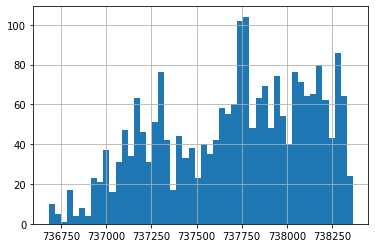

In [17]:
df['time'].hist(bins=50)



<AxesSubplot:>

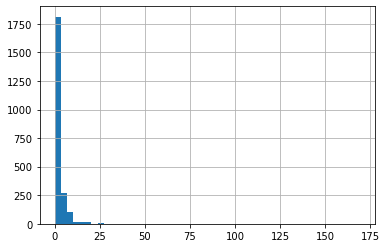

In [18]:
df['retweets'].hist(bins=50)

In [23]:
len(df[df['retweets'] > 0] )

1280

<AxesSubplot:>

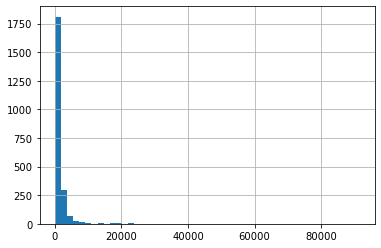

In [19]:
df['impressions'].hist(bins=50)

In [20]:
at_replies = []
for x in range(len(df)):
    a = re.findall(r'@[A-Za-z ]+', df['Tweet text'].iloc[x])
    at_replies.append(a)

df['ats'] = at_replies

In [ ]:
ats_or_naw = []
for x in range(len(df)):
    if len(df['ats']) == 0:
        ats_or_naw.append(0)
    else:
        ats_or_naw.append(1)

In [ ]:
model = LinearRegression()
a = df['tweet length'].to_numpy()
x = a.reshape(-1, 1)
y = df['impressions']
model.fit(x,y)
r_sq = model.score(x, y)
r_sq

In [149]:
at_replies = []
for x in df['ats']:
    templist = []
    for y in x:
        templist.append(re.findall(r'@[A-Za-z0-9 ]+', y))
    at_replies.append(templist)


In [187]:
len(df)

632

In [190]:
at_replies[0]

['@GenesisCali ',
 '@TransForm',
 '@monicamallon ',
 '@publicadvocates ',
 '@Urban']

In [159]:
re.split('\s', at_replies[8][4][0])

['@BruceHalperin', 'had', 'a', 'good', 'itinerary']

In [192]:
for x in at_replies:
    for y in x:
        a = re.split('\s', y[0])

In [193]:
a

['@']

In [113]:
ats_ind = []
for x in range(len(df['ats'])):
    if len(df['ats'].iloc[x]) != 0:
        ats_ind.append(x)

In [133]:
atsdf = pd.get_dummies(df['ats'].explode()).sum(level=0)

/var/folders/28/m93_jn5n1m93fzqz6_dkbglc0000gn/T/ipykernel_38516/2730426259.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  atsdf = pd.get_dummies(df['ats'].explode()).sum(level=0)


In [135]:
atsdf

,@AARPCA,@ACE,@AFGBA,@AliciaTrost,@AliciaTrost Nice to see you both there,@AliciaTrost will this be something you can present to an audience of seamless transit supporters,@AndrewKDavidson,@ArupGroup facilitates a discussion among the Commission on what should MTC,@Ash,@AsmMarcBerman,...,@urbanlifesigns,@urbenschneider And for the record we do support a merger of,@urbenschneider For rail governance,@uspirg,@wheelsbus,@willplancal,@ylinstitute,@zachlipton,@zdeutschgross,@zigdon Odd
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
a = []
for x in ats_ind:
    a.append(df['impressions'].iloc[x])

In [120]:
b = pd.concat([pd.DataFrame(a), atsdf], axis=1)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
124/307: df['time'].hist(bins=50)
124/308: df['retweets'].hist(bins=50)
124/309: df['impressions'].hist(bins=50)
highimp = df[df['impressions'] > 5000]
for x in highimp['Tweet text']:
    print(x)
124/311: df['likes'].hist(bins=10)
124/312: df.columns
124/313: df['engagements'].hist(bins=10)
124/314:
has_links = []
for x in df['Tweet text']:
    a = re.match('https://', x)
    has_links.append(a)
has_links
124/315:
has_at = []
for x in df['Tweet text']:
    a = re.match('@', x)
    has_at.append(a)
has_at
124/316: re.findall('@[a-zA-Z] ', str(df['Tweet text'][0]))
124/317: str(df['Tweet text'][0])
124/318:
string = 'lets yours letter basket'
re.findall('+let[a-z] ', string)
124/319: print(df['Tweet text'][0:1])
124/320: df.head()
124/321:
link_dummy = []
for x in has_links:
    if x == None:
        link_dummy.append(0)
    else:
        link_dummy.append(1)
        
df['link dummy'] = link_dummy
124/322:
model = LinearRegression()
a = df['link dummy'].to_numpy()
x = a.reshape(-1, 1)
y = df['impressions']
model.fit(x,y)
r_sq = model.score(x, y)
r_sq
124/323:
a = df['link dummy'].to_numpy()
x = a.reshape(-1, 1)


In [ ]:
'/Users/grahamsmith/nltk_data/corpora'

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
import nltk
from nltk.corpus import movie_reviews
import random

documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)